In [1]:
#@title Imports
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
pd.set_option('display.colheader_justify', 'center')
import numpy as np
import random
import re

import scipy.stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

from inspect import signature

def someMethod(self, arg1, kwarg1=None):
    pass

possession_data_seasons = np.arange(1974, 2023, 1)
play_by_play_data_seasons = np.arange(1997, 2023, 1)
pre_possesson_data_seasons = np.arange(1952, 1974, 1)

# plot
import seaborn as sns
import ast
from matplotlib.lines import Line2D
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
sns.set_style('darkgrid')        # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [ ]:
#@title Import Selenium
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
!pip install pyvirtualdisplay
!apt-get install xvfb
from pyvirtualdisplay import Display
display = Display(visible=0, size=(800, 800))  
display.start()
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
options.add_argument('start-maximized')
options.add_argument('enable-automation')
options.add_argument('--disable-infobars')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--disable-browser-side-navigation')
options.add_argument("--remote-debugging-port=9222")
# options.add_argument("--headless")
options.add_argument('--disable-gpu')
options.add_argument("--log-level=3")
wd = webdriver.Chrome(chrome_options=options)

**IMPORT RAW DATA**

In [2]:
#@title Manually add team abbrev, league_avg TS%, and teamcolors

aba_league_avg = pd.DataFrame(columns=['Year','TS%'])

aba_league_avg = aba_league_avg.append({
     "Year": "1974",
     "TS%":  .509, }, ignore_index=True)
aba_league_avg = aba_league_avg.append({
     "Year": "1975",
     "TS%":  .520, }, ignore_index=True)
aba_league_avg = aba_league_avg.append({
     "Year": "1976",
     "TS%":  .517, }, ignore_index=True)

league_avg_df = pd.DataFrame(columns=['Year','TS%'])

league_avg_df = league_avg_df.append({
     "Year": "2022",
     "TS%":  .566, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2021",
     "TS%":  .572, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2020",
     "TS%":  .565, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2019",
     "TS%":  .560, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2018",
     "TS%":  .556, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2017",
     "TS%":  .552, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2016",
     "TS%":  .541, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2015",
     "TS%":  .534, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2014",
     "TS%":  .541, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2013",
     "TS%":  .535, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2012",
     "TS%":  .527, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2011",
     "TS%":  .541, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2010",
     "TS%":  .543, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2009",
     "TS%":  .544, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2008",
     "TS%":  .540, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2007",
     "TS%":  .541, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2006",
     "TS%":  .536, }, ignore_index=True)
league_avg_df = league_avg_df.append({  
     "Year": "2005",
     "TS%":  .529, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2004",
     "TS%":  .516, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2003",
     "TS%":  .519, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2002",
     "TS%":  .520, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2001",
     "TS%":  .518, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "2000",
     "TS%":  .523, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1999",
     "TS%":  .511, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1998",
     "TS%":  .524, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1997",
     "TS%":  .536, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1996",
     "TS%":  .542, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1995",
     "TS%":  .543, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1994",
     "TS%":  .528, }, ignore_index=True)
league_avg_df = league_avg_df.append({
      "Year": "1993",
     "TS%":  .536, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1992",
     "TS%":  .531, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1991",
     "TS%":  .534, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1990",
     "TS%":  .537, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1989",
     "TS%":  .537, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1988",
     "TS%":  .538, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1987",
     "TS%":  .538, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1986",
     "TS%":  .541, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1985",
     "TS%":  .543, }, ignore_index=True)   
league_avg_df = league_avg_df.append({
     "Year": "1984",
     "TS%":  .543, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1983",
     "TS%":  .531, }, ignore_index=True) 
league_avg_df = league_avg_df.append({
     "Year": "1982",
     "TS%":  .539, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1981",
     "TS%":  .534, }, ignore_index=True)
league_avg_df = league_avg_df.append({
    "Year": "1980",
     "TS%":  .531, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1979",
     "TS%":  .530, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1978",
     "TS%":  .515, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1977",
     "TS%":  .511, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1976",
     "TS%":  .504, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1975",
     "TS%":  .502, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1974",
     "TS%":  .503, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1973",
     "TS%":  .498, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1972",
     "TS%":  .504, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1971",
     "TS%":  .500, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1970",
     "TS%":  .511, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1969",
     "TS%":  .491, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1968",
     "TS%":  .498, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1967",
     "TS%":  .493, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1966",
     "TS%":  .487, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1965",
     "TS%":  .479, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1964",
     "TS%":  .485, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1963",
     "TS%":  .493, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1962",
     "TS%":  .479, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1961",
     "TS%":  .469, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1960",
     "TS%":  .463, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1959",
     "TS%":  .457, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1958",
     "TS%":  .449, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1957",
     "TS%":  .449, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1956",
     "TS%":  .458, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1955",
     "TS%":  .455, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1954",
     "TS%":  .442, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1953",
     "TS%":  .445, }, ignore_index=True)
league_avg_df = league_avg_df.append({
     "Year": "1952",
     "TS%":  .438, }, ignore_index=True)

team_colors = {"ATL": "#E03A3E", "BOS": "#007A33", "BRK": "#000000", "BUF": "#ff6314", "CAP": "#E31837", "CHA": "#00788C", 
               "CHI": "#CE1141", "CHO": "#f26631", "CLE": "#860038", "DAL": "#00538C", "DEN": "#0E2240", "DET": "#1D42BA",
               "GSW": "#FFC72C", "HOU": "#CE1141", "IND": "#002D62", "KCO": "#5A2D81", "KCK": "#5A2D81", "LAC": "#C8102E", 
               "LAL": "#552583", "MEM": "#5D76A9", "MIA": "#98002E", "MIL": "#00471B", "MIN": "#78BE20", "NOH": "#008fc5", 
               "NOP": "#85714D", "NOJ": "#00471B", "NJN": "#00275d", "NYK": "#006BB6", "OKC": "#007AC1", "ORL": "#0077C0", 
               "PHI": "#006BB6", "PHO": "#1D1160", "POR": "#E03A3E", "SAC": "#5A2D81", "SAS": "#C4CED4", "SEA": "#00653A", 
               "TOR": "#CE1141", "TOT": "pink", "UTA": "#00471B", "WAS": "#E31837", "WSB": "#E31837"}

team_abbrev = {"Atlanta Hawks" : "ATL",       "Boston Celtics": "BOS",        "Brooklyn Nets": "BRK",         "Charlotte Bobcats": "CHA", 
               "Chicago Bulls": "CHI",      "Charlotte Hornets": "CHO",      "Cleveland Cavaliers": "CLE",     "Dallas Mavericks": "DAL",
               "Denver Nuggets": "DEN",     "Detroit Pistons": "DET",       "Golden State Warriors": "GSW",     "Houston Rockets": "HOU",
               "Indiana Pacers": "IND",     "Los Angeles Clippers": "LAC",  "Los Angeles Lakers": "LAL",      "Memphis Grizzlies": "MEM",
               "Miami Heat": "MIA",         "Milwaukee Bucks": "MIL",     "Minnesota Timberwolves": "MIN",  "New Orleans Hornets": "NOH",
               "New Orleans Pelicans": "NOP", "New Jersey Nets": "NJN",     "New York Knicks": "NYK",     "Oklahoma City Thunder": "OKC", 
               "Orlando Magic": "ORL",     "Philadelphia 76ers": "PHI",      "Phoenix Suns": "PHO",       "Portland Trail Blazers": "POR",
               "Sacramento Kings": "SAC",    "San Antonio Spurs": "SAS",       "Toronto Raptors": "TOR",               "Utah Jazz": "UTA", 
               "Washington Wizards": "WAS", "Capital Bullets": "CAP", "Buffalo Braves": "BUF", "Seattle SuperSonics": "SEA", "Washington Bullets": "WSB",
               "Kansas City-Omaha Kings": "KCO", "Kansas City Kings": "KCK", "Charlotte Hornets": "CHH"}


aba_abbrev = {"Denver Nuggets": "DNA", "Indiana Pacers": "INA", "New York Nets": "NYA", "San Antonio Spurs": "SAA",
              "Virginia Squires": "VIR", "Carolina Cougars": "CAR", "San Diego Conquistadors": "SDA", "Kentucky Colonels": "KEN",
              "Utah Stars": "UTS", "Carolina Cougars": "CAR", "San Diego Sails": "SDS", "Spirits of St. Louis": "SSL",
              "Memphis Sounds": "MMS", "Denver Rockets": "DNR"}

team_52_73_abbrev = {"Milwaukee Hawks" : "MLH",  "Syracuse Nationals": "SYR",        "Minneapolis Lakers": "MNL",         "Rochester Royals": "ROC", 
               "Chicago Bulls": "CHI",      "Boston Celtics": "BOS",      "Cleveland Cavaliers": "CLE",     "Fort Wayne Pistons": "FTW",
               "Indianapolis Olympians": "INO",     "Detroit Pistons": "DET",       "Golden State Warriors": "GSW",     "Houston Rockets": "HOU",
               "St. Louis Hawks": "STL",  "Los Angeles Lakers": "LAL",      "Philadelphia Warriors": "PHW",
               "Cincinnati Royals": "CIN",         "Milwaukee Bucks": "MIL", "San Diego Rockets": "SDR",     
               "New York Knicks": "NYK",   "Philadelphia 76ers": "PHI",      "Phoenix Suns": "PHO",       "Portland Trail Blazers": "POR",
               "Baltimore Bullets": "BAL", "Buffalo Braves": "BUF", "Seattle SuperSonics": "SEA", "Washington Bullets": "WSB",
               "Kansas City-Omaha Kings": "KCO", "Kansas City Kings": "KCK", "San Francisco Warriors": "SFW", "Atlanta Hawks": "ATL",
               "Chicago Packers": "CHP", "Chicago Zephyrs": "CHZ"}

In [3]:
#@title Import data and add team colors for advanced, play-by-play, per 100, and league avg data

# per 100 posssessions
#import_player_since74_per100_df = pd.read_csv('nba_player_since74_per100_data.csv')

# add team color for per 100 posssessions
#import_player_since74_per100_df['TeamColor'] = import_player_since74_per100_df['Tm'].map(team_colors)
# per 100 playoff posssessions
#import_player_since74playoffs_per100_df = pd.read_csv('nba_player_since74playoffs_per100_data.csv')
# add team color for playoff per 100 posssessions
#import_player_since74playoffs_per100_df['TeamColor'] = import_player_since74playoffs_per100_df['Tm'].map(team_colors)

# advanced
import_player_since74_advanced_df = pd.read_csv('nba_player_since74_advanced_data.csv', encoding='utf8')

# advanced playoffs
import_player_since74playoffs_advanced_df = pd.read_csv('nba_player_since74playoffs_advanced_data.csv', encoding='utf8')


# play-by-play
import_player_regular_playbyplay_df = pd.read_csv('nba_player_regular_playbyplay_data.csv', encoding='utf8')

# add team color for play-by-play
import_player_regular_playbyplay_df['TeamColor'] = import_player_regular_playbyplay_df['Tm'].map(team_colors)

# play-by-play playoffs
import_player_since74playoffs_playbyplay_df = pd.read_csv('nba_player_playoff_playbyplay_data.csv', encoding='utf8')

# add team color for playoff play-by-play
import_player_since74playoffs_playbyplay_df['TeamColor'] = import_player_since74playoffs_playbyplay_df['Tm'].map(team_colors)


# import league avg data

# league avg
import_leagueavgsince74_df = pd.read_csv('nba_leaguestats_data.csv')

# drop NBA seasons from inception of league until 1973 (final year without per possession data)
import_leagueavgsince74_df.drop(import_leagueavgsince74_df.tail(26).index,inplace=True)

# change from '2020-21' to '2021' and '2019-20' to '2020'... and so on
for i, trial in import_leagueavgsince74_df.iterrows():
   import_leagueavgsince74_df.loc[i, "Season"] = 2022-i

league_avg_df['Year'] = league_avg_df['Year'].astype(str)

In [4]:
#@title Import per 75 data (can be used in place of 'Calculate per 75' cells with necessitated imported data')

# per 75 posssessions
import_player_since74_per75_df = pd.read_csv('nba_player_since74_per75_data.csv')

# add team color for per 75 posssessions
import_player_since74_per75_df['TeamColor'] = import_player_since74_per75_df['Tm'].map(team_colors)

# per 75 playoff posssessions
import_player_since74playoffs_per75_df = pd.read_csv('nba_player_since74playoffs_per75_data.csv')

# add team color for playoff per 75 posssessions
import_player_since74playoffs_per75_df['TeamColor'] = import_player_since74playoffs_per75_df['Tm'].map(team_colors)

# per 75 adjusted ts playoff posssessions
#adjusted_playoff_per_75_df = pd.read_csv('/content/since74_adj_ts_playoffs_per75_data.csv')
# add team color for playoff per 75 adjusted posssessions
#adjusted_playoff_per_75_df['TeamColor'] = adjusted_playoff_per_75_df['Tm'].map(team_colors)

# era/opponent adjusted scoring
era_adj_reg_per_75_df = pd.read_csv('/content/era_adjusted_reg_per75_data.csv')
era_opponent_adj_playoff_per_75_df = pd.read_csv('/content/era_opponent_adjusted_per75_data.csv')

In [5]:
#@title Create scoring coefficients

# era-adjust per game data
per_game_coeff = pd.read_csv('/content/Avg_Reg_PTS_G.csv', index_col=False, encoding='utf8')
per_game_coeff['Coefficient'] = per_game_coeff['Average PTS_G'].max() / per_game_coeff['Average PTS_G'] 

# era-adjust per 75 data
per_75_coeff = pd.read_csv('/content/Avg_Reg_PP75.csv', index_col=False, encoding='utf8')
per_75_coeff['Coefficient'] = per_75_coeff['Average PP75'].max() / per_75_coeff['Average PP75']

#aba_per75_coeff = pd.read_csv('/content/Avg_ABA_Reg_PP75.csv', index_col=False, encoding='utf8')
#aba_per75_coeff['Coefficient'] = per_75_coeff['Average PP75'].max() / aba_per75_coeff['Average PP75']

bpm_coeff = pd.read_csv('/content/Avg_Reg_BPM.csv', index_col=False, encoding='utf8')
bpm_coeff['Average BPM'] = bpm_coeff['Average BPM'] +  1
bpm_coeff['Average OBPM'] = bpm_coeff['Average OBPM'] + 1
bpm_coeff['BPM_Coefficient'] = bpm_coeff['Average BPM'].max() / bpm_coeff['Average BPM']
bpm_coeff['OBPM_Coefficient'] = bpm_coeff['Average OBPM'].max() / bpm_coeff['Average OBPM']

try:
  opponent_adj_pts_coeff = pd.DataFrame(columns = ['Year', 'Team', 'PTS_coeff'])

  team_def_rtg = pd.read_csv('NBA_Team_defrtg_Allowed_df.csv', index_col=False, encoding='utf8')
  league_avg_def_rtg = pd.read_csv('/content/Avg_Def_Rtg.csv', index_col=False, encoding='utf8')
  for idx, row in team_def_rtg.iterrows():
          match_df = league_avg_def_rtg[(league_avg_def_rtg['Year'] == row['Year'])]
          avg = match_df['Avg DefRtg']
          avg = float(avg)
          coeff = avg / row['DefRtg']

          new_row = {'Year':row['Year'], 'Team':row['Team'], 'PTS_coeff':coeff}
          opponent_adj_pts_coeff['Year'] = opponent_adj_pts_coeff['Year'].astype(int)
          opponent_adj_pts_coeff = opponent_adj_pts_coeff.append(new_row, ignore_index=True)

  outfile = f"opponent_adj_pts_coeff.csv"
  opponent_adj_pts_coeff.to_csv(outfile, index=False)
except:
  pass

In [ ]:
#@title Single Playoffs Import
#sing = pd.read_csv('/content/52-73_era_opponent_adjusted_per75_data.csv', index_col=False, encoding='utf8')
#sing = sing.drop(['TeamColor', 'Pos', 'Age', 'GS', 'DRB', 'TRB', 'AST', 'STL', 'PF', 'FG', 'FGA', '3P', '3PA', 'TOV', '2P', '2PA', 'FG%', '3P%', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'BLK', 'Possessions','eFG%'], axis=1)

#sing = era_opponent_adj_playoff_per_75_df.copy()
#sing = sing.drop(['TeamColor', 'Pos', 'Age', 'GS', 'DRB', 'TRB', 'AST', 'STL', 'PF', 'ORtg', 'DRtg', 'FG', 'FGA', '3P', '3PA', 'TOV', '2P', '2PA', 'FG%', '3P%', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'BLK'], axis=1)

sing = sing.rename(columns={"Year": "Year", "Player": "Player", "Tm": "Team", "TS%+": "TS+", "PTS": "PP75"})

columns_titles = ['Year', 'Player', 'Team', 'PP75', 'TS+', 'MP', 'G']
sing = sing.reindex(columns=columns_titles)

sing['PP75'] = sing['PP75'].round(2)
sing['TS+'] = sing['TS+'].round(2)
sing['MP'] = sing['MP'].astype(int)

sing = sing.sort_values(by = ['Player', 'Year'], ascending = [True, True], na_position = 'first')

print(sing)
sing.to_csv("Single_Playoffs_Adjusted_Scoring.csv", index=False)


#@title Single Playoffs Custom Dataframes
#sing = era_opponent_adj_playoff_per_75_df.copy()
sing = sing.drop(['TeamColor', 'Pos', 'Age', 'GS', 'DRB', 'TRB', 'AST', 'STL', 'PF', 'ORtg', 'DRtg', 'FG', 'FGA', '3P', '3PA', 'TOV', '2P', '2PA', 'FG%', '3P%', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'BLK'], axis=1)

sing = sing.rename(columns={"Year": "Year", "Player": "Player", "Tm": "Team", "TS%+": "TS+", "PTS": "PP75"})

sing = sing.sort_values(by = ['Player', 'Year'], ascending = [True, True], na_position = 'first')

columns_titles = ['Year', 'Player', 'Team', 'PP75', 'TS+', 'MP', 'G']
sing = sing.reindex(columns=columns_titles)

sing['PP75'] = sing['PP75'].round(2)
sing['TS+'] = sing['TS+'].round(2)

sing['MP'] = sing['MP'].astype(int)
sing['G'] = sing['G'].astype(int)

sing = sing[(sing['MP'] >= 300)]
sing = sing[(sing['PP75'] >= 30)]
sing = sing[(sing['TS+'] >= 115)]

sing = sing.sort_values(by = ['Year', 'Player'], ascending = [True, True], na_position = 'first')

print(sing)
sing.to_csv("Single_Playoffs_Adjusted_Scoring.csv", index=False)

In [ ]:
#@title Single Playoffs Custom Dataframes
sing = pd.read_csv('/content/52-22_Single_Playoffs_Adjusted_Scoring.csv', index_col=False, encoding='utf8')

sing['MP'] = sing['MP'].astype(int)
sing['G'] = sing['G'].astype(int)

sing = sing[(sing['MP'] >= 300)]
sing = sing[(sing['PP75'] >= 30)]
sing = sing[(sing['TS+'] >= 115)]

sing = sing.sort_values(by = ['Year', 'Player'], ascending = [True, True], na_position = 'first')

print(sing)
#sing.to_csv("Single_Playoffs_Adjusted_Scoring.csv", index=False)

In [ ]:
#@title Edit Text
with open('/content/tmpurllist.txt', 'r') as f, open('better_format', 'w') as f1:
  Lines = f.readlines()
  
  count = 0
  # Strips the newline character
  for line in Lines:
    if "Player" in line:
      continue
    else:
      new_line = re.sub('/pla', r',/pla', line)
      print(new_line)
    f1.write(new_line)


**CALCULATE PER 75 AND TS+**

In [ ]:
#@title Scrape League Average TS% Since 1974 (not working)
#@title Scrape NBA regular season advanced
def scrape_nba_ts_data(years):

    league_avg_ts_df = pd.DataFrame(columns = ['Year', 'TS%'])

    for year in years:
        league_stats_url = f"https://www.basketball-reference.com/leagues/NBA_{year}.html"
        
        wd = webdriver.Chrome('chromedriver',options=chrome_options)
        wd.get(league_stats_url)          
        html = wd.page_source
        soup = BeautifulSoup(html)

        for first_div in soup.find_all('div', attrs={'id': '#content'}):
          second_div = first_div.find('div', attrs={'id': '#all_advanced_team'})
          first_table = second_div.find('table', attrs={'id': '#advanced-team'})
          body = first_table.find('tbody')

        rows = body.find_all('tr', attrs={'class': 'full_table'})
        print(rows)

        # grab rows (excluding first empty row 0)
        rows = soup.findAll('tr')[1:]
        advanced_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

        # remove empty rows
        advanced_stats = [e for e in advanced_stats if e != []]

        # add year to each player profile
        for i in range(0, len(advanced_stats)):
             advanced_stats[i].insert(0, year)
        headers.insert(0, "Year")
        print(headers)

        each_year = pd.DataFrame(advanced_stats, columns = headers)
        
        # remove blank columns
        each_year = each_year.drop('\xa0',axis=1)

        # append dataframe
        league_avg_ts_df = league_avg_ts_df.append(each_year)

        # remove any Na
        league_avg_ts_df = league_avg_ts_df.dropna()
        
    # print final_df
    print(league_avg_ts_df.info)
    league_avg_ts_df.to_csv("nba_player_since74_advanced_data.csv", index=False)
scrape_nba_ts_data(all_the_years)

In [ ]:
#@title Calculate regular season per 75 and regular season TS+


# Calculate NBA reg per 75 points
import_player_since74_per75_df = import_player_since74_per100_df.copy()
import_player_since74_per75_df['PTS'] = import_player_since74_per75_df['PTS'] * .75

# Add NBA reg TS+
# TS% from advanced dataframge (import_player_since74_advanced_df.iat[j, 9]) divided by league average TS% (league_avg_df.iat[yearloop, 1])
i = 2022
for yearloop in range(49):
  for j, row in import_player_since74_per75_df.iterrows():
    if row['Year'] == i:
      import_player_since74_per75_df.iat[j, 1] = (import_player_since74_advanced_df.iat[j, 9] / league_avg_df.iat[yearloop, 1]) * 100
  i = i - 1

import_player_since74_per75_df = import_player_since74_per75_df[import_player_since74_per75_df['TS%+'].notna()]
outfile = f"nba_player_since74_per75_data.csv"
import_player_since74_per75_df.to_csv(outfile, index=False)



# Calculate ABA reg per 75 points
aba_per100_reg_df = pd.read_csv('/content/aba_player_since74_per100_data.csv')
aba_per100_reg_df['PTS'] = aba_per100_reg_df['PTS'] * .75
aba_advanced_reg_df = pd.read_csv('/content/aba_player_since74_advanced_data.csv')


# Add ABA reg TS+
# TS% from advanced dataframge (aba_advanced_reg_df.iat[j, 9]) divided by league average TS% (aba_league_avg.iat[yearloop, 1])
i = 1976
for yearloop in range(49):
  for j, row in aba_per100_reg_df.iterrows():
    if row['Year'] == i:
      aba_per100_reg_df.iat[j, 1] = (aba_advanced_reg_df.iat[j, 9] / aba_league_avg.iat[yearloop, 1]) * 100
  i = i - 1

aba_per100_reg_df = aba_per100_reg_df[import_player_since74_per75_df['TS%+'].notna()]
outfile = f"aba_per75_reg_data.csv"
aba_per100_reg_df.to_csv(outfile, index=False)



# Calculate Playoffs per 75
#import_player_since74playoffs_per75_df = import_player_since74playoffs_per100_df.copy()
#import_player_since74playoffs_per75_df['PTS'] = import_player_since74playoffs_per75_df['PTS'] * .75

aba_per75_pts = pd.read_csv('/content/aba_player_since74playoffs_per100_data.csv')
aba_per75_pts['PTS'] = aba_per75_pts['PTS'] * .75

outfile = f"aba_player_since74playoffs_per75_data.csv"
aba_per75_pts.to_csv(outfile, index=False)

**52-73 (estimated) DATA**

In [ ]:
#@title Scrape NBA Teams' Playoff Pace (1952-73 [estimated])

# Grab Team and Opponent Total stats to estimate pace of play for each NBA team from 1952-73
def scrape_team_estimated_playoff_pace_data(years):
 
    final_team_data_df = pd.DataFrame(columns = ['Year', 'Team', 'Pace/G', 'ORtg', 'DefRtg'])
    
    for year in years:

        wd.get(f"https://www.basketball-reference.com/playoffs/NBA_{year}.html")          
        html = wd.page_source
        soup = BeautifulSoup(html)
        time.sleep(10)

        #Find table body of team stats
        for first_div in soup.find_all('div', attrs={'id': 'content'}):
          second_div = first_div.find('div', attrs={'id': 'switcher_per_game_team-opponent'})
          first_table = second_div.find('table', attrs={'id': 'per_game-team'})
          body = first_table.find('tbody')

        headers = ['Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P',
                           '3PA',	'3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
                           'ORB',	'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
                           'PTS']
        # grab rows
        rows = body.findAll('tr')[0:]
        team_allowed_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

        team_allowed_stats = [e for e in team_allowed_stats if e != []]

        # add year and pace column to each player profile
        for i in range(0, len(team_allowed_stats)):
             team_allowed_stats[i].insert(0, year)
             team_allowed_stats[i].insert(1, 0) 
        headers.insert(0, "Year")
        headers.insert(1, "Pace/G")
        each_years_teams = pd.DataFrame(team_allowed_stats, columns = headers)
        each_years_teams = each_years_teams.sort_values('Team', ascending=True)

        # estimate pace
        if year >= 1971:
          ORB_percent = 0.319
        else:
          ORB_percent = 0.303
        if year >= 1971:
          TOV_percent = 0.158
        else:
          TOV_percent = 0.161
        each_years_teams['PTS'] = each_years_teams['PTS'].astype(float)
        each_years_teams['FGA'] = each_years_teams['FGA'].astype(float)
        each_years_teams['FTA'] = each_years_teams['FTA'].astype(float)
        each_years_teams['FG'] = each_years_teams['FG'].astype(float)
        each_years_teams['G'] = each_years_teams['G'].astype(float)
        each_years_teams['Pace/G'] = (each_years_teams['FGA'] + (0.4 * each_years_teams['FTA']) - ORB_percent * (each_years_teams['FGA'] - each_years_teams['FG']) + (-TOV_percent * (each_years_teams['FGA'] + 0.44 * each_years_teams['FTA']) / (TOV_percent - 1)))
        each_years_teams['Ortg'] = (each_years_teams['PTS'] / each_years_teams['Pace/G']) * 100


        each_years_teams.drop(['G', 'MP', 'FG', 'FGA', 'FG%', '3P',
                           '3PA',	'3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
                           'ORB',	'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'], axis=1, inplace=True)

        

        #Find table body of opponent stats
        for first_div in soup.find_all('div', attrs={'id': 'content'}):
          second_div = first_div.find('div', attrs={'id': 'switcher_per_game_team-opponent'})
          first_table = second_div.find('table', attrs={'id': 'per_game-opponent'})
          body = first_table.find('tbody')

        headers = ['Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P',
                           '3PA',	'3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
                           'ORB',	'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
                           'PTS']
        # grab rows
        rows = body.findAll('tr')[0:]
        team_allowed_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

        team_allowed_stats = [e for e in team_allowed_stats if e != []]

        # add year to each row
        for i in range(0, len(team_allowed_stats)):
             team_allowed_stats[i].insert(0, year)
        headers.insert(0, "Year")
        def_rtg_df = pd.DataFrame(team_allowed_stats, columns = headers)
        def_rtg_df = def_rtg_df.sort_values('Team', ascending=True)

        def_rtg_df['PTS'] = def_rtg_df['PTS'].astype(float)
        each_years_teams['Drtg'] = (def_rtg_df['PTS'] / each_years_teams['Pace/G']) * 100
        print(each_years_teams)

        final_team_data_df = final_team_data_df.append(each_years_teams)
        
    # print final_df
    print(final_team_data_df.info)
    final_team_data_df.to_csv("NBA_Team_Estimated_Playoff_Pace_52-73_df.csv", index=False)
scrape_team_estimated_playoff_pace_data(pre_possesson_data_seasons)

In [ ]:
#@title Calculate average PTS per 75 (1952-73)

# year by year find what the league average PTS per 75 possessions was. Each row (player)'s points scaled for minutes.
avg_pts_per_75 = pd.read_csv('/content/52-73_reg_per_75_data.csv', index_col=False, encoding='utf8')
total_mp = 0
running_pts_avg = []
year_list = []
final_df = pd.DataFrame()
for year in pre_possesson_data_seasons:
  year_list.append(year)
  this_years_players = avg_pts_per_75[(avg_pts_per_75['Year']) == year]
  this_years_players['MP'] = this_years_players['MP'].astype(float)
  total_mp = this_years_players['MP'].sum()
  this_years_players['AdjPts'] = (this_years_players['PTS'].astype(float)) * (this_years_players['MP'].astype(float) / total_mp)
  running_pts_avg.append(this_years_players['AdjPts'].sum())

final_df['Year'] = year_list
final_df['Average PP75'] = running_pts_avg
        
final_df.to_csv("Avg_52-73_Reg_PP75.csv", index=False)

In [ ]:
#@title Calculate average DefRtg (1952-73)

# year by year find what the league average DefRtg was.
avg_pts_per_75 = pd.read_csv('/content/abbrev_52-73 reg pace ortg drtg.csv', index_col=False, encoding='utf8')
running_pts_avg = []
year_list = []
final_df = pd.DataFrame()
for year in pre_possesson_data_seasons:
  year_list.append(year)
  this_years_players = avg_pts_per_75[(avg_pts_per_75['Year']) == year]
  running_pts_avg.append(this_years_players['Drtg'].mean())

final_df['Year'] = year_list
final_df['Average DefRtg'] = running_pts_avg
        
final_df.to_csv("Avg_52-73_Reg_PP75.csv", index=False)

In [ ]:
#@title Scrape NBA regular season per game (1952-73)
def scrape_nba_player_pergame_data(years):

    final_players_pergame_df = pd.DataFrame(columns = ['Year',  'TS%+', 'TeamColor', 'Player', 'Pos', 'Age', 'Tm', 
                                                    'G', 'GS', 'MP', 'FG', 'FGA', 
                                                    'FG%', '3P', '3PA', '3P%', '2P', 
                                                    '2PA', '2P%', 'FT', 'FTA', 'FT%', 
                                                    'ORB', 'DRB', 'TRB', 'AST', 'STL', 
                                                    'BLK', 'TOV', 'PF', 'PTS']
                                         )
    for year in years:
        player_base_url = f"https://www.basketball-reference.com/leagues/NBA_{year}_per_game.html"
        
        html = urlopen(player_base_url)
        soup = BeautifulSoup(html, features="lxml")
        
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers = headers[1:headers.index("PTS")+1]

        # grab rows (excluding first empty row 0)
        rows = soup.findAll('tr')[1:]
        player_base_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

        player_base_stats = [e for e in player_base_stats if e != []]

        # add year to each player profile
        for i in range(0, len(player_base_stats)):
             player_base_stats[i].insert(0, year)
             player_base_stats[i].insert(1, 0)
             player_base_stats[i].insert(2, 0)
             player_base_stats[i].insert(3, 0)
        headers.insert(0, "Year")
        headers.insert(1, "TS%+")
        headers.insert(2, "TeamColor")
        headers.insert(3, "Possessions")
        

        each_year = pd.DataFrame(player_base_stats, columns = headers)
        
        # append to final df
        final_players_pergame_df = final_players_pergame_df.append(each_year)

        # remove duplicate rows based on player being traded; first appearing row will be player's total between teams
        # adding 'year' to subset prevents players' future seasons from being deleted.
        # example: Avery Bradley was traded in 2019. Remove Avery Bradley rows from individual teams.
        # Keep TOT row (total) but don't remove Avery Bradley's 2020 season as a duplicate
        final_players_pergame_df = final_players_pergame_df.drop_duplicates(subset =['Player', 'Year'], keep="first")

        # remove apostrophes from name
        final_players_pergame_df['Player'] = final_players_pergame_df['Player'].str.replace(r"[*]", '')

        # remove any Na
        final_players_pergame_df = final_players_pergame_df.dropna()
        
    # print final_df
    print(final_players_pergame_df.info)
    final_players_pergame_df.to_csv("52-73_reg_pergame_data.csv", index=False)
scrape_nba_player_pergame_data([pre_possesson_data_seasons])

In [ ]:
#@title Calculate reg per 75 (1952-73 [estimated]) and TS+
pergame = pd.read_csv('52-73_reg_pergame_data.csv', encoding='utf8', index_col=False)
pace_sup = pd.read_csv('abbrev_52-73 reg pace ortg drtg.csv', encoding='utf8', index_col=False)


pergame['PTS'] = pergame['PTS'].astype(float)
pergame['MP'] = pergame['MP'].astype(float)
pace_sup['Pace/G'] = pace_sup['Pace/G'].astype(float)


for idx, row in pergame.iterrows():
  team = pace_sup[(pace_sup['Year'] == row['Year']) & (pace_sup['Team'] == row['Tm'])]
  team_pace = team['Pace/G']
  # changed team in middle of year. Two paces to account for.
  if row['Tm'] == 'TOT':
    print(row['Player'])
    print(row['Year'])
    continue
  # team folded and didn't play for another team that season.
  elif row['Tm'] == 'BLB' and row['Year'] == 1955:
    continue
  pergame.iat[idx, 31] = team_pace * (pergame.iat[idx, 9]/48)
  pergame.iat[idx, 31] = pergame.iat[idx, 31].astype(float)
  ind_poss_coeff = pergame.iat[idx, 31] / 75
  pergame.iat[idx, 30] = pergame.iat[idx, 30]  / ind_poss_coeff
pergame.to_csv("52-73_reg_per_75_data.csv", index=False)

In [ ]:
#@title Scrape NBA regular season advanced (1952-73)
def scrape_nba_player_advanced_data(years):

    final_players_advanced_df = pd.DataFrame(columns = ['Year', 'Player', 'Pos', 'Age', 
                                                        'Tm', 'TeamColor', 'G', 'MP', 'PER', 'TS%', 
                                                        '3PAr', 'FTr', 'ORB%', 'DRB%', 
                                                        'TRB%', 'AST%', 'STL%', 'BLK%', 
                                                        'TOV%', 'USG%', 'OWS', 'DWS', 
                                                        'WS', 'WS/48', 'OBPM', 'DBPM', 
                                                        'BPM', 'VORP']
                                         )
    for year in years:
        print(year)
        player_base_url = f"https://www.basketball-reference.com/leagues/NBA_{year}_advanced.html"
        
        html = urlopen(player_base_url)
        soup = BeautifulSoup(html, features="lxml")
        time.sleep(5)
        
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers = headers[1:headers.index("VORP")+1]

        # grab rows (excluding first empty row 0)
        rows = soup.findAll('tr')[1:]
        player_base_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

        # remove empty rows
        player_base_stats = [e for e in player_base_stats if e != []]

        # add year to each player profile
        for i in range(0, len(player_base_stats)):
             player_base_stats[i].insert(0, year)
             player_base_stats[i].insert(1, 0)
             player_base_stats[i].insert(2, 0)
        headers.insert(0, "Year")
        headers.insert(1, "TS%+")
        

        each_year = pd.DataFrame(player_base_stats, columns = headers)
        
        # append to final df
        final_players_advanced_df = final_players_advanced_df.append(each_year)

        # remove duplicate rows based on player being traded; first appearing row will be player's total between teams
        # adding 'year' to subset prevents players' future seasons from being deleted.
        # example: Avery Bradley was traded in 2019. Remove Avery Bradley rows from individual teams.
        # Keep TOT row (total) but don't remove Avery Bradley's 2020 season as a duplicate
        final_players_advanced_df = final_players_advanced_df.drop_duplicates(subset =['Player', 'Year'], keep="first")

        # remove apostrophes from name
        final_players_advanced_df['Player'] = final_players_advanced_df['Player'].str.replace(r"[*]", '')

        # remove any Na
        final_players_advanced_df = final_players_advanced_df.dropna()
        
    # print final_df
    print(final_players_advanced_df.info)
    final_players_advanced_df.to_csv("52-73_reg_advanced_data.csv", index=False)
scrape_nba_player_advanced_data([pre_possesson_data_seasons])

In [ ]:
#@title Scrape NBA playoff per game (1952-73)
def scrape_nba_player_pergame_data(years):

    final_players_pergame_df = pd.DataFrame(columns = ['Year',  'TS%+', 'TeamColor', 'Player', 'Pos', 'Age', 'Tm', 
                                                    'G', 'GS', 'MP', 'FG', 'FGA', 
                                                    'FG%', '3P', '3PA', '3P%', '2P', 
                                                    '2PA', '2P%', 'FT', 'FTA', 'FT%', 
                                                    'ORB', 'DRB', 'TRB', 'AST', 'STL', 
                                                    'BLK', 'TOV', 'PF', 'PTS']
                                         )
    for year in years:
        player_base_url = f"https://www.basketball-reference.com/playoffs/NBA_{year}_per_game.html"
        
        html = urlopen(player_base_url)
        time.sleep(5)
        time.sleep(5)
        soup = BeautifulSoup(html, features="lxml")
        
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers = headers[1:headers.index("PTS")+1]

        # grab rows (excluding first empty row 0)
        rows = soup.findAll('tr')[1:]
        player_base_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

        # remove empty rows
        player_base_stats = [e for e in player_base_stats if e != []]

        # add year to each player profile
        for i in range(0, len(player_base_stats)):
             player_base_stats[i].insert(0, year)
             player_base_stats[i].insert(1, 0)
             player_base_stats[i].insert(2, 0)
             player_base_stats[i].insert(3, 0)
        headers.insert(0, "Year")
        headers.insert(1, "TS%+")
        headers.insert(2, "TeamColor")
        headers.insert(3, "Possessions")
        

        each_year = pd.DataFrame(player_base_stats, columns = headers)
        
        # append to final df
        final_players_pergame_df = final_players_pergame_df.append(each_year)

        # remove duplicate rows based on player being traded; first appearing row will be player's total between teams
        # adding 'year' to subset prevents players' future seasons from being deleted.
        # example: Avery Bradley was traded in 2019. Remove Avery Bradley rows from individual teams.
        # Keep TOT row (total) but don't remove Avery Bradley's 2020 season as a duplicate
        final_players_pergame_df = final_players_pergame_df.drop_duplicates(subset =['Player', 'Year'], keep="first")

        # remove apostrophes from name
        final_players_pergame_df['Player'] = final_players_pergame_df['Player'].str.replace(r"[*]", '')

        # remove any Na
        final_players_pergame_df = final_players_pergame_df.dropna()
        
    # print final_df
    print(final_players_pergame_df.info)
    final_players_pergame_df.to_csv("52-73_playoff_pergame_data.csv", index=False)
scrape_nba_player_pergame_data(pre_possesson_data_seasons)

In [ ]:
#@title Scrape NBA playoff totals (1952-73)
def scrape_nba_player_total_mp_data(years):

    final_players_pergame_df = pd.DataFrame(columns = ['Year',  'TS%+', 'TeamColor', 'Player', 'Pos', 'Age', 'Tm', 
                                                    'G', 'GS', 'MP', 'FG', 'FGA', 
                                                    'FG%', '3P', '3PA', '3P%', '2P', 
                                                    '2PA', '2P%', 'FT', 'FTA', 'FT%', 
                                                    'ORB', 'DRB', 'TRB', 'AST', 'STL', 
                                                    'BLK', 'TOV', 'PF', 'PTS']
                                         )
    for year in years:
        player_base_url = f"https://www.basketball-reference.com/playoffs/NBA_{year}_totals.html"
        
        html = urlopen(player_base_url)
        time.sleep(5)
        time.sleep(5)
        soup = BeautifulSoup(html, features="lxml")
        
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers = headers[1:headers.index("PTS")+1]

        # grab rows (excluding first empty row 0)
        rows = soup.findAll('tr')[1:]
        player_base_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

        # remove empty rows
        player_base_stats = [e for e in player_base_stats if e != []]

        # add year to each player profile
        for i in range(0, len(player_base_stats)):
             player_base_stats[i].insert(0, year)
             player_base_stats[i].insert(1, 0)
             player_base_stats[i].insert(2, 0)
             player_base_stats[i].insert(3, 0)
        headers.insert(0, "Year")
        headers.insert(1, "TS%+")
        headers.insert(2, "TeamColor")
        headers.insert(3, "Possessions")
        

        each_year = pd.DataFrame(player_base_stats, columns = headers)
        
        # append to final df
        final_players_pergame_df = final_players_pergame_df.append(each_year)

        # remove duplicate rows based on player being traded; first appearing row will be player's total between teams
        # adding 'year' to subset prevents players' future seasons from being deleted.
        # example: Avery Bradley was traded in 2019. Remove Avery Bradley rows from individual teams.
        # Keep TOT row (total) but don't remove Avery Bradley's 2020 season as a duplicate
        final_players_pergame_df = final_players_pergame_df.drop_duplicates(subset =['Player', 'Year'], keep="first")

        # remove apostrophes from name
        final_players_pergame_df['Player'] = final_players_pergame_df['Player'].str.replace(r"[*]", '')

        # remove any Na
        final_players_pergame_df = final_players_pergame_df.dropna()
        
    # print final_df
    print(final_players_pergame_df.info)
    final_players_pergame_df.to_csv("52-73_total_mp_playoff_data.csv", index=False)
scrape_nba_player_total_mp_data(pre_possesson_data_seasons)

In [ ]:
#@title Calculate playoff per 75 (1952-73 [estimated])
pergame = pd.read_csv('52-73_playoff_pergame_data.csv', encoding='utf8', index_col=False)
pace_sup = pd.read_csv('Abbrev_Playoff_Pace_52-73.csv', encoding='utf8', index_col=False)


pergame['PTS'] = pergame['PTS'].astype(float)
pergame['MP'] = pergame['MP'].astype(float)
pace_sup['Pace/G'] = pace_sup['Pace/G'].astype(float)


for idx, row in pergame.iterrows():
  team = pace_sup[(pace_sup['Year'] == row['Year']) & (pace_sup['Team'] == row['Tm'])]
  team_pace = team['Pace/G']
  pergame.iat[idx, 31] = team_pace * (pergame.iat[idx, 9]/48)
  pergame.iat[idx, 31] = pergame.iat[idx, 31].astype(float)
  ind_poss_coeff = pergame.iat[idx, 31] / 75
  pergame.iat[idx, 30] = pergame.iat[idx, 30]  / ind_poss_coeff
pergame.to_csv("52-73_playoff_per_75_data.csv", index=False)

In [ ]:
#@title Replace Per 75 'MPG' with total 'MP'
per75 = pd.read_csv('52-73_playoff_per_75_data.csv', encoding='utf8', index_col=False)
total_mp = pd.read_csv('52-73_total_mp_playoff_data.csv', encoding='utf8', index_col=False)


per75['MP'] = total_mp['MP'].astype(int)
per75.to_csv("52-73_playoff_per_75_data.csv", index=False)

**1952- 1973 SCRAPE ADJUSTED PLAYOFF TS+ (Opponent Adjustment)**

In [ ]:
#@title Correlation between rDefRtg and TS+ allowed (1974-2022)

# correlation will be used to estimate TS%'s allowed by teams from 1952-1973

rdRtg = pd.read_csv("/content/remove reg teams.csv", index_col=False, encoding='utf8')
rTS = pd.read_csv("/content/NBA_Team_TS_Percentage_Allowed_df.csv", index_col=False, encoding='utf8')

rTS['Year'] = rTS['Year'].astype(int)
league_avg_df['Year'] = league_avg_df['Year'].astype(float)

rTS['rTS'] = 0

for idx, row in rTS.iterrows():     
          match_df = league_avg_df[(league_avg_df['Year'] == row['Year'])]
          rTS.iat[idx, 3] = float(rTS.iat[idx, 2] / (match_df['TS%']))
          
rTS = rTS.sort_values(by = ['Year', 'Team'], ascending = [True, True], na_position = 'first')
rdRtg = rdRtg.sort_values(by = ['Year', 'Team'], ascending = [True, True], na_position = 'first')

import scipy.stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
x_pred = rdRtg['PTS_coeff']
x_pred = np.array(x_pred).reshape(-1, 1)
y_pred = rTS['rTS']

lr = linear_model.LinearRegression()
lr.fit(x_pred, y_pred)
pred = lr.predict(x_pred)
plt.plot(x_pred, pred, color="blue", linewidth=3)
plt.scatter(rdRtg['PTS_coeff'], rTS['rTS'])

In [ ]:
#@title Scrape Adjusted Playoff TS+ (Opponent Adjustment) [Estimated Pace]
def adjust_scoring_efficiency(url_df, tmp_league_avg_df, opp_defrtg_df, rr_df):
    from itertools import chain

    tmp_league_avg_df['Year'] = tmp_league_avg_df['Year'].astype(int)
    tmp_league_avg_df['Year'] = tmp_league_avg_df['Year'].astype(str)

    final_season_df = pd.DataFrame(columns = ['Player', 'Year', 'TS+', 'PTS_coeff', 'MP'])
    percent_iteration = 1
 
    for a, b in url_df.itertuples(index=False):
      player = a
      url = b
      url = "https://www.basketball-reference.com" + url
      time.sleep(5)
      print(player)
      wd.get(url)
      html = wd.page_source
      soup = BeautifulSoup(html)

      # scrape Playoff shooting distribution data
      for first_div in soup.find_all('div', attrs={'id': 'content'}):
        second_div = first_div.find('div', attrs={'id': 'all_playoffs-series'})
        first_table = second_div.find('table', attrs={'id': 'playoffs-series'})
        header = first_table.find('thead')
        body = first_table.find('tbody')

      headers = [th.getText() for th in header.findAll('tr', limit=2)[1].findAll('th')]
      try:
        headers[32] = 'MP/G'
        headers[33] = 'PTS/G'
         # grab rows
        rows = body.findAll('tr')[0:]
        series_stats = [[td.getText() for td in rows[i].findAll(['td','th'])] for i in range(len(rows))]
        # remove empty rows
        series_stats = [e for e in series_stats if e != []]
        series_stats = ([i for i in series_stats if i[0] != 'Year'])
        series_data = pd.DataFrame(series_stats, columns = headers)
        missing_mp_data = series_data.copy()
        missing_mp_data = missing_mp_data[(missing_mp_data['MP'] == '')]
      except:
        try:
          headers[31] = 'MP/G'
          headers[32] = 'PTS/G'
          # grab rows
          rows = body.findAll('tr')[0:]
          series_stats = [[td.getText() for td in rows[i].findAll(['td','th'])] for i in range(len(rows))]
          # remove empty rows
          series_stats = [e for e in series_stats if e != []]
          series_stats = ([i for i in series_stats if i[0] != 'Year'])
          series_data = pd.DataFrame(series_stats, columns = headers)
          missing_mp_data = series_data.copy()
          missing_mp_data = missing_mp_data[(missing_mp_data['MP'] == '')]
        except:
          try:
            headers[30] = 'MP/G'
            headers[31] = 'PTS/G'
            # grab rows
            rows = body.findAll('tr')[0:]
            series_stats = [[td.getText() for td in rows[i].findAll(['td','th'])] for i in range(len(rows))]
            # remove empty rows
            series_stats = [e for e in series_stats if e != []]
            series_stats = ([i for i in series_stats if i[0] != 'Year'])
            series_data = pd.DataFrame(series_stats, columns = headers)
            missing_mp_data = series_data.copy()
            missing_mp_data = missing_mp_data[(missing_mp_data['MP'] == '')]
          except:
            try:
              headers[29] = 'MP/G'
              headers[30] = 'PTS/G'
              # grab rows
              rows = body.findAll('tr')[0:]
              series_stats = [[td.getText() for td in rows[i].findAll(['td','th'])] for i in range(len(rows))]
              # remove empty rows
              series_stats = [e for e in series_stats if e != []]
              series_stats = ([i for i in series_stats if i[0] != 'Year'])
              series_data = pd.DataFrame(series_stats, columns = headers)
              missing_mp_data = series_data.copy()
              missing_mp_data = missing_mp_data[(missing_mp_data['MP'] == '')]
            except:
              try:
                headers[27] = 'MP/G'
                headers[28] = 'PTS/G'
                # grab rows
                rows = body.findAll('tr')[0:]
                series_stats = [[td.getText() for td in rows[i].findAll(['td','th'])] for i in range(len(rows))]
                # remove empty rows
                series_stats = [e for e in series_stats if e != []]
                series_stats = ([i for i in series_stats if i[0] != 'Year'])
                series_data = pd.DataFrame(series_stats, columns = headers)
                missing_mp_data = series_data.copy()
                missing_mp_data = missing_mp_data[(missing_mp_data['MP'] == '')]
              except:
                try:
                  headers[24] = 'MP/G'
                  headers[25] = 'PTS/G'
                  # grab rows
                  rows = body.findAll('tr')[0:]
                  series_stats = [[td.getText() for td in rows[i].findAll(['td','th'])] for i in range(len(rows))]
                  # remove empty rows
                  series_stats = [e for e in series_stats if e != []]
                  series_stats = ([i for i in series_stats if i[0] != 'Year'])
                  series_data = pd.DataFrame(series_stats, columns = headers)
                  missing_mp_data = series_data.copy()
                  missing_mp_data = missing_mp_data[(missing_mp_data['MP'] == '')]
                except:
                  headers[19] = 'MP/G'
                  headers[20] = 'PTS/G'
                  # grab rows
                  rows = body.findAll('tr')[0:]
                  series_stats = [[td.getText() for td in rows[i].findAll(['td','th'])] for i in range(len(rows))]
                  # remove empty rows
                  series_stats = [e for e in series_stats if e != []]
                  series_stats = ([i for i in series_stats if i[0] != 'Year'])
                  series_data = pd.DataFrame(series_stats, columns = headers)
                  missing_mp_data = series_data.copy()
                  missing_mp_data = missing_mp_data[(missing_mp_data['MP'] == '')]
      
      # drop seasons which have definite possession data (as opposed to estimated data being generated)
      series_data['Year'] = series_data['Year'].replace("1992", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1991", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1990", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1989", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1988", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1987", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1986", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1985", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1984", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1983", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1982", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1981", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1980", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1979", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1978", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1977", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1976", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1975", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1974", float('NaN'))

      # remove seasons preceding 1952
      series_data['Year'] = series_data['Year'].replace("1951", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1950", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1949", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1948", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1947", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1946", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1945", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1944", float('NaN'))

      # convert ABA seasons to NaN and drop
      series_data['Team'] = series_data['Team'].replace("DNR", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("DNA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("SSL", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("SDS", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("VIR", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("SAA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("INA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("NYA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("UTS", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("LAS", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("KEN", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("NYA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("SDA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("CAR", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("MMT", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("DLC", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("PTP", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("MNP", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("FLO", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("TEX", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("ANA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("MMF", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("MMS", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("NOB", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("WSA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("OAK", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("WSA", float('NaN'))    

       # if age column is blank then replace with NaN to it's easy to drop
      series_data['Age'] = series_data['Age'].replace(r'^s*$', float('NaN'), regex = True)
      series_data.dropna(inplace=True)
      series_data = series_data.reset_index()

      series_data['PTS'] = series_data['PTS'].astype(float)
      series_data['FTA'] = series_data['FTA'].astype(float)
      opp_defrtg_df['Year'] = opp_defrtg_df['Year'].astype(str)
      opp_defrtg_df['Year'] = opp_defrtg_df['Year'].astype(str)
      series_data['Opp'] = series_data['Opp'].astype(str)
      series_data['Year'] = series_data['Year'].astype(str)
      series_data['G'] = series_data['G'].astype(float)

      
      # may be missing MP data.
      # divide the missing estimated total numbers equally among games w/o MP data.
      missing_mp_data = series_data.copy()
      missing_mp_data = missing_mp_data[(missing_mp_data['MP'] == '')]
      years_list = []
      
      remaining_mp = []
      missing_index = 0
      
      
      for mp_idx, row in missing_mp_data.iterrows():

        g_list = []
        current_year = missing_mp_data.loc[mp_idx,'Year']
        i_list = []

        lookadead_working_missing_year = missing_mp_data[(missing_mp_data['Year'] == current_year)]
        for lk_idx, row in lookadead_working_missing_year.iterrows():
          i_list.append(lk_idx)
        if current_year not in years_list:

          # games in which MP aren't accounted for
          working_missing_year = missing_mp_data[(missing_mp_data['Year'] == current_year)]
          working_missing_year = working_missing_year.reset_index()
          if working_missing_year.shape[0] == 2:
            g_list.append(working_missing_year.loc[0,'G'])
            g_list.append(working_missing_year.loc[1,'G'])
          if working_missing_year.shape[0]  == 3:
            g_list.append(working_missing_year.loc[0,'G'])
            g_list.append(working_missing_year.loc[1,'G'])
            g_list.append(working_missing_year.loc[2,'G'])

          # MP accounted for 
          accounted_for_mp = series_data[(series_data['Year'] == current_year)]
          accounted_for_mp['MP'] = accounted_for_mp['MP'].replace(r'^s*$', float('NaN'), regex = True)
          accounted_for_mp.dropna(inplace=True)
          accounted_for_mp = (accounted_for_mp['MP'].astype(float)).sum()

          years_list.append(current_year)

          # scrape total MP
          for first_div in soup.find_all('div', attrs={'id': 'content'}):
            second_div = first_div.find('div', attrs={'id': 'switcher_totals-playoffs_totals'})
            first_table = second_div.find('table', attrs={'id': 'playoffs_totals'})
            header = first_table.find('thead')
            body = first_table.find('tbody')

          headers = [th.getText() for th in header.findAll('tr', limit=2)[0].findAll('th')]

          # grab years
          rows = body.findAll('tr')[0:]
          player_years = [[th.getText() for th in rows[i].findAll('th')] for i in range(len(rows))]
          player_years = [e for e in player_years if e != []]
          player_years = list(chain.from_iterable(player_years))
          formatted_years = []
          for formatted_year in player_years:
            formatted_year = re.sub(r"[0-9]+-", r"19", formatted_year)
            formatted_years.append(formatted_year)
          formatted_years = [eval(i) for i in formatted_years]
          formatted_years = [x for x in formatted_years if x <= 1973 and x >= 1952]

          # grab total stats
          rows = body.findAll('tr')[0:]
          player_total_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]
          player_total_stats = [e for e in player_total_stats if e != []]
          player_total_stats = ([i for i in player_total_stats if i[6] != ''])

          iteration = 0
          # add year to each player profile
          for i in range(0, len(formatted_years)):
              player_total_stats[i].insert(0, formatted_years[iteration])
              iteration = iteration + 1
          headers[0] = 'Year'
          

          each_year = pd.DataFrame(player_total_stats, columns = headers)
          each_year['Year'] = each_year['Year'].astype(str)
          selected_year = each_year[(each_year['Year'] == current_year)]
          total_mp = selected_year['MP'].astype(float)
          

          # remaining MP contains estimated MP for this year's series with missing MP
          remaining_mp.append(total_mp - accounted_for_mp)

          through = 0
          for idx in i_list:
            idx = int(idx)
            if working_missing_year.shape[0]  == 1:
              series_data.loc[idx, ["MP"] ] = float(remaining_mp[missing_index])
            elif working_missing_year.shape[0]  == 2:
              if through == 0:
                series_data.loc[idx, ["MP"] ] = float(remaining_mp[missing_index]) * (g_list[0] / (g_list[0] + g_list[1]))
                through = through + 1
              else:
                series_data.loc[idx, ["MP"] ] = float(remaining_mp[missing_index]) * (g_list[1] / (g_list[0] + g_list[1]))
            elif working_missing_year.shape[0]  == 3:
              if through == 0:
                series_data.loc[idx, ["MP"] ] = float(remaining_mp[missing_index]) * (g_list[0] / (g_list[0] + g_list[1]+ g_list[2]))
                through = through + 1
              elif through == 1:
                series_data.loc[idx, ["MP"] ] = float(remaining_mp[missing_index]) * (g_list[1] / (g_list[0] + g_list[1]+ g_list[2]))
                through = through + 1
              else:
                series_data.loc[idx, ["MP"] ] = float(remaining_mp[missing_index]) * (g_list[2] / (g_list[0] + g_list[1]+ g_list[2]))
                through = through + 1
          missing_index = missing_index + 1
      # may be missing FGA data.
      # divide the missing estimated total numbers equally among games w/o FGA data.
      missing_fg_data = series_data.copy()
      missing_fg_data = missing_fg_data[(missing_fg_data['FGA'] == '')]
      years_list = []
      remaining_fg = []
      missing_index = 0

      for fg_idx, row in missing_fg_data.iterrows():

        g_list = []
        current_year = missing_fg_data.loc[fg_idx,'Year']
        i_list = []

        lookadead_working_missing_year = missing_fg_data[(missing_fg_data['Year'] == current_year)]
        for lk_idx, row in lookadead_working_missing_year.iterrows():
          i_list.append(lk_idx)
        if current_year not in years_list:

          # games in which FGA aren't accounted for 
          working_missing_year = missing_fg_data[(missing_fg_data['Year'] == current_year)]
          working_missing_year = working_missing_year.reset_index()
          if working_missing_year.shape[0] == 2:
            g_list.append(working_missing_year.loc[0,'G'])
            g_list.append(working_missing_year.loc[1,'G'])
          if working_missing_year.shape[0]  == 3:
            g_list.append(working_missing_year.loc[0,'G'])
            g_list.append(working_missing_year.loc[1,'G'])
            g_list.append(working_missing_year.loc[2,'G'])

          # FGA accounted for 
          accounted_for_fg = series_data[(series_data['Year'] == current_year)]
          accounted_for_fg['FGA'] = accounted_for_fg['FGA'].replace(r'^s*$', float('NaN'), regex = True)
          accounted_for_fg.dropna(inplace=True)
          accounted_for_fg = (accounted_for_fg['FGA'].astype(float)).sum()

          years_list.append(current_year)

          # scrape total FGA
          for first_div in soup.find_all('div', attrs={'id': 'content'}):
            second_div = first_div.find('div', attrs={'id': 'switcher_totals-playoffs_totals'})
            first_table = second_div.find('table', attrs={'id': 'playoffs_totals'})
            header = first_table.find('thead')
            body = first_table.find('tbody')

          headers = [th.getText() for th in header.findAll('tr', limit=2)[0].findAll('th')]

          # grab years
          rows = body.findAll('tr')[0:]
          player_years = [[th.getText() for th in rows[i].findAll('th')] for i in range(len(rows))]
          player_years = [e for e in player_years if e != []]
          from itertools import chain
          player_years = list(chain.from_iterable(player_years))
          formatted_years = []
          for formatted_year in player_years:
            formatted_year = re.sub(r"[0-9]+-", r"19", formatted_year)
            formatted_years.append(formatted_year)
          formatted_years = [eval(i) for i in formatted_years]
          formatted_years = [x for x in formatted_years if x <= 1973 and x >= 1952]

          # grab total stats
          rows = body.findAll('tr')[0:]
          player_total_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]
          player_total_stats = [e for e in player_total_stats if e != []]
          player_total_stats = ([i for i in player_total_stats if i[6] != ''])

          iteration = 0
          # add year to each player profile
          for i in range(0, len(formatted_years)):
              player_total_stats[i].insert(0, formatted_years[iteration])
              iteration = iteration + 1
          headers[0] = 'Year'
          
          each_year = pd.DataFrame(player_total_stats, columns = headers)
          each_year['Year'] = each_year['Year'].astype(str)
          selected_year = each_year[(each_year['Year'] == current_year)]
          total_fg = selected_year['FGA'].astype(float)
          selected_year['Tm'] = selected_year['Tm'].astype(str)


          

          # remaining FGA contains estimated FGA for this year's series with missing FGA
          remaining_fg.append(total_fg - accounted_for_fg)
          
          through = 0
          for idx in i_list:
            if working_missing_year.shape[0] == 1:
              series_data.loc[idx, ["FGA"] ] = float(remaining_fg[missing_index])
            elif working_missing_year.shape[0] == 2:
              if through == 0:
                series_data.loc[idx, ["FGA"] ] = float(remaining_fg[missing_index]) * (g_list[0] / (g_list[0] + g_list[1]))
                through = through + 1
              else:
                series_data.loc[idx, ["FGA"] ] = float(remaining_fg[missing_index]) * (g_list[1] / (g_list[0] + g_list[1]))
            elif working_missing_year.shape[0] == 3:
              if through == 0:
                series_data.loc[idx, ["FGA"] ] = float(remaining_fg[missing_index]) * (g_list[0] / (g_list[0] + g_list[1]+ g_list[2]))
                through = through + 1
              elif through == 1:
                series_data.loc[idx, ["FGA"] ] = float(remaining_fg[missing_index]) * (g_list[1] / (g_list[0] + g_list[1]+ g_list[2]))
                through = through + 1
              else:
                series_data['FGA'].iat[idx] = float(remaining_fg[missing_index]) * (g_list[2] / (g_list[0] + g_list[1]+ g_list[2]))
                through = through + 1
          missing_index = missing_index + 1
      series_data['FGA'] = series_data['FGA'].astype(float)
      series_data['TS+'] = 0
      years_list = []
      for i, row in series_data.iterrows():
        current_opp = series_data.loc[i, 'Opp']
        current_year = series_data.loc[i,'Year']

        # get defrtg allowed by opponent
        opponent_def = opp_defrtg_df[(opp_defrtg_df['Team'] == current_opp) & ((opp_defrtg_df['Year'] == current_year))]
        pts_coeff = float(opponent_def['PTS_coeff'])

        this_year = tmp_league_avg_df[(tmp_league_avg_df['Year'] == current_year)]
        league_avg_ts_this_year = this_year['TS%']

        league_avg_ts_this_year = float(league_avg_ts_this_year)

        # estimate TS+ allowed
        predicted_TS_plus_allowed = lr.predict([[pts_coeff]])

        #find raw TS% compared to league average
        raw_ts_allowed = league_avg_ts_this_year * predicted_TS_plus_allowed

        if row['PTS'] == 0:
          tsplus = 0
        else:
          tsplus = ((row['PTS'] / (((row['FTA'] * .44) + row['FGA']) * 2)) / float(raw_ts_allowed)) * 100
        series_data.loc[i,'TS+'] = tsplus
        series_data.loc[i, 'PTS_coeff'] = pts_coeff
        if series_data.loc[i,'Year'] not in years_list:
          years_list.append(series_data.loc[i,'Year'])
      tmp_series_df = pd.DataFrame(columns = ['Year', 'OPP', 'MP', 'FGA', 'FTA', 'PTS', 'MPG'])
      for year in years_list:
        tmp_sub_df = series_data[(series_data['Year'] == year)]
        total_ts = 0
        total_mp = 0
        total_coeff = 0
        mp_list = []
        #MP
        for ind_mp in tmp_sub_df['MP']:
          ind_mp = float(ind_mp)
          mp_list.append(ind_mp)
          total_mp += ind_mp
          if total_mp == 0:
            total_mp = 1
        #TS
        iter = 0
        for ind_ts in tmp_sub_df['TS+']:
          ind_ts = float(ind_ts)
          total_ts += float(ind_ts) * (float(mp_list[iter])) / float(total_mp)
          iter = iter + 1
        iter = 0
        for ind_coeff in tmp_sub_df['PTS_coeff']:
          ind_coeff = float(ind_coeff)
          total_coeff += float(ind_coeff) * (float(mp_list[iter])) / float(total_mp)
          iter = iter + 1

        total_ts = '%.2f' % round(total_ts, 2)
        new_row = {'Player':player, 'Year':year, 'TS+':total_ts, 'PTS_coeff':total_coeff, 'MP':int(total_mp)}
        final_season_df = final_season_df.append(new_row, ignore_index=True)
        
      # print progress
      percentage = "{:.2%}".format(percent_iteration/url_df.shape[0])
      print(percentage)
      percent_iteration = percent_iteration + 1
      outfile = f"NBA_Playoff_Estimated_TS_df.csv"
      final_season_df.to_csv(outfile, index=False)
    print(final_season_df)

In [ ]:
#@title Run Adjusted Playoff TS+ Scrape
url_txt_df = pd.read_csv('/content/problematic.csv', index_col=False, encoding='utf8')
url_txt_df = url_txt_df.drop('MP', axis=1)
opponent_adj_pts_coeff = pd.read_csv('/content/opponent_adj_pts_coeff.csv', index_col=False, encoding='utf8')
rr_df = pd.read_csv('/content/RR_df.csv', index_col=False, encoding='utf8')

adjust_scoring_efficiency(url_txt_df, league_avg_df, opponent_adj_pts_coeff, rr_df)

In [ ]:
#@title Create DataFrame of Adjusted TS+ Data
start_to_ajust_playoffs_per_75 = pd.read_csv('/content/52-73_playoff_per_75_data.csv', index_col=False, encoding='utf8')
adj_ts_list = pd.read_csv('NBA_Playoff_Estimated_TS_df.csv', index_col=False, encoding='utf8')

names = [x for x in start_to_ajust_playoffs_per_75.columns]

# Create empty DataFrame with those column names
adjusted_playoff_per_75_df = pd.DataFrame(columns=names)

for outer_index, adj_player_season in adj_ts_list.iterrows():

  adj_player_season['Player'] = str(adj_player_season['Player'])
  adj_player_season['Year'] = str(adj_player_season['Year'])
  start_to_ajust_playoffs_per_75['Player'] = start_to_ajust_playoffs_per_75['Player'].astype(str)
  start_to_ajust_playoffs_per_75['Year'] = start_to_ajust_playoffs_per_75['Year'].astype(str)

  current_player = adj_player_season.loc['Player']
  current_year = adj_player_season.loc['Year']
  smaller_start_adj_list = start_to_ajust_playoffs_per_75[(start_to_ajust_playoffs_per_75['Player'] == current_player) & ((start_to_ajust_playoffs_per_75['Year'] == current_year))]
  smaller_start_adj_list['TS%+'] = adj_player_season['TS+']
  smaller_start_adj_list['PTS'] = smaller_start_adj_list['PTS'] * adj_player_season['PTS_coeff']
  adjusted_playoff_per_75_df = adjusted_playoff_per_75_df.append(smaller_start_adj_list, ignore_index=True)
outfile = f"since52_adj_ts_playoffs_per75_data.csv"
adjusted_playoff_per_75_df.to_csv(outfile, index=False)

In [ ]:
#@title Inflate 52-73 Playoff Scoring for Era
playoff_75_data = pd.read_csv('since52_adj_ts_playoffs_per75_data.csv')

per_75_coeff = pd.read_csv('/content/Avg_Reg_PP75.csv', index_col=False, encoding='utf8')
per_75_coeff['Coefficient'] = per_75_coeff['Average PP75'].max() / per_75_coeff['Average PP75']

new_df = pd.DataFrame()
for i, row in playoff_75_data.iterrows():
  era_adj = per_75_coeff[(per_75_coeff['Year'] == row['Year'])]
  row['PTS'] = float(row['PTS']) * float(era_adj['Coefficient'])
  new_df = new_df.append(row)
outfile = f"52-73_era_opponent_adjusted_per75_data.csv"
new_df['Year'] = new_df['Year'].astype(int)
new_df.to_csv(outfile, index=False)

In [ ]:
#@title Remove round robin data
       # remove round robin data
          if current_year == '1954':
            remove_rr_url = url + "/gamelog/1954"
            time.sleep(5)
            wd.get(remove_rr_url)
            html = wd.page_source
            soup = BeautifulSoup(html)
            rr_df
            selected_year = selected_year.sort_index(inplace=True)
            rr_df = rr_df.sort_index(inplace=True)
            print(selected_year['Tm'])

            rr_df['Team'] = rr_df['Team'].astype(str)

            selected_rr = rr_df[(rr_df['Team'] == selected_year['Tm'])]
            rr_games = selected_rr['G']

            # scrape Playoff shooting distribution data
            for first_div in soup.find_all('div', attrs={'id': 'content'}):
              second_div = first_div.find('div', attrs={'id': 'div_pgl_basic_playoffs'})
              first_table = second_div.find('table', attrs={'id': 'pgl_basic_playoffs'})
              header = first_table.find('thead')
              body = first_table.find('tbody')
            headers = [th.getText() for th in header.findAll('tr', limit=2)[0].findAll('th')]
            print(headers)

            # grab total stats
            rows = body.findAll('tr')[0:]
            player_total_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]
            player_total_stats = [e for e in player_total_stats if e != []]
            #if player_total_stats[0, ]
            print(player_total_stats)
            print(total_fg)
            total_fg = total_fg - (total_fg * (selected_year['G'] - rr_games))
            print(total_fg)

**74-22 DATA**

In [ ]:
#@title Scrape NBA regular season per 100
def scrape_nba_player_per100_data(years):

    final_players_per100_df = pd.DataFrame(columns = ['Year',  'TS%+', 'TeamColor', 'Player', 'Pos', 'Age', 'Tm', 
                                                    'G', 'GS', 'MP', 'FG', 'FGA', 
                                                    'FG%', '3P', '3PA', '3P%', '2P', 
                                                    '2PA', '2P%', 'FT', 'FTA', 'FT%', 
                                                    'ORB', 'DRB', 'TRB', 'AST', 'STL', 
                                                    'BLK', 'TOV', 'PF', 'PTS', 
                                                    'ORtg', 'DRtg']
                                         )
    for year in years:
        player_base_url = f"https://www.basketball-reference.com/leagues/NBA_{year}_per_poss.html"
        
        html = urlopen(player_base_url)
        soup = BeautifulSoup(html, features="lxml")
        
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers = headers[1:headers.index("DRtg")+1]

        # grab rows (excluding first empty row 0)
        rows = soup.findAll('tr')[1:]
        player_base_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

        # remove empty rows
        player_base_stats = [e for e in player_base_stats if e != []]

        # add year to each player profile
        for i in range(0, len(player_base_stats)):
             player_base_stats[i].insert(0, year)
             player_base_stats[i].insert(1, 0)
             player_base_stats[i].insert(2, 0)
        headers.insert(0, "Year")
        headers.insert(1, "TS%+")
        headers.insert(2, "TeamColor")
        

        each_year = pd.DataFrame(player_base_stats, columns = headers)

        # remove blank columns
        each_year = each_year.drop('', axis=1)
        
        # append to final df
        final_players_per100_df = final_players_per100_df.append(each_year)

        # remove duplicate rows based on player being traded; first appearing row will be player's total between teams
        # adding 'year' to subset prevents players' future seasons from being deleted.
        # example: Avery Bradley was traded in 2019. Remove Avery Bradley rows from individual teams.
        # Keep TOT row (total) but don't remove Avery Bradley's 2020 season as a duplicate
        final_players_per100_df = final_players_per100_df.drop_duplicates(subset =['Player', 'Year'], keep="first")

        # remove apostrophes from name
        final_players_per100_df['Player'] = final_players_per100_df['Player'].str.replace(r"[*]", '')

        # remove any Na
        final_players_per100_df = final_players_per100_df.dropna()
        
    # print final_df
    print(final_players_per100_df.info)
    final_players_per100_df.to_csv("nba_player_since74_per100_data.csv", index=False)
scrape_nba_player_per100_data(possession_data_seasons)

In [ ]:
#@title Scrape ABA regular season per 100
def scrape_aba_player_per100_data(years):

    final_players_per100_df = pd.DataFrame(columns = ['Year',  'TS%+', 'TeamColor', 'Player', 'Pos', 'Age', 'Tm', 
                                                    'G', 'GS', 'MP', 'FG', 'FGA', 
                                                    'FG%', '3P', '3PA', '3P%', '2P', 
                                                    '2PA', '2P%', 'FT', 'FTA', 'FT%', 
                                                    'ORB', 'DRB', 'TRB', 'AST', 'STL', 
                                                    'BLK', 'TOV', 'PF', 'PTS', 
                                                    'ORtg', 'DRtg']
                                         )
    for year in years:
        player_base_url = f"https://www.basketball-reference.com/leagues/ABA_{year}_per_poss.html"
        
        html = urlopen(player_base_url)
        soup = BeautifulSoup(html, features="lxml")
        
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers = headers[1:headers.index("DRtg")+1]

        # grab rows (excluding first empty row 0)
        rows = soup.findAll('tr')[1:]
        player_base_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

        # remove empty rows
        player_base_stats = [e for e in player_base_stats if e != []]

        # add year to each player profile
        for i in range(0, len(player_base_stats)):
             player_base_stats[i].insert(0, year)
             player_base_stats[i].insert(1, 0)
             player_base_stats[i].insert(2, 0)
        headers.insert(0, "Year")
        headers.insert(1, "TS%+")
        headers.insert(2, "TeamColor")
        

        each_year = pd.DataFrame(player_base_stats, columns = headers)

        # remove blank columns
        each_year = each_year.drop('', axis=1)
        
        # append to final df
        final_players_per100_df = final_players_per100_df.append(each_year)

        # remove duplicate rows based on player being traded; first appearing row will be player's total between teams
        # adding 'year' to subset prevents players' future seasons from being deleted.
        # example: Avery Bradley was traded in 2019. Remove Avery Bradley rows from individual teams.
        # Keep TOT row (total) but don't remove Avery Bradley's 2020 season as a duplicate
        final_players_per100_df = final_players_per100_df.drop_duplicates(subset =['Player', 'Year'], keep="first")

        # remove apostrophes from name
        final_players_per100_df['Player'] = final_players_per100_df['Player'].str.replace(r"[*]", '')

        # remove any Na
        final_players_per100_df = final_players_per100_df.dropna()
        
    # print final_df
    print(final_players_per100_df.info)
    final_players_per100_df.to_csv("aba_player_since74_per100_data.csv", index=False)
scrape_aba_player_per100_data([1974, 1975, 1976])

In [ ]:
#@title Scrape NBA playoffs per 100
def scrape_nba_player_per100_data(years):

    final_players_per100_df = pd.DataFrame(columns = ['Year',  'TS%+', 'TeamColor', 'Player', 'Pos', 'Age', 'Tm', 
                                                    'G', 'GS', 'MP', 'FG', 'FGA', 
                                                    'FG%', '3P', '3PA', '3P%', '2P', 
                                                    '2PA', '2P%', 'FT', 'FTA', 'FT%', 
                                                    'ORB', 'DRB', 'TRB', 'AST', 'STL', 
                                                    'BLK', 'TOV', 'PF', 'PTS', 
                                                    'ORtg', 'DRtg']
                                         )
    for year in years:
        player_base_url = f"https://www.basketball-reference.com/playoffs/NBA_{year}_per_poss.html"
        
        html = urlopen(player_base_url)
        soup = BeautifulSoup(html, features="lxml")
        
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers = headers[1:headers.index("DRtg")+1]

        # grab rows (excluding first empty row 0)
        rows = soup.findAll('tr')[1:]
        player_base_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

        # remove empty rows
        player_base_stats = [e for e in player_base_stats if e != []]

        # add year to each player profile
        for i in range(0, len(player_base_stats)):
             player_base_stats[i].insert(0, year)
             player_base_stats[i].insert(1, 0)
             player_base_stats[i].insert(2, 0)
        headers.insert(0, "Year")
        headers.insert(1, "TS%+")
        headers.insert(2, "TeamColor")
        

        each_year = pd.DataFrame(player_base_stats, columns = headers)

        # remove blank columns
        each_year = each_year.drop('', axis=1)
        
        # append to final df
        final_players_per100_df = final_players_per100_df.append(each_year)

        # remove duplicate rows based on player being traded; first appearing row will be player's total between teams
        # adding 'year' to subset prevents players' future seasons from being deleted.
        # example: Avery Bradley was traded in 2019. Remove Avery Bradley rows from individual teams.
        # Keep TOT row (total) but don't remove Avery Bradley's 2020 season as a duplicate
        final_players_per100_df = final_players_per100_df.drop_duplicates(subset =['Player', 'Year'], keep="first")

        # remove apostrophes from name
        final_players_per100_df['Player'] = final_players_per100_df['Player'].str.replace(r"[*]", '')

        # remove any Na
        final_players_per100_df = final_players_per100_df.dropna()
        
    # print final_df
    print(final_players_per100_df.info)
    final_players_per100_df.to_csv("nba_player_since74playoffs_per100_data.csv", index=False)
scrape_nba_player_per100_data(possession_data_seasons)

In [ ]:
#@title Scrape ABA playoffs per 100
def scrape_nba_player_per100_aba_data(years):

    final_players_per100_df = pd.DataFrame(columns = ['Year',  'TS%+', 'TeamColor', 'Player', 'Pos', 'Age', 'Tm', 
                                                    'G', 'GS', 'MP', 'FG', 'FGA', 
                                                    'FG%', '3P', '3PA', '3P%', '2P', 
                                                    '2PA', '2P%', 'FT', 'FTA', 'FT%', 
                                                    'ORB', 'DRB', 'TRB', 'AST', 'STL', 
                                                    'BLK', 'TOV', 'PF', 'PTS', 
                                                    'ORtg', 'DRtg']
                                         )
    for year in years:
        player_base_url = f"https://www.basketball-reference.com/playoffs/ABA_{year}_per_poss.html"
        
        html = urlopen(player_base_url)
        soup = BeautifulSoup(html, features="lxml")
        
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers = headers[1:headers.index("DRtg")+1]

        # grab rows (excluding first empty row 0)
        rows = soup.findAll('tr')[1:]
        player_base_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

        # remove empty rows
        player_base_stats = [e for e in player_base_stats if e != []]

        # add year to each player profile
        for i in range(0, len(player_base_stats)):
             player_base_stats[i].insert(0, year)
             player_base_stats[i].insert(1, 0)
             player_base_stats[i].insert(2, 0)
        headers.insert(0, "Year")
        headers.insert(1, "TS%+")
        headers.insert(2, "TeamColor")
        

        each_year = pd.DataFrame(player_base_stats, columns = headers)

        # remove blank columns
        each_year = each_year.drop('', axis=1)
        
        # append to final df
        final_players_per100_df = final_players_per100_df.append(each_year)

        # remove duplicate rows based on player being traded; first appearing row will be player's total between teams
        # adding 'year' to subset prevents players' future seasons from being deleted.
        # example: Avery Bradley was traded in 2019. Remove Avery Bradley rows from individual teams.
        # Keep TOT row (total) but don't remove Avery Bradley's 2020 season as a duplicate
        final_players_per100_df = final_players_per100_df.drop_duplicates(subset =['Player', 'Year'], keep="first")

        # remove apostrophes from name
        final_players_per100_df['Player'] = final_players_per100_df['Player'].str.replace(r"[*]", '')

        # remove any Na
        final_players_per100_df = final_players_per100_df.dropna()
        
    # print final_df
    print(final_players_per100_df.info)
    final_players_per100_df.to_csv("nba_player_since74playoffs_per100_aba_data.csv", index=False)
scrape_nba_player_per100_aba_data([1974, 1975, 1976])

In [ ]:
#@title Scrape NBA regular season advanced
def scrape_nba_advanced_data(years):

    final_players_advanced_df = pd.DataFrame(columns = ['Year', 'Player', 'Pos', 'Age', 
                                                        'Tm', 'TeamColor', 'G', 'MP', 'PER', 'TS%', 
                                                        '3PAr', 'FTr', 'ORB%', 'DRB%', 
                                                        'TRB%', 'AST%', 'STL%', 'BLK%', 
                                                        'TOV%', 'USG%', 'OWS', 'DWS', 
                                                        'WS', 'WS/48', 'OBPM', 'DBPM', 
                                                        'BPM', 'VORP'
                                                        ])
    for year in years:
        player_advanced_url = f"https://www.basketball-reference.com/leagues/NBA_{year}_advanced.html"
        
        html = urlopen(player_advanced_url)
        soup = BeautifulSoup(html, features="lxml")
        
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers = headers[1:headers.index("VORP")+1]

        # grab rows (excluding first empty row 0)
        rows = soup.findAll('tr')[1:]
        player_advanced_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

        # remove empty rows
        player_advanced_stats = [e for e in player_advanced_stats if e != []]

        # add year to each player profile
        for i in range(0, len(player_advanced_stats)):
             player_advanced_stats[i].insert(0, year)
             player_advanced_stats[i].insert(5, 0)
        headers.insert(0, "Year")
        headers.insert(5, "TeamColor")

        each_year = pd.DataFrame(player_advanced_stats, columns = headers)
        
        # remove blank columns
        each_year = each_year.drop('\xa0',axis=1)

        # append dataframe
        final_players_advanced_df = final_players_advanced_df.append(each_year)

        # remove duplicate rows based on player being traded; first appearing row will be player's total between teams
        # adding 'year' to subset prevents players' future seasons from being deleted.
        # example: Avery Bradley was traded in 2019. Remove Avery Bradley rows from individual teams.
        # Keep TOT row (total) but don't remove Avery Bradley's 2020 season as a duplicate
        final_players_advanced_df = final_players_advanced_df.drop_duplicates(subset =['Player', 'Year'], keep="first")

        # remove apostrophes from name
        final_players_advanced_df['Player'] = final_players_advanced_df['Player'].str.replace(r"[*]", '')
        #final_players_advanced_df['Player'] = final_players_advanced_df['Player'].apply(ast.literal_eval).str.decode("utf-8")
        #final_players_advanced_df['Player'] = unidecode(final_players_advanced_df['Player'])
        final_players_advanced_df['Player'].apply(unidecode)

        # remove any Na
        final_players_advanced_df = final_players_advanced_df.dropna()
        
    # print final_df
    print(final_players_advanced_df.info)
    final_players_advanced_df.to_csv("nba_player_since74_advanced_data.csv", index=False)
scrape_nba_advanced_data(possession_data_seasons)

In [ ]:
#@title Scrape ABA regular season advanced
def scrape_aba_advanced_data(years):

    final_players_advanced_df = pd.DataFrame(columns = ['Year', 'Player', 'Pos', 'Age', 
                                                        'Tm', 'TeamColor', 'G', 'MP', 'PER', 'TS%', 
                                                        '3PAr', 'FTr', 'ORB%', 'DRB%', 
                                                        'TRB%', 'AST%', 'STL%', 'BLK%', 
                                                        'TOV%', 'USG%', 'OWS', 'DWS', 
                                                        'WS', 'WS/48', 'OBPM', 'DBPM', 
                                                        'BPM', 'VORP'
                                                        ])
    for year in years:
        player_advanced_url = f"https://www.basketball-reference.com/leagues/ABA_{year}_advanced.html"
        
        html = urlopen(player_advanced_url)
        soup = BeautifulSoup(html, features="lxml")
        
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers = headers[1:headers.index("VORP")+1]

        # grab rows (excluding first empty row 0)
        rows = soup.findAll('tr')[1:]
        player_advanced_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

        # remove empty rows
        player_advanced_stats = [e for e in player_advanced_stats if e != []]

        # add year to each player profile
        for i in range(0, len(player_advanced_stats)):
             player_advanced_stats[i].insert(0, year)
             player_advanced_stats[i].insert(5, 0)
        headers.insert(0, "Year")
        headers.insert(5, "TeamColor")

        each_year = pd.DataFrame(player_advanced_stats, columns = headers)
        
        # remove blank columns
        each_year = each_year.drop('\xa0',axis=1)

        # append dataframe
        final_players_advanced_df = final_players_advanced_df.append(each_year)

        # remove duplicate rows based on player being traded; first appearing row will be player's total between teams
        # adding 'year' to subset prevents players' future seasons from being deleted.
        # example: Avery Bradley was traded in 2019. Remove Avery Bradley rows from individual teams.
        # Keep TOT row (total) but don't remove Avery Bradley's 2020 season as a duplicate
        final_players_advanced_df = final_players_advanced_df.drop_duplicates(subset =['Player', 'Year'], keep="first")

        # remove apostrophes from name
        final_players_advanced_df['Player'] = final_players_advanced_df['Player'].str.replace(r"[*]", '')
        #final_players_advanced_df['Player'] = final_players_advanced_df['Player'].apply(ast.literal_eval).str.decode("utf-8")
        #final_players_advanced_df['Player'] = unidecode(final_players_advanced_df['Player'])

        # remove any Na
        final_players_advanced_df = final_players_advanced_df.dropna()
        
    # print final_df
    print(final_players_advanced_df.info)
    final_players_advanced_df.to_csv("aba_player_since74_advanced_data.csv", index=False)
scrape_aba_advanced_data([1974, 1975, 1976])

In [ ]:
#@title Scrape NBA playoffs advanced
def scrape_nba_advanced_data(years):

    final_players_advanced_df = pd.DataFrame(columns = ['Year', 'Player', 'Pos', 'Age', 
                                                        'Tm', 'TeamColor', 'G', 'MP', 'PER', 'TS%', 
                                                        '3PAr', 'FTr', 'ORB%', 'DRB%', 
                                                        'TRB%', 'AST%', 'STL%', 'BLK%', 
                                                        'TOV%', 'USG%', 'OWS', 'DWS', 
                                                        'WS', 'WS/48', 'OBPM', 'DBPM', 
                                                        'BPM', 'VORP'
                                                        ])
    for year in years:
        player_advanced_url = f"https://www.basketball-reference.com/playoffs/NBA_{year}_advanced.html"
        
        html = urlopen(player_advanced_url)
        soup = BeautifulSoup(html, features="lxml")
        
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers = headers[1:headers.index("VORP")+1]

        # grab rows (excluding first empty row 0)
        rows = soup.findAll('tr')[1:]
        player_advanced_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

        # remove empty rows
        player_advanced_stats = [e for e in player_advanced_stats if e != []]

        # add year to each player profile
        for i in range(0, len(player_advanced_stats)):
             player_advanced_stats[i].insert(0, year)
             player_advanced_stats[i].insert(5, 0)
        headers.insert(0, "Year")
        headers.insert(5, "TeamColor")

        each_year = pd.DataFrame(player_advanced_stats, columns = headers)
        
        # remove blank columns
        each_year = each_year.drop('\xa0',axis=1)

        # append dataframe
        final_players_advanced_df = final_players_advanced_df.append(each_year)

        # remove duplicate rows based on player being traded; first appearing row will be player's total between teams
        # adding 'year' to subset prevents players' future seasons from being deleted.
        # example: Avery Bradley was traded in 2019. Remove Avery Bradley rows from individual teams.
        # Keep TOT row (total) but don't remove Avery Bradley's 2020 season as a duplicate
        final_players_advanced_df = final_players_advanced_df.drop_duplicates(subset =['Player', 'Year'], keep="first")

        # remove apostrophes from name
        final_players_advanced_df['Player'] = final_players_advanced_df['Player'].str.replace(r"[*]", '')
        #final_players_advanced_df['Player'] = final_players_advanced_df['Player'].apply(ast.literal_eval).str.decode("utf-8")
        #final_players_advanced_df['Player'] = unidecode(final_players_advanced_df['Player'])

        # remove any Na
        final_players_advanced_df = final_players_advanced_df.dropna()
        
    # print final_df
    print(final_players_advanced_df.info)
    final_players_advanced_df.to_csv("nba_player_since74playoffs_advanced_data.csv", index=False)
scrape_nba_advanced_data(possession_data_seasons)

In [ ]:
#@title Scrape NBA regular season play-by-play

# import needed libraries
def scrape_nba_playbyplay_data(years):
 
    final_players_playbyplay_df = pd.DataFrame(columns = ['Year', 'Player', 'Pos', 'Age',
                                                          'Tm', 'G', 'MP','OnCourt', 'On-Off', 'BadPass', 'ShootDrawn', 'OffDrawn', 'PGA', 'And1'
                                                         ])
    
    for year in years:
        player_playbyplay_url = f"https://www.basketball-reference.com/leagues/NBA_{year}_play-by-play.html"
        
        html = urlopen(player_playbyplay_url)
        soup = BeautifulSoup(html, features="lxml")
        
        # grab tr[1], as tr[0] is populated with categorical headers. Not headers for each columns of data (which are in tr[1])
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th')]
        headers = headers[1:headers.index("Blkd")+1]


        # grab rows (excluding first empty row 0)
        rows = soup.findAll('tr')[1:]
        player_playbyplay_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

        # remove empty rows
        player_playbyplay_stats = [e for e in player_playbyplay_stats if e != []]

        # add year to each player profile
        for i in range(0, len(player_playbyplay_stats)):
             player_playbyplay_stats[i].insert(0, year)   
        headers.insert(0, "Year")

        each_year = pd.DataFrame(player_playbyplay_stats, columns = headers)

        #rename some columns for less ambiguity
        each_year.columns=['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP','PG%', 'SG%', 'SF%', 'PF%', 'C%',
                            'OnCourt', 'On-Off', 'BadPass', 'LostBall', 'ShootCommit', 'OffCommit', 'ShootDrawn', 'OffDrawn', 'PGA', 'And1', 'Blkd']
        # drop irrelevant columns
        each_year = each_year.drop(['PG%', 'SG%', 'SF%', 'PF%', 'C%', 'LostBall', 'ShootCommit', 'OffCommit', 'Blkd'], axis=1)

        # append dataframe
        final_players_playbyplay_df = final_players_playbyplay_df.append(each_year)

        # remove duplicate rows based on player being traded; first appearing row will be player's total between teams
        # adding 'year' to subset prevents players' future seasons from being deleted.
        # example: Avery Bradley was traded in 2019. Remove Avery Bradley rows from individual teams.
        # Keep TOT row (total) but don't remove Avery Bradley's 2020 season as a duplicate
        final_players_playbyplay_df = final_players_playbyplay_df.drop_duplicates(subset =['Player', 'Year'], keep="first")

        # remove apostrophes from name
        final_players_playbyplay_df['Player'] = final_players_playbyplay_df['Player'].str.replace(r"[*]", '')

        # remove any Na
        final_players_playbyplay_df = final_players_playbyplay_df.dropna()
        
    # print final_df
    print(final_players_playbyplay_df.info)
    final_players_playbyplay_df.to_csv("nba_player_regular_playbyplay_data.csv", index=False)
scrape_nba_playbyplay_data(play_by_play_data_seasons)

In [ ]:
#@title Scrape NBA playoffs play-by-play
# import needed libraries
def scrape_nba_playbyplay_data(years):
 
    final_players_playbyplay_df = pd.DataFrame(columns = ['Year', 'Player', 'Pos', 'Age',
                                                          'Tm', 'G', 'MP','OnCourt', 'On-Off', 'BadPass', 'ShootDrawn', 'OffDrawn', 'PGA', 'And1'
                                                         ])
    
    for year in years:
        player_playbyplay_url = f"https://www.basketball-reference.com/playoffs/NBA_{year}_play-by-play.html"
        
        html = urlopen(player_playbyplay_url)
        soup = BeautifulSoup(html, features="lxml")
        
        # grab tr[1], as tr[0] is populated with categorical headers. Not headers for each columns of data (which are in tr[1])
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th')]
        headers = headers[1:headers.index("Blkd")+1]


        # grab rows (excluding first empty row 0)
        rows = soup.findAll('tr')[1:]
        player_playbyplay_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

        # remove empty rows
        player_playbyplay_stats = [e for e in player_playbyplay_stats if e != []]

        # add year to each player profile
        for i in range(0, len(player_playbyplay_stats)):
             player_playbyplay_stats[i].insert(0, year)   
        headers.insert(0, "Year")

        each_year = pd.DataFrame(player_playbyplay_stats, columns = headers)

        #rename some columns for less ambiguity
        each_year.columns=['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP','PG%', 'SG%', 'SF%', 'PF%', 'C%',
                            'OnCourt', 'On-Off', 'BadPass', 'LostBall', 'ShootCommit', 'OffCommit', 'ShootDrawn', 'OffDrawn', 'PGA', 'And1', 'Blkd']
        # drop irrelevant columns
        each_year = each_year.drop(['PG%', 'SG%', 'SF%', 'PF%', 'C%', 'LostBall', 'ShootCommit', 'OffCommit', 'Blkd'], axis=1)

        # append dataframe
        final_players_playbyplay_df = final_players_playbyplay_df.append(each_year)

        # remove duplicate rows based on player being traded; first appearing row will be player's total between teams
        # adding 'year' to subset prevents players' future seasons from being deleted.
        # example: Avery Bradley was traded in 2019. Remove Avery Bradley rows from individual teams.
        # Keep TOT row (total) but don't remove Avery Bradley's 2020 season as a duplicate
        final_players_playbyplay_df = final_players_playbyplay_df.drop_duplicates(subset =['Player', 'Year'], keep="first")

        # remove apostrophes from name
        final_players_playbyplay_df['Player'] = final_players_playbyplay_df['Player'].str.replace(r"[*]", '')

        # remove any Na
        final_players_playbyplay_df = final_players_playbyplay_df.dropna()
        
    # print final_df
    print(final_players_playbyplay_df.info)
    final_players_playbyplay_df.to_csv("nba_player_playoff_playbyplay_data.csv", index=False)
scrape_nba_playbyplay_data(play_by_play_data_seasons)

In [ ]:
#@title Scrape NBA regular season league average
def scrape_nba_leaguestats_data():

        final_leaguestats_df = pd.DataFrame(columns = ['Year',	'Lg',	'Age',	'Ht',	'Wt',	'G',	'MP',	'FG',	'FGA',	'3P',
                                                      '3PA',	'FT',	'FTA',	'ORB',	'DRB',	'TRB',	'AST',	'STL',	'BLK',	'TOV',
                                                      'PF',	'PTS',	'FG%',	'3P%',	'FT%',	'Pace',	'eFG%',	'TOV%',	'ORB%',
                                                      'FT/FGA',	'ORtg', 'TS%'])
        
        player_base_url = f"https://www.basketball-reference.com/leagues/NBA_stats_per_game.html"
        
        html = urlopen(player_base_url)
        soup = BeautifulSoup(html, features="lxml")
        
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th')]
        headers = headers[1:headers.index("ORtg")+1]
        headers.insert(32, "TS%")
        print(headers)

        # grab rows (excluding first empty row 0)
        #rows = soup.findAll('tr', class=None)[1:]
        rows = soup.findAll('tr', class_=None)[1:]


        player_base_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]
        for i in range(0, len(player_base_stats)):
          player_base_stats[i].insert(32, 0)

        # remove empty rows
        player_base_stats = [e for e in player_base_stats if e != []]

        final_leaguestats_df = pd.DataFrame(player_base_stats, columns = headers)

        final_leaguestats_df = final_leaguestats_df.drop(['Lg'], axis=1)

        final_leaguestats_df = final_leaguestats_df.iloc[1: , :]

        final_leaguestats_df.drop(final_leaguestats_df.index[20])
        final_leaguestats_df.drop(final_leaguestats_df.index[21])
        
        # print final_df
        print(final_leaguestats_df.info)
        final_leaguestats_df.to_csv("nba_leaguestats_data.csv", index=False)
scrape_nba_leaguestats_data(possession_data_seasons)

In [ ]:
#@title Scrape Reg Avg Per 75 Scoring
def scrape_nba_player_reg_avg_per_100(years):

    final_df = pd.DataFrame(columns = ['Year', 'Average PP75'])
    for year in years:
        total_mp = 0
        running_pts_avg = 0
        player_base_url = f"https://www.basketball-reference.com/leagues/NBA_{year}_per_poss.html"
        
        html = urlopen(player_base_url)
        soup = BeautifulSoup(html, features="lxml")
        
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers = headers[1:headers.index("DRtg")+1]

        # grab rows (excluding first empty row 0)
        rows = soup.findAll('tr')[1:]
        player_base_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

        # remove empty rows
        player_base_stats = [e for e in player_base_stats if e != []]

        # add year to each player profile
        for i in range(0, len(player_base_stats)):
             player_base_stats[i].insert(0, year)
        headers.insert(0, "Year")
        

        each_year = pd.DataFrame(player_base_stats, columns = headers)
        each_year = each_year[each_year['MP'] != '0']

        each_year['PTS'] = each_year['PTS'].astype(float)
        each_year['MP'] = each_year['MP'].astype(float)

        total_mp = each_year['MP'].sum()
        each_year['AdjPts'] = (each_year['PTS'].astype(float) * .75) * (each_year['MP'].astype(float) / total_mp)
        running_pts_avg = each_year['AdjPts'].sum()
        new_row = {'Year':year, 'Average PP75':running_pts_avg}
        final_df = final_df.append(new_row, ignore_index=True)
        
    # print final_df
    print(final_df.info)
    final_df.to_csv("Avg_Reg_PP75.csv", index=False)
scrape_nba_player_reg_avg_per_100(possession_data_seasons)

In [ ]:
#@title Scrape Playoff Avg Per 75 Scoring
def scrape_nba_player_playoff_avg_per_100(years):

    final_df = pd.DataFrame(columns = ['Year', 'Average PP75'])
    for year in years:
        total_mp = 0
        running_pts_avg = 0
        player_base_url = f"https://www.basketball-reference.com/playoffs/NBA_{year}_per_poss.html"
        
        html = urlopen(player_base_url)
        soup = BeautifulSoup(html, features="lxml")
        
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers = headers[1:headers.index("DRtg")+1]

        # grab rows (excluding first empty row 0)
        rows = soup.findAll('tr')[1:]
        player_base_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

        # remove empty rows
        player_base_stats = [e for e in player_base_stats if e != []]

        # add year to each player profile
        for i in range(0, len(player_base_stats)):
             player_base_stats[i].insert(0, year)
        headers.insert(0, "Year")
        

        each_year = pd.DataFrame(player_base_stats, columns = headers)
        each_year = each_year[each_year['MP'] != '0']

        each_year['PTS'] = each_year['PTS'].astype(float)
        each_year['MP'] = each_year['MP'].astype(float)

        total_mp = each_year['MP'].sum()
        each_year['AdjPts'] = (each_year['PTS'].astype(float) * .75) * (each_year['MP'].astype(float) / total_mp)
        running_pts_avg = each_year['AdjPts'].sum()
        year = year.astype(int)
        new_row = {'Year':year, 'Average PP75':running_pts_avg}
        final_df = final_df.append(new_row, ignore_index=True)
        
    # print final_df
    print(final_df.info)
    final_df.to_csv("Avg_Playoff_PP75.csv", index=False)
scrape_nba_player_playoff_avg_per_100(possession_data_seasons)

In [ ]:
#@title Scrape ABA Reg Avg Per 75 Scoring
def scrape_nba_player_reg_avg_per_100(years):

    final_df = pd.DataFrame(columns = ['Year', 'Average PP75'])
    for year in years:
        total_mp = 0
        running_pts_avg = 0
        player_base_url = f"https://www.basketball-reference.com/leagues/ABA_{year}_per_poss.html"
        
        html = urlopen(player_base_url)
        soup = BeautifulSoup(html, features="lxml")
        
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers = headers[1:headers.index("DRtg")+1]

        # grab rows (excluding first empty row 0)
        rows = soup.findAll('tr')[1:]
        player_base_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

        # remove empty rows
        player_base_stats = [e for e in player_base_stats if e != []]

        # add year to each player profile
        for i in range(0, len(player_base_stats)):
             player_base_stats[i].insert(0, year)
        headers.insert(0, "Year")
        

        each_year = pd.DataFrame(player_base_stats, columns = headers)
        each_year = each_year[each_year['MP'] != '0']

        each_year['PTS'] = each_year['PTS'].astype(float)
        each_year['MP'] = each_year['MP'].astype(float)

        total_mp = each_year['MP'].sum()
        each_year['AdjPts'] = (each_year['PTS'].astype(float) * .75) * (each_year['MP'].astype(float) / total_mp)
        running_pts_avg = each_year['AdjPts'].sum()
        new_row = {'Year':year, 'Average PP75':running_pts_avg}
        final_df = final_df.append(new_row, ignore_index=True)
        
    # print final_df
    print(final_df.info)
    final_df.to_csv("Avg_ABA_Reg_PP75.csv", index=False)
scrape_nba_player_reg_avg_per_100([1974, 1975, 1976])

In [ ]:
#@title Scrape Reg Avg Per Game Scoring
def scrape_nba_player_reg_avg_per_game(years):

    final_df = pd.DataFrame(columns = ['Year', 'Average PTS_G'])
    for year in years:
        total_mp = 0
        running_pts_avg = 0
        player_base_url = f"https://www.basketball-reference.com/leagues/NBA_{year}_per_game.html"
        
        html = urlopen(player_base_url)
        soup = BeautifulSoup(html, features="lxml")
        
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers = headers[1:headers.index("PTS")+1]

        # grab rows (excluding first empty row 0)
        rows = soup.findAll('tr')[1:]
        player_base_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

        # remove empty rows
        player_base_stats = [e for e in player_base_stats if e != []]

        # add year to each player profile
        for i in range(0, len(player_base_stats)):
             player_base_stats[i].insert(0, year)
        headers.insert(0, "Year")
        

        each_year = pd.DataFrame(player_base_stats, columns = headers)
        each_year = each_year[each_year['MP'] != '0']

        each_year['PTS'] = each_year['PTS'].astype(float)
        each_year['MP'] = each_year['MP'].astype(float)

        total_mp = each_year['MP'].sum()
        each_year['AdjPts'] = each_year['PTS'].astype(float) * (each_year['MP'].astype(float) / total_mp)
        running_pts_avg = each_year['AdjPts'].sum()
        new_row = {'Year':year, 'Average PTS_G':running_pts_avg}
        final_df = final_df.append(new_row, ignore_index=True)
        final_df['Year'] = final_df['Year'].astype(int)
        
    # print final_df
    print(final_df.info)
    final_df.to_csv("Avg_Reg_PTS_G.csv", index=False)
scrape_nba_player_reg_avg_per_game(possession_data_seasons)

In [ ]:
#@title Scrape Reg Avg BPM
def scrape_nba_player_reg_bpm_avg(years):

    final_df = pd.DataFrame(columns = ['Year', 'Average BPM', 'Average OBPM'])
    for year in years:
        total_mp = 0
        running_bpm_avg = 0
        running_obpm_avg = 0
        player_base_url = f"https://www.basketball-reference.com/leagues/NBA_{year}_advanced.html"
        
        html = urlopen(player_base_url)
        soup = BeautifulSoup(html, features="lxml")
        
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers = headers[1:headers.index("VORP")+1]

        # grab rows (excluding first empty row 0)
        rows = soup.findAll('tr')[1:]
        player_base_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

        # remove empty rows
        player_base_stats = [e for e in player_base_stats if e != []]

        # add year to each player profile
        for i in range(0, len(player_base_stats)):
             player_base_stats[i].insert(0, year)
        headers.insert(0, "Year")
        

        each_year = pd.DataFrame(player_base_stats, columns = headers)
        each_year = each_year[each_year['MP'] != '0']

        each_year['BPM'] = each_year['BPM'].astype(float)
        each_year['OBPM'] = each_year['OBPM'].astype(float)
        each_year['MP'] = each_year['MP'].astype(float)

        total_mp = each_year['MP'].sum()
        each_year['adjBPM'] = each_year['BPM'].astype(float) * (each_year['MP'].astype(float) / total_mp)
        each_year['adjOBPM'] = each_year['OBPM'].astype(float) * (each_year['MP'].astype(float) / total_mp)
        running_bpm_avg = each_year['adjBPM'].sum()
        running_obpm_avg = each_year['adjOBPM'].sum()

        running_bpm_avg = running_bpm_avg + 1
        running_obpm_avg = running_obpm_avg + 1


        new_row = {'Year':year, 'Average BPM':running_bpm_avg, 'Average OBPM':running_obpm_avg}
        final_df = final_df.append(new_row, ignore_index=True)
        final_df['Year'] = final_df['Year'].astype(int)
        
    # print final_df
    final_df.to_csv("Avg_Reg_BPM.csv", index=False)
scrape_nba_player_reg_bpm_avg(possession_data_seasons)

**SCRAPE URL DATA**

In [ ]:
#@title Scrape NBA Player URL's (since 1997)
# import needed libraries
def scrape_url_data_97(years):
 
    player_url_df = pd.DataFrame(columns = ['Player', 'URL'])
    
    for year in years:
        print(year)
        page_url = f"https://www.basketball-reference.com/playoffs/NBA_{year}_play-by-play.html"
        
        wd.get(page_url)          
        html = wd.page_source
        soup = BeautifulSoup(html)
        time.sleep(15)

        for first_div in soup.find_all('div', attrs={'id': 'content'}):
          second_div = first_div.find('div', attrs={'id': 'all_pbp_stats'})
          first_table = second_div.find('table', attrs={'id': 'pbp_stats'})
          body = first_table.find('tbody')

        rows = body.find_all('tr', attrs={'class': 'full_table'})

        tmp_player_name_data = [[td.getText() for td in rows[i].findAll('td', attrs={'class': 'left'})]
                    for i in range(len(rows))]
        player_name_data = []
        for i in tmp_player_name_data:
          tmp = [j for j in i if len(j) >= 4]
          player_name_data = player_name_data + tmp

        # remove empty rows
        player_name_data = [e for e in player_name_data if e != []]

        player_url_data = [link.get('href') for link in body.findAll('a')]

        player_url_data = [i for i in player_url_data if not ('teams' in i)]

        tmp_df = pd.DataFrame(columns = ['Player', 'URL'])
        for i, j in zip(player_name_data, player_url_data):
            first = pd.DataFrame([[i, j]], columns =['Player', 'URL'])
            tmp_df = tmp_df.append(first)

        # remove apostrophes from name
        tmp_df['Player'] = tmp_df['Player'].astype(str).str.replace(r"[*]", '')

        player_url_df = player_url_df.append(tmp_df)

    # remove duplicate rows based on player being traded
    player_url_df = player_url_df.drop_duplicates(subset = ['Player', 'URL'], keep="first")

    # remove any Na
    player_url_df = player_url_df.dropna()
        
    # print final_df
    print(player_url_df.info)
    player_url_df.to_csv("nba_player_URL_data.csv", index=False)
scrape_all_distribution_data(some_of_the_years)

In [ ]:
#@title Scrape NBA Player URL's (since 1974)
# import needed libraries
def scrape_url_data_74(years):
 
    player_url_df = pd.DataFrame(columns = ['Player', 'URL'])
    
    for year in years:
        page_url = f"https://www.basketball-reference.com/playoffs/NBA_{year}_per_poss.html"
        
        wd.get(page_url)          
        html = wd.page_source
        soup = BeautifulSoup(html)
        time.sleep(15)
        print(year)

        for first_div in soup.find_all('div', attrs={'id': 'content'}):
          second_div = first_div.find('div', attrs={'id': 'all_per_poss_stats'})
          first_table = second_div.find('table', attrs={'id': 'per_poss_stats'})
          body = first_table.find('tbody')

        rows = body.find_all('tr', attrs={'class': 'full_table'})

        tmp_player_name_data = [[td.getText() for td in rows[i].findAll('td', attrs={'class': 'left'})]
                    for i in range(len(rows))]
        player_name_data = []
        for i in tmp_player_name_data:
          tmp = [j for j in i if len(j) >= 4]
          player_name_data = player_name_data + tmp

        # remove empty rows
        player_name_data = [e for e in player_name_data if e != []]

        player_url_data = [link.get('href') for link in body.findAll('a')]

        player_url_data = [i for i in player_url_data if not ('teams' in i)]

        tmp_df = pd.DataFrame(columns = ['Player', 'URL'])
        for i, j in zip(player_name_data, player_url_data):
            first = pd.DataFrame([[i, j]], columns =['Player', 'URL'])
            tmp_df = tmp_df.append(first)

        # remove apostrophes from name
        tmp_df['Player'] = tmp_df['Player'].astype(str).str.replace(r"[*]", '')

        player_url_df = player_url_df.append(tmp_df)

    # remove duplicate rows based on player being traded
    player_url_df = player_url_df.drop_duplicates(subset = ['Player', 'URL'], keep="first")

    # remove any Na
    player_url_df = player_url_df.dropna()
        
    # print final_df
    print(player_url_df.info)
    player_url_df.to_csv("nba_player_since_74_URL_data.csv", index=False)
scrape_url_data_74(all_the_years)

In [ ]:
#@title Scrape NBA Player URL's (1952-73)
# import needed libraries
def scrape_url_data_52_73(years):
 
    player_url_df = pd.DataFrame(columns = ['Player', 'URL'])
    
    for year in years:
        page_url = f"https://www.basketball-reference.com/playoffs/NBA_{year}_per_game.html"
        
        wd.get(page_url)          
        html = wd.page_source
        soup = BeautifulSoup(html)
        time.sleep(10)
        print(year)

        for first_div in soup.find_all('div', attrs={'id': 'content'}):
          second_div = first_div.find('div', attrs={'id': 'all_per_game_stats'})
          first_table = second_div.find('table', attrs={'id': 'per_game_stats'})
          body = first_table.find('tbody')

        rows = body.find_all('tr', attrs={'class': 'full_table'})

        tmp_player_name_data = [[td.getText() for td in rows[i].findAll('td', attrs={'class': 'left'})]
                    for i in range(len(rows))]
        player_name_data = []
        for i in tmp_player_name_data:
          tmp = [j for j in i if len(j) >= 4]
          player_name_data = player_name_data + tmp

        # remove empty rows
        player_name_data = [e for e in player_name_data if e != []]

        player_url_data = [link.get('href') for link in body.findAll('a')]

        player_url_data = [i for i in player_url_data if not ('teams' in i)]

        tmp_df = pd.DataFrame(columns = ['Player', 'URL'])
        for i, j in zip(player_name_data, player_url_data):
            first = pd.DataFrame([[i, j]], columns =['Player', 'URL'])
            tmp_df = tmp_df.append(first)

        # remove apostrophes from name
        tmp_df['Player'] = tmp_df['Player'].astype(str).str.replace(r"[*]", '')

        player_url_df = player_url_df.append(tmp_df)

    # remove duplicate rows based on player being traded
    player_url_df = player_url_df.drop_duplicates(subset = ['Player', 'URL'], keep="first")

    # remove any Na
    player_url_df = player_url_df.dropna()
        
    # print final_df
    print(player_url_df.info)
    player_url_df.to_csv("nba_player_52-73_URL_data.csv", index=False)
scrape_url_data_52_73(pre_possesson_data_seasons)

In [ ]:
#@title Scrape ABA Player URL's
# import needed libraries
def scrape_url_data_aba(years):
 
    player_url_df = pd.DataFrame(columns = ['Player', 'URL'])
    
    for year in years:
        page_url = f"https://www.basketball-reference.com/playoffs/ABA_{year}_per_poss.html"
        
        wd.get(page_url)       
        html = wd.page_source
        soup = BeautifulSoup(html)
        time.sleep(15)
        print(year)

        for first_div in soup.find_all('div', attrs={'id': 'content'}):
          second_div = first_div.find('div', attrs={'id': 'all_per_poss_stats'})
          first_table = second_div.find('table', attrs={'id': 'per_poss_stats'})
          body = first_table.find('tbody')

        rows = body.find_all('tr', attrs={'class': 'full_table'})

        tmp_player_name_data = [[td.getText() for td in rows[i].findAll('td', attrs={'class': 'left'})]
                    for i in range(len(rows))]
        player_name_data = []
        for i in tmp_player_name_data:
          tmp = [j for j in i if len(j) >= 4]
          player_name_data = player_name_data + tmp

        # remove empty rows
        player_name_data = [e for e in player_name_data if e != []]

        player_url_data = [link.get('href') for link in body.findAll('a')]

        player_url_data = [i for i in player_url_data if not ('teams' in i)]

        tmp_df = pd.DataFrame(columns = ['Player', 'URL'])
        for i, j in zip(player_name_data, player_url_data):
            first = pd.DataFrame([[i, j]], columns =['Player', 'URL'])
            tmp_df = tmp_df.append(first)

        # remove apostrophes from name
        tmp_df['Player'] = tmp_df['Player'].astype(str).str.replace(r"[*]", '')

        player_url_df = player_url_df.append(tmp_df)

    # remove duplicate rows based on player being traded
    player_url_df = player_url_df.drop_duplicates(subset = ['Player', 'URL'], keep="first")

    # remove any Na
    player_url_df = player_url_df.dropna()
        
    # print final_df
    print(player_url_df.info)
    player_url_df.to_csv("nba_player_aba_URL_data.csv", index=False)
scrape_url_data_aba([1974, 1975, 1976])

In [ ]:
#@title Shorten URL list to only players with >x playoff minutes
def nba_shorten_url_list_by_x(url_df, min_requirement):

    new_df = pd.DataFrame(columns = ['Player', 'URL', 'MP'])
 
    for a, b in url_df.itertuples(index=False):
      player = a
      url = b
      og_url = url
      url = "https://www.basketball-reference.com" + url
      

      wd.get(url)          
      html = wd.page_source
      soup = BeautifulSoup(html)
      time.sleep(5)

      # scrape Playoff shooting distribution data
      for first_div in soup.find_all('div', attrs={'id': 'content'}):
        second_div = first_div.find('div', attrs={'id': 'all_advanced-playoffs_advanced'})
        first_table = second_div.find('table', attrs={'id': 'playoffs_advanced'})
        foot = first_table.find('tfoot')

      rows = foot.find('tr')
      only_for_mp = [[td.getText() for td in rows.findAll('td')]]

      # remove empty rows
      only_for_mp = [e for e in only_for_mp if e != []]

      url_data = pd.DataFrame(only_for_mp)

      tmp_df = pd.DataFrame(columns = ['Player', 'URL', 'MP'])
      

      # took only long mid range FGA
      if int(url_data[5]) <= min_requirement:
        continue
      else:
        mp = int(url_data[5])

      tmp_df.loc[len(tmp_df)] = [player, og_url, mp]
      new_df = new_df.append(tmp_df)
      outfile = f"NBA_Player_97_URL_List_{min_requirement}_Min_df.csv"
      new_df.to_csv(outfile, index=False)
      print(tmp_df)

In [ ]:
player_urls = pd.read_csv('/content/donny boy.csv', index_col=False, encoding='utf8')
nba_shorten_url_list_by_x(player_urls, 1000)

**SCRAPE PLAYOFF TEAMS' DEFENSIVE STATS**

In [ ]:
#@title Scrape NBA Teams' TS% Allowed
def scrape_team_ts_allowed_data(years):
 
    final_team_data_df = pd.DataFrame(columns = ['Year', 'Team' 'TS% Allowed'])
    
    for year in years:

        wd.get(f"https://www.basketball-reference.com/leagues/NBA_{year}.html")          
        html = wd.page_source
        soup = BeautifulSoup(html)
        

        for first_div in soup.find_all('div', attrs={'id': 'content'}):
          second_div = first_div.find('div', attrs={'id': 'all_totals_team-opponent'})
          first_table = second_div.find('table', attrs={'id': 'totals-opponent'})
          body = first_table.find('tbody')

        # headers
        headers = ['Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P',
                           '3PA',	'3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
                           'ORB',	'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
                           'PTS']
        # grab rows
        rows = body.findAll('tr')[0:]
        team_allowed_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

        # remove empty rows
        team_allowed_stats = [e for e in team_allowed_stats if e != []]

        # add year to each player profile
        for i in range(0, len(team_allowed_stats)):
             team_allowed_stats[i].insert(0, year) 
        headers.insert(0, "Year")
        each_years_teams = pd.DataFrame(team_allowed_stats, columns = headers)

        # remove non-playoff teams
        each_years_teams = each_years_teams[each_years_teams.Team.str.contains("\*", na=False)]

        # add TS% allowed
        each_years_teams['PTS'] = each_years_teams['PTS'].astype(float)
        each_years_teams['FTA'] = each_years_teams['FTA'].astype(float)
        each_years_teams['FGA'] = each_years_teams['FGA'].astype(float)
        each_years_teams['TS% Allowed'] = each_years_teams['PTS'] / ( ( (each_years_teams['FTA'] * .44) + (each_years_teams['FGA']) ) * 2)


        each_years_teams.drop(['G', 'MP', 'FG', 'FGA', 'FG%', '3P',
                           '3PA',	'3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
                           'ORB',	'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
                           'PTS'], axis=1, inplace=True)
        
        

        # remove apostrophes from name
        each_years_teams['Team'] = each_years_teams['Team'].str.replace(r"[*]", '')

        each_years_teams['Team'] = each_years_teams['Team'].map(team_abbrev)

        print(each_years_teams)

        final_team_data_df = final_team_data_df.append(each_years_teams)
        
    # print final_df
    print(final_team_data_df.info)
    final_team_data_df.to_csv("NBA_Team_TS_Percentage_Allowed_df.csv", index=False)
scrape_team_ts_allowed_data(all_the_years)

In [ ]:
#@title Scrape ABA Teams' TS% Allowed
def scrape_team_ts_allowed_data(years):
 
    final_team_data_df = pd.DataFrame(columns = ['Year', 'Team' 'TS% Allowed'])
    
    for year in years:

        wd.get(f"https://www.basketball-reference.com/leagues/ABA_{year}.html")          
        html = wd.page_source
        soup = BeautifulSoup(html)
        

        for first_div in soup.find_all('div', attrs={'id': 'content'}):
          second_div = first_div.find('div', attrs={'id': 'all_totals_team-opponent'})
          first_table = second_div.find('table', attrs={'id': 'totals-opponent'})
          body = first_table.find('tbody')

        # headers
        headers = ['Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P',
                           '3PA',	'3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
                           'ORB',	'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
                           'PTS']
        # grab rows
        rows = body.findAll('tr')[0:]
        team_allowed_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

        # remove empty rows
        team_allowed_stats = [e for e in team_allowed_stats if e != []]

        # add year to each player profile
        for i in range(0, len(team_allowed_stats)):
             team_allowed_stats[i].insert(0, year) 
        headers.insert(0, "Year")
        each_years_teams = pd.DataFrame(team_allowed_stats, columns = headers)

        # remove non-playoff teams
        each_years_teams = each_years_teams[each_years_teams.Team.str.contains("\*", na=False)]

        # add TS% allowed
        each_years_teams['PTS'] = each_years_teams['PTS'].astype(float)
        each_years_teams['FTA'] = each_years_teams['FTA'].astype(float)
        each_years_teams['FGA'] = each_years_teams['FGA'].astype(float)
        each_years_teams['TS% Allowed'] = each_years_teams['PTS'] / ( ( (each_years_teams['FTA'] * .44) + (each_years_teams['FGA']) ) * 2)


        each_years_teams.drop(['G', 'MP', 'FG', 'FGA', 'FG%', '3P',
                           '3PA',	'3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
                           'ORB',	'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
                           'PTS'], axis=1, inplace=True)
        
        

        # remove apostrophes from name
        each_years_teams['Team'] = each_years_teams['Team'].str.replace(r"[*]", '')

        each_years_teams['Team'] = each_years_teams['Team'].map(aba_abbrev)

        print(each_years_teams)

        final_team_data_df = final_team_data_df.append(each_years_teams)
        
    # print final_df
    print(final_team_data_df.info)
    final_team_data_df.to_csv("ABA_Team_TS_Percentage_Allowed_df.csv", index=False)
scrape_team_ts_allowed_data([1974, 1975, 1976])

In [ ]:
#@title Scrape NBA Teams' DefRtg 
def scrape_team_defrtg_allowed_data(years):
 
    final_team_data_df = pd.DataFrame(columns = ['Year', 'Team', 'DefRtg'])
    
    for year in years:

        wd.get(f"https://www.basketball-reference.com/leagues/NBA_{year}.html")          
        html = wd.page_source
        soup = BeautifulSoup(html)
        

        for first_div in soup.find_all('div', attrs={'id': 'content'}):
          second_div = first_div.find('div', attrs={'id': 'all_per_poss_team-opponent'})
          first_table = second_div.find('table', attrs={'id': 'per_poss-opponent'})
          body = first_table.find('tbody')

        # headers
        headers = ['Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P',
                           '3PA',	'3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
                           'ORB',	'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
                           'PTS']
        # grab rows
        rows = body.findAll('tr')[0:]
        team_allowed_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

        # remove empty rows
        team_allowed_stats = [e for e in team_allowed_stats if e != []]

        # add year to each player profile
        for i in range(0, len(team_allowed_stats)):
             team_allowed_stats[i].insert(0, year) 
        headers.insert(0, "Year")
        each_years_teams = pd.DataFrame(team_allowed_stats, columns = headers)

        # remove non-playoff teams
        each_years_teams = each_years_teams[each_years_teams.Team.str.contains("\*", na=False)]

        # add TS% allowed
        each_years_teams['PTS'] = each_years_teams['PTS'].astype(float)


        each_years_teams.drop(['G', 'MP', 'FG', 'FGA', 'FG%', '3P',
                           '3PA',	'3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
                           'ORB',	'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF'], axis=1, inplace=True)
        
        

        # remove apostrophes from name
        each_years_teams['Team'] = each_years_teams['Team'].str.replace(r"[*]", '')

        each_years_teams['Team'] = each_years_teams['Team'].map(team_abbrev)

        print(each_years_teams)

        final_team_data_df = final_team_data_df.append(each_years_teams)
        
    # print final_df
    print(final_team_data_df.info)
    final_team_data_df.to_csv("NBA_Team_defrtg_Allowed_df.csv", index=False)
scrape_team_defrtg_allowed_data(all_the_years)

In [ ]:
#@title Scrape ABA Teams' DefRtg 
def scrape_team_defrtg_allowed_data(years):
 
    final_team_data_df = pd.DataFrame(columns = ['Year', 'Team', 'DefRtg'])
    
    for year in years:

        wd.get(f"https://www.basketball-reference.com/leagues/ABA_{year}.html")          
        html = wd.page_source
        soup = BeautifulSoup(html)
        

        for first_div in soup.find_all('div', attrs={'id': 'content'}):
          second_div = first_div.find('div', attrs={'id': 'all_per_poss_team-opponent'})
          first_table = second_div.find('table', attrs={'id': 'per_poss-opponent'})
          body = first_table.find('tbody')

        # headers
        headers = ['Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P',
                           '3PA',	'3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
                           'ORB',	'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
                           'PTS']
        # grab rows
        rows = body.findAll('tr')[0:]
        team_allowed_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

        # remove empty rows
        team_allowed_stats = [e for e in team_allowed_stats if e != []]

        # add year to each player profile
        for i in range(0, len(team_allowed_stats)):
             team_allowed_stats[i].insert(0, year) 
        headers.insert(0, "Year")
        each_years_teams = pd.DataFrame(team_allowed_stats, columns = headers)

        # remove non-playoff teams
        each_years_teams = each_years_teams[each_years_teams.Team.str.contains("\*", na=False)]

        # add TS% allowed
        each_years_teams['PTS'] = each_years_teams['PTS'].astype(float)


        each_years_teams.drop(['G', 'MP', 'FG', 'FGA', 'FG%', '3P',
                           '3PA',	'3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
                           'ORB',	'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF'], axis=1, inplace=True)
        
        

        # remove apostrophes from name
        each_years_teams['Team'] = each_years_teams['Team'].str.replace(r"[*]", '')

        each_years_teams['Team'] = each_years_teams['Team'].map(aba_abbrev)

        print(each_years_teams)

        final_team_data_df = final_team_data_df.append(each_years_teams)
        
    # print final_df
    print(final_team_data_df.info)
    final_team_data_df.to_csv("ABA_Team_defrtg_Allowed_df.csv", index=False)
scrape_team_defrtg_allowed_data([1974, 1975, 1976])

In [ ]:
#@title Scrape League Avg DefRtg
def scrape_nba_player_avg_defrtg(years):

  final_team_data_df = pd.DataFrame(columns = ['Year', 'Avg DefRtg'])
    
  for year in years:

        wd.get(f"https://www.basketball-reference.com/leagues/NBA_{year}.html")          
        html = wd.page_source
        soup = BeautifulSoup(html)
        

        for first_div in soup.find_all('div', attrs={'id': 'content'}):
          second_div = first_div.find('div', attrs={'id': 'all_per_poss_team-opponent'})
          first_table = second_div.find('table', attrs={'id': 'per_poss-opponent'})
          body = first_table.find('tbody')

        # headers
        headers = ['Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P',
                           '3PA',	'3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
                           'ORB',	'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
                           'PTS']
        # grab rows
        rows = body.findAll('tr')[0:]
        team_allowed_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

        # remove empty rows
        team_allowed_stats = [e for e in team_allowed_stats if e != []]

        # add year to each player profile
        for i in range(0, len(team_allowed_stats)):
             team_allowed_stats[i].insert(0, year)
        headers.insert(0, "Year")
        

        each_year = pd.DataFrame(team_allowed_stats, columns = headers)

        each_year['PTS'] = each_year['PTS'].astype(float)
        avg_def_rtg = each_year['PTS'].mean()



        new_row = {'Year':year, 'Avg DefRtg':avg_def_rtg}
        final_team_data_df = final_team_data_df.append(new_row, ignore_index=True)
        final_team_data_df['Year'] = final_team_data_df['Year'].astype(int)
        print(new_row)
        
  # print final_df
  final_team_data_df.to_csv("Avg_Def_Rtg.csv", index=False)
scrape_nba_player_avg_defrtg(all_the_years)

In [ ]:
#@title Scrape ABA League Avg DefRtg
def scrape_nba_player_avg_defrtg(years):

  final_team_data_df = pd.DataFrame(columns = ['Year', 'Avg DefRtg'])
    
  for year in years:

        wd.get(f"https://www.basketball-reference.com/leagues/ABA_{year}.html")          
        html = wd.page_source
        soup = BeautifulSoup(html)
        

        for first_div in soup.find_all('div', attrs={'id': 'content'}):
          second_div = first_div.find('div', attrs={'id': 'all_per_poss_team-opponent'})
          first_table = second_div.find('table', attrs={'id': 'per_poss-opponent'})
          body = first_table.find('tbody')

        # headers
        headers = ['Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P',
                           '3PA',	'3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
                           'ORB',	'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
                           'PTS']
        # grab rows
        rows = body.findAll('tr')[0:]
        team_allowed_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

        # remove empty rows
        team_allowed_stats = [e for e in team_allowed_stats if e != []]

        # add year to each player profile
        for i in range(0, len(team_allowed_stats)):
             team_allowed_stats[i].insert(0, year)
        headers.insert(0, "Year")
        

        each_year = pd.DataFrame(team_allowed_stats, columns = headers)

        each_year['PTS'] = each_year['PTS'].astype(float)
        avg_def_rtg = each_year['PTS'].mean()



        new_row = {'Year':year, 'Avg DefRtg':avg_def_rtg}
        final_team_data_df = final_team_data_df.append(new_row, ignore_index=True)
        final_team_data_df['Year'] = final_team_data_df['Year'].astype(int)
        print(new_row)
        
  # print final_df
  final_team_data_df.to_csv("Avg_ABA_Def_Rtg.csv", index=False)
scrape_nba_player_avg_defrtg([1974, 1975, 1976])

**SCRAPE AND ADJUST PLAYOFF SCORING EFFICIENCY**

In [ ]:
#@title Scrape Adjusted Playoff TS+ (Opponent Adjustment)

import time 

def adjust_scoring_efficiency(url_df, opp_ts_df, opp_defrtg_df):

    final_season_df = pd.DataFrame(columns = ['Player', 'Year', 'TS+', 'PTS_coeff', 'MP'])
    percent_iteration = 1
 
    for a, b in url_df.itertuples(index=False):
      player = a
      url = b
      url = "https://www.basketball-reference.com" + url
      time.sleep(15)
      print(player)
      wd.get(url)
      html = wd.page_source
      soup = BeautifulSoup(html)
      




      # scrape Playoff shooting distribution data
      for first_div in soup.find_all('div', attrs={'id': 'content'}):
        second_div = first_div.find('div', attrs={'id': 'all_playoffs-series'})
        first_table = second_div.find('table', attrs={'id': 'playoffs-series'})
        body = first_table.find('tbody')

      # grab rows
      rows = body.findAll('tr')[0:]
      series_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

      # remove empty rows
      series_stats = [e for e in series_stats if e != []]

      # post 3PA
      try:
        headers = ['Age',	'Team',	'Year',	'Round', 'W/L', 'Opp', 'dum1', 
                  'G',	'W', 'L',	'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 
                  'FTA', 'ORB', 'TRB',	'AST', 'STL', 'BLK', 'TOV', 'PF',
                  'PTS', 'dum2', 'FG%', '3P%', 'FT%', 'dum3', 'MPG', 'PTS/G', 'TRB/G', 'AST/G']

        series_data = pd.DataFrame(series_stats, columns = headers)
        series_data.drop(['Age',	'Team',	'Round', 'W/L', 'dum1',
                          'G',	'W', 'L', 'FG', '3P', '3PA', 'FT', 'ORB', 
                          'TRB',	'AST', 'STL', 'BLK', 'TOV', 'PF', 'dum2',
                          'FG%', '3P%', 'FT%', 'dum3', 'PTS/G', 'TRB/G', 'AST/G'], axis=1)
      except:
        # post TOV pre 3PA
        try:
          headers = ['Age',	'Team',	'Year',	'Round', 'W/L', 'Opp', 'dum1', 
                    'G',	'W', 'L',	'MP', 'FG', 'FGA', 'FT', 
                    'FTA', 'ORB', 'TRB',	'AST', 'STL', 'BLK', 'TOV', 'PF',
                    'PTS', 'dum2', 'FG%', 'FT%', 'dum3', 'MPG', 'PTS/G', 'TRB/G', 'AST/G']

          series_data = pd.DataFrame(series_stats, columns = headers)
          series_data.drop(['Age',	'Team',	'Round', 'W/L', 'dum1',
                            'G',	'W', 'L', 'FG', '3P', '3PA', 'FT', 'ORB', 
                            'TRB',	'AST', 'STL', 'BLK', 'TOV', 'PF', 'dum2',
                            'FG%', '3P%', 'FT%', 'dum3', 'PTS/G', 'TRB/G', 'AST/G'], axis=1)
        # pre TOV and pre 3PA
        except:
          try:
            headers = ['Age',	'Team',	'Year',	'Round', 'W/L', 'Opp', 'dum1', 
                      'G',	'W', 'L',	'MP', 'FG', 'FGA', 'FT', 
                      'FTA', 'ORB', 'TRB',	'AST', 'STL', 'BLK', 'PF',
                      'PTS', 'dum2', 'FG%', 'FT%', 'dum3', 'MPG', 'PTS/G', 'TRB/G', 'AST/G']  

            series_data = pd.DataFrame(series_stats, columns = headers)
            series_data.drop(['Age',	'Team',	'Round', 'W/L', 'dum1',
                              'G',	'W', 'L', 'FG', 'FT', 'ORB', 
                              'TRB',	'AST', 'STL', 'BLK', 'PF', 'dum2',
                              'FG%', 'FT%', 'dum3', 'PTS/G', 'TRB/G', 'AST/G'], axis=1)
          # post TOV and pre 3PA 
          except:
            headers = [th.getText() for th in first_table.findAll('tr', limit=2)[1].findAll('th')]
            headers = headers[1:]
            headers[2] = 'Year'
            headers[27] = 'MP/G'
            headers[28] = 'PTS/G'
            series_data = pd.DataFrame(series_stats, columns = headers)
      

      # convert ABA seasons to NaN and drop
      series_data['Team'] = series_data['Team'].replace("LAS", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("MMT", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("DLC", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("PTP", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("MNP", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("FLO", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("TEX", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("ANA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("MMF", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("NOB", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("WSA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("OAK", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("WSA", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1960", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1961", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1962", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1963", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1964", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1965", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1966", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1967", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1968", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1969", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1970", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1971", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1972", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1973", float('NaN'))

       # if age column is blank then replace with NaN to it's easy to drop
      series_data['Age'] = series_data['Age'].replace(r'^s*$', float('NaN'), regex = True)
      series_data['MP'] = series_data['MP'].replace(r'^s*$', float('NaN'), regex = True)
      series_data.dropna(inplace=True)

      # add TS% allowed
      series_data['PTS'] = series_data['PTS'].astype(float)
      series_data['FTA'] = series_data['FTA'].astype(float)
      series_data['FGA'] = series_data['FGA'].astype(float)
      opp_ts_df['Team'] = opp_ts_df['Team'].astype(str)
      opp_ts_df['Year'] = opp_ts_df['Year'].astype(str)
      opp_defrtg_df['Year'] = opp_defrtg_df['Year'].astype(str)
      opp_defrtg_df['Year'] = opp_defrtg_df['Year'].astype(str)
      series_data['Opp'] = series_data['Opp'].astype(str)
      series_data['Year'] = series_data['Year'].astype(str)
      series_data['TS+'] = 0


      years_list = []

      for i, row in series_data.iterrows():
        current_opp = series_data.loc[i, 'Opp']
        current_year = series_data.loc[i,'Year']

        # get ts% allowed by opponent
        opponent_ts = opp_ts_df[(opp_ts_df['Team'] == current_opp) & ((opp_ts_df['Year'] == current_year))]
        opponent_ts['TS% Allowed'] = opponent_ts['TS% Allowed'].astype(float)

        # get defrtg allowed by opponent
        opponent_def = opp_defrtg_df[(opp_defrtg_df['Team'] == current_opp) & ((opp_defrtg_df['Year'] == current_year))]
        pts_coeff = float(opponent_def['PTS_coeff'])
        
        if row['PTS'] == 0:
          tsplus = 0
        else:
          tsplus = ((row['PTS'] / (((row['FTA'] * .44) + row['FGA']) * 2)) / float(opponent_ts['TS% Allowed'])) * 100
        series_data.loc[i,'TS+'] = tsplus
        series_data.loc[i, 'PTS_coeff'] = pts_coeff
        if series_data.loc[i,'Year'] not in years_list:
          years_list.append(series_data.loc[i,'Year'])
      
      #series_data['TS+'] = (float(series_data['PTS']) / ( ( (float(series_data['FTA']) * .44) + (float(series_data['FGA'])) ) * 2)) / 

      tmp_series_df = pd.DataFrame(columns = ['Year', 'OPP', 'MP', 'FGA', 'FTA', 'PTS', 'MPG'])
      for year in years_list:
        tmp_sub_df = series_data[(series_data['Year'] == year)]
        total_ts = 0
        total_mp = 0
        total_coeff = 0
        mp_list = []
        #MP
        for ind_mp in tmp_sub_df['MP']:
          ind_mp = float(ind_mp)
          mp_list.append(ind_mp)
          total_mp += ind_mp
          if total_mp == 0:
            total_mp = 1
        #TS
        iter = 0
        for ind_ts in tmp_sub_df['TS+']:
          ind_ts = float(ind_ts)
          total_ts += float(ind_ts) * (float(mp_list[iter])) / float(total_mp)
          iter = iter + 1
        iter = 0
        for ind_coeff in tmp_sub_df['PTS_coeff']:
          ind_coeff = float(ind_coeff)
          total_coeff += float(ind_coeff) * (float(mp_list[iter])) / float(total_mp)
          iter = iter + 1

          
        

        total_ts = '%.2f' % round(total_ts, 2)


        new_row = {'Player':player, 'Year':year, 'TS+':total_ts, 'PTS_coeff':total_coeff, 'MP':int(total_mp)}
        final_season_df = final_season_df.append(new_row, ignore_index=True)
        
      # print progress
      percentage = "{:.2%}".format(percent_iteration/url_df.shape[0])
      print(percentage)
      percent_iteration = percent_iteration + 1
      outfile = f"NBA_Playoff_Adjusted_TS_df.csv"
      final_season_df.to_csv(outfile, index=False)
    print(final_season_df)
    #outfile = f"NBA_Playoff_Adjusted_TS_df.csv"
    #final_season_df.to_csv(outfile, index=False)

In [ ]:
#@title Run Adjusted Playoff TS+ Scrape
team_ts_allowed_df = pd.read_csv('/content/NBA_Team_TS_Percentage_Allowed_df.csv', index_col=False, encoding='utf8')
url_txt_df = pd.read_csv('', index_col=False, encoding='utf8')
url_txt_df = url_txt_df.drop('MP', axis=1)
opponent_adj_pts_coeff = pd.read_csv('/content/opponent_adj_pts_coeff.csv', index_col=False, encoding='utf8')

adjust_scoring_efficiency(url_txt_df, team_ts_allowed_df, opponent_adj_pts_coeff)

In [ ]:
#@title Create DataFrame of Adjusted TS+ Data
start_to_ajust_playoffs_per_75 = pd.read_csv('/content/aba_player_since74playoffs_per75_data.csv', index_col=False, encoding='utf8')
adj_ts_list = pd.read_csv('/content/ABA_Playoff_Adjusted_TS_df.csv', index_col=False, encoding='utf8')

names = [x for x in start_to_ajust_playoffs_per_75.columns]

# Create empty DataFrame with those column names
adjusted_playoff_per_75_df = pd.DataFrame(columns=names)

for outer_index, adj_player_season in adj_ts_list.iterrows():

  adj_player_season['Player'] = str(adj_player_season['Player'])
  adj_player_season['Year'] = str(adj_player_season['Year'])
  start_to_ajust_playoffs_per_75['Player'] = start_to_ajust_playoffs_per_75['Player'].astype(str)
  start_to_ajust_playoffs_per_75['Year'] = start_to_ajust_playoffs_per_75['Year'].astype(str)

  current_player = adj_player_season.loc['Player']
  current_year = adj_player_season.loc['Year']
  smaller_start_adj_list = start_to_ajust_playoffs_per_75[(start_to_ajust_playoffs_per_75['Player'] == current_player) & ((start_to_ajust_playoffs_per_75['Year'] == current_year))]
  smaller_start_adj_list['TS%+'] = adj_player_season['TS+']
  smaller_start_adj_list['PTS'] = smaller_start_adj_list['PTS'] * adj_player_season['PTS_coeff']
  adjusted_playoff_per_75_df = adjusted_playoff_per_75_df.append(smaller_start_adj_list, ignore_index=True)
print(adjusted_playoff_per_75_df)
outfile = f"since74_adj_ts_playoffs_per75_data.csv"
adjusted_playoff_per_75_df.to_csv(outfile, index=False)

**ERA ADJUST SCORING**

In [ ]:
#@title Inflate Playoff Scoring for Era
playoff_75_data = pd.read_csv('/content/52-73_reg_per_75_data.csv')

per_75_coeff = pd.read_csv('/content/Avg_Reg_PP75.csv', index_col=False, encoding='utf8')
per_75_coeff['Coefficient'] = per_75_coeff['Average PP75'].max() / per_75_coeff['Average PP75']

new_df = pd.DataFrame()
for i, row in playoff_75_data.iterrows():
  era_adj = per_75_coeff[(per_75_coeff['Year'] == row['Year'])]
  row['PTS'] = float(row['PTS']) * float(era_adj['Coefficient'])
  new_df = new_df.append(row)
outfile = f"era_opponent_adjusted_per75_data.csv"
new_df['Year'] = new_df['Year'].astype(int)
new_df.to_csv(outfile, index=False)

In [ ]:
#@title Era Adjust BPM
reg_playoff_per_75_df = import_player_since74_advanced_df.copy()
new_df = pd.DataFrame()
for i, row in reg_playoff_per_75_df.iterrows():
  sub_mess = bpm_coeff[(bpm_coeff['Year'] == row['Year'])]
  row['BPM'] = float(row['BPM'] * sub_mess['BPM_Coefficient'])
  row['OBPM'] = float(row['OBPM'] * sub_mess['OBPM_Coefficient'])
  new_df = new_df.append(row)
outfile = f"inflation_adjusted_reg_bpm_data.csv"
new_df['Year'] = new_df['Year'].astype(int)
new_df.to_csv(outfile, index=False)

**SCRAPE AND ADJUST PLAYOFF SCORING EFFICIENCY (SERIES-BY-SERIES)**

In [ ]:
#@title Scrape Adjusted Playoff TS+ Series by Series (not working)
def adjust_scoring_efficiency_series(url_df, teams_ts_df):

    final_season_df = pd.DataFrame(columns = ['Player', 'Year', 'Opp', 'PTS/G', 'TS+', 'MP'])
    percent_iteration = 1
 
    for a, b in url_df.itertuples(index=False):
      player = a
      url = b
      url = "https://www.basketball-reference.com" + url
      print(player)
      

      wd = webdriver.Chrome('chromedriver',options=chrome_options)
      wd.get(url)          
      html = wd.page_source
      soup = BeautifulSoup(html)




      # scrape Playoff shooting distribution data
      for first_div in soup.find_all('div', attrs={'id': 'content'}):
        second_div = first_div.find('div', attrs={'id': 'all_playoffs-series'})
        first_table = second_div.find('table', attrs={'id': 'playoffs-series'})
        body = first_table.find('tbody')

      # grab rows
      rows = body.findAll('tr')[0:]
      series_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

      # remove empty rows
      series_stats = [e for e in series_stats if e != []]

      # post 3PA
      try:
        headers = ['Age',	'Team',	'Year',	'Round', 'W/L', 'Opp', 'dum1', 
                  'G',	'W', 'L',	'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 
                  'FTA', 'ORB', 'TRB',	'AST', 'STL', 'BLK', 'TOV', 'PF',
                  'PTS', 'dum2', 'FG%', '3P%', 'FT%', 'dum3', 'MPG', 'PTS/G', 'TRB/G', 'AST/G']

        series_data = pd.DataFrame(series_stats, columns = headers)
        series_data.drop(['Age',	'Team',	'Round', 'W/L', 'dum1',
                          'G',	'W', 'L', 'FG', '3P', '3PA', 'FT', 'ORB', 
                          'TRB',	'AST', 'STL', 'BLK', 'TOV', 'PF', 'dum2',
                          'FG%', '3P%', 'FT%', 'dum3', 'TRB/G', 'AST/G'], axis=1)
      except:
        # post TOV pre 3PA
        try:
          headers = ['Age',	'Team',	'Year',	'Round', 'W/L', 'Opp', 'dum1', 
                    'G',	'W', 'L',	'MP', 'FG', 'FGA', 'FT', 
                    'FTA', 'ORB', 'TRB',	'AST', 'STL', 'BLK', 'TOV', 'PF',
                    'PTS', 'dum2', 'FG%', 'FT%', 'dum3', 'MPG', 'PTS/G', 'TRB/G', 'AST/G']

          series_data = pd.DataFrame(series_stats, columns = headers)
          series_data.drop(['Age',	'Team',	'Round', 'W/L', 'dum1',
                            'G',	'W', 'L', 'FG', '3P', '3PA', 'FT', 'ORB', 
                            'TRB',	'AST', 'STL', 'BLK', 'TOV', 'PF', 'dum2',
                            'FG%', '3P%', 'FT%', 'dum3', 'TRB/G', 'AST/G'], axis=1)
        # pre TOV and pre 3PA
        except:
          try:
            headers = ['Age',	'Team',	'Year',	'Round', 'W/L', 'Opp', 'dum1', 
                      'G',	'W', 'L',	'MP', 'FG', 'FGA', 'FT', 
                      'FTA', 'ORB', 'TRB',	'AST', 'STL', 'BLK', 'PF',
                      'PTS', 'dum2', 'FG%', 'FT%', 'dum3', 'MPG', 'PTS/G', 'TRB/G', 'AST/G']  

            series_data = pd.DataFrame(series_stats, columns = headers)
            series_data.drop(['Age',	'Team',	'Round', 'W/L', 'dum1',
                              'G',	'W', 'L', 'FG', 'FT', 'ORB', 
                              'TRB',	'AST', 'STL', 'BLK', 'PF', 'dum2',
                              'FG%', 'FT%', 'dum3', 'TRB/G', 'AST/G'], axis=1)
          # post TOV and pre 3PA 
          except:
            headers = [th.getText() for th in first_table.findAll('tr', limit=2)[1].findAll('th')]
            headers = headers[1:]
            headers[2] = 'Year'
            headers[27] = 'MP/G'
            headers[28] = 'PTS/G'
            series_data = pd.DataFrame(series_stats, columns = headers)
      

      # convert ABA seasons to NaN and drop
      series_data['Team'] = series_data['Team'].replace("DNR", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("DNA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("SSL", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("SDS", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("VIR", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("SAA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("INA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("NYA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("UTS", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("LAS", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("KEN", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("NYA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("SDA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("CAR", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("MMT", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("DLC", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("PTP", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("MNP", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("FLO", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("TEX", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("ANA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("MMF", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("MMS", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("NOB", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("WSA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("OAK", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("WSA", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1960", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1961", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1962", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1963", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1964", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1965", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1966", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1967", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1968", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1969", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1970", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1971", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1972", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1973", float('NaN'))

       # if age column is blank then replace with NaN to it's easy to drop
      series_data['Age'] = series_data['Age'].replace(r'^s*$', float('NaN'), regex = True)
      series_data['MP'] = series_data['MP'].replace(r'^s*$', float('NaN'), regex = True)
      series_data.dropna(inplace=True)

      # add TS% allowed
      series_data['PTS'] = series_data['PTS'].astype(float)
      series_data['PTS/G'] = series_data['PTS/G'].astype(float)
      series_data['FTA'] = series_data['FTA'].astype(float)
      series_data['FGA'] = series_data['FGA'].astype(float)
      teams_ts_df['Team'] = teams_ts_df['Team'].astype(str)
      teams_ts_df['Year'] = teams_ts_df['Year'].astype(str)
      series_data['Opp'] = series_data['Opp'].astype(str)
      series_data['Year'] = series_data['Year'].astype(str)
      series_data['TS+'] = 0
      opponent_ts['TS% Allowed'] = opponent_ts['TS% Allowed'].astype(float)

      series_data['opp_ts'] = opponent_ts['TS% Allowed'] np.where ( teams_ts_df['Opp'] == series_data['Opp'] & teams_ts_df['Year'] == series_data['Year'] )
      series_data['opp_ts'] = series_data['opp_ts'].astype(float)
        
      if series_data['PTS/G'] == 0:
        series_data['TS+'] = 0
      else:
        series_data['TS+'] = ((series_data['PTS'] / (((series_data['FTA'] * .44) + series_data['FGA']) * 2)) / series_data['opp_ts']) * 100
        series_data['TS+'] = '%.2f' % round(series_data['TS+'], 2)

      new_row = {'Player':series_data['Player'], 'Year':series_data['Player'], 'Opp':series_data['Opp'], 'PTS/G':series_data['PTS/G'], 'TS+':series_data['TS+'], 'MP':int(series_data['MP'])}
      final_season_df = final_season_df.append(new_row, ignore_index=True)
        
      # print progress
      percentage = "{:.2%}".format(percent_iteration/url_df.shape[0])
      print(percentage)
      percent_iteration = percent_iteration + 1
    print(final_season_df)
    outfile = f"NBA_Playoff_Series_Adjusted_TS_df.csv"
    final_season_df.to_csv(outfile, index=False)

In [ ]:
#@title Scrape Adjusted Playoff TS+ Series by Series
def adjust_scoring_efficiency_series(url_df, opp_ts_df, opp_defrtg_df):

    final_season_df = pd.DataFrame(columns = ['Player', 'Year', 'Opp', 'PTS/G', 'TS+', 'MP'])
    percent_iteration = 1
 
    for a, b in url_df.itertuples(index=False):
      player = a
      url = b
      url = "https://www.basketball-reference.com" + url
      print(player)
      

      wd.get(url)
      html = wd.page_source
      time.sleep(5)
      soup = BeautifulSoup(html)
      time.sleep(5)




      # scrape Playoff shooting distribution data
      for first_div in soup.find_all('div', attrs={'id': 'content'}):
        second_div = first_div.find('div', attrs={'id': 'all_playoffs-series'})
        first_table = second_div.find('table', attrs={'id': 'playoffs-series'})
        body = first_table.find('tbody')

      # grab rows
      rows = body.findAll('tr')[0:]
      series_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

      # remove empty rows
      series_stats = [e for e in series_stats if e != []]

      # post 3PA
      try:
        headers = ['Age',	'Team',	'Year',	'Round', 'W/L', 'Opp', 'dum1', 
                  'G',	'W', 'L',	'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 
                  'FTA', 'ORB', 'TRB',	'AST', 'STL', 'BLK', 'TOV', 'PF',
                  'PTS', 'dum2', 'FG%', '3P%', 'FT%', 'dum3', 'MPG', 'PTS/G', 'TRB/G', 'AST/G']

        series_data = pd.DataFrame(series_stats, columns = headers)
        series_data.drop(['Age',	'Team',	'Round', 'W/L', 'dum1',
                          'G',	'W', 'L', 'FG', '3P', '3PA', 'FT', 'ORB', 
                          'TRB',	'AST', 'STL', 'BLK', 'TOV', 'PF', 'dum2',
                          'FG%', '3P%', 'FT%', 'dum3', 'TRB/G', 'AST/G'], axis=1)
      except:
        # post TOV pre 3PA
        try:
          headers = ['Age',	'Team',	'Year',	'Round', 'W/L', 'Opp', 'dum1', 
                    'G',	'W', 'L',	'MP', 'FG', 'FGA', 'FT', 
                    'FTA', 'ORB', 'TRB',	'AST', 'STL', 'BLK', 'TOV', 'PF',
                    'PTS', 'dum2', 'FG%', 'FT%', 'dum3', 'MPG', 'PTS/G', 'TRB/G', 'AST/G']

          series_data = pd.DataFrame(series_stats, columns = headers)
          series_data.drop(['Age',	'Team',	'Round', 'W/L', 'dum1',
                            'G',	'W', 'L', 'FG', '3P', '3PA', 'FT', 'ORB', 
                            'TRB',	'AST', 'STL', 'BLK', 'TOV', 'PF', 'dum2',
                            'FG%', '3P%', 'FT%', 'dum3', 'TRB/G', 'AST/G'], axis=1)
        # pre TOV and pre 3PA
        except:
          try:
            headers = ['Age',	'Team',	'Year',	'Round', 'W/L', 'Opp', 'dum1', 
                      'G',	'W', 'L',	'MP', 'FG', 'FGA', 'FT', 
                      'FTA', 'ORB', 'TRB',	'AST', 'STL', 'BLK', 'PF',
                      'PTS', 'dum2', 'FG%', 'FT%', 'dum3', 'MPG', 'PTS/G', 'TRB/G', 'AST/G']  

            series_data = pd.DataFrame(series_stats, columns = headers)
            series_data.drop(['Age',	'Team',	'Round', 'W/L', 'dum1',
                              'G',	'W', 'L', 'FG', 'FT', 'ORB', 
                              'TRB',	'AST', 'STL', 'BLK', 'PF', 'dum2',
                              'FG%', 'FT%', 'dum3', 'TRB/G', 'AST/G'], axis=1)
          # post TOV and pre 3PA 
          except:
            headers = [th.getText() for th in first_table.findAll('tr', limit=2)[1].findAll('th')]
            headers = headers[1:]
            headers[2] = 'Year'
            headers[27] = 'MP/G'
            headers[28] = 'PTS/G'
            series_data = pd.DataFrame(series_stats, columns = headers)
      

      # convert ABA seasons to NaN and drop
      series_data['Team'] = series_data['Team'].replace("DNR", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("DNA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("SSL", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("SDS", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("VIR", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("SAA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("INA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("NYA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("UTS", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("LAS", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("KEN", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("NYA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("SDA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("CAR", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("MMT", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("DLC", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("PTP", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("MNP", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("FLO", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("TEX", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("ANA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("MMF", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("MMS", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("NOB", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("WSA", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("OAK", float('NaN'))
      series_data['Team'] = series_data['Team'].replace("WSA", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1960", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1961", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1962", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1963", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1964", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1965", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1966", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1967", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1968", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1969", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1970", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1971", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1972", float('NaN'))
      series_data['Year'] = series_data['Year'].replace("1973", float('NaN'))

       # if age column is blank then replace with NaN to it's easy to drop
      series_data['Age'] = series_data['Age'].replace(r'^s*$', float('NaN'), regex = True)
      series_data['MP'] = series_data['MP'].replace(r'^s*$', float('NaN'), regex = True)
      series_data.dropna(inplace=True)

      # add TS% allowed
      series_data['PTS'] = series_data['PTS'].astype(float)
      series_data['PTS/G'] = series_data['PTS/G'].astype(float)
      series_data['FTA'] = series_data['FTA'].astype(float)
      series_data['FGA'] = series_data['FGA'].astype(float)
      opp_ts_df['Team'] = opp_ts_df['Team'].astype(str)
      opp_ts_df['Year'] = opp_ts_df['Year'].astype(str)
      opp_defrtg_df['Year'] = opp_defrtg_df['Year'].astype(str)
      opp_defrtg_df['Year'] = opp_defrtg_df['Year'].astype(str)
      series_data['Opp'] = series_data['Opp'].astype(str)
      series_data['Year'] = series_data['Year'].astype(str)
      series_data['TS+'] = 0

      for i, row in series_data.iterrows():
        current_opp = series_data.loc[i, 'Opp']
        current_year = series_data.loc[i,'Year']
        # get ts% allowed by opponent
        opponent_ts = opp_ts_df[(opp_ts_df['Team'] == current_opp) & ((opp_ts_df['Year'] == current_year))]
        opponent_ts['TS% Allowed'] = opponent_ts['TS% Allowed'].astype(float)

        # get defrtg allowed by opponent
        opponent_def = opp_defrtg_df[(opp_defrtg_df['Team'] == current_opp) & ((opp_defrtg_df['Year'] == current_year))]
        pts_coeff = float(opponent_def['PTS_coeff'])

        if row['PTS/G'] == 0:
          tsplus = 0
        else:
          tsplus = ((row['PTS'] / (((row['FTA'] * .44) + row['FGA']) * 2)) / float(opponent_ts['TS% Allowed'])) * 100
        pts = row['PTS/G']
        tsplus = '%.2f' % round(tsplus, 2)
        pts = pts * pts_coeff

        new_row = {'Player':player, 'Year':current_year, 'Opp':current_opp, 'PTS/G':pts, 'TS+':tsplus, 'MP':int(row['MP'])}
        final_season_df = final_season_df.append(new_row, ignore_index=True)
        
      # print progress
      percentage = "{:.2%}".format(percent_iteration/url_df.shape[0])
      print(percentage)
      percent_iteration = percent_iteration + 1
    outfile = f"NBA_Playoff_Series_Adjusted_Scoring_df.csv"
    final_season_df.to_csv(outfile, index=False)

In [ ]:
#@title Run Adjusted Playoff TS+ Scrape Series by Series
opp_ts_allowed_df = pd.read_csv('/content/NBA_Team_TS_Percentage_Allowed_df.csv', index_col=False, encoding='utf8')
url_txt_df = pd.read_csv('/content/fragment97.csv', index_col=False, encoding='utf8')
url_txt_df = url_txt_df.drop('MP', axis=1)

opponent_adj_pts_coeff = pd.read_csv('/content/opponent_adj_pts_coeff.csv', index_col=False, encoding='utf8')
adjust_scoring_efficiency_series(url_txt_df, opp_ts_allowed_df, opponent_adj_pts_coeff)

spurs_guys = pd.read_csv('/content/NBA_Playoff_Series_Adjusted_Scoring_df.csv', index_col=False, encoding='utf8')
spurs_guys = spurs_guys.sort_values('Year', ascending=True)

outfile = f"Player_Scoring_Series.csv"
spurs_guys.to_csv(outfile, index=False)

player_df = pd.read_csv('Player_Scoring_Series.csv')
new_df = pd.DataFrame()
for i, row in player_df.iterrows():

  url_txt_df = pd.read_csv('/content/fragment97.csv', index_col=False, encoding='utf8')
  url_txt_df = url_txt_df.drop('MP', axis=1)

  for a, b in url_txt_df.itertuples(index=False):
    player = a

  # era adjust
  #sub_coeff = per_game_coeff[(per_game_coeff['Year'] == row['Year'])]
  #row['PTS/G'] = float(row['PTS/G'] * sub_coeff['Coefficient'])
  new_df = new_df.append(row)
outfile = f"{player}_Inflated_Series_Stats.csv"
new_df['Year'] = new_df['Year'].astype(int)
new_df['MP'] = new_df['MP'].astype(int)
new_df.to_csv(outfile, index=False)
print(new_df)

**REG TO PLAYOFFS SCORING**

In [ ]:
#@title Use Functions

# print the change in scoring rate and effieciency for player from regular season, dfa, to postseason, dfb
def reg_playoffs_functional_use(a, dfa, dfb):

  player_reg = dfa[(dfa.Player == a)]
  player_playoff = dfb[(dfb.Player == a)]

  total_mp_reg = 0
  pts_list_reg = []
  ts_list_reg = []

  total_mp_playoff = 0
  pts_list_playoff = []
  ts_list_playoff = []

  mp_list_reg = []
  mp_list_playoff = []

  total_pts_change = 0
  total_ts_change = 0
  total_pts = 0
  total_ts = 0

  # find total reg PTS
  i = 0
  for row in player_reg['PTS']:
    pts_list_reg.append(row)
    i = i + 1

  # find total reg TS+
  i = 0
  for row in player_reg['TS%+']:
    ts_list_reg.append(row)
    i = i + 1

  # find total playoff minutes
  for row in player_playoff['MP']:
    mp_list_playoff.append(row)
    total_mp_playoff += row

  # find total playoff PTS
  i = 0
  for row in player_playoff['PTS']:
    pts_list_playoff.append(row)
    i = i + 1

  # find total playoff TS+
  i = 0
  for row in player_playoff['TS%+']:
    ts_list_playoff.append(row)
    i = i + 1
    j = i
  if len(pts_list_reg) != len(pts_list_playoff):
    j = j-1

  i = 0
  while i <= j-1:
    total_pts_change += ((pts_list_playoff[i] - pts_list_reg[i]) * (mp_list_playoff[i] / total_mp_playoff))
    total_ts_change += ((ts_list_playoff[i] - ts_list_reg[i]) * (mp_list_playoff[i] / total_mp_playoff))
    total_pts += (pts_list_playoff[i] * (mp_list_playoff[i] / total_mp_playoff))
    total_ts += (ts_list_playoff[i] * (mp_list_playoff[i] / total_mp_playoff))
    i = i + 1
  return (a, total_pts, total_ts, total_pts_change, total_ts_change, total_mp_playoff)


# print the change in BPM and OBPM for player from regular season, dfa, to postseason, dfb
def reg_playoffs_functional_use_bpm(a, dfa, dfb):

  player_reg = dfa[(dfa.Player == a)]
  player_playoff = dfb[(dfb.Player == a)]

  total_mp_reg = 0
  bpm_list_reg = []
  obpm_list_reg = []

  total_mp_playoff = 0
  bpm_list_playoff = []
  obpm_list_playoff = []

  mp_list_reg = []
  mp_list_playoff = []

  total_bpm_change = 0
  total_obpm_change = 0
  total_bpm = 0
  total_obpm = 0

  # find total reg PTS
  i = 0
  for row in player_reg['BPM']:
    bpm_list_reg.append(row)
    i = i + 1

  # find total reg TS+
  i = 0
  for row in player_reg['OBPM']:
    obpm_list_reg.append(row)
    i = i + 1

  # find total playoff minutes
  for row in player_playoff['MP']:
    mp_list_playoff.append(row)
    total_mp_playoff += row

  # find total playoff PTS
  i = 0
  for row in player_playoff['BPM']:
    bpm_list_playoff.append(row)
    i = i + 1

  # find total playoff TS+
  i = 0
  for row in player_playoff['OBPM']:
    obpm_list_playoff.append(row)
    i = i + 1
    j = i
  if len(bpm_list_reg) != len(bpm_list_playoff):
    j = j-1

  i = 0
  while i <= j-1:
    total_bpm_change += ((bpm_list_playoff[i] - bpm_list_reg[i]) * (mp_list_playoff[i] / total_mp_playoff))
    total_obpm_change += ((obpm_list_playoff[i] - obpm_list_reg[i]) * (mp_list_playoff[i] / total_mp_playoff))
    total_bpm += (bpm_list_playoff[i] * (mp_list_playoff[i] / total_mp_playoff))
    total_obpm += (obpm_list_playoff[i] * (mp_list_playoff[i] / total_mp_playoff))
    i = i + 1
  return (a, total_bpm, total_obpm, total_bpm_change, total_obpm_change, total_mp_playoff)

In [ ]:
#@title Functional declaration of playoff scoring changes (x year stretches)

# def twoYearRegToPlayoffsProduction(reg_df, playoff_db):
# given regular season database and postseason database, return every two year stretch for each player
# and corresponding data to show change in scoring rate and effeciency from regular season to postseason
def twoYearRegToPlayoffsProduction(reg_df, playoff_db):
  new_df = pd.DataFrame(columns = ['Player', 'Years', 'PTS per 75_post', 'TS+_post', 'PTS_change', 'TS+_change', 'MP_post'])
  adjusted_playoff_per_75_df = pd.read_csv('/content/era_opponent_adjusted_per75_data.csv')

  for idx, row in playoff_db.iterrows():
      years = row['Years']
      dash_substring = '-'
      if dash_substring in years:
        year1 = years.split()[0]
        year2 = years.split()[2]
        year1 = int(year1)
        year2 = int(year2)
        season_list = '{} - {}'.format(year1, year2)
      else:
        year1 = years.split()[0]
        year1 = year1.replace(',', '')
        year1 = int(year1)
        year2 = years.split()[1]
        year2 = int(year2)
        season_list = '{}, {}'.format(year1, year2)

      

      player_reg_db = reg_df[(reg_df.Player == row["Player"]) & ((reg_df.Year == year1) | (reg_df.Year == year2))]
      player_playoff_db = adjusted_playoff_per_75_df[(adjusted_playoff_per_75_df.Player == row["Player"]) & ((adjusted_playoff_per_75_df.Year == year1) | (adjusted_playoff_per_75_df.Year == year2))]
      (name, pts_post, ts_post, pts_change, ts_change, mp_post) = reg_playoffs_functional_use(row["Player"], player_reg_db, player_playoff_db)
      new_df.loc[len(new_df)] = [name, season_list, pts_post, ts_post, pts_change, ts_change, mp_post]
  outfile = f"Two_Year_Scoring_Change.csv"
  columns_titles = ['Player', 'Years', 'PTS_change', 'TS+_change', 'PTS per 75_post', 'TS+_post', 'MP_post']
  new_df = new_df.reindex(columns=columns_titles)
  new_df = new_df.sort_values('PTS_change', ascending=False)

  new_df['TS+_change'] = new_df['TS+_change'].round(2)
  new_df['PTS_change'] = new_df['PTS_change'].round(2)
  new_df['PTS per 75_post'] = new_df['PTS per 75_post'].round(2)
  new_df['TS+_post'] = new_df['TS+_post'].round(2)

  new_df.to_csv(outfile, index=False)

# def threeYearRegToPlayoffsProduction(reg_df, playoff_db):
# given regular season database and postseason database, return every three year stretch for each player
# and corresponding data to show change in scoring rate and effeciency from regular season to postseason
def threeYearRegToPlayoffsProduction(reg_df, playoff_db):
  new_df = pd.DataFrame(columns = ['Player', 'Years', 'PTS per 75_post', 'TS+_post', 'PTS_change', 'TS+_change', 'MP_post'])
  adjusted_playoff_per_75_df = pd.read_csv('/content/era_opponent_adjusted_per75_data.csv')

  for idx, row in playoff_db.iterrows():
      years = row['Years']
      dash_substring = '-'
      if dash_substring in years:
        year1 = years.split()[0]
        year2 = int(years.split()[2])-1
        year3 = years.split()[2]
        year1 = int(year1)
        year3 = int(year3)
        season_list = '{} - {}'.format(year1, year3)  
      else:
        year1 = years.split()[0]
        year1 = year1.replace(',', '')
        year1 = int(year1)
        year2 = years.split()[1]
        year2 = year2.replace(',', '')
        year2 = int(year2)
        year3 = years.split()[2]
        year3 = int(year3)
        season_list = '{}, {}, {}'.format(year1, year2, year3)
      player_reg_db = reg_df[(reg_df.Player == row["Player"]) & ((reg_df.Year == year1) | (reg_df.Year == year2) | (reg_df.Year == year3))]
      player_playoff_db = adjusted_playoff_per_75_df[(adjusted_playoff_per_75_df.Player == row["Player"]) & ((adjusted_playoff_per_75_df.Year == year1) | (adjusted_playoff_per_75_df.Year == year2) | (adjusted_playoff_per_75_df.Year == year3))]
      (name, pts_post, ts_post, pts_change, ts_change, mp_post) = reg_playoffs_functional_use(row["Player"], player_reg_db, player_playoff_db)
      new_df.loc[len(new_df)] = [name, season_list, pts_post, ts_post, pts_change, ts_change, mp_post]
  outfile = f"Three_Year_Scoring_Change.csv"
  columns_titles = ['Player', 'Years', 'PTS_change', 'TS+_change', 'PTS per 75_post', 'TS+_post', 'MP_post']
  new_df = new_df.reindex(columns=columns_titles)
  new_df = new_df.sort_values('PTS_change', ascending=False)

  new_df['TS+_change'] = new_df['TS+_change'].round(2)
  new_df['PTS_change'] = new_df['PTS_change'].round(2)
  new_df['PTS per 75_post'] = new_df['PTS per 75_post'].round(2)
  new_df['TS+_post'] = new_df['TS+_post'].round(2)
  new_df.to_csv(outfile, index=False)

# def fourYearRegToPlayoffsProduction(reg_df, playoff_db):
# given regular season database and postseason database, return every four year stretch for each player
# and corresponding data to show change in scoring rate and effeciency from regular season to postseason
def fourYearRegToPlayoffsProduction(reg_df, playoff_db):
  new_df = pd.DataFrame(columns = ['Player', 'Years', 'PTS per 75_post', 'TS+_post', 'PTS_change', 'TS+_change', 'MP_post'])
  adjusted_playoff_per_75_df = pd.read_csv('/content/era_opponent_adjusted_per75_data.csv')

  for idx, row in playoff_db.iterrows():
      years = row['Years']
      dash_substring = '-'
      if dash_substring in years:
        year1 = years.split()[0]
        year2 = int(years.split()[2])-2
        year3 = int(years.split()[2])-1
        year4 = years.strip().split()[2]

        year1 = int(year1)
        year4 = int(year4)

        season_list = '{} - {}'.format(year1, year4)  
      else:
        year1 = years.split()[0]
        year1 = year1.replace(',', '')
        year1 = int(year1)

        year2 = years.split()[1]
        year2 = year2.replace(',', '')
        year2 = int(year2)

        year3 = years.split()[2]
        year3 = year3.replace(',', '')
        year3 = int(year3)

        year4 = years.split()[3]
        year4 = int(year4)

        season_list = '{}, {}, {}, {}'.format(year1, year2, year3, year4)
      player_reg_db = reg_df[(reg_df.Player == row["Player"]) & ((reg_df.Year == year1) | (reg_df.Year == year2) | (reg_df.Year == year3) | (reg_df.Year == year4))]
      player_playoff_db = adjusted_playoff_per_75_df[(adjusted_playoff_per_75_df.Player == row["Player"]) & ((adjusted_playoff_per_75_df.Year == year1) | (adjusted_playoff_per_75_df.Year == year2) | (adjusted_playoff_per_75_df.Year == year3) | (adjusted_playoff_per_75_df.Year == year4))]
      (name, pts_post, ts_post, pts_change, ts_change, mp_post) = reg_playoffs_functional_use(row["Player"], player_reg_db, player_playoff_db)
      new_df.loc[len(new_df)] = [name, season_list, pts_post, ts_post, pts_change, ts_change, mp_post]
  outfile = f"Four_Year_Scoring_Change.csv"
  columns_titles = ['Player', 'Years', 'PTS_change', 'TS+_change', 'PTS per 75_post', 'TS+_post', 'MP_post']
  new_df = new_df.reindex(columns=columns_titles)
  new_df = new_df.sort_values('PTS_change', ascending=False)

  new_df['TS+_change'] = new_df['TS+_change'].round(2)
  new_df['PTS_change'] = new_df['PTS_change'].round(2)
  new_df['PTS per 75_post'] = new_df['PTS per 75_post'].round(2)
  new_df['TS+_post'] = new_df['TS+_post'].round(2)
  new_df.to_csv(outfile, index=False)



# def fiveYearRegToPlayoffsProduction(reg_df, playoff_db):
# given regular season database and postseason database, return every five year stretch for each player
# and corresponding data to show change in scoring rate and effeciency from regular season to postseason
def fiveYearRegToPlayoffsProduction(reg_df, playoff_db):
  new_df = pd.DataFrame(columns = ['Player', 'Years', 'PTS per 75_post', 'TS+_post', 'PTS_change', 'TS+_change', 'MP_post'])
  adjusted_playoff_per_75_df = pd.read_csv('/content/era_opponent_adjusted_per75_data.csv')

  for idx, row in playoff_db.iterrows():
      years = row['Years']
      dash_substring = '-'
      if dash_substring in years:
        year1 = years.split()[0]
        year2 = int(years.split()[2])-3
        year3 = int(years.split()[2])-2
        year4 = int(years.split()[2])-1
        year5 = years.strip().split()[2]

        year1 = int(year1)
        year5 = int(year5)

        season_list = '{} - {}'.format(year1, year5)  
      else:
        year1 = years.split()[0]
        year1 = year1.replace(',', '')
        year1 = int(year1)

        year2 = years.split()[1]
        year2 = year2.replace(',', '')
        year2 = int(year2)

        year3 = years.split()[2]
        year3 = year3.replace(',', '')
        year3 = int(year3)

        year4 = years.split()[3]
        year4 = year4.replace(',', '')
        year4 = int(year4)

        year5 = years.split()[4]
        year5 = int(year5)

        season_list = '{}, {}, {}, {}, {}'.format(year1, year2, year3, year4, year5)
      player_reg_db = reg_df[(reg_df.Player == row["Player"]) & ((reg_df.Year == year1) | (reg_df.Year == year2) | (reg_df.Year == year3) | (reg_df.Year == year4) | (reg_df.Year == year5))]
      player_playoff_db = adjusted_playoff_per_75_df[(adjusted_playoff_per_75_df.Player == row["Player"]) & ((adjusted_playoff_per_75_df.Year == year1) | (adjusted_playoff_per_75_df.Year == year2) | (adjusted_playoff_per_75_df.Year == year3) | (adjusted_playoff_per_75_df.Year == year4) | (adjusted_playoff_per_75_df.Year == year5))]
      (name, pts_post, ts_post, pts_change, ts_change, mp_post) = reg_playoffs_functional_use(row["Player"], player_reg_db, player_playoff_db)
      new_df.loc[len(new_df)] = [name, season_list, pts_post, ts_post, pts_change, ts_change, mp_post]
  outfile = f"Five_Year_Scoring_Change.csv"
  columns_titles = ['Player', 'Years', 'PTS_change', 'TS+_change', 'PTS per 75_post', 'TS+_post', 'MP_post']
  new_df = new_df.reindex(columns=columns_titles)
  new_df = new_df.sort_values('PTS_change', ascending=False)

  new_df['TS+_change'] = new_df['TS+_change'].round(2)
  new_df['PTS_change'] = new_df['PTS_change'].round(2)
  new_df['PTS per 75_post'] = new_df['PTS per 75_post'].round(2)
  new_df['TS+_post'] = new_df['TS+_post'].round(2)
  new_df.to_csv(outfile, index=False)


# def sixYearRegToPlayoffsProduction(reg_df, playoff_db):
# given regular season database and postseason database, return every seven year stretch for each player
# and corresponding data to show change in scoring rate and effeciency from regular season to postseason
def sixYearRegToPlayoffsProduction(reg_df, playoff_db):
  new_df = pd.DataFrame(columns = ['Player', 'Years', 'PTS per 75_post', 'TS+_post', 'PTS_change', 'TS+_change', 'MP_post'])
  adjusted_playoff_per_75_df = pd.read_csv('/content/era_opponent_adjusted_per75_data.csv')

  for idx, row in playoff_db.iterrows():
      years = row['Years']
      dash_substring = '-'
      if dash_substring in years:
        year1 = years.split()[0]
        year2 = int(years.split()[2])-4
        year3 = int(years.split()[2])-3
        year4 = int(years.split()[2])-2
        year5 = int(years.split()[2])-1
        year6 = years.strip().split()[2]

        year1 = int(year1)
        year6 = int(year6)

        season_list = '{} - {}'.format(year1, year6)  
      else:
        year1 = years.split()[0]
        year1 = year1.replace(',', '')
        year1 = int(year1)

        year2 = years.split()[1]
        year2 = year2.replace(',', '')
        year2 = int(year2)

        year3 = years.split()[2]
        year3 = year3.replace(',', '')
        year3 = int(year3)

        year4 = years.split()[3]
        year4 = year4.replace(',', '')
        year4 = int(year4)

        year5 = years.split()[4]
        year5 = year5.replace(',', '')
        year5 = int(year5)

        year6 = years.split()[5]
        year6 = int(year6)

        season_list = '{}, {}, {}, {}, {}, {}'.format(year1, year2, year3, year4, year5, year6)
      player_reg_db = reg_df[(reg_df.Player == row["Player"]) & ((reg_df.Year == year1) | (reg_df.Year == year2) | (reg_df.Year == year3) | (reg_df.Year == year4) | (reg_df.Year == year5) | (reg_df.Year == year6))]
      player_playoff_db = adjusted_playoff_per_75_df[(adjusted_playoff_per_75_df.Player == row["Player"]) & ((adjusted_playoff_per_75_df.Year == year1) | (adjusted_playoff_per_75_df.Year == year2) | (adjusted_playoff_per_75_df.Year == year3) | (adjusted_playoff_per_75_df.Year == year4) | (adjusted_playoff_per_75_df.Year == year5) | (adjusted_playoff_per_75_df.Year == year6))]
      (name, pts_post, ts_post, pts_change, ts_change, mp_post) = reg_playoffs_functional_use(row["Player"], player_reg_db, player_playoff_db)
      new_df.loc[len(new_df)] = [name, season_list, pts_post, ts_post, pts_change, ts_change, mp_post]
  outfile = f"Six_Year_Scoring_Change.csv"
  columns_titles = ['Player', 'Years', 'PTS_change', 'TS+_change', 'PTS per 75_post', 'TS+_post', 'MP_post']
  new_df = new_df.reindex(columns=columns_titles)
  new_df = new_df.sort_values('PTS_change', ascending=False)

  new_df['TS+_change'] = new_df['TS+_change'].round(2)
  new_df['PTS_change'] = new_df['PTS_change'].round(2)
  new_df['PTS per 75_post'] = new_df['PTS per 75_post'].round(2)
  new_df['TS+_post'] = new_df['TS+_post'].round(2)
  new_df.to_csv(outfile, index=False)

# def sevenYearRegToPlayoffsProduction(reg_df, playoff_db):
# given regular season database and postseason database, return every seven year stretch for each player
# and corresponding data to show change in scoring rate and effeciency from regular season to postseason
def sevenYearRegToPlayoffsProduction(reg_df, playoff_db):
  new_df = pd.DataFrame(columns = ['Player', 'Years', 'PTS per 75_post', 'TS+_post', 'PTS_change', 'TS+_change', 'MP_post'])
  adjusted_playoff_per_75_df = pd.read_csv('/content/era_opponent_adjusted_per75_data.csv')

  for idx, row in playoff_db.iterrows():
      years = row['Years']
      dash_substring = '-'
      if dash_substring in years:
        year1 = years.split()[0]
        year2 = int(years.split()[2])-5
        year3 = int(years.split()[2])-4
        year4 = int(years.split()[2])-3
        year5 = int(years.split()[2])-2
        year6 = int(years.split()[2])-1
        year7 = years.strip().split()[2]

        year1 = int(year1)
        year7 = int(year7)

        season_list = '{} - {}'.format(year1, year7)  
      else:
        year1 = years.split()[0]
        year1 = year1.replace(',', '')
        year1 = int(year1)

        year2 = years.split()[1]
        year2 = year2.replace(',', '')
        year2 = int(year2)

        year3 = years.split()[2]
        year3 = year3.replace(',', '')
        year3 = int(year3)

        year4 = years.split()[3]
        year4 = year4.replace(',', '')
        year4 = int(year4)

        year5 = years.split()[4]
        year5 = year5.replace(',', '')
        year5 = int(year5)

        year6 = years.split()[5]
        year6 = year6.replace(',', '')
        year6 = int(year6)

        year7 = years.split()[6]
        year7 = int(year7)

        season_list = '{}, {}, {}, {}, {}, {}, {}'.format(year1, year2, year3, year4, year5, year6, year7)
      player_reg_db = reg_df[(reg_df.Player == row["Player"]) & ((reg_df.Year == year1) | (reg_df.Year == year2) | (reg_df.Year == year3) | (reg_df.Year == year4) | (reg_df.Year == year5) | (reg_df.Year == year6) | (reg_df.Year == year7))]
      player_playoff_db = adjusted_playoff_per_75_df[(adjusted_playoff_per_75_df.Player == row["Player"]) & ((adjusted_playoff_per_75_df.Year == year1) | (adjusted_playoff_per_75_df.Year == year2) | (adjusted_playoff_per_75_df.Year == year3) | (adjusted_playoff_per_75_df.Year == year4) | (adjusted_playoff_per_75_df.Year == year5) | (adjusted_playoff_per_75_df.Year == year6) | (adjusted_playoff_per_75_df.Year == year7))]
      (name, pts_post, ts_post, pts_change, ts_change, mp_post) = reg_playoffs_functional_use(row["Player"], player_reg_db, player_playoff_db)
      new_df.loc[len(new_df)] = [name, season_list, pts_post, ts_post, pts_change, ts_change, mp_post]
  outfile = f"Seven_Year_Scoring_Change.csv"
  columns_titles = ['Player', 'Years', 'PTS_change', 'TS+_change', 'PTS per 75_post', 'TS+_post', 'MP_post']
  new_df = new_df.reindex(columns=columns_titles)
  new_df = new_df.sort_values('PTS_change', ascending=False)

  new_df['TS+_change'] = new_df['TS+_change'].round(2)
  new_df['PTS_change'] = new_df['PTS_change'].round(2)
  new_df['PTS per 75_post'] = new_df['PTS per 75_post'].round(2)
  new_df['TS+_post'] = new_df['TS+_post'].round(2)
  new_df.to_csv(outfile, index=False)


# def eightYearRegToPlayoffsProduction(reg_df, playoff_db):
# given regular season database and postseason database, return every eight year stretch for each player
# and corresponding data to show change in scoring rate and effeciency from regular season to postseason
def eightYearRegToPlayoffsProduction(reg_df, playoff_db):
  new_df = pd.DataFrame(columns = ['Player', 'Years', 'PTS per 75_post', 'TS+_post', 'PTS_change', 'TS+_change', 'MP_post'])
  adjusted_playoff_per_75_df = pd.read_csv('/content/era_opponent_adjusted_per75_data.csv')

  for idx, row in playoff_db.iterrows():
      years = row['Years']
      dash_substring = '-'
      if dash_substring in years:
        year1 = years.split()[0]
        year2 = int(years.split()[2])-6
        year3 = int(years.split()[2])-5
        year4 = int(years.split()[2])-4
        year5 = int(years.split()[2])-3
        year6 = int(years.split()[2])-2
        year7 = int(years.split()[2])-1
        year8 = years.strip().split()[2]

        year1 = int(year1)
        year8 = int(year8)

        season_list = '{} - {}'.format(year1, year8)  
      else:
        year1 = years.split()[0]
        year1 = year1.replace(',', '')
        year1 = int(year1)

        year2 = years.split()[1]
        year2 = year2.replace(',', '')
        year2 = int(year2)

        year3 = years.split()[2]
        year3 = year3.replace(',', '')
        year3 = int(year3)

        year4 = years.split()[3]
        year4 = year4.replace(',', '')
        year4 = int(year4)

        year5 = years.split()[4]
        year5 = year5.replace(',', '')
        year5 = int(year5)

        year6 = years.split()[5]
        year6 = year6.replace(',', '')
        year6 = int(year6)

        year7 = years.split()[6]
        year7 = year7.replace(',', '')
        year7 = int(year7)

        year8 = years.split()[7]
        year8 = int(year8)

        season_list = '{}, {}, {}, {}, {}, {}, {}, {}'.format(year1, year2, year3, year4, year5, year6, year7, year8)
      player_reg_db = reg_df[(reg_df.Player == row["Player"]) & ((reg_df.Year == year1) | (reg_df.Year == year2) | (reg_df.Year == year3) | (reg_df.Year == year4) | (reg_df.Year == year5) | (reg_df.Year == year6) | (reg_df.Year == year7) | (reg_df.Year == year8))]
      player_playoff_db = adjusted_playoff_per_75_df[(adjusted_playoff_per_75_df.Player == row["Player"]) & ((adjusted_playoff_per_75_df.Year == year1) | (adjusted_playoff_per_75_df.Year == year2) | (adjusted_playoff_per_75_df.Year == year3) | (adjusted_playoff_per_75_df.Year == year4) | (adjusted_playoff_per_75_df.Year == year5) | (adjusted_playoff_per_75_df.Year == year6) | (adjusted_playoff_per_75_df.Year == year7) | (adjusted_playoff_per_75_df.Year == year8))]
      (name, pts_post, ts_post, pts_change, ts_change, mp_post) = reg_playoffs_functional_use(row["Player"], player_reg_db, player_playoff_db)
      new_df.loc[len(new_df)] = [name, season_list, pts_post, ts_post, pts_change, ts_change, mp_post]
  outfile = f"Eight_Year_Scoring_Change.csv"
  columns_titles = ['Player', 'Years', 'PTS_change', 'TS+_change', 'PTS per 75_post', 'TS+_post', 'MP_post']
  new_df = new_df.reindex(columns=columns_titles)
  new_df = new_df.sort_values('PTS_change', ascending=False)

  new_df['TS+_change'] = new_df['TS+_change'].round(2)
  new_df['PTS_change'] = new_df['PTS_change'].round(2)
  new_df['PTS per 75_post'] = new_df['PTS per 75_post'].round(2)
  new_df['TS+_post'] = new_df['TS+_post'].round(2)
  new_df.to_csv(outfile, index=False)



# def nineYearRegToPlayoffsProduction(reg_df, playoff_db):
# given regular season database and postseason database, return every nine year stretch for each player
# and corresponding data to show change in scoring rate and effeciency from regular season to postseason
def nineYearRegToPlayoffsProduction(reg_df, playoff_db):
  new_df = pd.DataFrame(columns = ['Player', 'Years', 'PTS per 75_post', 'TS+_post', 'PTS_change', 'TS+_change', 'MP_post'])
  adjusted_playoff_per_75_df = pd.read_csv('/content/era_opponent_adjusted_per75_data.csv')

  for idx, row in playoff_db.iterrows():
      years = row['Years']
      dash_substring = '-'
      if dash_substring in years:
        year1 = years.split()[0]
        year2 = int(years.split()[2])-8
        year3 = int(years.split()[2])-7
        year4 = int(years.split()[2])-6
        year5 = int(years.split()[2])-5
        year6 = int(years.split()[2])-4
        year7 = int(years.split()[2])-3
        year8 = int(years.split()[2])-2
        year9 = years.strip().split()[2]

        year1 = int(year1)
        year9 = int(year9)

        season_list = '{} - {}'.format(year1, year9)  
      else:
        year1 = years.split()[0]
        year1 = year1.replace(',', '')
        year1 = int(year1)

        year2 = years.split()[1]
        year2 = year2.replace(',', '')
        year2 = int(year2)

        year3 = years.split()[2]
        year3 = year3.replace(',', '')
        year3 = int(year3)

        year4 = years.split()[3]
        year4 = year4.replace(',', '')
        year4 = int(year4)

        year5 = years.split()[4]
        year5 = year5.replace(',', '')
        year5 = int(year5)

        year6 = years.split()[5]
        year6 = year6.replace(',', '')
        year6 = int(year6)

        year7 = years.split()[6]
        year7 = year7.replace(',', '')
        year7 = int(year7)

        year8 = years.split()[7]
        year8 = year8.replace(',', '')
        year8 = int(year8)

        year9 = years.split()[8]
        year9 = int(year9)

        season_list = '{}, {}, {}, {}, {}, {}, {}, {}, {}'.format(year1, year2, year3, year4, year5, year6, year7, year8, year9)
      player_reg_db = reg_df[(reg_df.Player == row["Player"]) & ((reg_df.Year == year1) | (reg_df.Year == year2) | (reg_df.Year == year3) | (reg_df.Year == year4) | (reg_df.Year == year5) | (reg_df.Year == year6) | (reg_df.Year == year7) | (reg_df.Year == year8) | (reg_df.Year == year9))]
      player_playoff_db = adjusted_playoff_per_75_df[(adjusted_playoff_per_75_df.Player == row["Player"]) & ((adjusted_playoff_per_75_df.Year == year1) | (adjusted_playoff_per_75_df.Year == year2) | (adjusted_playoff_per_75_df.Year == year3) | (adjusted_playoff_per_75_df.Year == year4) | (adjusted_playoff_per_75_df.Year == year5) | (adjusted_playoff_per_75_df.Year == year6) | (adjusted_playoff_per_75_df.Year == year7) | (adjusted_playoff_per_75_df.Year == year8) | (adjusted_playoff_per_75_df.Year == year9))]
      (name, pts_post, ts_post, pts_change, ts_change, mp_post) = reg_playoffs_functional_use(row["Player"], player_reg_db, player_playoff_db)
      new_df.loc[len(new_df)] = [name, season_list, pts_post, ts_post, pts_change, ts_change, mp_post]
  outfile = f"Nine_Year_Scoring_Change.csv"
  columns_titles = ['Player', 'Years', 'PTS_change', 'TS+_change', 'PTS per 75_post', 'TS+_post', 'MP_post']
  new_df = new_df.reindex(columns=columns_titles)
  new_df = new_df.sort_values('PTS_change', ascending=False)

  new_df['TS+_change'] = new_df['TS+_change'].round(2)
  new_df['PTS_change'] = new_df['PTS_change'].round(2)
  new_df['PTS per 75_post'] = new_df['PTS per 75_post'].round(2)
  new_df['TS+_post'] = new_df['TS+_post'].round(2)
  new_df.to_csv(outfile, index=False)


# def tenYearRegToPlayoffsProduction(reg_df, playoff_db):
# given regular season database and postseason database, return every ten year stretch for each player
# and corresponding data to show change in scoring rate and effeciency from regular season to postseason
def tenYearRegToPlayoffsProduction(reg_df, playoff_db):
  new_df = pd.DataFrame(columns = ['Player', 'Years', 'PTS per 75_post', 'TS+_post', 'PTS_change', 'TS+_change', 'MP_post'])
  adjusted_playoff_per_75_df = pd.read_csv('/content/era_opponent_adjusted_per75_data.csv')

  for idx, row in playoff_db.iterrows():
      years = row['Years']
      dash_substring = '-'
      if dash_substring in years:
        year1 = years.split()[0]
        year2 = int(years.split()[2])-8
        year3 = int(years.split()[2])-7
        year4 = int(years.split()[2])-6
        year5 = int(years.split()[2])-5
        year6 = int(years.split()[2])-4
        year7 = int(years.split()[2])-3
        year8 = int(years.split()[2])-2
        year9 = int(years.split()[2])-1
        year10 = years.strip().split()[2]

        year1 = int(year1)
        year10 = int(year10)

        season_list = '{} - {}'.format(year1, year10)  
      else:
        year1 = years.split()[0]
        year1 = year1.replace(',', '')
        year1 = int(year1)

        year2 = years.split()[1]
        year2 = year2.replace(',', '')
        year2 = int(year2)

        year3 = years.split()[2]
        year3 = year3.replace(',', '')
        year3 = int(year3)

        year4 = years.split()[3]
        year4 = year4.replace(',', '')
        year4 = int(year4)

        year5 = years.split()[4]
        year5 = year5.replace(',', '')
        year5 = int(year5)

        year6 = years.split()[5]
        year6 = year6.replace(',', '')
        year6 = int(year6)

        year7 = years.split()[6]
        year7 = year7.replace(',', '')
        year7 = int(year7)

        year8 = years.split()[7]
        year8 = year8.replace(',', '')
        year8 = int(year8)

        year9 = years.split()[8]
        year9 = year9.replace(',', '')
        year9 = int(year9)

        year10 = years.split()[9]
        year10 = int(year10)

        season_list = '{}, {}, {}, {}, {}, {}, {}, {}, {}, {}'.format(year1, year2, year3, year4, year5, year6, year7, year8, year9, year10)
      player_reg_db = reg_df[(reg_df.Player == row["Player"]) & ((reg_df.Year == year1) | (reg_df.Year == year2) | (reg_df.Year == year3) | (reg_df.Year == year4) | (reg_df.Year == year5) | (reg_df.Year == year6) | (reg_df.Year == year7) | (reg_df.Year == year8) | (reg_df.Year == year9) | (reg_df.Year == year10))]
      player_playoff_db = adjusted_playoff_per_75_df[(adjusted_playoff_per_75_df.Player == row["Player"]) & ((adjusted_playoff_per_75_df.Year == year1) | (adjusted_playoff_per_75_df.Year == year2) | (adjusted_playoff_per_75_df.Year == year3) | (adjusted_playoff_per_75_df.Year == year4) | (adjusted_playoff_per_75_df.Year == year5) | (adjusted_playoff_per_75_df.Year == year6) | (adjusted_playoff_per_75_df.Year == year7) | (adjusted_playoff_per_75_df.Year == year8) | (adjusted_playoff_per_75_df.Year == year9) | (adjusted_playoff_per_75_df.Year == year10))]
      (name, pts_post, ts_post, pts_change, ts_change, mp_post) = reg_playoffs_functional_use(row["Player"], player_reg_db, player_playoff_db)
      new_df.loc[len(new_df)] = [name, season_list, pts_post, ts_post, pts_change, ts_change, mp_post]
  outfile = f"Ten_Year_Scoring_Change.csv"
  columns_titles = ['Player', 'Years', 'PTS_change', 'TS+_change', 'PTS per 75_post', 'TS+_post', 'MP_post']
  new_df = new_df.reindex(columns=columns_titles)
  new_df = new_df.sort_values('PTS_change', ascending=False)

  new_df['TS+_change'] = new_df['TS+_change'].round(2)
  new_df['PTS_change'] = new_df['PTS_change'].round(2)
  new_df['PTS per 75_post'] = new_df['PTS per 75_post'].round(2)
  new_df['TS+_post'] = new_df['TS+_post'].round(2)
  new_df.to_csv(outfile, index=False)

In [ ]:
#@title Functional declaration of playoff scoring changes (career)  
# output file containing change in scoring rate and efficiency from regular season to playoffs (Entire Career)
# use only regular seasons in which a player made the playoffs
def regToPlayoffsProductionTightScope(reg_df, playoff_db):

  new_df = pd.DataFrame(columns = ['Player','PTS per 75_post', 'TS+_post', 'PTS_change', 'TS+_change', 'MP_post'])
  headers_list = ['Player', 'PTS per 75_post', 'TS+_post', 'PTS_change', 'TS+_change', 'MP_post']
  players_finished = []
  used_years = []

  for idx, row in playoff_db.iterrows():
    used_years = []
    if row['Player'] not in players_finished:
      player_playoff_db = playoff_db[(playoff_db.Player == row["Player"])]
      for use_idx, use_row in player_playoff_db.iterrows():
        used_years.append(use_row['Year'])
      player_reg_db = reg_df[reg_df['Year'].isin(used_years)]
      player_reg_db = player_reg_db[(player_reg_db.Player == row["Player"])]
      (name, pts_post, ts_post, pts_change, ts_change, mp_post) = reg_playoffs_functional_use(row["Player"], player_reg_db, player_playoff_db)
      new_df.loc[len(new_df)] = [name, pts_post, ts_post, pts_change, ts_change, mp_post]
      players_finished.append(row['Player'])
  outfile = f"Career_Playoff_Scoring_Change.csv"
  columns_titles = ['Player', 'PTS_change', 'TS+_change', 'PTS per 75_post', 'TS+_post', 'MP_post']
  new_df = new_df.reindex(columns=columns_titles)
  new_df = new_df.sort_values('PTS_change', ascending=False)

  new_df['TS+_change'] = new_df['TS+_change'].round(2)
  new_df['PTS_change'] = new_df['PTS_change'].round(2)
  new_df['PTS per 75_post'] = new_df['PTS per 75_post'].round(2)
  new_df['TS+_post'] = new_df['TS+_post'].round(2)
  
  new_df.to_csv(outfile, index=False)

In [ ]:
#@title Run playoff scoring changes (x year stretches)
import_player_pts_playoff10peaks_df = pd.read_csv('/content/Ten_Year_scoring_Playoff_Peaks_2000min.csv', encoding='utf8')
tenYearRegToPlayoffsProduction(era_adj_reg_per_75_df, import_player_pts_playoff10peaks_df)

import_player_pts_playoff9peaks_df = pd.read_csv('/content/Nine_Year_scoring_Playoff_Peaks_1700min.csv', encoding='utf8')
nineYearRegToPlayoffsProduction(era_adj_reg_per_75_df, import_player_pts_playoff9peaks_df)

import_player_pts_playoff8peaks_df = pd.read_csv('/content/Eight_Year_scoring_Playoff_Peaks_1500min.csv', encoding='utf8')
eightYearRegToPlayoffsProduction(era_adj_reg_per_75_df, import_player_pts_playoff8peaks_df)

import_player_pts_playoff7peaks_df = pd.read_csv('/content/Seven_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
sevenYearRegToPlayoffsProduction(era_adj_reg_per_75_df, import_player_pts_playoff7peaks_df)

import_player_pts_playoff6peaks_df = pd.read_csv('/content/Six_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
sixYearRegToPlayoffsProduction(era_adj_reg_per_75_df, import_player_pts_playoff6peaks_df)

import_player_pts_playoff5peaks_df = pd.read_csv('/content/Five_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
fiveYearRegToPlayoffsProduction(era_adj_reg_per_75_df, import_player_pts_playoff5peaks_df)

import_player_pts_playoff4peaks_df = pd.read_csv('/content/Four_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
fourYearRegToPlayoffsProduction(era_adj_reg_per_75_df, import_player_pts_playoff4peaks_df)

import_player_pts_playoff3peaks_df = pd.read_csv('/content/Three_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
threeYearRegToPlayoffsProduction(era_adj_reg_per_75_df, import_player_pts_playoff3peaks_df)

import_player_pts_playoff2peaks_df = pd.read_csv('/content/Two_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
twoYearRegToPlayoffsProduction(era_adj_reg_per_75_df, import_player_pts_playoff2peaks_df)

In [ ]:
#@title Run playoff scoring changes (career)
# CAREER

 

regToPlayoffsProductionTightScope(era_adj_reg_per_75_df, era_opponent_adj_playoff_per_75_df)
import_player_scoring_changes_df = pd.read_csv('Career_Playoff_Scoring_Change.csv', encoding='utf8')
import_player_scoring_changes_df = import_player_scoring_changes_df.dropna()



one_thousand_min_filter = import_player_scoring_changes_df[(import_player_scoring_changes_df['MP_post'] >= 2000)]
outfile_1000 = f"Career_Playoff_Scoring_Change_2000min.csv"
one_thousand_min_filter.to_csv(outfile_1000, index=False)

**REG TO PLAYOFFS BPM**

In [ ]:
#@title Functional declaration of playoff BPM changes (x year stretches)

# def twoYearRegToPlayoffsBPM(reg_df, playoff_db):
# given regular season database and postseason database, return every two year stretch for each player
# and corresponding data to show change in bpm and obpm from regular season to postseason
def twoYearRegToPlayoffsBPM(reg_df, playoff_db):
  new_df = pd.DataFrame(columns = ['Player', 'Years', 'BPM_post', 'OBPM_post', 'BPM_change', 'OBPM_change', 'MP_post'])
  playoff_bpm_data = pd.read_csv('/content/nba_player_since74playoffs_advanced_data.csv')

  for idx, row in playoff_db.iterrows():
      years = row['Years']
      dash_substring = '-'
      if dash_substring in years:
        year1 = years.split()[0]
        year2 = years.split()[2]
        year1 = int(year1)
        year2 = int(year2)
        season_list = '{} - {}'.format(year1, year2)
      else:
        year1 = years.split()[0]
        year1 = year1.replace(',', '')
        year1 = int(year1)
        year2 = years.split()[1]
        year2 = int(year2)
        season_list = '{}, {}'.format(year1, year2)

      

      player_reg_db = reg_df[(reg_df.Player == row["Player"]) & ((reg_df.Year == year1) | (reg_df.Year == year2))]
      player_playoff_db = playoff_bpm_data[(playoff_bpm_data.Player == row["Player"]) & ((playoff_bpm_data.Year == year1) | (playoff_bpm_data.Year == year2))]
      (name, bpm_post, obpm_post, BPM_change, oBPM_change, mp_post) = reg_playoffs_functional_use_bpm(row["Player"], player_reg_db, player_playoff_db)
      new_df.loc[len(new_df)] = [name, season_list, bpm_post, obpm_post, BPM_change, oBPM_change, mp_post]
  outfile = f"Two_Year_BPM_Change.csv"
  columns_titles = ['Player', 'Years', 'BPM_change', 'OBPM_change', 'BPM_post', 'OBPM_post', 'MP_post']
  new_df = new_df.reindex(columns=columns_titles)
  new_df = new_df.sort_values('BPM_change', ascending=False)

  new_df['OBPM_change'] = new_df['OBPM_change'].round(2)
  new_df['BPM_change'] = new_df['BPM_change'].round(2)
  new_df['BPM_post'] = new_df['BPM_post'].round(2)
  new_df['OBPM_post'] = new_df['OBPM_post'].round(2)

  new_df.to_csv(outfile, index=False)

# def threeYearRegToPlayoffsBPM(reg_df, playoff_db):
# given regular season database and postseason database, return every three year stretch for each player
# and corresponding data to show change in bpm and obpm from regular season to postseason
def threeYearRegToPlayoffsBPM(reg_df, playoff_db):
  new_df = pd.DataFrame(columns = ['Player', 'Years', 'BPM_post', 'OBPM_post', 'BPM_change', 'OBPM_change', 'MP_post'])
  playoff_bpm_data  = pd.read_csv('/content/nba_player_since74playoffs_advanced_data.csv')

  for idx, row in playoff_db.iterrows():
      years = row['Years']
      dash_substring = '-'
      if dash_substring in years:
        year1 = years.split()[0]
        year2 = int(years.split()[2])-1
        year3 = years.split()[2]
        year1 = int(year1)
        year3 = int(year3)
        season_list = '{} - {}'.format(year1, year3)  
      else:
        year1 = years.split()[0]
        year1 = year1.replace(',', '')
        year1 = int(year1)
        year2 = years.split()[1]
        year2 = year2.replace(',', '')
        year2 = int(year2)
        year3 = years.split()[2]
        year3 = int(year3)
        season_list = '{}, {}, {}'.format(year1, year2, year3)
      player_reg_db = reg_df[(reg_df.Player == row["Player"]) & ((reg_df.Year == year1) | (reg_df.Year == year2) | (reg_df.Year == year3))]
      player_playoff_db = playoff_bpm_data [(playoff_bpm_data .Player == row["Player"]) & ((playoff_bpm_data .Year == year1) | (playoff_bpm_data .Year == year2) | (playoff_bpm_data .Year == year3))]
      (name, bpm_post, obpm_post, BPM_change, oBPM_change, mp_post) = reg_playoffs_functional_use_bpm(row["Player"], player_reg_db, player_playoff_db)
      new_df.loc[len(new_df)] = [name, season_list, bpm_post, obpm_post, BPM_change, oBPM_change, mp_post]
  outfile = f"Three_Year_BPM_Change.csv"
  columns_titles = ['Player', 'Years', 'BPM_change', 'OBPM_change', 'BPM_post', 'OBPM_post', 'MP_post']
  new_df = new_df.reindex(columns=columns_titles)
  new_df = new_df.sort_values('BPM_change', ascending=False)

  new_df['OBPM_change'] = new_df['OBPM_change'].round(2)
  new_df['BPM_change'] = new_df['BPM_change'].round(2)
  new_df['BPM_post'] = new_df['BPM_post'].round(2)
  new_df['OBPM_post'] = new_df['OBPM_post'].round(2)
  new_df.to_csv(outfile, index=False)

# def fourYearRegToPlayoffsBPM(reg_df, playoff_db):
# given regular season database and postseason database, return every four year stretch for each player
# and corresponding data to show change in bpm and obpm from regular season to postseason
def fourYearRegToPlayoffsBPM(reg_df, playoff_db):
  new_df = pd.DataFrame(columns = ['Player', 'Years', 'BPM_post', 'OBPM_post', 'BPM_change', 'OBPM_change', 'MP_post'])
  playoff_bpm_data  = pd.read_csv('/content/nba_player_since74playoffs_advanced_data.csv')

  for idx, row in playoff_db.iterrows():
      years = row['Years']
      dash_substring = '-'
      if dash_substring in years:
        year1 = years.split()[0]
        year2 = int(years.split()[2])-2
        year3 = int(years.split()[2])-1
        year4 = years.strip().split()[2]

        year1 = int(year1)
        year4 = int(year4)

        season_list = '{} - {}'.format(year1, year4)  
      else:
        year1 = years.split()[0]
        year1 = year1.replace(',', '')
        year1 = int(year1)

        year2 = years.split()[1]
        year2 = year2.replace(',', '')
        year2 = int(year2)

        year3 = years.split()[2]
        year3 = year3.replace(',', '')
        year3 = int(year3)

        year4 = years.split()[3]
        year4 = int(year4)

        season_list = '{}, {}, {}, {}'.format(year1, year2, year3, year4)
      player_reg_db = reg_df[(reg_df.Player == row["Player"]) & ((reg_df.Year == year1) | (reg_df.Year == year2) | (reg_df.Year == year3) | (reg_df.Year == year4))]
      player_playoff_db = playoff_bpm_data [(playoff_bpm_data .Player == row["Player"]) & ((playoff_bpm_data .Year == year1) | (playoff_bpm_data .Year == year2) | (playoff_bpm_data .Year == year3) | (playoff_bpm_data .Year == year4))]
      (name, bpm_post, obpm_post, BPM_change, oBPM_change, mp_post) = reg_playoffs_functional_use_bpm(row["Player"], player_reg_db, player_playoff_db)
      new_df.loc[len(new_df)] = [name, season_list, bpm_post, obpm_post, BPM_change, oBPM_change, mp_post]
  outfile = f"Four_Year_BPM_Change.csv"
  columns_titles = ['Player', 'Years', 'BPM_change', 'OBPM_change', 'BPM_post', 'OBPM_post', 'MP_post']
  new_df = new_df.reindex(columns=columns_titles)
  new_df = new_df.sort_values('BPM_change', ascending=False)

  new_df['OBPM_change'] = new_df['OBPM_change'].round(2)
  new_df['BPM_change'] = new_df['BPM_change'].round(2)
  new_df['BPM_post'] = new_df['BPM_post'].round(2)
  new_df['OBPM_post'] = new_df['OBPM_post'].round(2)
  new_df.to_csv(outfile, index=False)



# def fiveYearRegToPlayoffsBPM(reg_df, playoff_db):
# given regular season database and postseason database, return every five year stretch for each player
# and corresponding data to show change in bpm and obpm from regular season to postseason
def fiveYearRegToPlayoffsBPM(reg_df, playoff_db):
  new_df = pd.DataFrame(columns = ['Player', 'Years', 'BPM_post', 'OBPM_post', 'BPM_change', 'OBPM_change', 'MP_post'])
  playoff_bpm_data  = pd.read_csv('/content/nba_player_since74playoffs_advanced_data.csv')

  for idx, row in playoff_db.iterrows():
      years = row['Years']
      dash_substring = '-'
      if dash_substring in years:
        year1 = years.split()[0]
        year2 = int(years.split()[2])-3
        year3 = int(years.split()[2])-2
        year4 = int(years.split()[2])-1
        year5 = years.strip().split()[2]

        year1 = int(year1)
        year5 = int(year5)

        season_list = '{} - {}'.format(year1, year5)  
      else:
        year1 = years.split()[0]
        year1 = year1.replace(',', '')
        year1 = int(year1)

        year2 = years.split()[1]
        year2 = year2.replace(',', '')
        year2 = int(year2)

        year3 = years.split()[2]
        year3 = year3.replace(',', '')
        year3 = int(year3)

        year4 = years.split()[3]
        year4 = year4.replace(',', '')
        year4 = int(year4)

        year5 = years.split()[4]
        year5 = int(year5)

        season_list = '{}, {}, {}, {}, {}'.format(year1, year2, year3, year4, year5)
      player_reg_db = reg_df[(reg_df.Player == row["Player"]) & ((reg_df.Year == year1) | (reg_df.Year == year2) | (reg_df.Year == year3) | (reg_df.Year == year4) | (reg_df.Year == year5))]
      player_playoff_db = playoff_bpm_data [(playoff_bpm_data .Player == row["Player"]) & ((playoff_bpm_data .Year == year1) | (playoff_bpm_data .Year == year2) | (playoff_bpm_data .Year == year3) | (playoff_bpm_data .Year == year4) | (playoff_bpm_data .Year == year5))]
      (name, bpm_post, obpm_post, BPM_change, oBPM_change, mp_post) = reg_playoffs_functional_use_bpm(row["Player"], player_reg_db, player_playoff_db)
      new_df.loc[len(new_df)] = [name, season_list, bpm_post, obpm_post, BPM_change, oBPM_change, mp_post]
  outfile = f"Five_Year_BPM_Change.csv"
  columns_titles = ['Player', 'Years', 'BPM_change', 'OBPM_change', 'BPM_post', 'OBPM_post', 'MP_post']
  new_df = new_df.reindex(columns=columns_titles)
  new_df = new_df.sort_values('BPM_change', ascending=False)

  new_df['OBPM_change'] = new_df['OBPM_change'].round(2)
  new_df['BPM_change'] = new_df['BPM_change'].round(2)
  new_df['BPM_post'] = new_df['BPM_post'].round(2)
  new_df['OBPM_post'] = new_df['OBPM_post'].round(2)
  new_df.to_csv(outfile, index=False)


# def sixYearRegToPlayoffsBPM(reg_df, playoff_db):
# given regular season database and postseason database, return every seven year stretch for each player
# and corresponding data to show change in bpm and obpm from regular season to postseason
def sixYearRegToPlayoffsBPM(reg_df, playoff_db):
  new_df = pd.DataFrame(columns = ['Player', 'Years', 'BPM_post', 'OBPM_post', 'BPM_change', 'OBPM_change', 'MP_post'])
  playoff_bpm_data  = pd.read_csv('/content/nba_player_since74playoffs_advanced_data.csv')

  for idx, row in playoff_db.iterrows():
      years = row['Years']
      dash_substring = '-'
      if dash_substring in years:
        year1 = years.split()[0]
        year2 = int(years.split()[2])-4
        year3 = int(years.split()[2])-3
        year4 = int(years.split()[2])-2
        year5 = int(years.split()[2])-1
        year6 = years.strip().split()[2]

        year1 = int(year1)
        year6 = int(year6)

        season_list = '{} - {}'.format(year1, year6)  
      else:
        year1 = years.split()[0]
        year1 = year1.replace(',', '')
        year1 = int(year1)

        year2 = years.split()[1]
        year2 = year2.replace(',', '')
        year2 = int(year2)

        year3 = years.split()[2]
        year3 = year3.replace(',', '')
        year3 = int(year3)

        year4 = years.split()[3]
        year4 = year4.replace(',', '')
        year4 = int(year4)

        year5 = years.split()[4]
        year5 = year5.replace(',', '')
        year5 = int(year5)

        year6 = years.split()[5]
        year6 = int(year6)

        season_list = '{}, {}, {}, {}, {}, {}'.format(year1, year2, year3, year4, year5, year6)
      player_reg_db = reg_df[(reg_df.Player == row["Player"]) & ((reg_df.Year == year1) | (reg_df.Year == year2) | (reg_df.Year == year3) | (reg_df.Year == year4) | (reg_df.Year == year5) | (reg_df.Year == year6))]
      player_playoff_db = playoff_bpm_data [(playoff_bpm_data .Player == row["Player"]) & ((playoff_bpm_data .Year == year1) | (playoff_bpm_data .Year == year2) | (playoff_bpm_data .Year == year3) | (playoff_bpm_data .Year == year4) | (playoff_bpm_data .Year == year5) | (playoff_bpm_data .Year == year6))]
      (name, bpm_post, obpm_post, BPM_change, oBPM_change, mp_post) = reg_playoffs_functional_use_bpm(row["Player"], player_reg_db, player_playoff_db)
      new_df.loc[len(new_df)] = [name, season_list, bpm_post, obpm_post, BPM_change, oBPM_change, mp_post]
  outfile = f"Six_Year_BPM_Change.csv"
  columns_titles = ['Player', 'Years', 'BPM_change', 'OBPM_change', 'BPM_post', 'OBPM_post', 'MP_post']
  new_df = new_df.reindex(columns=columns_titles)
  new_df = new_df.sort_values('BPM_change', ascending=False)

  new_df['OBPM_change'] = new_df['OBPM_change'].round(2)
  new_df['BPM_change'] = new_df['BPM_change'].round(2)
  new_df['BPM_post'] = new_df['BPM_post'].round(2)
  new_df['OBPM_post'] = new_df['OBPM_post'].round(2)
  new_df.to_csv(outfile, index=False)

# def sevenYearRegToPlayoffsBPM(reg_df, playoff_db):
# given regular season database and postseason database, return every seven year stretch for each player
# and corresponding data to show change in bpm and obpm from regular season to postseason
def sevenYearRegToPlayoffsBPM(reg_df, playoff_db):
  new_df = pd.DataFrame(columns = ['Player', 'Years', 'BPM_post', 'OBPM_post', 'BPM_change', 'OBPM_change', 'MP_post'])
  playoff_bpm_data  = pd.read_csv('/content/nba_player_since74playoffs_advanced_data.csv')

  for idx, row in playoff_db.iterrows():
      years = row['Years']
      dash_substring = '-'
      if dash_substring in years:
        year1 = years.split()[0]
        year2 = int(years.split()[2])-5
        year3 = int(years.split()[2])-4
        year4 = int(years.split()[2])-3
        year5 = int(years.split()[2])-2
        year6 = int(years.split()[2])-1
        year7 = years.strip().split()[2]

        year1 = int(year1)
        year7 = int(year7)

        season_list = '{} - {}'.format(year1, year7)  
      else:
        year1 = years.split()[0]
        year1 = year1.replace(',', '')
        year1 = int(year1)

        year2 = years.split()[1]
        year2 = year2.replace(',', '')
        year2 = int(year2)

        year3 = years.split()[2]
        year3 = year3.replace(',', '')
        year3 = int(year3)

        year4 = years.split()[3]
        year4 = year4.replace(',', '')
        year4 = int(year4)

        year5 = years.split()[4]
        year5 = year5.replace(',', '')
        year5 = int(year5)

        year6 = years.split()[5]
        year6 = year6.replace(',', '')
        year6 = int(year6)

        year7 = years.split()[6]
        year7 = int(year7)

        season_list = '{}, {}, {}, {}, {}, {}, {}'.format(year1, year2, year3, year4, year5, year6, year7)
      player_reg_db = reg_df[(reg_df.Player == row["Player"]) & ((reg_df.Year == year1) | (reg_df.Year == year2) | (reg_df.Year == year3) | (reg_df.Year == year4) | (reg_df.Year == year5) | (reg_df.Year == year6) | (reg_df.Year == year7))]
      player_playoff_db = playoff_bpm_data [(playoff_bpm_data .Player == row["Player"]) & ((playoff_bpm_data .Year == year1) | (playoff_bpm_data .Year == year2) | (playoff_bpm_data .Year == year3) | (playoff_bpm_data .Year == year4) | (playoff_bpm_data .Year == year5) | (playoff_bpm_data .Year == year6) | (playoff_bpm_data .Year == year7))]
      (name, bpm_post, obpm_post, BPM_change, oBPM_change, mp_post) = reg_playoffs_functional_use_bpm(row["Player"], player_reg_db, player_playoff_db)
      new_df.loc[len(new_df)] = [name, season_list, bpm_post, obpm_post, BPM_change, oBPM_change, mp_post]
  outfile = f"Seven_Year_BPM_Change.csv"
  columns_titles = ['Player', 'Years', 'BPM_change', 'OBPM_change', 'BPM_post', 'OBPM_post', 'MP_post']
  new_df = new_df.reindex(columns=columns_titles)
  new_df = new_df.sort_values('BPM_change', ascending=False)

  new_df['OBPM_change'] = new_df['OBPM_change'].round(2)
  new_df['BPM_change'] = new_df['BPM_change'].round(2)
  new_df['BPM_post'] = new_df['BPM_post'].round(2)
  new_df['OBPM_post'] = new_df['OBPM_post'].round(2)
  new_df.to_csv(outfile, index=False)


# def eightYearRegToPlayoffsBPM(reg_df, playoff_db):
# given regular season database and postseason database, return every eight year stretch for each player
# and corresponding data to show change in bpm and obpm from regular season to postseason
def eightYearRegToPlayoffsBPM(reg_df, playoff_db):
  new_df = pd.DataFrame(columns = ['Player', 'Years', 'BPM_post', 'OBPM_post', 'BPM_change', 'OBPM_change', 'MP_post'])
  playoff_bpm_data  = pd.read_csv('/content/nba_player_since74playoffs_advanced_data.csv')

  for idx, row in playoff_db.iterrows():
      years = row['Years']
      dash_substring = '-'
      if dash_substring in years:
        year1 = years.split()[0]
        year2 = int(years.split()[2])-6
        year3 = int(years.split()[2])-5
        year4 = int(years.split()[2])-4
        year5 = int(years.split()[2])-3
        year6 = int(years.split()[2])-2
        year7 = int(years.split()[2])-1
        year8 = years.strip().split()[2]

        year1 = int(year1)
        year8 = int(year8)

        season_list = '{} - {}'.format(year1, year8)  
      else:
        year1 = years.split()[0]
        year1 = year1.replace(',', '')
        year1 = int(year1)

        year2 = years.split()[1]
        year2 = year2.replace(',', '')
        year2 = int(year2)

        year3 = years.split()[2]
        year3 = year3.replace(',', '')
        year3 = int(year3)

        year4 = years.split()[3]
        year4 = year4.replace(',', '')
        year4 = int(year4)

        year5 = years.split()[4]
        year5 = year5.replace(',', '')
        year5 = int(year5)

        year6 = years.split()[5]
        year6 = year6.replace(',', '')
        year6 = int(year6)

        year7 = years.split()[6]
        year7 = year7.replace(',', '')
        year7 = int(year7)

        year8 = years.split()[7]
        year8 = int(year8)

        season_list = '{}, {}, {}, {}, {}, {}, {}, {}'.format(year1, year2, year3, year4, year5, year6, year7, year8)
      player_reg_db = reg_df[(reg_df.Player == row["Player"]) & ((reg_df.Year == year1) | (reg_df.Year == year2) | (reg_df.Year == year3) | (reg_df.Year == year4) | (reg_df.Year == year5) | (reg_df.Year == year6) | (reg_df.Year == year7) | (reg_df.Year == year8))]
      player_playoff_db = playoff_bpm_data [(playoff_bpm_data .Player == row["Player"]) & ((playoff_bpm_data .Year == year1) | (playoff_bpm_data .Year == year2) | (playoff_bpm_data .Year == year3) | (playoff_bpm_data .Year == year4) | (playoff_bpm_data .Year == year5) | (playoff_bpm_data .Year == year6) | (playoff_bpm_data .Year == year7) | (playoff_bpm_data .Year == year8))]
      (name, bpm_post, obpm_post, BPM_change, oBPM_change, mp_post) = reg_playoffs_functional_use_bpm(row["Player"], player_reg_db, player_playoff_db)
      new_df.loc[len(new_df)] = [name, season_list, bpm_post, obpm_post, BPM_change, oBPM_change, mp_post]
  outfile = f"Eight_Year_BPM_Change.csv"
  columns_titles = ['Player', 'Years', 'BPM_change', 'OBPM_change', 'BPM_post', 'OBPM_post', 'MP_post']
  new_df = new_df.reindex(columns=columns_titles)
  new_df = new_df.sort_values('BPM_change', ascending=False)

  new_df['OBPM_change'] = new_df['OBPM_change'].round(2)
  new_df['BPM_change'] = new_df['BPM_change'].round(2)
  new_df['BPM_post'] = new_df['BPM_post'].round(2)
  new_df['OBPM_post'] = new_df['OBPM_post'].round(2)
  new_df.to_csv(outfile, index=False)



# def nineYearRegToPlayoffsBPM(reg_df, playoff_db):
# given regular season database and postseason database, return every nine year stretch for each player
# and corresponding data to show change in bpm and obpm from regular season to postseason
def nineYearRegToPlayoffsBPM(reg_df, playoff_db):
  new_df = pd.DataFrame(columns = ['Player', 'Years', 'BPM_post', 'OBPM_post', 'BPM_change', 'OBPM_change', 'MP_post'])
  playoff_bpm_data  = pd.read_csv('/content/nba_player_since74playoffs_advanced_data.csv')

  for idx, row in playoff_db.iterrows():
      years = row['Years']
      dash_substring = '-'
      if dash_substring in years:
        year1 = years.split()[0]
        year2 = int(years.split()[2])-8
        year3 = int(years.split()[2])-7
        year4 = int(years.split()[2])-6
        year5 = int(years.split()[2])-5
        year6 = int(years.split()[2])-4
        year7 = int(years.split()[2])-3
        year8 = int(years.split()[2])-2
        year9 = years.strip().split()[2]

        year1 = int(year1)
        year9 = int(year9)

        season_list = '{} - {}'.format(year1, year9)  
      else:
        year1 = years.split()[0]
        year1 = year1.replace(',', '')
        year1 = int(year1)

        year2 = years.split()[1]
        year2 = year2.replace(',', '')
        year2 = int(year2)

        year3 = years.split()[2]
        year3 = year3.replace(',', '')
        year3 = int(year3)

        year4 = years.split()[3]
        year4 = year4.replace(',', '')
        year4 = int(year4)

        year5 = years.split()[4]
        year5 = year5.replace(',', '')
        year5 = int(year5)

        year6 = years.split()[5]
        year6 = year6.replace(',', '')
        year6 = int(year6)

        year7 = years.split()[6]
        year7 = year7.replace(',', '')
        year7 = int(year7)

        year8 = years.split()[7]
        year8 = year8.replace(',', '')
        year8 = int(year8)

        year9 = years.split()[8]
        year9 = int(year9)

        season_list = '{}, {}, {}, {}, {}, {}, {}, {}, {}'.format(year1, year2, year3, year4, year5, year6, year7, year8, year9)
      player_reg_db = reg_df[(reg_df.Player == row["Player"]) & ((reg_df.Year == year1) | (reg_df.Year == year2) | (reg_df.Year == year3) | (reg_df.Year == year4) | (reg_df.Year == year5) | (reg_df.Year == year6) | (reg_df.Year == year7) | (reg_df.Year == year8) | (reg_df.Year == year9))]
      player_playoff_db = playoff_bpm_data [(playoff_bpm_data .Player == row["Player"]) & ((playoff_bpm_data .Year == year1) | (playoff_bpm_data .Year == year2) | (playoff_bpm_data .Year == year3) | (playoff_bpm_data .Year == year4) | (playoff_bpm_data .Year == year5) | (playoff_bpm_data .Year == year6) | (playoff_bpm_data .Year == year7) | (playoff_bpm_data .Year == year8) | (playoff_bpm_data .Year == year9))]
      (name, bpm_post, obpm_post, BPM_change, oBPM_change, mp_post) = reg_playoffs_functional_use_bpm(row["Player"], player_reg_db, player_playoff_db)
      new_df.loc[len(new_df)] = [name, season_list, bpm_post, obpm_post, BPM_change, oBPM_change, mp_post]
  outfile = f"Nine_Year_BPM_Change.csv"
  columns_titles = ['Player', 'Years', 'BPM_change', 'OBPM_change', 'BPM_post', 'OBPM_post', 'MP_post']
  new_df = new_df.reindex(columns=columns_titles)
  new_df = new_df.sort_values('BPM_change', ascending=False)

  new_df['OBPM_change'] = new_df['OBPM_change'].round(2)
  new_df['BPM_change'] = new_df['BPM_change'].round(2)
  new_df['BPM_post'] = new_df['BPM_post'].round(2)
  new_df['OBPM_post'] = new_df['OBPM_post'].round(2)
  new_df.to_csv(outfile, index=False)


# def tenYearRegToPlayoffsBPM(reg_df, playoff_db):
# given regular season database and postseason database, return every ten year stretch for each player
# and corresponding data to show change in bpm and obpm from regular season to postseason
def tenYearRegToPlayoffsBPM(reg_df, playoff_db):
  new_df = pd.DataFrame(columns = ['Player', 'Years', 'BPM_post', 'OBPM_post', 'BPM_change', 'OBPM_change', 'MP_post'])
  playoff_bpm_data  = pd.read_csv('/content/nba_player_since74playoffs_advanced_data.csv')

  for idx, row in playoff_db.iterrows():
      years = row['Years']
      dash_substring = '-'
      if dash_substring in years:
        year1 = years.split()[0]
        year2 = int(years.split()[2])-8
        year3 = int(years.split()[2])-7
        year4 = int(years.split()[2])-6
        year5 = int(years.split()[2])-5
        year6 = int(years.split()[2])-4
        year7 = int(years.split()[2])-3
        year8 = int(years.split()[2])-2
        year9 = int(years.split()[2])-1
        year10 = years.strip().split()[2]

        year1 = int(year1)
        year10 = int(year10)

        season_list = '{} - {}'.format(year1, year10)  
      else:
        year1 = years.split()[0]
        year1 = year1.replace(',', '')
        year1 = int(year1)

        year2 = years.split()[1]
        year2 = year2.replace(',', '')
        year2 = int(year2)

        year3 = years.split()[2]
        year3 = year3.replace(',', '')
        year3 = int(year3)

        year4 = years.split()[3]
        year4 = year4.replace(',', '')
        year4 = int(year4)

        year5 = years.split()[4]
        year5 = year5.replace(',', '')
        year5 = int(year5)

        year6 = years.split()[5]
        year6 = year6.replace(',', '')
        year6 = int(year6)

        year7 = years.split()[6]
        year7 = year7.replace(',', '')
        year7 = int(year7)

        year8 = years.split()[7]
        year8 = year8.replace(',', '')
        year8 = int(year8)

        year9 = years.split()[8]
        year9 = year9.replace(',', '')
        year9 = int(year9)

        year10 = years.split()[9]
        year10 = int(year10)

        season_list = '{}, {}, {}, {}, {}, {}, {}, {}, {}, {}'.format(year1, year2, year3, year4, year5, year6, year7, year8, year9, year10)
      player_reg_db = reg_df[(reg_df.Player == row["Player"]) & ((reg_df.Year == year1) | (reg_df.Year == year2) | (reg_df.Year == year3) | (reg_df.Year == year4) | (reg_df.Year == year5) | (reg_df.Year == year6) | (reg_df.Year == year7) | (reg_df.Year == year8) | (reg_df.Year == year9) | (reg_df.Year == year10))]
      player_playoff_db = playoff_bpm_data [(playoff_bpm_data .Player == row["Player"]) & ((playoff_bpm_data .Year == year1) | (playoff_bpm_data .Year == year2) | (playoff_bpm_data .Year == year3) | (playoff_bpm_data .Year == year4) | (playoff_bpm_data .Year == year5) | (playoff_bpm_data .Year == year6) | (playoff_bpm_data .Year == year7) | (playoff_bpm_data .Year == year8) | (playoff_bpm_data .Year == year9) | (playoff_bpm_data .Year == year10))]
      (name, bpm_post, obpm_post, BPM_change, oBPM_change, mp_post) = reg_playoffs_functional_use_bpm(row["Player"], player_reg_db, player_playoff_db)
      new_df.loc[len(new_df)] = [name, season_list, bpm_post, obpm_post, BPM_change, oBPM_change, mp_post]
  outfile = f"Ten_Year_BPM_Change.csv"
  columns_titles = ['Player', 'Years', 'BPM_change', 'OBPM_change', 'BPM_post', 'OBPM_post', 'MP_post']
  new_df = new_df.reindex(columns=columns_titles)
  new_df = new_df.sort_values('BPM_change', ascending=False)

  new_df['OBPM_change'] = new_df['OBPM_change'].round(2)
  new_df['BPM_change'] = new_df['BPM_change'].round(2)
  new_df['BPM_post'] = new_df['BPM_post'].round(2)
  new_df['OBPM_post'] = new_df['OBPM_post'].round(2)
  new_df.to_csv(outfile, index=False)

In [ ]:
#@title Function declaration of playoff BPM changes (career)  
# output file containing change in scoring rate and efficiency from regular season to playoffs (Entire Career)
# use only regular seasons in which a player made the playoffs
def regToPlayoffsProductionTightScopeBPM(reg_df, playoff_db):

  new_df = pd.DataFrame(columns = ['Player', 'Years', 'BPM_post', 'OBPM_post', 'BPM_change', 'OBPM_change', 'MP_post'])
  playoff_bpm_data = pd.read_csv('/content/nba_player_since74playoffs_advanced_data.csv')
  players_finished = []
  used_years = []

  for idx, row in playoff_db.iterrows():
    used_years = []
    if row['Player'] not in players_finished:
      player_playoff_db = playoff_db[(playoff_db.Player == row["Player"])]
      for use_idx, use_row in player_playoff_db.iterrows():
        used_years.append(use_row['Year'])
      player_reg_db = reg_df[reg_df['Year'].isin(used_years)]
      player_reg_db = player_reg_db[(player_reg_db.Player == row["Player"])]
      (name, bpm_post, obpm_post, BPM_change, oBPM_change, mp_post) = reg_playoffs_functional_use_bpm(row["Player"], player_reg_db, player_playoff_db)
      new_df.loc[len(new_df)] = [name, bpm_post, obpm_post, BPM_change, oBPM_change, mp_post]
      players_finished.append(row['Player'])
  outfile = f"Career_Playoff_BPM_Change.csv"
  columns_titles = ['Player', 'BPM_change', 'OBPM_change', 'BPM_post', 'OBPM_post', 'MP_post']
  new_df = new_df.reindex(columns=columns_titles)
  new_df = new_df.sort_values('BPM_change', ascending=False)
  
  new_df['OBPM_change'] = new_df['OBPM_change'].round(2)
  new_df['BPM_change'] = new_df['BPM_change'].round(2)
  new_df['BPM_post'] = new_df['BPM_post'].round(2)
  new_df['OBPM_post'] = new_df['OBPM_post'].round(2)
  
  new_df.to_csv(outfile, index=False)

In [ ]:
#@title Run playoff bpm changes (x year stretches)
import_player_bpm_playoff10peaks_df = pd.read_csv('/content/Ten_Year_BPM_Playoff_Peaks_2000min.csv', encoding='utf8')
tenYearRegToPlayoffsBPM(new_df, import_player_bpm_playoff10peaks_df)

import_player_bpm_playoff9peaks_df = pd.read_csv('/content/Nine_Year_BPM_Playoff_Peaks_1700min.csv', encoding='utf8')
nineYearRegToPlayoffsBPM(new_df, import_player_bpm_playoff9peaks_df)

import_player_bpm_playoff8peaks_df = pd.read_csv('/content/Eight_Year_BPM_Playoff_Peaks_1500min.csv', encoding='utf8')
eightYearRegToPlayoffsBPM(new_df, import_player_bpm_playoff8peaks_df)

import_player_bpm_playoff7peaks_df = pd.read_csv('/content/Seven_Year_BPM_Playoff_Peaks.csv', encoding='utf8')
sevenYearRegToPlayoffsBPM(new_df, import_player_bpm_playoff7peaks_df)

import_player_bpm_playoff6peaks_df = pd.read_csv('/content/Six_Year_BPM_Playoff_Peaks.csv', encoding='utf8')
sixYearRegToPlayoffsBPM(new_df, import_player_bpm_playoff6peaks_df)

import_player_bpm_playoff5peaks_df = pd.read_csv('/content/Five_Year_BPM_Playoff_Peaks.csv', encoding='utf8')
fiveYearRegToPlayoffsBPM(new_df, import_player_bpm_playoff5peaks_df)

import_player_bpm_playoff4peaks_df = pd.read_csv('/content/Four_Year_BPM_Playoff_Peaks.csv', encoding='utf8')
fourYearRegToPlayoffsBPM(new_df, import_player_bpm_playoff4peaks_df)

import_player_bpm_playoff3peaks_df = pd.read_csv('/content/Three_Year_BPM_Playoff_Peaks.csv', encoding='utf8')
threeYearRegToPlayoffsBPM(new_df, import_player_bpm_playoff3peaks_df)

import_player_bpm_playoff2peaks_df = pd.read_csv('/content/Two_Year_BPM_Playoff_Peaks.csv', encoding='utf8')
twoYearRegToPlayoffsBPM(new_df, import_player_bpm_playoff2peaks_df)

In [ ]:
#@title Run playoff BPM changes (career)
# CAREER

 

regToPlayoffsProductionTightScopeBPM(era_adj_reg_per_75_df, era_opponent_adj_playoff_per_75_df)
import_player_scoring_changes_df = pd.read_csv('Career_Playoff_Scoring_Change.csv', encoding='utf8')
import_player_scoring_changes_df = import_player_scoring_changes_df.dropna()



one_thousand_min_filter = import_player_scoring_changes_df[(import_player_scoring_changes_df['MP_post'] >= 2000)]
outfile_1000 = f"Career_Playoff_Scoring_Change_2000min.csv"
one_thousand_min_filter.to_csv(outfile_1000, index=False)

**SCORING PLOT FUNCTIONS**

In [ ]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
      #if i % 2 == 0:
      ax.text(point['x']+0.25, point['y'], str(point['val']))
      #else:
      #ax.text(point['x']+0.30, point['y'], str(point['val']))
      #ax.text(point['x']+0.05, point['y'], str(point['val']))

In [ ]:
#@title Single Plot Template
def plotOneScoring(p1, c1, pts_floor, ts_floor, ts_ceiling, mp_floor):

  graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['MP']) >= mp_floor]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")

  size = 100 * ((graph_data['MP'] - (graph_data['MP'].min() - 150)) / (graph_data['MP'].max() - (graph_data['MP'].min() - 150)))
  fig = plt.figure(figsize=(20,12), tight_layout=True)
  sns.color_palette("flare", as_cmap=True)
  ax = sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3})
  ax.set(title='Multi-Year Playoff Scoring Stretches (1952 - 2022) [min. 500 MP]', xlabel='PTS per 75 (era/opponent adjusted)', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  ax.legend(handles=legend_elements, loc='upper left')

  fig.savefig(f'{p1}_Scoring', bbox_inches='tight')


def plotTwoScoring(p1, p2, c1, c2,  pts_floor, ts_floor, ts_ceiling, mp_floor):

  graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data[(graph_data['MP']) >= mp_floor]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  size = 100 * ( (graph_data['MP'] - (graph_data['MP'].min() - 150)) / (graph_data['MP'].max() - (graph_data['MP'].min() - 150)) )
  fig = plt.figure(figsize=(20,12), tight_layout=True)
  sns.color_palette("flare", as_cmap=True)
  ax = sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3})
  ax.set(title='Multi-Year Playoff Scoring (1952 - 2022) [min 1000 MP]', xlabel='PTS per 75 (era/opponent adjusted', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  ax.legend(handles=legend_elements, loc='upper left')

  fig.savefig(f'{p1}_{p2}_Scoring', bbox_inches='tight')


def plotThreeScoring(p1, p2, p3, c1, c2, c3,  pts_floor, ts_floor, ts_ceiling, mp_floor):

  graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['MP']) >= mp_floor]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_player_data = tmp_player_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)

  size = 100 * ( (graph_data['MP'] - (graph_data['MP'].min() - 150)) / (graph_data['MP'].max() - (graph_data['MP'].min() - 150)) )
  fig = plt.figure(figsize=(20,12), tight_layout=True)
  sns.color_palette("flare", as_cmap=True)
  ax = sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3})
  ax.set(title='Multi-Year Playoff Scoring (1952 - 2022)', xlabel='PTS per 75 (era/opponent adjusted', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  ax.legend(handles=legend_elements, loc='upper left')

  fig.savefig(f'{p1}_{p2}_{p3}_Scoring', bbox_inches='tight')

In [ ]:
#@title Multiple Plots Template
def plotOneScoring(p1, c1, pts_floor, ts_floor, ts_ceiling):


  fig, axis = plt.subplots(10)
  fig.set_figheight(85)
  fig.set_figwidth(25)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)
  


  # 2 year
  graph_data = pd.read_csv('/content/Two_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data[(graph_data['MP']) >= 300]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP'] - (graph_data['MP'].min()-(graph_data['MP'].min()*.25))) / (graph_data['MP'].max() - (graph_data['MP'].min()-(graph_data['MP'].min()*.25))))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[0])
  axis[0].set(title='2 Year Playoff Scoring (1952-2022) [>300 MP]', xlabel='Pts per 75 (era/opponent adjusted) (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[0].plot(x_pred, pred, color="k", linewidth=3)




  # 3 year
  graph_data =  pd.read_csv('/content/Three_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP'] >= 500)]
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP'] - (graph_data['MP'].min()-(graph_data['MP'].min()*.25))) / (graph_data['MP'].max() - (graph_data['MP'].min()-(graph_data['MP'].min()*.25))))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[1])
  axis[1].set(title='3 Year Playoff Scoring (1952-2022) [>500 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[1].plot(x_pred, pred, color="k", linewidth=3)




  # 4 year
  graph_data =  pd.read_csv('/content/Four_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP'] >= 600)]
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP'] - (graph_data['MP'].min()-(graph_data['MP'].min()*.25))) / (graph_data['MP'].max() - (graph_data['MP'].min()-(graph_data['MP'].min()*.25))))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[2])
  axis[2].set(title='4 Year Playoff Scoring (1952-2022) [>600 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[2].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[2].plot(x_pred, pred, color="k", linewidth=3)



  # 5 year
  graph_data =  pd.read_csv('/content/Five_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP'] >= 1000)]
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G']
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP'] - (graph_data['MP'].min()-(graph_data['MP'].min()*.25))) / (graph_data['MP'].max() - (graph_data['MP'].min()-(graph_data['MP'].min()*.25))))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[3])
  axis[3].set(title='5 Year Playoff Scoring (1952-2022) [>1000 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[3].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[3].plot(x_pred, pred, color="k", linewidth=3)




  # 6 year
  graph_data =  pd.read_csv('/content/Six_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP'] >= 1200)]
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP'] - (graph_data['MP'].min()-(graph_data['MP'].min()*.25))) / (graph_data['MP'].max() - (graph_data['MP'].min()-(graph_data['MP'].min()*.25))))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[4])
  axis[4].set(title='6 Year Playoff Scoring (1952-2022) [>1200 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[4].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[4].plot(x_pred, pred, color="k", linewidth=3)




  # 7 year
  graph_data =  pd.read_csv('/content/Seven_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP'] >= 1400)]
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP'] - (graph_data['MP'].min()-(graph_data['MP'].min()*.25))) / (graph_data['MP'].max() - (graph_data['MP'].min()-(graph_data['MP'].min()*.25))))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[5])
  axis[5].set(title='7 Year Playoff Scoring (1952-2022) [>1400 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[5].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[5].plot(x_pred, pred, color="k", linewidth=3)



  # 8 year
  graph_data =  pd.read_csv('/content/Eight_Year_scoring_Playoff_Peaks_1500min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP'] - (graph_data['MP'].min()-(graph_data['MP'].min()*.25))) / (graph_data['MP'].max() - (graph_data['MP'].min()-(graph_data['MP'].min()*.25))))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[6])
  axis[6].set(title='8 Year Playoff Scoring (1952-2022) [>1500 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[6].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[6].plot(x_pred, pred, color="k", linewidth=3)


  # 9 year
  graph_data =  pd.read_csv('/content/Nine_Year_scoring_Playoff_Peaks_1700min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP'] - (graph_data['MP'].min()-(graph_data['MP'].min()*.25))) / (graph_data['MP'].max() - (graph_data['MP'].min()-(graph_data['MP'].min()*.25))))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[7])
  axis[7].set(title='9 Year Playoff Scoring (1952-2022) [>1700 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[7].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[6].plot(x_pred, pred, color="k", linewidth=3)


  # 10 year
  graph_data =  pd.read_csv('/content/Ten_Year_scoring_Playoff_Peaks_2000min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP'] - (graph_data['MP'].min()-(graph_data['MP'].min()*.25))) / (graph_data['MP'].max() - (graph_data['MP'].min()-(graph_data['MP'].min()*.25))))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[8])
  axis[8].set(title='10 Year Playoff Scoring (1952-2022) [>2000 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[8].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[8].plot(x_pred, pred, color="k", linewidth=3)



  # 1 year
  graph_data =  pd.read_csv('/content/era_opponent_adjusted_per75_data.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP']) >= 150]
  graph_data = graph_data[(graph_data['TS%+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS%+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP'] - (graph_data['MP'].min()-(graph_data['MP'].min()*.25))) / (graph_data['MP'].max() - (graph_data['MP'].min()-(graph_data['MP'].min()*.25))))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS%+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[9])
  axis[9].set(title='1 Year Playoff Scoring (1952-2022) [> 150 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[9].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS%+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[8].plot(x_pred, pred, color="k", linewidth=3)
  plt.show()

  fig.savefig(f'{p1}_Scoring_Peaks', bbox_inches='tight')


#@title 2 Guys Scoring Plot Template
def plotTwoScoring(p1, p2, c1, c2, pts_floor, ts_floor, ts_ceiling):
  fig, axis = plt.subplots(10)
  fig.set_figheight(115)
  fig.set_figwidth(25)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)


  # 2 year
  graph_data = pd.read_csv('/content/Two_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['MP']) >= 300]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[0])
  axis[0].set(title='2 Year Playoff Scoring (1952-2022) [>300 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[0].plot(x_pred, pred, color="k", linewidth=3)




  # 3 year
  graph_data =  pd.read_csv('/content/Three_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP'] >= 500)]
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[1])
  axis[1].set(title='3 Year Playoff Scoring (1952-2022) [>500 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[1].plot(x_pred, pred, color="k", linewidth=3)




  # 4 year
  graph_data =  pd.read_csv('/content/Four_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP'] >= 600)]
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[2])
  axis[2].set(title='4 Year Playoff Scoring (1952-2022) [>600 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[2].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[2].plot(x_pred, pred, color="k", linewidth=3)



  # 5 year
  graph_data =  pd.read_csv('/content/Five_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP'] >= 1000)]
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G']
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[3])
  axis[3].set(title='5 Year Playoff Scoring (1952-2022) [>1000 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[3].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[3].plot(x_pred, pred, color="k", linewidth=3)




  # 6 year
  graph_data =  pd.read_csv('/content/Six_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP'] >= 1200)]
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[4])
  axis[4].set(title='6 Year Playoff Scoring (1952-2022) [>1200 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[4].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[4].plot(x_pred, pred, color="k", linewidth=3)




  # 7 year
  graph_data =  pd.read_csv('/content/Seven_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP'] >= 1400)]
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[5])
  axis[5].set(title='7 Year Playoff Scoring (1952-2022) [>1400 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[5].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[5].plot(x_pred, pred, color="k", linewidth=3)



  # 8 year
  graph_data =  pd.read_csv('/content/Eight_Year_scoring_Playoff_Peaks_1500min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[6])
  axis[6].set(title='8 Year Playoff Scoring (1952-2022) [>1500 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[6].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[6].plot(x_pred, pred, color="k", linewidth=3)


  # 9 year
  graph_data =  pd.read_csv('/content/Eight_Year_scoring_Playoff_Peaks_1500min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[7])
  axis[7].set(title='9 Year Playoff Scoring (1952-2022) [>1700 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[7].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[7].plot(x_pred, pred, color="k", linewidth=3)


  # 10 year
  graph_data =  pd.read_csv('/content/Ten_Year_scoring_Playoff_Peaks_2000min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[8])
  axis[8].set(title='10 Year Playoff Scoring (1952-2022) [>2000 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[8].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[8].plot(x_pred, pred, color="k", linewidth=3)



  # 1 year
  graph_data =  pd.read_csv('/content/era_opponent_adjusted_per75_data.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP']) >= 150]
  graph_data = graph_data[(graph_data['TS%+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS%+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS%+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[9])
  axis[9].set(title='1 Year Playoff Scoring (1952-2022) [> 150 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[9].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS%+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[9].plot(x_pred, pred, color="k", linewidth=3)
  plt.show()

  fig.savefig(f'{p1}_{p2}_Scoring_Peaks', bbox_inches='tight')


#@title 3 Guys Scoring Plot Template
def plotThreeScoring(p1, p2, p3, c1, c2, c3, pts_floor, ts_floor, ts_ceiling):
  fig, axis = plt.subplots(10)
  fig.set_figheight(85)
  fig.set_figwidth(25)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)


  # 2 year
  graph_data = pd.read_csv('/content/Two_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['MP']) >= 300]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_data = tmp_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[0])
  axis[0].set(title='2 Year Playoff Scoring (1952-2022) [> 300 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[0].plot(x_pred, pred, color="k", linewidth=3)




  # 3 year
  graph_data =  pd.read_csv('/content/Three_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data[(graph_data['MP']) >= 500]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_data = tmp_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[1])
  axis[1].set(title='3 Year Playoff Scoring (1952-2022) [> 500 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[1].plot(x_pred, pred, color="k", linewidth=3)



  # 4 year
  graph_data =  pd.read_csv('/content/Four_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data[(graph_data['MP']) >= 600]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_data = tmp_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[2])
  axis[2].set(title='4 Year Playoff Scoring (1952-2022) [> 600 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  axis[2].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[2].plot(x_pred, pred, color="k", linewidth=3)


  # 5 year
  graph_data =  pd.read_csv('/content/Five_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data[(graph_data['MP']) >= 1000]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_data = tmp_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G']
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[3])
  axis[3].set(title='5 Year Playoff Scoring (1952-2022) [> 1000 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  axis[3].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[3].plot(x_pred, pred, color="k", linewidth=3)




  # 6 year
  graph_data =  pd.read_csv('/content/Six_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data[(graph_data['MP']) >= 1200]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_data = tmp_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[4])
  axis[4].set(title='6 Year Playoff Scoring (1952-2022) [> 1200 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  axis[4].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[4].plot(x_pred, pred, color="k", linewidth=3)




  # 7 year
  graph_data =  pd.read_csv('/content/Seven_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data[(graph_data['MP']) >= 1400]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_data = tmp_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[5])
  axis[5].set(title='7 Year Playoff Scoring (1952-2022) [> 1400 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  axis[5].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[5].plot(x_pred, pred, color="k", linewidth=3)



  # 8 year
  graph_data =  pd.read_csv('/content/Eight_Year_scoring_Playoff_Peaks_1500min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data[(graph_data['MP']) >= 1500]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_data = tmp_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[6])
  axis[6].set(title='8 Year Playoff Scoring (1952-2022) [> 1500 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  axis[6].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[6].plot(x_pred, pred, color="k", linewidth=3)

  # 9 year
  graph_data =  pd.read_csv('/content/Eight_Year_scoring_Playoff_Peaks_1500min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_data = tmp_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[7])
  axis[7].set(title='9 Year Playoff Scoring (1952-2022) [>1700 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  axis[7].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[7].plot(x_pred, pred, color="k", linewidth=3)


  # 10 year
  graph_data =  pd.read_csv('/content/Ten_Year_scoring_Playoff_Peaks_2000min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data[(graph_data['MP']) >= 2000]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_data = tmp_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[8])
  axis[8].set(title='10 Year Playoff Scoring (1952-2022) [> 2000 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  axis[8].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[8].plot(x_pred, pred, color="k", linewidth=3)



  # 1 year
  graph_data =  pd.read_csv('/content/era_opponent_adjusted_per75_data.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP']) >= 150]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data[(graph_data['TS%+']) >= ts_floor]

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_data = tmp_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS%+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[9])
  axis[9].set(title='1 Year Playoff Scoring (1952-2022) [> 150 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  axis[9].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS%+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[9].plot(x_pred, pred, color="k", linewidth=3)
  plt.show()

  fig.savefig(f'{p1}_{p2}_{p3}_Scoring_Peaks', bbox_inches='tight')

#@title 4 Guys Scoring Plot Template
def plotFourScoring(p1, p2, p3, p4, c1, c2, c3, c4, pts_floor, ts_floor, ts_ceiling):
  fig, axis = plt.subplots(10)
  fig.set_figheight(85)
  fig.set_figwidth(25)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)


  # 2 year
  graph_data = pd.read_csv('/content/Two_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['MP']) >= 300]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()
  no_third = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  no_third = no_third.append(no_second[no_second["Player"] != p3])
  tmp_data = tmp_data.append(no_third[no_third['Player'] != p4])
  no_first = graph_data[(graph_data['Player'] == p4)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p4),c4, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[0])
  axis[0].set(title='2 Year Playoff Scoring (1952-2022) [> 300 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p4, markerfacecolor=c4,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[0].plot(x_pred, pred, color="k", linewidth=3)




  # 3 year
  graph_data =  pd.read_csv('/content/Three_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data[(graph_data['MP']) >= 500]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()
  no_third = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  no_third = no_third.append(no_second[no_second["Player"] != p3])
  tmp_data = tmp_data.append(no_third[no_third['Player'] != p4])
  no_first = graph_data[(graph_data['Player'] == p4)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p4),c4, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[1])
  axis[1].set(title='3 Year Playoff Scoring (1952-2022) [> 500 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p4, markerfacecolor=c4,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[1].plot(x_pred, pred, color="k", linewidth=3)



  # 4 year
  graph_data =  pd.read_csv('/content/Four_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data[(graph_data['MP']) >= 600]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()
  no_third = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  no_third = no_third.append(no_second[no_second["Player"] != p3])
  tmp_data = tmp_data.append(no_third[no_third['Player'] != p4])
  no_first = graph_data[(graph_data['Player'] == p4)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p4),c4, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[2])
  axis[2].set(title='4 Year Playoff Scoring (1952-2022) [> 600 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p4, markerfacecolor=c4,  markersize=10)]
  axis[2].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[2].plot(x_pred, pred, color="k", linewidth=3)


  # 5 year
  graph_data =  pd.read_csv('/content/Five_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data[(graph_data['MP']) >= 1000]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()
  no_third = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  no_third = no_third.append(no_second[no_second["Player"] != p3])
  tmp_data = tmp_data.append(no_third[no_third['Player'] != p4])
  no_first = graph_data[(graph_data['Player'] == p4)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G']
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p4),c4, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[3])
  axis[3].set(title='5 Year Playoff Scoring (1952-2022) [> 1000 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p4, markerfacecolor=c4,  markersize=10)]
  axis[3].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[3].plot(x_pred, pred, color="k", linewidth=3)




  # 6 year
  graph_data =  pd.read_csv('/content/Six_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data[(graph_data['MP']) >= 1200]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()
  no_third = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  no_third = no_third.append(no_second[no_second["Player"] != p3])
  tmp_data = tmp_data.append(no_third[no_third['Player'] != p4])
  no_first = graph_data[(graph_data['Player'] == p4)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p4),c4, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[4])
  axis[4].set(title='6 Year Playoff Scoring (1952-2022) [> 1200 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p4, markerfacecolor=c4,  markersize=10)]
  axis[4].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[4].plot(x_pred, pred, color="k", linewidth=3)




  # 7 year
  graph_data =  pd.read_csv('/content/Seven_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data[(graph_data['MP']) >= 1400]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()
  no_third = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  no_third = no_third.append(no_second[no_second["Player"] != p3])
  tmp_data = tmp_data.append(no_third[no_third['Player'] != p4])
  no_first = graph_data[(graph_data['Player'] == p4)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p4),c4, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[5])
  axis[5].set(title='7 Year Playoff Scoring (1952-2022) [> 1400 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p4, markerfacecolor=c4,  markersize=10)]
  axis[5].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[5].plot(x_pred, pred, color="k", linewidth=3)



  # 8 year
  graph_data =  pd.read_csv('/content/Eight_Year_scoring_Playoff_Peaks_1500min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data[(graph_data['MP']) >= 1500]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()
  no_third = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  no_third = no_third.append(no_second[no_second["Player"] != p3])
  tmp_data = tmp_data.append(no_third[no_third['Player'] != p4])
  no_first = graph_data[(graph_data['Player'] == p4)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p4),c4, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[6])
  axis[6].set(title='8 Year Playoff Scoring (1952-2022) [> 1500 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p4, markerfacecolor=c4,  markersize=10)]
  axis[6].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[6].plot(x_pred, pred, color="k", linewidth=3)

  # 9 year
  graph_data =  pd.read_csv('/content/Eight_Year_scoring_Playoff_Peaks_1500min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()
  no_third = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  no_third = no_third.append(no_second[no_second["Player"] != p3])
  tmp_data = tmp_data.append(no_third[no_third['Player'] != p4])
  no_first = graph_data[(graph_data['Player'] == p4)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p4),c4, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[7])
  axis[7].set(title='9 Year Playoff Scoring (1952-2022) [>1700 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p4, markerfacecolor=c4,  markersize=10)]
  axis[7].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[7].plot(x_pred, pred, color="k", linewidth=3)


  # 10 year
  graph_data =  pd.read_csv('/content/Ten_Year_scoring_Playoff_Peaks_2000min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['TS+']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+']) <= ts_ceiling]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data[(graph_data['MP']) >= 2000]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()
  no_third = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  no_third = no_third.append(no_second[no_second["Player"] != p3])
  tmp_data = tmp_data.append(no_third[no_third['Player'] != p4])
  no_first = graph_data[(graph_data['Player'] == p4)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p4),c4, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[8])
  axis[8].set(title='10 Year Playoff Scoring (1952-2022) [> 2000 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p4, markerfacecolor=c4,  markersize=10)]
  axis[8].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[8].plot(x_pred, pred, color="k", linewidth=3)



  # 1 year
  graph_data =  pd.read_csv('/content/era_opponent_adjusted_per75_data.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP']) >= 150]
  graph_data = graph_data[(graph_data['PTS']) >= pts_floor]
  graph_data = graph_data[(graph_data['TS%+']) >= ts_floor]

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()
  no_third = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  no_third = no_third.append(no_second[no_second["Player"] != p3])
  tmp_data = tmp_data.append(no_third[no_third['Player'] != p4])
  no_first = graph_data[(graph_data['Player'] == p4)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p4),c4, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(30,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS", y="TS%+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[9])
  axis[9].set(title='1 Year Playoff Scoring (1952-2022) [> 150 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (opponent adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p4, markerfacecolor=c4,  markersize=10)]
  axis[9].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['PTS']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['TS%+']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  #axis[9].plot(x_pred, pred, color="k", linewidth=3)
  plt.show()

  fig.savefig(f'{p1}_{p2}_{p3}_{p4}_Scoring_Peaks', bbox_inches='tight')

In [ ]:
#@title PBP Plot Template
def plotOnePBP(p1, c1):
  fig, axis = plt.subplots(8)
  fig.set_figheight(85)
  fig.set_figwidth(25)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)

  # 3 year
  graph_data =  pd.read_csv('/content/Three_Year_pbp_Peaks_NBA_Playoffs_300_min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP'] >= 500)]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="OnCourt", y="On-Off", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*7, 'linewidth':0.3}, ax=axis[0])
  axis[0].set(title='3 Year Playoff PBP (1997-2022) [>500 MP]', xlabel='OnCourt', ylabel='On-Off')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['OnCourt']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['On-Off']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  axis[0].plot(x_pred, pred, color="k", linewidth=3)




  # 4 year
  graph_data =  pd.read_csv('/content/Four_Year_pbp_Peaks_NBA_Playoffs_600_min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP'] >= 500)]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="OnCourt", y="On-Off", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*7, 'linewidth':0.3}, ax=axis[1])
  axis[1].set(title='4 Year Playoff PBP (1997-2022) [>600 MP]', xlabel='OnCourt', ylabel='On-Off')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['OnCourt']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['On-Off']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  axis[1].plot(x_pred, pred, color="k", linewidth=3)



  # 5 year
  graph_data =  pd.read_csv('/content/Five_Year_pbp_Peaks_NBA_Playoffs_1000_min.csv', encoding='utf8')
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="OnCourt", y="On-Off", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*7, 'linewidth':0.3}, ax=axis[2])
  axis[2].set(title='5 Year Playoff PBP (1997-2022) [>1000 MP]', xlabel='OnCourt', ylabel='On-Off')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[2].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['OnCourt']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['On-Off']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  axis[2].plot(x_pred, pred, color="k", linewidth=3)




  # 6 year
  graph_data =  pd.read_csv('/content/Six_Year_pbp_Peaks_NBA_Playoffs_1400_min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP'] >= 1400)]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="OnCourt", y="On-Off", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*7, 'linewidth':0.3}, ax=axis[3])
  axis[3].set(title='6 Year Playoff PBP (1997-2022) [>1400 MP]', xlabel='OnCourt', ylabel='On-Off')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[3].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['OnCourt']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['On-Off']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  axis[3].plot(x_pred, pred, color="k", linewidth=3)




  # 7 year
  graph_data =  pd.read_csv('/content/Seven_Year_pbp_Peaks_NBA_Playoffs_2000_min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP'] >= 500)]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="OnCourt", y="On-Off", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*7, 'linewidth':0.3}, ax=axis[4])
  axis[4].set(title='7 Year Playoff PBP (1997-2022) [>2000 MP]', xlabel='OnCourt', ylabel='On-Off')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[4].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['OnCourt']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['On-Off']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  axis[4].plot(x_pred, pred, color="k", linewidth=3)



  # 8 year
  graph_data =  pd.read_csv('/content/Eight_Year_pbp_Peaks_NBA_Playoffs_3000_min.csv', encoding='utf8')
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="OnCourt", y="On-Off", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*7, 'linewidth':0.3}, ax=axis[5])
  axis[5].set(title='8 Year Playoff PBP (1997-2022) [>3000 MP]', xlabel='OnCourt', ylabel='On-Off')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[5].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['OnCourt']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['On-Off']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  axis[5].plot(x_pred, pred, color="k", linewidth=3)

  # 9 year
  graph_data =  pd.read_csv('/content/Nine_Year_pbp_Playoff_Peaks_3000_min.csv', encoding='utf8')
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="OnCourt", y="On-Off", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*7, 'linewidth':0.3}, ax=axis[6])
  axis[6].set(title='9 Year Playoff PBP (1997-2022) [>3000 MP]', xlabel='OnCourt', ylabel='On-Off')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[6].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['OnCourt']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['On-Off']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  axis[6].plot(x_pred, pred, color="k", linewidth=3)


  # 10 year
  graph_data =  pd.read_csv('/content/Ten_Year_pbp_Peaks_NBA_Playoffs_3000_min.csv', encoding='utf8')
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="OnCourt", y="On-Off", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*7, 'linewidth':0.3}, ax=axis[7])
  axis[7].set(title='10 Year Playoff PBP (1997-2022) [>3000 MP]', xlabel='OnCourt', ylabel='On-Off')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[7].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['OnCourt']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['On-Off']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  axis[7].plot(x_pred, pred, color="k", linewidth=3)

  fig.savefig(f'{p1}_PBP_Peaks', bbox_inches='tight')

def plotTwoPBP(p1, p2, c1, c2):
  fig, axis = plt.subplots(8)
  fig.set_figheight(85)
  fig.set_figwidth(25)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)

  # 3 year
  graph_data =  pd.read_csv('/content/Three_Year_pbp_Peaks_NBA_Playoffs_300_min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP'] >= 500)]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="OnCourt", y="On-Off", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*7, 'linewidth':0.3}, ax=axis[0])
  axis[0].set(title='3 Year Playoff PBP (1997-2022) [>500 MP]', xlabel='OnCourt', ylabel='On-Off')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['OnCourt']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['On-Off']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  axis[0].plot(x_pred, pred, color="k", linewidth=3)




  # 4 year
  graph_data =  pd.read_csv('/content/Four_Year_pbp_Peaks_NBA_Playoffs_600_min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP'] >= 500)]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="OnCourt", y="On-Off", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*7, 'linewidth':0.3}, ax=axis[1])
  axis[1].set(title='4 Year Playoff PBP (1997-2022) [>600 MP]', xlabel='OnCourt', ylabel='On-Off')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['OnCourt']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['On-Off']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  axis[1].plot(x_pred, pred, color="k", linewidth=3)



  # 5 year
  graph_data =  pd.read_csv('/content/Five_Year_pbp_Peaks_NBA_Playoffs_1000_min.csv', encoding='utf8')
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G']
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="OnCourt", y="On-Off", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*7, 'linewidth':0.3}, ax=axis[2])
  axis[2].set(title='5 Year Playoff PBP (1997-2022) [>1000 MP]', xlabel='OnCourt', ylabel='On-Off')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[2].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['OnCourt']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['On-Off']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  axis[2].plot(x_pred, pred, color="k", linewidth=3)




  # 6 year
  graph_data =  pd.read_csv('/content/Six_Year_pbp_Peaks_NBA_Playoffs_1400_min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP'] >= 1400)]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="OnCourt", y="On-Off", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*7, 'linewidth':0.3}, ax=axis[3])
  axis[3].set(title='6 Year Playoff PBP (1997-2022) [>1400 MP]', xlabel='OnCourt', ylabel='On-Off')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[3].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['OnCourt']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['On-Off']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  axis[3].plot(x_pred, pred, color="k", linewidth=3)




  # 7 year
  graph_data =  pd.read_csv('/content/Seven_Year_pbp_Peaks_NBA_Playoffs_2000_min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP'] >= 500)]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="OnCourt", y="On-Off", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*7, 'linewidth':0.3}, ax=axis[4])
  axis[4].set(title='7 Year Playoff PBP (1997-2022) [>2000 MP]', xlabel='OnCourt', ylabel='On-Off')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[4].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['OnCourt']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['On-Off']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  axis[4].plot(x_pred, pred, color="k", linewidth=3)



  # 8 year
  graph_data =  pd.read_csv('/content/Eight_Year_pbp_Peaks_NBA_Playoffs_3000_min.csv', encoding='utf8')
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="OnCourt", y="On-Off", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*7, 'linewidth':0.3}, ax=axis[5])
  axis[5].set(title='8 Year Playoff PBP (1997-2022) [>3000 MP]', xlabel='OnCourt', ylabel='On-Off')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[5].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['OnCourt']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['On-Off']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  axis[5].plot(x_pred, pred, color="k", linewidth=3)


  # 9 year
  graph_data =  pd.read_csv('/content/Nine_Year_pbp_Playoff_Peaks_3000_min.csv', encoding='utf8')
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="OnCourt", y="On-Off", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*7, 'linewidth':0.3}, ax=axis[6])
  axis[6].set(title='9 Year Playoff PBP (1997-2022) [>3000 MP]', xlabel='OnCourt', ylabel='On-Off')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[6].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['OnCourt']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['On-Off']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  axis[6].plot(x_pred, pred, color="k", linewidth=3)


  # 10 year
  graph_data =  pd.read_csv('/content/Ten_Year_pbp_Peaks_NBA_Playoffs_3000_min.csv', encoding='utf8')
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  graph_data['MPG'] = graph_data['MP'] / graph_data['G'] 
  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP'] - graph_data['MP'].min()) / (graph_data['MP'].max() - graph_data['MP'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="OnCourt", y="On-Off", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*7, 'linewidth':0.3}, ax=axis[7])
  axis[7].set(title='10 Year Playoff PBP (1997-2022) [>3000 MP]', xlabel='OnCourt', ylabel='On-Off')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[7].legend(handles=legend_elements, loc='upper left')

  # ridge regression
  x_pred = graph_data['OnCourt']
  x_pred = np.array(x_pred).reshape(-1, 1)
  y_pred = graph_data['On-Off']
  reg = linear_model.Ridge(alpha=10)
  reg.fit(x_pred, y_pred)
  pred = reg.predict(x_pred)
  axis[7].plot(x_pred, pred, color="k", linewidth=3)

  fig.savefig(f'{p1}_{p2}_PBP_Peaks', bbox_inches='tight')

**REG->PLAYOFF SCORING CHANGE PLOTS**

In [ ]:
#@title Scoring Change Single Plot Template
def p_plotOneScoringChange(p1, c1, pts_floor, mp_floor):

  graph_data = pd.read_csv('/content/All_Scoring_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data[(graph_data['MP_post']) >= mp_floor]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")

  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  fig = plt.figure(figsize=(20,12), tight_layout=True)
  sns.color_palette("flare", as_cmap=True)
  ax = sns.regplot(data=graph_data, x="PTS_change", y="TS+_change", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3})
  titlestring = f"Multi-Year Playoff Scoring Changes from Reg to Post (1974 - 2022) [min. {pts_floor} Pts per 75 Postseason; min. {mp_floor} MP]"
  ax.set(title=titlestring, xlabel='Change in PTS per 75', ylabel='Change in TS+')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  ax.legend(handles=legend_elements, loc='upper left')

  x_max = graph_data['PTS_change'].max()
  x_min = graph_data['PTS_change'].min()
  ax.hlines(y=0, xmin=x_min, xmax=x_max, linewidth=1, color='#8A8D8F')
  ax.axvline(x=0, linewidth=1, color='#8A8D8F')

  fig.savefig(f'{p1}_Scoring_Changes', bbox_inches='tight')



def p_plotTwoScoringChange(p1, p2, c1, c2, pts_floor, mp_floor):

  graph_data = pd.read_csv('/content/All_Scoring_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data[(graph_data['MP_post']) >= mp_floor]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  size = 100 * ( (graph_data['MP_post'] - (graph_data['MP_post'].min() - (graph_data['MP_post'].min()*.1))) / (graph_data['MP_post'].max() - (graph_data['MP_post'].min() - (graph_data['MP_post'].min()*.1))) )
  fig = plt.figure(figsize=(20,12), tight_layout=True)
  sns.color_palette("flare", as_cmap=True)
  ax = sns.regplot(data=graph_data, x="PTS_change", y="TS+_change", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3})
  titlestring = f"Multi-Year Playoff Scoring Changes from Reg to Post (1974 - 2022) [min. {pts_floor} Pts per 75 Postseason; min. {mp_floor} MP]"
  ax.set(title=titlestring, xlabel='Change in PTS per 75', ylabel='Change in TS+')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  ax.legend(handles=legend_elements, loc='upper left')

  x_max = graph_data['PTS_change'].max()
  x_min = graph_data['PTS_change'].min()
  ax.hlines(y=0, xmin=x_min, xmax=x_max, linewidth=1, color='#8A8D8F')
  ax.axvline(x=0, linewidth=1, color='#8A8D8F')

  fig.savefig(f'{p1}_{p2}_Scoring_Changes', bbox_inches='tight')


def p_plotThreeScoringChange(p1, p2, p3, c1, c2, c3, pts_floor, mp_floor):

  graph_data =  pd.read_csv('/content/All_Scoring_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data[(graph_data['MP_post']) >= mp_floor]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_player_data = tmp_player_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)

  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  fig = plt.figure(figsize=(20,12), tight_layout=True)
  sns.color_palette("flare", as_cmap=True)
  ax = sns.regplot(data=graph_data, x="PTS_change", y="TS+_change", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3})
  titlestring = f"Multi-Year Playoff Scoring Changes from Reg to Post (1974 - 2022) [min. {pts_floor} Pts per 75 Postseason; min. {mp_floor} MP]"
  ax.set(title=titlestring, xlabel='Change in PTS per 75', ylabel='Change in TS+')
  
  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  ax.legend(handles=legend_elements, loc='upper left')

  x_max = graph_data['PTS_change'].max()
  x_min = graph_data['PTS_change'].min()
  ax.hlines(y=0, xmin=x_min, xmax=x_max, linewidth=1, color='#8A8D8F')
  ax.axvline(x=0, linewidth=1, color='#8A8D8F')

  fig.savefig(f'{p1}_{p2}_{p3}_Scoring_Changes', bbox_inches='tight')











#@title 2 Guys Scoring Change Single Plot Template (TS+ above below league avg)
def p_plotOneScoringChange_ab(p1, c1, pts_floor, above_below, threshold):

  graph_data = pd.read_csv('/content/All_Scoring_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data.dropna()

  graph_data = graph_data.sort_values(['TS+_post'], ascending=True)

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  graph_data = graph_data.rename(columns={"Years": "Years", "Player": "Player", "PTS_change": "PTS_change", "TS+_change": "TS+_change", "PTS per 75_reg": "PTS per 75_reg", "PTS per 75_post": "PTS per 75_post", "TS+_reg": "TS+_reg", "TS+_post": "TSpost", "MP_reg": "MP_reg", "MP_post": "MP_post"})

  first_cond = (graph_data['Player']== p1)
  if (above_below == 'a'):
    graph_data['color'] = np.where((first_cond==True) & (graph_data.TSpost >= threshold), c1, "#00B2A9")
  else:
    graph_data['color'] = np.where((first_cond==True) & (graph_data.TSpost <= threshold), c1, "#00B2A9")

  size = 100 * ( (graph_data['MP_post'] - (graph_data['MP_post'].min() - 50)) / (graph_data['MP_post'].max() - (graph_data['MP_post'].min() - 50)) )
  fig = plt.figure(figsize=(20,12), tight_layout=True)
  sns.color_palette("flare", as_cmap=True)
  ax = sns.regplot(data=graph_data, x="PTS_change", y="TS+_change", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3})
  title_string = f"Multi-Year Playoff Scoring Changes from Reg to Post (1974 - 2022) [min. {threshold} TS+ postseason]"
  ax.set(title=title_string, xlabel='Change in PTS per 75', ylabel='Change in TS+')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  ax.legend(handles=legend_elements, loc='upper left')

  x_max = graph_data['PTS_change'].max()
  x_min = graph_data['PTS_change'].min()
  ax.hlines(y=0, xmin=x_min, xmax=x_max, linewidth=1, color='#8A8D8F')
  ax.axvline(x=0, linewidth=1, color='#8A8D8F')

  fig.savefig(f'{p1}_Scoring_Changes', bbox_inches='tight')

#@title 2 Guys Scoring Change Single Plot Template (TS+ above below league avg)
def p_plotTwoScoringChange_ab(p1, p2, c1, c2, pts_floor, above_below, threshold):

  graph_data = pd.read_csv('/content/All_Scoring_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data.dropna()

  graph_data = graph_data.sort_values(['TS+_post'], ascending=True)

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  graph_data = graph_data.rename(columns={"Years": "Years", "Player": "Player", "PTS_change": "PTS_change", "TS+_change": "TS+_change", "PTS per 75_reg": "PTS per 75_reg", "PTS per 75_post": "PTS per 75_post", "TS+_reg": "TS+_reg", "TS+_post": "TSpost", "MP_reg": "MP_reg", "MP_post": "MP_post"})

  first_cond = (graph_data['Player']== p1)
  if (above_below == 'a'):
    graph_data['color'] = np.where((first_cond==True) & (graph_data.TSpost >= threshold), c1, "#00B2A9")
    graph_data['color'] = np.where((graph_data.Player == p2) & (graph_data.TSpost >= threshold),c2, graph_data.color)
  else:
    graph_data['color'] = np.where((first_cond==True) & (graph_data.TSpost <= threshold), c1, "#00B2A9")
    graph_data['color'] = np.where((graph_data.Player == p2) & (graph_data.TSpost <= threshold),c2, graph_data.color)

  size = 100 * ( (graph_data['MP_post'] - (graph_data['MP_post'].min() - 50)) / (graph_data['MP_post'].max() - (graph_data['MP_post'].min() - 50)) )
  fig = plt.figure(figsize=(20,12), tight_layout=True)
  sns.color_palette("flare", as_cmap=True)
  ax = sns.regplot(data=graph_data, x="PTS_change", y="TS+_change", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3})
  title_string = f"Multi-Year Playoff Scoring Changes from Reg to Post (1974 - 2022) [min. {threshold} TS+ postseason]"
  ax.set(title=title_string, xlabel='Change in PTS per 75', ylabel='Change in TS+')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  ax.legend(handles=legend_elements, loc='upper left')

  x_max = graph_data['PTS_change'].max()
  x_min = graph_data['PTS_change'].min()
  ax.hlines(y=0, xmin=x_min, xmax=x_max, linewidth=1, color='#8A8D8F')
  ax.axvline(x=0, linewidth=1, color='#8A8D8F')

  fig.savefig(f'{p1}_{p2}_Scoring_Changes', bbox_inches='tight')

In [ ]:
#@title (Multiple Plots) Changes with Line
def p_plotOneScoringChangeWithLines(p1, c1, pts_floor, ts_floor, ts_ceiling, label, mp_floor):


  fig, axis = plt.subplots(4)
  fig.set_figheight(45)
  fig.set_figwidth(35)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)
  


  # 2 year
  graph_data = pd.read_csv('/content/Two_Year_Scoring_Change.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor[0])]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) >=  ts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) <=  ts_ceiling]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS per 75_post", y="TS+_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[0])
  titlestring = f"2 Year Playoff Scoring Change from Reg->Post (1974-2022) [>{mp_floor[0]} MP]"
  axis[0].set(title=titlestring, xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['PTS per 75_post']-graph_data['PTS_change'], graph_data['TS+_post']-graph_data['TS+_change']]
  point2 = [graph_data['PTS per 75_post'], graph_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c1, linestyle="--")

  if label == 1:
    label_point(graph_data['PTS per 75_post'], graph_data['TS+_post'], graph_data['Years'], axis[0])




  # 3 year
  graph_data =  pd.read_csv('/content/Three_Year_Scoring_Change.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor[1])]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) >=  ts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) <=  ts_ceiling]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS per 75_post", y="TS+_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[1])
  titlestring = f"3 Year Playoff Scoring Change from Reg->Post (1974-2022) [>{mp_floor[1]} MP]"
  axis[1].set(title=titlestring, xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['PTS per 75_post']-graph_data['PTS_change'], graph_data['TS+_post']-graph_data['TS+_change']]
  point2 = [graph_data['PTS per 75_post'], graph_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c1, linestyle="--")

  if label == 1:
    label_point(graph_data['PTS per 75_post'], graph_data['TS+_post'], graph_data['Years'], axis[1])




  # 4 year
  graph_data =  pd.read_csv('/content/Four_Year_Scoring_Change.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor[2])]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) >=  ts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) <=  ts_ceiling]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS per 75_post", y="TS+_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[2])
  titlestring = f"4 Year Playoff Scoring Change from Reg->Post (1974-2022) [>{mp_floor[2]} MP]"
  axis[2].set(title=titlestring, xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[2].legend(handles=legend_elements, loc='upper left')

  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['PTS per 75_post']-graph_data['PTS_change'], graph_data['TS+_post']-graph_data['TS+_change']]
  point2 = [graph_data['PTS per 75_post'], graph_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c1, linestyle="--")

  if label == 1:
    label_point(graph_data['PTS per 75_post'], graph_data['TS+_post'], graph_data['Years'], axis[2])





  # 5 year
  graph_data =  pd.read_csv('/content/Five_Year_Scoring_Change.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor[3])]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) >=  ts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) <=  ts_ceiling]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS per 75_post", y="TS+_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[3])
  titlestring = f"5 Year Playoff Scoring Change from Reg->Post (1974-2022) [>{mp_floor[3]} MP]"
  axis[3].set(title=titlestring, xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[3].legend(handles=legend_elements, loc='upper left')

  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['PTS per 75_post']-graph_data['PTS_change'], graph_data['TS+_post']-graph_data['TS+_change']]
  point2 = [graph_data['PTS per 75_post'], graph_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c1, linestyle="--")

  fig.savefig(f'{p1}_Scoring_Changes_With_Lines', bbox_inches='tight')

  if label == 1:
    label_point(graph_data['PTS per 75_post'], graph_data['TS+_post'], graph_data['Years'], axis[3])




def p_plotTwoScoringChangeWithLines(p1, p2, c1, c2, pts_floor, ts_floor, ts_ceiling, label, mp_floor):


  fig, axis = plt.subplots(4)
  fig.set_figheight(45)
  fig.set_figwidth(35)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)
  


  # 2 year
  graph_data = pd.read_csv('/content/Two_Year_Scoring_Change.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor[0])]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) >=  ts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) <=  ts_ceiling]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS per 75_post", y="TS+_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[0])
  titlestring = f"2 Year Playoff Scoring Change from Reg->Post (1974-2022) [>{mp_floor[0]} MP]"
  axis[0].set(title=titlestring, xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['PTS per 75_post']-graph_data['PTS_change'], graph_data['TS+_post']-graph_data['TS+_change']]
  point2 = [graph_data['PTS per 75_post'], graph_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['PTS per 75_post']-p2_data['PTS_change'], p2_data['TS+_post']-p2_data['TS+_change']]
  point2 = [p2_data['PTS per 75_post'], p2_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c2, linestyle="--")

  if label == 1:
    label_point(graph_data['PTS per 75_post'], graph_data['TS+_post'], graph_data['Years'], axis[0])
    label_point(p2_data['PTS per 75_post'], p2_data['TS+_post'], p2_data['Years'], axis[0])




  # 3 year
  graph_data =  pd.read_csv('/content/Three_Year_Scoring_Change.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor[1])]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) >=  ts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) <=  ts_ceiling]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS per 75_post", y="TS+_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[1])
  titlestring = f"3 Year Playoff Scoring Change from Reg->Post (1974-2022) [>{mp_floor[1]} MP]"
  axis[1].set(title=titlestring, xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['PTS per 75_post']-graph_data['PTS_change'], graph_data['TS+_post']-graph_data['TS+_change']]
  point2 = [graph_data['PTS per 75_post'], graph_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['PTS per 75_post']-p2_data['PTS_change'], p2_data['TS+_post']-p2_data['TS+_change']]
  point2 = [p2_data['PTS per 75_post'], p2_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c2, linestyle="--")

  if label == 1:
    label_point(graph_data['PTS per 75_post'], graph_data['TS+_post'], graph_data['Years'], axis[1])
    label_point(p2_data['PTS per 75_post'], p2_data['TS+_post'], p2_data['Years'], axis[1])




  # 4 year
  graph_data =  pd.read_csv('/content/Four_Year_Scoring_Change.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor[2])]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) >=  ts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) <=  ts_ceiling]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS per 75_post", y="TS+_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[2])
  titlestring = f"4 Year Playoff Scoring Change from Reg->Post (1974-2022) [>{mp_floor[2]} MP]"
  axis[2].set(title=titlestring, xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[2].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['PTS per 75_post']-graph_data['PTS_change'], graph_data['TS+_post']-graph_data['TS+_change']]
  point2 = [graph_data['PTS per 75_post'], graph_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['PTS per 75_post']-p2_data['PTS_change'], p2_data['TS+_post']-p2_data['TS+_change']]
  point2 = [p2_data['PTS per 75_post'], p2_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c2, linestyle="--")

  if label == 1:
    label_point(graph_data['PTS per 75_post'], graph_data['TS+_post'], graph_data['Years'], axis[2])
    label_point(p2_data['PTS per 75_post'], p2_data['TS+_post'], p2_data['Years'], axis[2])





  # 5 year
  graph_data =  pd.read_csv('/content/Five_Year_Scoring_Change.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor[3])]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) >=  ts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) <=  ts_ceiling]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS per 75_post", y="TS+_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[3])
  titlestring = f"5 Year Playoff Scoring Change from Reg->Post (1974-2022) [>{mp_floor[3]} MP]"
  axis[3].set(title=titlestring, xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[3].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['PTS per 75_post']-graph_data['PTS_change'], graph_data['TS+_post']-graph_data['TS+_change']]
  point2 = [graph_data['PTS per 75_post'], graph_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['PTS per 75_post']-p2_data['PTS_change'], p2_data['TS+_post']-p2_data['TS+_change']]
  point2 = [p2_data['PTS per 75_post'], p2_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c2, linestyle="--")

  if label == 1:
    label_point(graph_data['PTS per 75_post'], graph_data['TS+_post'], graph_data['Years'], axis[3])
    label_point(p2_data['PTS per 75_post'], p2_data['TS+_post'], p2_data['Years'], axis[3])

  fig.savefig(f'{p1}_{p2}_Scoring_Changes_With_Lines', bbox_inches='tight')


def p_plotThreeScoringChangeWithLines(p1, p2, p3, c1, c2, c3, pts_floor, ts_floor, ts_ceiling, label, mp_floor):


  fig, axis = plt.subplots(4)
  fig.set_figheight(45)
  fig.set_figwidth(35)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)
  


  # 2 year
  graph_data = pd.read_csv('/content/Two_Year_Scoring_Change.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor[0])]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) >=  ts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) <=  ts_ceiling]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_player_data = tmp_player_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS per 75_post", y="TS+_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[0])
  titlestring = f"2 Year Playoff Scoring Change from Reg->Post (1974-2022) [>{mp_floor[0]} MP]"
  axis[0].set(title=titlestring, xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  p3_data = graph_data[(graph_data["Player"] == p3)]
  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['PTS per 75_post']-graph_data['PTS_change'], graph_data['TS+_post']-graph_data['TS+_change']]
  point2 = [graph_data['PTS per 75_post'], graph_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['PTS per 75_post']-p2_data['PTS_change'], p2_data['TS+_post']-p2_data['TS+_change']]
  point2 = [p2_data['PTS per 75_post'], p2_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c2, linestyle="--")

  point1 = [p3_data['PTS per 75_post']-p3_data['PTS_change'], p3_data['TS+_post']-p3_data['TS+_change']]
  point2 = [p3_data['PTS per 75_post'], p3_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c3, linestyle="--")

  if label == 1:
    label_point(graph_data['PTS per 75_post'], graph_data['TS+_post'], graph_data['Years'], axis[0])
    label_point(p2_data['PTS per 75_post'], p2_data['TS+_post'], p2_data['Years'], axis[0])
    label_point(p3_data['PTS per 75_post'], p3_data['TS+_post'], p3_data['Years'], axis[0])




  # 3 year
  graph_data =  pd.read_csv('/content/Three_Year_Scoring_Change.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor[1])]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) >=  ts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) <=  ts_ceiling]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_player_data = tmp_player_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS per 75_post", y="TS+_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[1])
  titlestring = f"3 Year Playoff Scoring Change from Reg->Post (1974-2022) [>{mp_floor[1]} MP]"
  axis[1].set(title=titlestring, xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')


  p3_data = graph_data[(graph_data["Player"] == p3)]
  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['PTS per 75_post']-graph_data['PTS_change'], graph_data['TS+_post']-graph_data['TS+_change']]
  point2 = [graph_data['PTS per 75_post'], graph_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['PTS per 75_post']-p2_data['PTS_change'], p2_data['TS+_post']-p2_data['TS+_change']]
  point2 = [p2_data['PTS per 75_post'], p2_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c2, linestyle="--")

  point1 = [p3_data['PTS per 75_post']-p3_data['PTS_change'], p3_data['TS+_post']-p3_data['TS+_change']]
  point2 = [p3_data['PTS per 75_post'], p3_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c3, linestyle="--")

  if label == 1:
    label_point(graph_data['PTS per 75_post'], graph_data['TS+_post'], graph_data['Years'], axis[1])
    label_point(p2_data['PTS per 75_post'], p2_data['TS+_post'], p2_data['Years'], axis[1])
    label_point(p3_data['PTS per 75_post'], p3_data['TS+_post'], p3_data['Years'], axis[1])




  # 4 year
  graph_data =  pd.read_csv('/content/Four_Year_Scoring_Change.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor[2])]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) >=  ts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) <=  ts_ceiling]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_player_data = tmp_player_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS per 75_post", y="TS+_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[2])
  titlestring = f"4 Year Playoff Scoring Change from Reg->Post (1974-2022) [>{mp_floor[2]} MP]"
  axis[2].set(title=titlestring, xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  axis[2].legend(handles=legend_elements, loc='upper left')

  
  p3_data = graph_data[(graph_data["Player"] == p3)]
  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['PTS per 75_post']-graph_data['PTS_change'], graph_data['TS+_post']-graph_data['TS+_change']]
  point2 = [graph_data['PTS per 75_post'], graph_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['PTS per 75_post']-p2_data['PTS_change'], p2_data['TS+_post']-p2_data['TS+_change']]
  point2 = [p2_data['PTS per 75_post'], p2_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c2, linestyle="--")

  point1 = [p3_data['PTS per 75_post']-p3_data['PTS_change'], p3_data['TS+_post']-p3_data['TS+_change']]
  point2 = [p3_data['PTS per 75_post'], p3_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c3, linestyle="--")

  if label == 1:
    label_point(graph_data['PTS per 75_post'], graph_data['TS+_post'], graph_data['Years'], axis[2])
    label_point(p2_data['PTS per 75_post'], p2_data['TS+_post'], p2_data['Years'], axis[2])
    label_point(p3_data['PTS per 75_post'], p3_data['TS+_post'], p3_data['Years'], axis[2])





  # 5 year
  graph_data =  pd.read_csv('/content/Five_Year_Scoring_Change.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor[3])]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) >=  ts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) <=  ts_ceiling]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_player_data = tmp_player_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="PTS per 75_post", y="TS+_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[3])
  titlestring = f"5 Year Playoff Scoring Change from Reg->Post (1974-2022) [>{mp_floor[3]} MP]"
  axis[3].set(title=titlestring, xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  axis[3].legend(handles=legend_elements, loc='upper left')

  
  p3_data = graph_data[(graph_data["Player"] == p3)]
  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['PTS per 75_post']-graph_data['PTS_change'], graph_data['TS+_post']-graph_data['TS+_change']]
  point2 = [graph_data['PTS per 75_post'], graph_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['PTS per 75_post']-p2_data['PTS_change'], p2_data['TS+_post']-p2_data['TS+_change']]
  point2 = [p2_data['PTS per 75_post'], p2_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c2, linestyle="--")

  point1 = [p3_data['PTS per 75_post']-p3_data['PTS_change'], p3_data['TS+_post']-p3_data['TS+_change']]
  point2 = [p3_data['PTS per 75_post'], p3_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c3, linestyle="--")

  if label == 1:
    label_point(graph_data['PTS per 75_post'], graph_data['TS+_post'], graph_data['Years'], axis[3])
    label_point(p2_data['PTS per 75_post'], p2_data['TS+_post'], p2_data['Years'], axis[3])
    label_point(p3_data['PTS per 75_post'], p3_data['TS+_post'], p3_data['Years'], axis[3])

  fig.savefig(f'{p1}_{p2}_{p3}Scoring_Changes_With_Lines', bbox_inches='tight')

In [ ]:
#@title Career Plot Changes with Line
def p_plotOneScoringChangeWithLinesCareer(p1, c1, pts_floor, ts_floor, ts_ceiling):

  graph_data = pd.read_csv('/content/Career_Playoff_Scoring_Change_2000min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) <= ts_ceiling]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  ax = sns.regplot(data=graph_data, x="PTS per 75_post", y="TS+_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3})
  ax.set(title='Career Playoff Scoring Change from Reg->Post (1974-2022) [>2000 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  ax.legend(handles=legend_elements, loc='upper left')

  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['PTS per 75_post']-graph_data['PTS_change'], graph_data['TS+_post']-graph_data['TS+_change']]
  point2 = [graph_data['PTS per 75_post'], graph_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  ax.plot(x_values, y_values, c1, linestyle="--")


def p_plotTwoScoringChangeWithLinesCareer(p1, p2, c1, c2, pts_floor, ts_floor, ts_ceiling):
  graph_data = pd.read_csv('/content/Career_Playoff_Scoring_Change_2000min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) <= ts_ceiling]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  ax = sns.regplot(data=graph_data, x="PTS per 75_post", y="TS+_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3})
  ax.set(title='Career Playoff Scoring Change from Reg->Post (1974-2022) [>2000 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  ax.legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['PTS per 75_post']-graph_data['PTS_change'], graph_data['TS+_post']-graph_data['TS+_change']]
  point2 = [graph_data['PTS per 75_post'], graph_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  ax.plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['PTS per 75_post']-p2_data['PTS_change'], p2_data['TS+_post']-p2_data['TS+_change']]
  point2 = [p2_data['PTS per 75_post'], p2_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  ax.plot(x_values, y_values, c2, linestyle="--")


def p_plotThreeScoringChangeWithLinesCareer(p1, p2, p3, c1, c2, c3, pts_floor, ts_floor, ts_ceiling):
  graph_data = pd.read_csv('/content/Career_Playoff_Scoring_Change_2000min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) >= ts_floor]
  graph_data = graph_data[(graph_data['TS+_post']) <= ts_ceiling]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_player_data = tmp_player_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  ax = sns.regplot(data=graph_data, x="PTS per 75_post", y="TS+_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3})
  ax.set(title='Career Playoff Scoring Change from Reg->Post (1974-2022) [>2000 MP]', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  ax.legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  p3_data = graph_data[(graph_data["Player"] == p3)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['PTS per 75_post']-graph_data['PTS_change'], graph_data['TS+_post']-graph_data['TS+_change']]
  point2 = [graph_data['PTS per 75_post'], graph_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  ax.plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['PTS per 75_post']-p2_data['PTS_change'], p2_data['TS+_post']-p2_data['TS+_change']]
  point2 = [p2_data['PTS per 75_post'], p2_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  ax.plot(x_values, y_values, c2, linestyle="--")

  point1 = [p3_data['PTS per 75_post']-p3_data['PTS_change'], p3_data['TS+_post']-p3_data['TS+_change']]
  point2 = [p3_data['PTS per 75_post'], p3_data['TS+_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  ax.plot(x_values, y_values, c3, linestyle="--")

In [ ]:
#plotTwoPBP("Bruce Bowen", "Danny Green", "#FF8200", "#EF426F")
#plotThreeScoring("George Gervin", "Tony Parker", "Manu Ginóbili",  "#EF426F", "#FF8200", 15, 60, 140)
plotTwoScoring("Tony Parker", "Manu Ginóbili", "#EF426F", "#FF8200", 15, 60, 140)

In [ ]:
# Single Plot Scoring Template
  # plotNumScoring(p1, p2, c1, c2, pts_floor, ts_floor, ts_ceiling, mp_floor)
# Multiple Plots Scoring Template
  # plotNumScoring(p1, p2, c1, c2, pts_floor, ts_floor, ts_ceiling)
#  Multiple Plots PBP Template
  # plotTwoPBP(p1, p2, c1, c2)
#  Single Plot Scoring Change Template
  # p_plotNumScoringChange(p1, p2, c1, c2, pts_floor, mp_floor)
#  Multiple Plots Scoring Change w Lines Template
  # p_plotNumScoringChangeWithLines(p1, p2, c1, c2, pts_floor, ts_floor, ts_ceiling, 1or0, [mp_2year, mp_3year, mp_4year, mp_5year])
#  Single Plot Scoring Change w Lines Template
  # p_plotNumScoringChangeWithLinesCareer(p1, c1, pts_floor, ts_floor, ts_ceiling):

**ERA ADJUSTED BPM CHANGES**

In [ ]:
#@title (Era-Adjusted) p_plot_X_BPMChange (Single Plot)
def p_plotOneBPMChange(p1, c1, pts_floor, mp_floor):

  graph_data = pd.read_csv('All_Scoring_BPM_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS per 75_post'] >= pts_floor)]
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor)]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")

  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  fig = plt.figure(figsize=(20,12), tight_layout=True)
  sns.color_palette("flare", as_cmap=True)
  ax = sns.regplot(data=graph_data, x="BPM_change", y="OBPM_change", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3})
  titlestring = f"Multi-Year Playoff BPM Changes from Reg to Post (1974 - 2022) [PTS per 75 >= {pts_floor} & MP >= {mp_floor}]"
  ax.set(title=titlestring, xlabel='Change in BPM (era-adjusted)', ylabel='Change in OBPM (era-adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  ax.legend(handles=legend_elements, loc='upper left')

  x_max = graph_data['BPM_change'].max()
  x_min = graph_data['BPM_change'].min()
  ax.hlines(y=0, xmin=x_min, xmax=x_max, linewidth=1, color='#8A8D8F')
  ax.axvline(x=0, linewidth=1, color='#8A8D8F')

  fig.savefig(f'{p1}_BPM_Changes', bbox_inches='tight')

#@title 2 Guys BPM Change Single Plot Template (OBPM above below league avg)
def p_plotOneBPMChange_ab(p1, c1, above_below, threshold):

  graph_data = pd.read_csv('/content/All_BPM_Changes_300min.csv', encoding='utf8')
  
  graph_data = graph_data.dropna()

  graph_data = graph_data.sort_values(['OBPM_post'], ascending=True)

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  graph_data = graph_data.rename(columns={"Years": "Years", "Player": "Player", "bpm_change": "bpm_change", "OBPM_change": "OBPM_change", "BPM_reg": "BPM_reg", "BPM_post": "BPM_post", "OBPM_reg": "OBPM_reg", "OBPM_post": "TSpost", "MP_reg": "MP_reg", "MP_post": "MP_post"})

  first_cond = (graph_data['Player']== p1)
  if (above_below == 'a'):
    graph_data['color'] = np.where((first_cond==True) & (graph_data.TSpost >= threshold), c1, "#00B2A9")
  else:
    graph_data['color'] = np.where((first_cond==True) & (graph_data.TSpost <= threshold), c1, "#00B2A9")

  size = 100 * ( (graph_data['MP_post'] - (graph_data['MP_post'].min() - 50)) / (graph_data['MP_post'].max() - (graph_data['MP_post'].min() - 50)) )
  fig = plt.figure(figsize=(20,12), tight_layout=True)
  sns.color_palette("flare", as_cmap=True)
  ax = sns.regplot(data=graph_data, x="bpm_change", y="OBPM_change", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3})
  title_string = f"Multi-Year Playoff BPM Changes from Reg to Post (1974 - 2022) [min. {threshold} OBPM postseason]"
  ax.set(title=title_string, xlabel='BPM (era-adjusted)', ylabel='OBPM (era-adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  ax.legend(handles=legend_elements, loc='upper left')

  x_max = graph_data['bpm_change'].max()
  x_min = graph_data['bpm_change'].min()
  ax.hlines(y=0, xmin=x_min, xmax=x_max, linewidth=1, color='#8A8D8F')
  ax.axvline(x=0, linewidth=1, color='#8A8D8F')

  fig.savefig(f'{p1}_BPM_Changes', bbox_inches='tight')

def p_plotTwoBPMChange(p1, p2, c1, c2, pts_floor, mp_floor):

  graph_data = pd.read_csv('All_Scoring_BPM_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS per 75_post'] >= pts_floor)]
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor)]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  size = 100 * ( (graph_data['MP_post'] - (graph_data['MP_post'].min() - (graph_data['MP_post'].min()*.1))) / (graph_data['MP_post'].max() - (graph_data['MP_post'].min() - (graph_data['MP_post'].min()*.1))) )
  fig = plt.figure(figsize=(20,12), tight_layout=True)
  sns.color_palette("flare", as_cmap=True)
  ax = sns.regplot(data=graph_data, x="BPM_change", y="OBPM_change", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3})
  titlestring = f"Multi-Year Playoff BPM Changes from Reg to Post (1974 - 2022) [PTS per 75 >= {pts_floor} & MP >= {mp_floor}]"
  ax.set(title=titlestring, xlabel='Change in BPM (era-adjusted)', ylabel='Change in OBPM (era-adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  ax.legend(handles=legend_elements, loc='upper left')

  x_max = graph_data['BPM_change'].max()
  x_min = graph_data['BPM_change'].min()
  ax.hlines(y=0, xmin=x_min, xmax=x_max, linewidth=1, color='#8A8D8F')
  ax.axvline(x=0, linewidth=1, color='#8A8D8F')

  fig.savefig(f'{p1}_{p2}_BPM_Changes', bbox_inches='tight')

#@title 2 Guys BPM Change Single Plot Template (OBPM above below league avg)
def p_plotTwoBPMChange_ab(p1, p2, c1, c2, above_below, threshold, pts_floor, mp_floor):

  graph_data = pd.read_csv('All_Scoring_BPM_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS per 75_post'] >= pts_floor)]
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor)]
  
  graph_data = graph_data.dropna()

  graph_data = graph_data.sort_values(['OBPM_post'], ascending=True)

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  if (above_below == 'a'):
    graph_data['color'] = np.where((first_cond==True) & (graph_data.BPM_post >= threshold), c1, "#00B2A9")
    graph_data['color'] = np.where((graph_data.Player == p2) & (graph_data.BPM_post >= threshold),c2, graph_data.color)
  else:
    graph_data['color'] = np.where((first_cond==True) & (graph_data.BPM_post <= threshold), c1, "#00B2A9")
    graph_data['color'] = np.where((graph_data.Player == p2) & (graph_data.BPM_post <= threshold),c2, graph_data.color)

  size = 100 * ( (graph_data['MP_post'] - (graph_data['MP_post'].min() - 50)) / (graph_data['MP_post'].max() - (graph_data['MP_post'].min() - 50)) )
  fig = plt.figure(figsize=(20,12), tight_layout=True)
  sns.color_palette("flare", as_cmap=True)
  ax = sns.regplot(data=graph_data, x="BPM_change", y="OBPM_change", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3})
  titlestring = f"Multi-Year Playoff BPM Changes from Reg to Post (1974 - 2022) [min. {threshold} BPM postseason; [PTS per 75 >= {pts_floor} & MP >= {mp_floor}]"
  ax.set(title=titlestring, xlabel='BPM (era-adjusted)', ylabel='OBPM (era-adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  ax.legend(handles=legend_elements, loc='upper left')

  x_max = graph_data['BPM_change'].max()
  x_min = graph_data['BPM_change'].min()
  ax.hlines(y=0, xmin=x_min, xmax=x_max, linewidth=1, color='#8A8D8F')
  ax.axvline(x=0, linewidth=1, color='#8A8D8F')

  fig.savefig(f'{p1}_{p2}_BPM_Changes', bbox_inches='tight')

def p_plotThreeBPMChange(p1, p2, p3, c1, c2, c3, pts_floor, mp_floor):

  graph_data =  pd.read_csv('All_Scoring_BPM_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS per 75_post'] >= pts_floor)]
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor)]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_player_data = tmp_player_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)

  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  fig = plt.figure(figsize=(20,12), tight_layout=True)
  sns.color_palette("flare", as_cmap=True)
  ax = sns.regplot(data=graph_data, x="BPM_change", y="OBPM_change", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3})
  titlestring = f"Multi-Year Playoff BPM Changes from Reg to Post (1974 - 2022) [PTS per 75 >= {pts_floor} & MP >= {mp_floor}]"
  ax.set(title=titlestring, xlabel='Change in BPM (era-adjusted)', ylabel='Change in OBPM (era-adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                    Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  ax.legend(handles=legend_elements, loc='upper left')

  x_max = graph_data['BPM_change'].max()
  x_min = graph_data['BPM_change'].min()
  ax.hlines(y=0, xmin=x_min, xmax=x_max, linewidth=1, color='#8A8D8F')
  ax.axvline(x=0, linewidth=1, color='#8A8D8F')

  fig.savefig(f'{p1}_{p2}_{p3}_BPM_Changes', bbox_inches='tight')

In [ ]:
#@title (Era-Adjusted) p_plot_X_BPMChangeWithLines (Multiple Plots)
def p_plotOneBPMChangeWithLines(p1, c1, pts_floor, mp_floor, label):


  fig, axis = plt.subplots(4)
  fig.set_figheight(45)
  fig.set_figwidth(35)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)
  


  # 2 year
  graph_data = pd.read_csv('/content/Two_Year_Scoring_BPM_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor[0])]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="BPM_post", y="OBPM_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[0])
  titlestring = f"2 Year Playoff BPM Change from Reg->Post (1974-2022) [>= {pts_floor} PTS per 75, >= {mp_floor[0]} MP]"
  axis[0].set(title=titlestring, xlabel='BPM (era-adjusted)', ylabel='OBPM (era-adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['BPM_post']-graph_data['BPM_change'], graph_data['OBPM_post']-graph_data['OBPM_change']]
  point2 = [graph_data['BPM_post'], graph_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c1, linestyle="--")

  if label == 1:
    label_point(graph_data['BPM_post'], graph_data['OBPM_post'], graph_data['Years'], axis[0])




  # 3 year
  graph_data =  pd.read_csv('/content/Three_Year_Scoring_BPM_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor[1])]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="BPM_post", y="OBPM_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[1])
  titlestring = f"3 Year Playoff BPM Change from Reg->Post (1974-2022) [>= {pts_floor} PTS per 75, >= {mp_floor[1]} MP]"
  axis[1].set(title=titlestring, xlabel='BPM (era-adjusted)', ylabel='OBPM (era-adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['BPM_post']-graph_data['BPM_change'], graph_data['OBPM_post']-graph_data['OBPM_change']]
  point2 = [graph_data['BPM_post'], graph_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c1, linestyle="--")

  if label == 1:
    label_point(graph_data['BPM_post'], graph_data['OBPM_post'], graph_data['Years'], axis[1])




  # 4 year
  graph_data =  pd.read_csv('/content/Four_Year_Scoring_BPM_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor[2])]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="BPM_post", y="OBPM_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[2])
  titlestring = f"4 Year Playoff BPM Change from Reg->Post (1974-2022) [>= {pts_floor} PTS per 75, >= {mp_floor[2]} MP]"
  axis[2].set(title=titlestring, xlabel='BPM (era-adjusted)', ylabel='OBPM (era-adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[2].legend(handles=legend_elements, loc='upper left')

  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['BPM_post']-graph_data['BPM_change'], graph_data['OBPM_post']-graph_data['OBPM_change']]
  point2 = [graph_data['BPM_post'], graph_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c1, linestyle="--")

  if label == 1:
    label_point(graph_data['BPM_post'], graph_data['OBPM_post'], graph_data['Years'], axis[2])





  # 5 year
  graph_data =  pd.read_csv('/content/Five_Year_Scoring_BPM_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor[3])]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_data = tmp_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_data = tmp_data.append(no_first)
  graph_data = tmp_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="BPM_post", y="OBPM_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[3])
  titlestring = f"5 Year Playoff BPM Change from Reg->Post (1974-2022) [>= {pts_floor} PTS per 75, >= {mp_floor[3]} MP]"
  axis[3].set(title=titlestring, xlabel='BPM (era-adjusted)', ylabel='OBPM (era-adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10)]
  axis[3].legend(handles=legend_elements, loc='upper left')

  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['BPM_post']-graph_data['BPM_change'], graph_data['OBPM_post']-graph_data['OBPM_change']]
  point2 = [graph_data['BPM_post'], graph_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c1, linestyle="--")

  fig.savefig(f'{p1}__BPM_Changes_With_Lines', bbox_inches='tight')

  if label == 1:
    label_point(graph_data['BPM_post'], graph_data['OBPM_post'], graph_data['Years'], axis[3])




def p_plotTwoBPMChangeWithLines(p1, p2, c1, c2, pts_floor, mp_floor, label):


  fig, axis = plt.subplots(4)
  fig.set_figheight(45)
  fig.set_figwidth(35)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)
  


  # 2 year
  graph_data = pd.read_csv('/content/Two_Year_Scoring_BPM_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor[0])]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="BPM_post", y="OBPM_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*15, 'linewidth':0.3}, ax=axis[0])
  titlestring = f"2 Year Playoff BPM Change from Reg->Post (1974-2022) [>= {pts_floor} PTS per 75, >= {mp_floor[0]} MP]"
  axis[0].set(title=titlestring, xlabel='BPM (era-adjusted)', ylabel='OBPM (era-adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['BPM_post']-graph_data['BPM_change'], graph_data['OBPM_post']-graph_data['OBPM_change']]
  point2 = [graph_data['BPM_post'], graph_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['BPM_post']-p2_data['BPM_change'], p2_data['OBPM_post']-p2_data['OBPM_change']]
  point2 = [p2_data['BPM_post'], p2_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c2, linestyle="--")

  if label == 1:
    label_point(graph_data['BPM_post'], graph_data['OBPM_post'], graph_data['Years'], axis[0])
    label_point(p2_data['BPM_post'], p2_data['OBPM_post'], p2_data['Years'], axis[0])



  # 3 year
  graph_data =  pd.read_csv('/content/Three_Year_Scoring_BPM_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor[1])]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="BPM_post", y="OBPM_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*15, 'linewidth':0.3}, ax=axis[1])
  titlestring = f"3 Year Playoff BPM Change from Reg->Post (1974-2022) [>= {pts_floor} PTS per 75, >= {mp_floor[1]} MP]"
  axis[1].set(title=titlestring, xlabel='BPM (era-adjusted)', ylabel='OBPM (era-adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['BPM_post']-graph_data['BPM_change'], graph_data['OBPM_post']-graph_data['OBPM_change']]
  point2 = [graph_data['BPM_post'], graph_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['BPM_post']-p2_data['BPM_change'], p2_data['OBPM_post']-p2_data['OBPM_change']]
  point2 = [p2_data['BPM_post'], p2_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c2, linestyle="--")

  if label == 1:
    label_point(graph_data['BPM_post'], graph_data['OBPM_post'], graph_data['Years'], axis[1])
    label_point(p2_data['BPM_post'], p2_data['OBPM_post'], p2_data['Years'], axis[1])




  # 4 year
  graph_data =  pd.read_csv('/content/Four_Year_Scoring_BPM_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor[2])]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="BPM_post", y="OBPM_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*15, 'linewidth':0.3}, ax=axis[2])
  titlestring = f"4 Year Playoff BPM Change from Reg->Post (1974-2022) [>= {pts_floor} PTS per 75, >= {mp_floor[2]} MP]"
  axis[2].set(title=titlestring, xlabel='BPM (era-adjusted)', ylabel='OBPM (era-adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[2].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['BPM_post']-graph_data['BPM_change'], graph_data['OBPM_post']-graph_data['OBPM_change']]
  point2 = [graph_data['BPM_post'], graph_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['BPM_post']-p2_data['BPM_change'], p2_data['OBPM_post']-p2_data['OBPM_change']]
  point2 = [p2_data['BPM_post'], p2_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c2, linestyle="--")

  if label == 1:
    label_point(graph_data['BPM_post'], graph_data['OBPM_post'], graph_data['Years'], axis[2])
    label_point(p2_data['BPM_post'], p2_data['OBPM_post'], p2_data['Years'], axis[2])





  # 5 year
  graph_data =  pd.read_csv('/content/Five_Year_Scoring_BPM_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor[3])]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  tmp_player_data = tmp_player_data.append(no_first[no_first["Player"] != p2])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="BPM_post", y="OBPM_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*15, 'linewidth':0.3}, ax=axis[3])
  titlestring = f"5 Year Playoff BPM Change from Reg->Post (1974-2022) [>= {pts_floor} PTS per 75, >= {mp_floor[3]} MP]"
  axis[3].set(title=titlestring, xlabel='BPM (era-adjusted)', ylabel='OBPM (era-adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[3].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['BPM_post']-graph_data['BPM_change'], graph_data['OBPM_post']-graph_data['OBPM_change']]
  point2 = [graph_data['BPM_post'], graph_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['BPM_post']-p2_data['BPM_change'], p2_data['OBPM_post']-p2_data['OBPM_change']]
  point2 = [p2_data['BPM_post'], p2_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c2, linestyle="--")

  if label == 1:
    label_point(graph_data['BPM_post'], graph_data['OBPM_post'], graph_data['Years'], axis[3])
    label_point(p2_data['BPM_post'], p2_data['OBPM_post'], p2_data['Years'], axis[3])

  fig.savefig(f'{p1}_{p2}__BPM_Changes_With_Lines', bbox_inches='tight')


def p_plotThreeBPMChangeWithLines(p1, p2, p3, c1, c2, c3, pts_floor):


  fig, axis = plt.subplots(4)
  fig.set_figheight(45)
  fig.set_figwidth(35)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)
  


  # 2 year
  graph_data = pd.read_csv('/content/Two_Year_Scoring_BPM_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor)]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_player_data = tmp_player_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="BPM_post", y="OBPM_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[0])
  axis[0].set(title='2 Year Playoff BPM Change from Reg->Post (1974-2022) [>300 MP]', xlabel='Change in BPM', ylabel='Change in OBPM')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  p3_data = graph_data[(graph_data["Player"] == p3)]
  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['BPM_post']-graph_data['BPM_change'], graph_data['OBPM_post']-graph_data['OBPM_change']]
  point2 = [graph_data['BPM_post'], graph_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['BPM_post']-p2_data['BPM_change'], p2_data['OBPM_post']-p2_data['OBPM_change']]
  point2 = [p2_data['BPM_post'], p2_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c2, linestyle="--")

  point1 = [p3_data['BPM_post']-p3_data['BPM_change'], p3_data['OBPM_post']-p3_data['OBPM_change']]
  point2 = [p3_data['BPM_post'], p3_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c3, linestyle="--")




  # 3 year
  graph_data =  pd.read_csv('/content/Three_Year_Scoring_BPM_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor)]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_player_data = tmp_player_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="BPM_post", y="OBPM_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[1])
  axis[1].set(title='3 Year Playoff BPM Change from Reg->Post (1974-2022) [>300 MP]', xlabel='Change in BPM (era-adjusted)', ylabel='Change in OBPM (era-adjusted)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')


  p3_data = graph_data[(graph_data["Player"] == p3)]
  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['BPM_post']-graph_data['BPM_change'], graph_data['OBPM_post']-graph_data['OBPM_change']]
  point2 = [graph_data['BPM_post'], graph_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['BPM_post']-p2_data['BPM_change'], p2_data['OBPM_post']-p2_data['OBPM_change']]
  point2 = [p2_data['BPM_post'], p2_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c2, linestyle="--")

  point1 = [p3_data['BPM_post']-p3_data['BPM_change'], p3_data['OBPM_post']-p3_data['OBPM_change']]
  point2 = [p3_data['BPM_post'], p3_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c3, linestyle="--")




  # 4 year
  graph_data =  pd.read_csv('/content/Four_Year_Scoring_BPM_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor)]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_player_data = tmp_player_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="BPM_post", y="OBPM_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[2])
  axis[2].set(title='4 Year Playoff BPM Change from Reg->Post (1974-2022) [>300 MP]', xlabel='Change in BPM', ylabel='Change in OBPM')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  axis[2].legend(handles=legend_elements, loc='upper left')

  
  p3_data = graph_data[(graph_data["Player"] == p3)]
  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['BPM_post']-graph_data['BPM_change'], graph_data['OBPM_post']-graph_data['OBPM_change']]
  point2 = [graph_data['BPM_post'], graph_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['BPM_post']-p2_data['BPM_change'], p2_data['OBPM_post']-p2_data['OBPM_change']]
  point2 = [p2_data['BPM_post'], p2_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c2, linestyle="--")

  point1 = [p3_data['BPM_post']-p3_data['BPM_change'], p3_data['OBPM_post']-p3_data['OBPM_change']]
  point2 = [p3_data['BPM_post'], p3_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c3, linestyle="--")





  # 5 year
  graph_data =  pd.read_csv('/content/Five_Year_Scoring_BPM_Changes_300min.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['MP_post'] >= mp_floor)]
  graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
  graph_data = graph_data.dropna()

  tmp_player_data = pd.DataFrame()
  no_first = pd.DataFrame()
  no_second = pd.DataFrame()

  no_first = no_first.append(graph_data[graph_data["Player"] != p1])
  no_second = no_second.append(no_first[no_first["Player"] != p2])
  tmp_player_data = tmp_player_data.append(no_second[no_second['Player'] != p3])
  no_first = graph_data[(graph_data['Player'] == p2)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p1)]
  tmp_player_data = tmp_player_data.append(no_first)
  no_first = graph_data[(graph_data['Player'] == p3)]
  tmp_player_data = tmp_player_data.append(no_first)
  graph_data = tmp_player_data

  first_cond = (graph_data['Player']== p1)
  graph_data['color'] = np.where(first_cond==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)
  graph_data['color'] = np.where((graph_data.Player == p3),c3, graph_data.color)


  size = 100 * ((graph_data['MP_post'] - graph_data['MP_post'].min()) / (graph_data['MP_post'].max() - graph_data['MP_post'].min()))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="BPM_post", y="OBPM_post", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[3])
  axis[3].set(title='5 Year Playoff BPM Change from Reg->Post (1974-2022) [>300 MP]', xlabel='Change in BPM', ylabel='Change in OBPM')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p3, markerfacecolor=c3,  markersize=10)]
  axis[3].legend(handles=legend_elements, loc='upper left')

  
  p3_data = graph_data[(graph_data["Player"] == p3)]
  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['BPM_post']-graph_data['BPM_change'], graph_data['OBPM_post']-graph_data['OBPM_change']]
  point2 = [graph_data['BPM_post'], graph_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['BPM_post']-p2_data['BPM_change'], p2_data['OBPM_post']-p2_data['OBPM_change']]
  point2 = [p2_data['BPM_post'], p2_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c2, linestyle="--")

  point1 = [p3_data['BPM_post']-p3_data['BPM_change'], p3_data['OBPM_post']-p3_data['OBPM_change']]
  point2 = [p3_data['BPM_post'], p3_data['OBPM_post']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c3, linestyle="--")

  fig.savefig(f'{p1}_{p2}_{p3}_BPM_Changes_With_Lines', bbox_inches='tight')

In [ ]:
#@title Space labels (not working)
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
np.random.seed(2016)

N = 20
scatter_data = np.random.rand(N, 3)*10


def repel_labels(ax, x, y, labels, k=0.01):
    G = nx.DiGraph()
    data_nodes = []
    init_pos = {}
    for xi, yi, label in zip(x, y, labels):
        data_str = 'data_{0}'.format(label)
        G.add_node(data_str)
        G.add_node(label)
        G.add_edge(label, data_str)
        data_nodes.append(data_str)
        init_pos[data_str] = (xi, yi)
        init_pos[label] = (xi, yi)

    pos = nx.spring_layout(G, pos=init_pos, fixed=data_nodes, k=k)

    # undo spring_layout's rescaling
    pos_after = np.vstack([pos[d] for d in data_nodes])
    pos_before = np.vstack([init_pos[d] for d in data_nodes])
    scale, shift_x = np.polyfit(pos_after[:,0], pos_before[:,0], 1)
    scale, shift_y = np.polyfit(pos_after[:,1], pos_before[:,1], 1)
    shift = np.array([shift_x, shift_y])
    for key, val in pos.items():
        pos[key] = (val*scale) + shift

    for label, data_str in G.edges():
        ax.annotate(label,
                    xy=pos[data_str], xycoords='data',
                    xytext=pos[label], textcoords='data',
                    arrowprops=dict(arrowstyle="->",
                                    shrinkA=0, shrinkB=0,
                                    connectionstyle="arc3", 
                                    color='red'), )
    # expand limits
    all_pos = np.vstack(pos.values())
    x_span, y_span = np.ptp(all_pos, axis=0)
    mins = np.min(all_pos-x_span*0.15, 0)
    maxs = np.max(all_pos+y_span*0.15, 0)
    ax.set_xlim([mins[0], maxs[0]])
    ax.set_ylim([mins[1], maxs[1]])

fig, ax = plt.subplots()
ax.scatter(scatter_data[:, 0], scatter_data[:, 1],
           c=scatter_data[:, 2], s=scatter_data[:, 2] * 150)
labels = ['ano_{}'.format(i) for i in range(N)]
repel_labels(ax, scatter_data[:, 0], scatter_data[:, 1], labels, k=0.008)

plt.show()

**TONY MANU MULTIPLE LINE DRAWN SITUATIONAL CHANGES**

In [ ]:
#@title Tony/Manu Many changes from Big 3 -> 2/3 (2/3/4/5)
def plotTonyManuSituationalChange(p1, p2, c1, c2, pts_floor, label):

  fig, axis = plt.subplots(4)
  fig.set_figheight(45)
  fig.set_figwidth(35)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)
  


  # 2 year
  graph_data = pd.read_csv('/content/Combined_2_Year_Comparison.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 20)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  league_graph_data = pd.read_csv('/content/Two_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 300)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*1, 'linewidth':0.3}, ax=axis[0])


  size = 100 * ((graph_data['1_MP'] - (graph_data['1_MP'].min() - 15)) / (graph_data['1_MP'].max() - (graph_data['1_MP'].min() - 15)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[0])

  

  axis[0].set(title='2 Year Playoff Scoring Change; Big 3 -> 2/3 of Big 3 (2014-2022)', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c2, linestyle="--")
  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['1_Years'], axis[0])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['1_Years'], axis[0])




  # 3 year
  graph_data =  pd.read_csv('/content/Combined_3_Year_Comparison.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 80)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  league_graph_data = pd.read_csv('/content/Three_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 300)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*1, 'linewidth':0.3}, ax=axis[1])


  size = 100 * ((graph_data['1_MP'] - (graph_data['1_MP'].min() - 50)) / (graph_data['1_MP'].max() - (graph_data['1_MP'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[1])
  
  

  axis[1].set(title='3 Year Playoff Scoring Change; Big 3 -> 2/3 of Big 3 (2014-2022)', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c2, linestyle="--")
  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['1_Years'], axis[1])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['1_Years'], axis[1])



  # 4 year
  graph_data = pd.read_csv('/content/Combined_4_Year_Comparison.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 20)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  league_graph_data = pd.read_csv('/content/Four_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 300)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*1, 'linewidth':0.3}, ax=axis[2])


  size = 100 * ((graph_data['1_MP'] - (graph_data['1_MP'].min() - 15)) / (graph_data['1_MP'].max() - (graph_data['1_MP'].min() - 15)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[2])

  

  axis[2].set(title='4 Year Playoff Scoring Change; Big 3 -> 2/3 of Big 3 (2014-2022)', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[2].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c2, linestyle="--")
  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['1_Years'], axis[2])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['1_Years'], axis[2])





  # 5 year
  graph_data =  pd.read_csv('/content/Combined_5_Year_Comparison.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 80)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  league_graph_data = pd.read_csv('/content/Five_Year_scoring_Playoff_Peaks.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 300)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*1, 'linewidth':0.3}, ax=axis[3])


  size = 100 * ((graph_data['1_MP'] - (graph_data['1_MP'].min() - 50)) / (graph_data['1_MP'].max() - (graph_data['1_MP'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[3])
  
  

  axis[3].set(title='5 Year Playoff Scoring Change; Big 3 -> 2/3 of Big 3 (2014-2022)', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[3].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c2, linestyle="--")
  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['1_Years'], axis[3])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['1_Years'], axis[3])

  fig.savefig(f'Tony_Manu_Situational_Scoring_Changes_With_Lines', bbox_inches='tight')

In [ ]:
#@title Tony/Manu Many changes from Big 3 -> 2/3  +/- (2/3/4/5)
def plotTonyManuSituationalChange(p1, p2, c1, c2, pts_floor, label):

  fig, axis = plt.subplots(4)
  fig.set_figheight(45)
  fig.set_figwidth(35)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)
  


  # 2 year
  graph_data = pd.read_csv('/content/Combined_2_Year_Comparison.csv', encoding='utf8')
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  size = 100 * ((graph_data['1_MP'] - (graph_data['1_MP'].min() - 15)) / (graph_data['1_MP'].max() - (graph_data['1_MP'].min() - 15)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_NET", y="1_OFF", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[0])

  

  axis[0].set(title='2 Year +/- Change; Big 3 -> 2/3 of Big 3 (2014-2022)', xlabel='NetRtg', ylabel='OffRtg')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_NET'], graph_data['3_OFF']]
  point2 = [graph_data['1_NET'], graph_data['1_OFF']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_NET'], p2_data['3_OFF']]
  point2 = [p2_data['1_NET'], p2_data['1_OFF']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c2, linestyle="--")
  if label == 1:
    label_point(graph_data['1_NET'], graph_data['1_OFF'], graph_data['1_Years'], axis[0])
    label_point(p2_data['1_NET'], p2_data['1_OFF'], p2_data['1_Years'], axis[0])




  # 3 year
  graph_data =  pd.read_csv('/content/Combined_3_Year_Comparison.csv', encoding='utf8')
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['1_MP'] - (graph_data['1_MP'].min() - 50)) / (graph_data['1_MP'].max() - (graph_data['1_MP'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_NET", y="1_OFF", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[1])

  axis[1].set(title='3 Year +/- Change; Big 3 -> 2/3 of Big 3 (2014-2022)', xlabel='NetRtg', ylabel='OffRtg')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_NET'], graph_data['3_OFF']]
  point2 = [graph_data['1_NET'], graph_data['1_OFF']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_NET'], p2_data['3_OFF']]
  point2 = [p2_data['1_NET'], p2_data['1_OFF']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c2, linestyle="--")
  if label == 1:
    label_point(graph_data['1_NET'], graph_data['1_OFF'], graph_data['1_Years'], axis[1])
    label_point(p2_data['1_NET'], p2_data['1_OFF'], p2_data['1_Years'], axis[1])



  # 4 year
  graph_data = pd.read_csv('/content/Combined_4_Year_Comparison.csv', encoding='utf8')
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  size = 100 * ((graph_data['1_MP'] - (graph_data['1_MP'].min() - 15)) / (graph_data['1_MP'].max() - (graph_data['1_MP'].min() - 15)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_NET", y="1_OFF", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[2])

  

  axis[2].set(title='4 Year +/- Change; Big 3 -> 2/3 of Big 3 (2014-2022)', xlabel='NetRtg', ylabel='OffRtg')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[2].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_NET'], graph_data['3_OFF']]
  point2 = [graph_data['1_NET'], graph_data['1_OFF']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_NET'], p2_data['3_OFF']]
  point2 = [p2_data['1_NET'], p2_data['1_OFF']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c2, linestyle="--")
  if label == 1:
    label_point(graph_data['1_NET'], graph_data['1_OFF'], graph_data['1_Years'], axis[2])
    label_point(p2_data['1_NET'], p2_data['1_OFF'], p2_data['1_Years'], axis[2])





  # 5 year
  graph_data =  pd.read_csv('/content/Combined_5_Year_Comparison.csv', encoding='utf8')
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  size = 100 * ((graph_data['1_MP'] - (graph_data['1_MP'].min() - 50)) / (graph_data['1_MP'].max() - (graph_data['1_MP'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_NET", y="1_OFF", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[3])
  
  

  axis[3].set(title='5 Year +/- Change; Big 3 -> 2/3 of Big 3 (2014-2022)', xlabel='NetRtg', ylabel='OffRtg')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[3].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_NET'], graph_data['3_OFF']]
  point2 = [graph_data['1_NET'], graph_data['1_OFF']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_NET'], p2_data['3_OFF']]
  point2 = [p2_data['1_NET'], p2_data['1_OFF']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c2, linestyle="--")
  if label == 1:
    label_point(graph_data['1_NET'], graph_data['1_OFF'], graph_data['1_Years'], axis[3])
    label_point(p2_data['1_NET'], p2_data['1_OFF'], p2_data['1_Years'], axis[3])

  fig.savefig(f'Tony_Manu_Situational_Scoring_Changes_With_Lines', bbox_inches='tight')

In [ ]:
#@title Tony/Manu First to Later Rounds (+/-)
def plotTonyManuSituationalChange(p1, p2, c1, c2, pts_floor, label):

  fig, axis = plt.subplots(2)
  fig.set_figheight(45)
  fig.set_figwidth(35)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)
  


  # 2 year
  graph_data = pd.read_csv('/content/Combined_Comparison.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['Later_MP'] >= 20)]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['Later_MP'] - (graph_data['Later_MP'].min() - 15)) / (graph_data['Later_MP'].max() - (graph_data['Later_MP'].min() - 15)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="Later_NET", y="Later_OFF", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[0])

  

  axis[0].set(title='2/3 of Big 3 On; Playoff +/- Change from First Round to Later Rounds (2004-14)', xlabel='NetRtg', ylabel='OffRtg')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['First_NET'], graph_data['First_OFF']]
  point2 = [graph_data['Later_NET'], graph_data['Later_OFF']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['First_NET'], p2_data['First_OFF']]
  point2 = [p2_data['Later_NET'], p2_data['Later_OFF']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c2, linestyle="--")
  if label == 1:
    label_point(graph_data['Later_NET'], graph_data['Later_OFF'], graph_data['Later_Years'], axis[0])
    label_point(p2_data['Later_NET'], p2_data['Later_OFF'], p2_data['Later_Years'], axis[0])




  # 3 year
  graph_data =  pd.read_csv('/content/Combined_Comparison_3_Plus.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['Later_MP'] >= 80)]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  size = 100 * ((graph_data['Later_MP'] - (graph_data['Later_MP'].min() - 50)) / (graph_data['Later_MP'].max() - (graph_data['Later_MP'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="Later_NET", y="Later_OFF", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':size*11, 'linewidth':0.3}, ax=axis[1])
  
  

  axis[1].set(title='2/3 of Big 3 On; Playoff +/- Change from First Round to Later Rounds (2004-14) [3+ opposing starters]', xlabel='NetRtg', ylabel='OffRtg')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['First_NET'], graph_data['First_OFF']]
  point2 = [graph_data['Later_NET'], graph_data['Later_OFF']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['First_NET'], p2_data['First_OFF']]
  point2 = [p2_data['Later_NET'], p2_data['Later_OFF']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c2, linestyle="--")
  if label == 1:
    label_point(graph_data['Later_NET'], graph_data['Later_OFF'], graph_data['Later_Years'], axis[1])
    label_point(p2_data['Later_NET'], p2_data['Later_OFF'], p2_data['Later_Years'], axis[1])

  fig.savefig(f'Tony_Manu_Situational_NET_Changes_With_Lines', bbox_inches='tight')

**TONY MANU SITUATIONAL CHANGES FROM BIG 3 TO 2/3 BIG 3**

In [ ]:
#@title Big 3 to Two Thirds\2004-14
def plotTonyManuSituationalChange(p1, p2, c1, c2, pts_floor, label):

  fig, axis = plt.subplots(4)
  fig.set_figheight(65)
  fig.set_figwidth(35)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)
  


  # 0+
  graph_data = pd.read_csv('/content/Combined_Comparison.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 20)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[0])


  size = 100 * ((graph_data['1_MP'] - (graph_data['1_MP'].min() - 15)) / (graph_data['1_MP'].max() - (graph_data['1_MP'].min() - 15)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[0])


  

  #size = 100 * ((graph_data['3_MP'] - (graph_data['3_MP'].min() - 15)) / (graph_data['3_MP'].max() - (graph_data['3_MP'].min() - 15)))
  #plt.figure(figsize=(20,12), tight_layout=True)
  #sns.regplot(data=graph_data, x="3_PTS", y="3_TS+", fit_reg=False, scatter_kws={'marker':"D", 'facecolors':graph_data['color'], 'alpha':0.7,  's':graph_data['3_MP'], 'linewidth':0.3}, ax=axis[0])

  axis[0].set(title='Scoring Change from Big 3 On -> 2/3 Big 3 On (2004-14) {NetRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c2, linestyle="--")

  graph_data['NET_n'] = graph_data['1_NET'].round(2)
  p2_data['NET_n'] = p2_data['1_NET'].round(2)

  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['NET_n'], axis[0])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['NET_n'], axis[0])




  graph_data =  pd.read_csv('/content/Combined_Comparison.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 80)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[1])


  size = 100 * ((graph_data['1_MP'] - (graph_data['1_MP'].min() - 50)) / (graph_data['1_MP'].max() - (graph_data['1_MP'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[1])
  
  

  axis[1].set(title='Scoring Change from Big 3 On -> 2/3 Big 3 On (2004-14) {rOffRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]


  graph_data['OFF_n'] = graph_data['1_OFF'].round(2)
  p2_data['OFF_n'] = p2_data['1_OFF'].round(2)

  axis[1].plot(x_values, y_values, c2, linestyle="--")
  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['OFF_n'], axis[1])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['OFF_n'], axis[1])


  
  # 3+
  graph_data = pd.read_csv('/content/Combined_Comparison_3_Plus.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 20)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[2])


  size = 100 * ((graph_data['1_NET'] - (graph_data['1_NET'].min() - 50)) / (graph_data['1_NET'].max() - (graph_data['1_NET'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[2])

  

  axis[2].set(title='Scoring Change from Big 3 On -> 2/3 Big 3 On (2004-14) [3+ opposing starters] {NetRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[2].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c2, linestyle="--")

  graph_data['NET_n'] = graph_data['1_NET'].round(2)
  p2_data['NET_n'] = p2_data['1_NET'].round(2)

  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['NET_n'], axis[2])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['NET_n'], axis[2])




  graph_data =  pd.read_csv('/content/Combined_Comparison_3_Plus.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 80)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[3])


  size = 100 * ((graph_data['1_NET'] - (graph_data['1_NET'].min() - 50)) / (graph_data['1_NET'].max() - (graph_data['1_NET'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[3])
  
  

  axis[3].set(title='Scoring Change from Big 3 On -> 2/3 Big 3 On (2004-14) [3+ opposing starters] {rOffRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[3].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c2, linestyle="--")

  graph_data['OFF_n'] = graph_data['1_OFF'].round(2)
  p2_data['OFF_n'] = p2_data['1_OFF'].round(2)

  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['OFF_n'], axis[3])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['OFF_n'], axis[3])


  fig.savefig(f'Tony_Manu_2004-2014_Big3_to_Two_Thirds.png', bbox_inches='tight')

In [ ]:
#@title Big 3 to Two Thirds\5 Year
def plotTonyManuSituationalChange(p1, p2, c1, c2, pts_floor, label):

  fig, axis = plt.subplots(4)
  fig.set_figheight(65)
  fig.set_figwidth(35)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)
  


  # 0+
  graph_data = pd.read_csv('/content/Combined_Comparison.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 20)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[0])


  size = 100 * ((graph_data['1_MP'] - (graph_data['1_MP'].min() - 15)) / (graph_data['1_MP'].max() - (graph_data['1_MP'].min() - 15)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[0])


  

  #size = 100 * ((graph_data['3_MP'] - (graph_data['3_MP'].min() - 15)) / (graph_data['3_MP'].max() - (graph_data['3_MP'].min() - 15)))
  #plt.figure(figsize=(20,12), tight_layout=True)
  #sns.regplot(data=graph_data, x="3_PTS", y="3_TS+", fit_reg=False, scatter_kws={'marker':"D", 'facecolors':graph_data['color'], 'alpha':0.7,  's':graph_data['3_MP'], 'linewidth':0.3}, ax=axis[0])

  axis[0].set(title='Scoring Change from Big 3 On -> 2/3 Big 3 On (5 Year Peaks) {NetRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c2, linestyle="--")

  graph_data['NET_n'] = graph_data['1_NET'].round(2)
  p2_data['NET_n'] = p2_data['1_NET'].round(2)

  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['NET_n'], axis[0])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['NET_n'], axis[0])




  graph_data =  pd.read_csv('/content/Combined_Comparison.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 80)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[1])


  size = 100 * ((graph_data['1_MP'] - (graph_data['1_MP'].min() - 50)) / (graph_data['1_MP'].max() - (graph_data['1_MP'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[1])
  
  

  axis[1].set(title='Scoring Change from Big 3 On -> 2/3 Big 3 On (5 Year Peaks) {rOffRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]


  graph_data['OFF_n'] = graph_data['1_OFF'].round(2)
  p2_data['OFF_n'] = p2_data['1_OFF'].round(2)

  axis[1].plot(x_values, y_values, c2, linestyle="--")
  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['OFF_n'], axis[1])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['OFF_n'], axis[1])


  
  # 3+
  graph_data = pd.read_csv('/content/Combined_Comparison_3_Plus.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 20)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[2])


  size = 100 * ((graph_data['1_NET'] - (graph_data['1_NET'].min() - 50)) / (graph_data['1_NET'].max() - (graph_data['1_NET'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[2])

  

  axis[2].set(title='Scoring Change from Big 3 On -> 2/3 Big 3 On (5 Year Peaks) [3+ opposing starters] {NetRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[2].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c2, linestyle="--")

  graph_data['NET_n'] = graph_data['1_NET'].round(2)
  p2_data['NET_n'] = p2_data['1_NET'].round(2)

  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['NET_n'], axis[2])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['NET_n'], axis[2])




  graph_data =  pd.read_csv('/content/Combined_Comparison_3_Plus.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 80)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[3])


  size = 100 * ((graph_data['1_NET'] - (graph_data['1_NET'].min() - 50)) / (graph_data['1_NET'].max() - (graph_data['1_NET'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[3])
  
  

  axis[3].set(title='Scoring Change from Big 3 On -> 2/3 Big 3 On (5 Year Peaks) [3+ opposing starters] {rOffRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[3].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c2, linestyle="--")

  graph_data['OFF_n'] = graph_data['1_OFF'].round(2)
  p2_data['OFF_n'] = p2_data['1_OFF'].round(2)

  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['OFF_n'], axis[3])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['OFF_n'], axis[3])


  fig.savefig(f'Tony_Manu_5_Year_Big3_to_Two_Thirds.png', bbox_inches='tight')

In [ ]:
#@title Tony/Manu 2004-14 change from Big 3 -> 2/3 (Tony Only 3 Opposing starters)
def plotTonyManuSituationalChange(p1, p2, c1, c2, pts_floor, label):

  fig, axis = plt.subplots(2)
  fig.set_figheight(45)
  fig.set_figwidth(35)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)
  


  # NET
  graph_data = pd.read_csv('/content/Combined_Comparison_3_Plus.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 20)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[0])


  size = 100 * ((graph_data['1_MP'] - (graph_data['1_MP'].min() - 15)) / (graph_data['1_MP'].max() - (graph_data['1_MP'].min() - 15)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[0])


  axis[0].set(title='Scoring Change from Big 3 On -> 2/3 Big 3 On (2004-14) [Manu 3+ opposing starters; Tony max 3 opposing starters] {NetRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c2, linestyle="--")

  graph_data['NET_n'] = graph_data['1_NET'].round(2)
  p2_data['NET_n'] = p2_data['1_NET'].round(2)

  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['NET_n'], axis[0])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['NET_n'], axis[0])




  graph_data =  pd.read_csv('/content/Combined_Comparison_3_Plus.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 80)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[1])


  size = 100 * ((graph_data['1_MP'] - (graph_data['1_MP'].min() - 50)) / (graph_data['1_MP'].max() - (graph_data['1_MP'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[1])
  
  

  axis[1].set(title='Scoring Change from Big 3 On -> 2/3 Big 3 On (2004-14) [Manu 3+ opposing starters; Tony max 3 opposing starters] {rOffRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]


  graph_data['OFF_n'] = graph_data['1_OFF'].round(2)
  p2_data['OFF_n'] = p2_data['1_OFF'].round(2)

  axis[1].plot(x_values, y_values, c2, linestyle="--")
  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['OFF_n'], axis[1])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['OFF_n'], axis[1])

  fig.savefig(f'Tony_Manu_2004-2014_Big3_to_Two_Thirds.png', bbox_inches='tight')

**FROM FIRST TO LATER ROUNDS**

In [ ]:
#@title First Round to Later Rounds\2004-14
def plotTonyManuSituationalChange(p1, p2, c1, c2, pts_floor, label):

  fig, axis = plt.subplots(4)
  fig.set_figheight(65)
  fig.set_figwidth(35)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)
  


  # 0+
  graph_data = pd.read_csv('/content/Combined_Comparison.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['Later_MP'] >= 20)]
  graph_data = graph_data[(graph_data['Later_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[0])


  size = 100 * ((graph_data['Later_MP'] - (graph_data['Later_MP'].min() - 15)) / (graph_data['Later_MP'].max() - (graph_data['Later_MP'].min() - 15)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="Later_PTS", y="Later_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['Later_MP'], 'linewidth':0.3}, ax=axis[0])


  

  #size = 100 * ((graph_data['First_MP'] - (graph_data['First_MP'].min() - 15)) / (graph_data['First_MP'].max() - (graph_data['First_MP'].min() - 15)))
  #plt.figure(figsize=(20,12), tight_layout=True)
  #sns.regplot(data=graph_data, x="First_PTS", y="First_TS+", fit_reg=False, scatter_kws={'marker':"D", 'facecolors':graph_data['color'], 'alpha':0.7,  's':graph_data['First_MP'], 'linewidth':0.3}, ax=axis[0])

  axis[0].set(title='2/3 of Big 3 On; Scoring Change from First Round to Later Rounds (2004-14) {NetRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['First_PTS'], graph_data['First_TS+']]
  point2 = [graph_data['Later_PTS'], graph_data['Later_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['First_PTS'], p2_data['First_TS+']]
  point2 = [p2_data['Later_PTS'], p2_data['Later_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c2, linestyle="--")

  graph_data['NET_n'] = graph_data['Later_NET'].round(2)
  p2_data['NET_n'] = p2_data['Later_NET'].round(2)

  if label == 1:
    label_point(graph_data['Later_PTS'], graph_data['Later_TS+'], graph_data['NET_n'], axis[0])
    label_point(p2_data['Later_PTS'], p2_data['Later_TS+'], p2_data['NET_n'], axis[0])




  graph_data =  pd.read_csv('/content/Combined_Comparison.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['Later_MP'] >= 80)]
  graph_data = graph_data[(graph_data['Later_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[1])


  size = 100 * ((graph_data['Later_MP'] - (graph_data['Later_MP'].min() - 50)) / (graph_data['Later_MP'].max() - (graph_data['Later_MP'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="Later_PTS", y="Later_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['Later_MP'], 'linewidth':0.3}, ax=axis[1])
  
  

  axis[1].set(title='2/3 of Big 3 On; Scoring Change from First Round to Later Rounds (2004-14) {rOffRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['First_PTS'], graph_data['First_TS+']]
  point2 = [graph_data['Later_PTS'], graph_data['Later_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['First_PTS'], p2_data['First_TS+']]
  point2 = [p2_data['Later_PTS'], p2_data['Later_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]


  graph_data['OFF_n'] = graph_data['Later_OFF'].round(2)
  p2_data['OFF_n'] = p2_data['Later_OFF'].round(2)

  axis[1].plot(x_values, y_values, c2, linestyle="--")
  if label == 1:
    label_point(graph_data['Later_PTS'], graph_data['Later_TS+'], graph_data['OFF_n'], axis[1])
    label_point(p2_data['Later_PTS'], p2_data['Later_TS+'], p2_data['OFF_n'], axis[1])


  
  # 3+
  graph_data = pd.read_csv('/content/Combined_Comparison_3_Plus.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['Later_MP'] >= 20)]
  graph_data = graph_data[(graph_data['Later_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[2])


  size = 100 * ((graph_data['Later_NET'] - (graph_data['Later_NET'].min() - 50)) / (graph_data['Later_NET'].max() - (graph_data['Later_NET'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="Later_PTS", y="Later_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['Later_MP'], 'linewidth':0.3}, ax=axis[2])

  

  axis[2].set(title='2/3 of Big 3 On; Scoring Change from First Round to Later Rounds (2004-14) [3+ opposing starters] {NetRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[2].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['First_PTS'], graph_data['First_TS+']]
  point2 = [graph_data['Later_PTS'], graph_data['Later_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['First_PTS'], p2_data['First_TS+']]
  point2 = [p2_data['Later_PTS'], p2_data['Later_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c2, linestyle="--")

  graph_data['NET_n'] = graph_data['Later_NET'].round(2)
  p2_data['NET_n'] = p2_data['Later_NET'].round(2)

  if label == 1:
    label_point(graph_data['Later_PTS'], graph_data['Later_TS+'], graph_data['NET_n'], axis[2])
    label_point(p2_data['Later_PTS'], p2_data['Later_TS+'], p2_data['NET_n'], axis[2])




  graph_data =  pd.read_csv('/content/Combined_Comparison_3_Plus.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['Later_MP'] >= 80)]
  graph_data = graph_data[(graph_data['Later_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[3])


  size = 100 * ((graph_data['Later_NET'] - (graph_data['Later_NET'].min() - 50)) / (graph_data['Later_NET'].max() - (graph_data['Later_NET'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="Later_PTS", y="Later_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['Later_MP'], 'linewidth':0.3}, ax=axis[3])
  
  

  axis[3].set(title='2/3 of Big 3 On; Scoring Change from First Round to Later Rounds (2004-14) [3+ opposing starters] {rOffRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[3].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['First_PTS'], graph_data['First_TS+']]
  point2 = [graph_data['Later_PTS'], graph_data['Later_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['First_PTS'], p2_data['First_TS+']]
  point2 = [p2_data['Later_PTS'], p2_data['Later_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c2, linestyle="--")

  graph_data['OFF_n'] = graph_data['Later_OFF'].round(2)
  p2_data['OFF_n'] = p2_data['Later_OFF'].round(2)

  if label == 1:
    label_point(graph_data['Later_PTS'], graph_data['Later_TS+'], graph_data['OFF_n'], axis[3])
    label_point(p2_data['Later_PTS'], p2_data['Later_TS+'], p2_data['OFF_n'], axis[3])


  fig.savefig(f'Tony_Manu_2004-2014_First_Later.png', bbox_inches='tight')

In [ ]:
#@title First Round to Later Rounds\5 Year Later Peaks
def plotTonyManuSituationalChange(p1, p2, c1, c2, pts_floor, label):

  fig, axis = plt.subplots(4)
  fig.set_figheight(65)
  fig.set_figwidth(35)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)
  


  # 0+
  graph_data = pd.read_csv('/content/Combined_Comparison.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['Later_MP'] >= 20)]
  graph_data = graph_data[(graph_data['Later_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[0])


  size = 100 * ((graph_data['Later_MP'] - (graph_data['Later_MP'].min() - 15)) / (graph_data['Later_MP'].max() - (graph_data['Later_MP'].min() - 15)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="Later_PTS", y="Later_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['Later_MP'], 'linewidth':0.3}, ax=axis[0])


  

  #size = 100 * ((graph_data['First_MP'] - (graph_data['First_MP'].min() - 15)) / (graph_data['First_MP'].max() - (graph_data['First_MP'].min() - 15)))
  #plt.figure(figsize=(20,12), tight_layout=True)
  #sns.regplot(data=graph_data, x="First_PTS", y="First_TS+", fit_reg=False, scatter_kws={'marker':"D", 'facecolors':graph_data['color'], 'alpha':0.7,  's':graph_data['First_MP'], 'linewidth':0.3}, ax=axis[0])

  axis[0].set(title='2/3 of Big 3 On; Scoring Change from First Round to Later Rounds (5 Year Peaks) {NetRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['First_PTS'], graph_data['First_TS+']]
  point2 = [graph_data['Later_PTS'], graph_data['Later_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['First_PTS'], p2_data['First_TS+']]
  point2 = [p2_data['Later_PTS'], p2_data['Later_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c2, linestyle="--")

  graph_data['NET_n'] = graph_data['Later_NET'].round(2)
  p2_data['NET_n'] = p2_data['Later_NET'].round(2)

  if label == 1:
    label_point(graph_data['Later_PTS'], graph_data['Later_TS+'], graph_data['NET_n'], axis[0])
    label_point(p2_data['Later_PTS'], p2_data['Later_TS+'], p2_data['NET_n'], axis[0])




  graph_data =  pd.read_csv('/content/Combined_Comparison.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['Later_MP'] >= 80)]
  graph_data = graph_data[(graph_data['Later_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[1])


  size = 100 * ((graph_data['Later_MP'] - (graph_data['Later_MP'].min() - 50)) / (graph_data['Later_MP'].max() - (graph_data['Later_MP'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="Later_PTS", y="Later_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['Later_MP'], 'linewidth':0.3}, ax=axis[1])
  
  

  axis[1].set(title='2/3 of Big 3 On; Scoring Change from First Round to Later Rounds (5 Year Peaks) {rOffRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['First_PTS'], graph_data['First_TS+']]
  point2 = [graph_data['Later_PTS'], graph_data['Later_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['First_PTS'], p2_data['First_TS+']]
  point2 = [p2_data['Later_PTS'], p2_data['Later_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]


  graph_data['OFF_n'] = graph_data['Later_OFF'].round(2)
  p2_data['OFF_n'] = p2_data['Later_OFF'].round(2)

  axis[1].plot(x_values, y_values, c2, linestyle="--")
  if label == 1:
    label_point(graph_data['Later_PTS'], graph_data['Later_TS+'], graph_data['OFF_n'], axis[1])
    label_point(p2_data['Later_PTS'], p2_data['Later_TS+'], p2_data['OFF_n'], axis[1])


  
  # 3+
  graph_data = pd.read_csv('/content/Combined_Comparison_3_Plus.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['Later_MP'] >= 20)]
  graph_data = graph_data[(graph_data['Later_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[2])


  size = 100 * ((graph_data['Later_NET'] - (graph_data['Later_NET'].min() - 50)) / (graph_data['Later_NET'].max() - (graph_data['Later_NET'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="Later_PTS", y="Later_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['Later_MP'], 'linewidth':0.3}, ax=axis[2])

  

  axis[2].set(title='2/3 of Big 3 On; Scoring Change from First Round to Later Rounds (5 Year Peaks) [3+ opposing starters] {NetRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[2].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['First_PTS'], graph_data['First_TS+']]
  point2 = [graph_data['Later_PTS'], graph_data['Later_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['First_PTS'], p2_data['First_TS+']]
  point2 = [p2_data['Later_PTS'], p2_data['Later_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c2, linestyle="--")

  graph_data['NET_n'] = graph_data['Later_NET'].round(2)
  p2_data['NET_n'] = p2_data['Later_NET'].round(2)

  if label == 1:
    label_point(graph_data['Later_PTS'], graph_data['Later_TS+'], graph_data['NET_n'], axis[2])
    label_point(p2_data['Later_PTS'], p2_data['Later_TS+'], p2_data['NET_n'], axis[2])




  graph_data =  pd.read_csv('/content/Combined_Comparison_3_Plus.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['Later_MP'] >= 80)]
  graph_data = graph_data[(graph_data['Later_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[3])


  size = 100 * ((graph_data['Later_NET'] - (graph_data['Later_NET'].min() - 50)) / (graph_data['Later_NET'].max() - (graph_data['Later_NET'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="Later_PTS", y="Later_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['Later_MP'], 'linewidth':0.3}, ax=axis[3])
  
  

  axis[3].set(title='2/3 of Big 3 On; Scoring Change from First Round to Later Rounds (5 Year Peaks) [3+ opposing starters] {rOffRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[3].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['First_PTS'], graph_data['First_TS+']]
  point2 = [graph_data['Later_PTS'], graph_data['Later_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['First_PTS'], p2_data['First_TS+']]
  point2 = [p2_data['Later_PTS'], p2_data['Later_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c2, linestyle="--")

  graph_data['OFF_n'] = graph_data['Later_OFF'].round(2)
  p2_data['OFF_n'] = p2_data['Later_OFF'].round(2)

  if label == 1:
    label_point(graph_data['Later_PTS'], graph_data['Later_TS+'], graph_data['OFF_n'], axis[3])
    label_point(p2_data['Later_PTS'], p2_data['Later_TS+'], p2_data['OFF_n'], axis[3])


  fig.savefig(f'Tony_Manu_5_Year_First_Later.png', bbox_inches='tight')

In [ ]:
#@title Tony/Manu 2004-14 change from first to later rounds (Tony Only 3 Opposing starters)
def plotTonyManuSituationalChange(p1, p2, c1, c2, pts_floor, label):

  fig, axis = plt.subplots(2)
  fig.set_figheight(45)
  fig.set_figwidth(35)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)
  


  
  graph_data = pd.read_csv('/content/Combined_Comparison_3_Plus_Round.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['Later_MP'] >= 20)]
  graph_data = graph_data[(graph_data['Later_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[0])


  size = 100 * ((graph_data['Later_MP'] - (graph_data['Later_MP'].min() - 15)) / (graph_data['Later_MP'].max() - (graph_data['Later_MP'].min() - 15)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="Later_PTS", y="Later_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['Later_MP'], 'linewidth':0.3}, ax=axis[0])


  

  #size = 100 * ((graph_data['First_MP'] - (graph_data['First_MP'].min() - 15)) / (graph_data['First_MP'].max() - (graph_data['First_MP'].min() - 15)))
  #plt.figure(figsize=(20,12), tight_layout=True)
  #sns.regplot(data=graph_data, x="First_PTS", y="First_TS+", fit_reg=False, scatter_kws={'marker':"D", 'facecolors':graph_data['color'], 'alpha':0.7,  's':graph_data['First_MP'], 'linewidth':0.3}, ax=axis[0])

  axis[0].set(title='2/3 of Big 3 On; Scoring Change from First Round to Later Rounds (2004-14) [Manu 3+ opposing starters; Tony max 3 opposing starters] {NetRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['First_PTS'], graph_data['First_TS+']]
  point2 = [graph_data['Later_PTS'], graph_data['Later_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['First_PTS'], p2_data['First_TS+']]
  point2 = [p2_data['Later_PTS'], p2_data['Later_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c2, linestyle="--")

  graph_data['NET_n'] = graph_data['Later_NET'].round(2)
  p2_data['NET_n'] = p2_data['Later_NET'].round(2)

  if label == 1:
    label_point(graph_data['Later_PTS'], graph_data['Later_TS+'], graph_data['NET_n'], axis[0])
    label_point(p2_data['Later_PTS'], p2_data['Later_TS+'], p2_data['NET_n'], axis[0])




  graph_data =  pd.read_csv('/content/Combined_Comparison_3_Plus_Round.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['Later_MP'] >= 80)]
  graph_data = graph_data[(graph_data['Later_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[1])


  size = 100 * ((graph_data['Later_MP'] - (graph_data['Later_MP'].min() - 50)) / (graph_data['Later_MP'].max() - (graph_data['Later_MP'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="Later_PTS", y="Later_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['Later_MP'], 'linewidth':0.3}, ax=axis[1])
  
  

  axis[1].set(title='2/3 of Big 3 On; Scoring Change from First Round to Later Rounds (2004-14) [Manu 3+ opposing starters; Tony max 3 opposing starters] {rOffRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['First_PTS'], graph_data['First_TS+']]
  point2 = [graph_data['Later_PTS'], graph_data['Later_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['First_PTS'], p2_data['First_TS+']]
  point2 = [p2_data['Later_PTS'], p2_data['Later_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]


  graph_data['OFF_n'] = graph_data['Later_OFF'].round(2)
  p2_data['OFF_n'] = p2_data['Later_OFF'].round(2)

  axis[1].plot(x_values, y_values, c2, linestyle="--")
  if label == 1:
    label_point(graph_data['Later_PTS'], graph_data['Later_TS+'], graph_data['OFF_n'], axis[1])
    label_point(p2_data['Later_PTS'], p2_data['Later_TS+'], p2_data['OFF_n'], axis[1])


  fig.savefig(f'Tony_Manu_2004-2014_First_Later.png', bbox_inches='tight')

In [ ]:
plotTonyManuSituationalChange("Manu Ginóbili", "Tony Parker", "#FF8200", "#EF426F", 5, 1)

KLAY/MANU GRAPHS

In [ ]:
#@title Klay/Manu 5 Year Change
def plotTonyManuSituationalChange(p1, p2, c1, c2, pts_floor, label):

  fig, axis = plt.subplots(4)
  fig.set_figheight(65)
  fig.set_figwidth(35)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)
  


  # 0+
  graph_data = pd.read_csv('/content/Combined_Comparison.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 20)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[0])


  size = 100 * ((graph_data['1_MP'] - (graph_data['1_MP'].min() - 15)) / (graph_data['1_MP'].max() - (graph_data['1_MP'].min() - 15)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[0])


  

  #size = 100 * ((graph_data['3_MP'] - (graph_data['3_MP'].min() - 15)) / (graph_data['3_MP'].max() - (graph_data['3_MP'].min() - 15)))
  #plt.figure(figsize=(20,12), tight_layout=True)
  #sns.regplot(data=graph_data, x="3_PTS", y="3_TS+", fit_reg=False, scatter_kws={'marker':"D", 'facecolors':graph_data['color'], 'alpha':0.7,  's':graph_data['3_MP'], 'linewidth':0.3}, ax=axis[0])

  axis[0].set(title='Klay Scoring Change from Steph On->Off. Manu Scoring Change from Big 3 On->2/3 Big 3 On (5 Year Peaks) {NetRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c2, linestyle="--")

  graph_data['NET_n'] = graph_data['1_NET'].round(2)
  p2_data['NET_n'] = p2_data['1_NET'].round(2)

  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['NET_n'], axis[0])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['NET_n'], axis[0])




  graph_data =  pd.read_csv('/content/Combined_Comparison.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 80)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[1])


  size = 100 * ((graph_data['1_MP'] - (graph_data['1_MP'].min() - 50)) / (graph_data['1_MP'].max() - (graph_data['1_MP'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[1])
  
  

  axis[1].set(title='Klay Scoring Change from Steph On->Off. Manu Scoring Change from Big 3 On->2/3 Big 3 On (5 Year Peaks) {rOffRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]


  graph_data['OFF_n'] = graph_data['1_OFF'].round(2)
  p2_data['OFF_n'] = p2_data['1_OFF'].round(2)

  axis[1].plot(x_values, y_values, c2, linestyle="--")
  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['OFF_n'], axis[1])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['OFF_n'], axis[1])


  
  # 3+
  graph_data = pd.read_csv('/content/Combined_Comparison_3_Plus.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 20)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[2])


  size = 100 * ((graph_data['1_NET'] - (graph_data['1_NET'].min() - 50)) / (graph_data['1_NET'].max() - (graph_data['1_NET'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[2])

  

  axis[2].set(title='Klay Scoring Change from Steph On->Off. Manu Scoring Change from Big 3 On->2/3 Big 3 On [3+ opposing starters] (5 Year Peaks) {NetRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[2].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c2, linestyle="--")

  graph_data['NET_n'] = graph_data['1_NET'].round(2)
  p2_data['NET_n'] = p2_data['1_NET'].round(2)

  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['NET_n'], axis[2])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['NET_n'], axis[2])




  graph_data =  pd.read_csv('/content/Combined_Comparison_3_Plus.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 80)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[3])


  size = 100 * ((graph_data['1_NET'] - (graph_data['1_NET'].min() - 50)) / (graph_data['1_NET'].max() - (graph_data['1_NET'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[3])
  
  

  axis[3].set(title='Klay Scoring Change from Steph On->Off. Manu Scoring Change from Big 3 On->2/3 Big 3 On [3+ opposing starters] (5 Year Peaks) {rOffRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[3].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c2, linestyle="--")

  graph_data['OFF_n'] = graph_data['1_OFF'].round(2)
  p2_data['OFF_n'] = p2_data['1_OFF'].round(2)

  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['OFF_n'], axis[3])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['OFF_n'], axis[3])


  fig.savefig(f'Klay_Manu_5_Year_Change.png', bbox_inches='tight')

In [ ]:
#@title Klay/Manu 3 Year Change
def plotTonyManuSituationalChange(p1, p2, c1, c2, pts_floor, label):

  fig, axis = plt.subplots(4)
  fig.set_figheight(65)
  fig.set_figwidth(35)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)
  


  # 0+
  graph_data = pd.read_csv('/content/Combined_Comparison.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 20)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[0])


  size = 100 * ((graph_data['1_MP'] - (graph_data['1_MP'].min() - 15)) / (graph_data['1_MP'].max() - (graph_data['1_MP'].min() - 15)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[0])


  

  #size = 100 * ((graph_data['3_MP'] - (graph_data['3_MP'].min() - 15)) / (graph_data['3_MP'].max() - (graph_data['3_MP'].min() - 15)))
  #plt.figure(figsize=(20,12), tight_layout=True)
  #sns.regplot(data=graph_data, x="3_PTS", y="3_TS+", fit_reg=False, scatter_kws={'marker':"D", 'facecolors':graph_data['color'], 'alpha':0.7,  's':graph_data['3_MP'], 'linewidth':0.3}, ax=axis[0])

  axis[0].set(title='Klay Scoring Change from Steph On->Off. Manu Scoring Change from Big 3 On->2/3 Big 3 On (3 Year Peaks) {NetRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[0].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[0].plot(x_values, y_values, c2, linestyle="--")

  graph_data['NET_n'] = graph_data['1_NET'].round(2)
  p2_data['NET_n'] = p2_data['1_NET'].round(2)

  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['NET_n'], axis[0])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['NET_n'], axis[0])




  graph_data =  pd.read_csv('/content/Combined_Comparison.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 80)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[1])


  size = 100 * ((graph_data['1_MP'] - (graph_data['1_MP'].min() - 50)) / (graph_data['1_MP'].max() - (graph_data['1_MP'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[1])
  
  

  axis[1].set(title='Klay Scoring Change from Steph On->Off. Manu Scoring Change from Big 3 On->2/3 Big 3 On (3 Year Peaks) {rOffRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[1].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[1].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]


  graph_data['OFF_n'] = graph_data['1_OFF'].round(2)
  p2_data['OFF_n'] = p2_data['1_OFF'].round(2)

  axis[1].plot(x_values, y_values, c2, linestyle="--")
  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['OFF_n'], axis[1])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['OFF_n'], axis[1])


  
  # 3+
  graph_data = pd.read_csv('/content/Combined_Comparison_3_Plus.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 20)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)


  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[2])


  size = 100 * ((graph_data['1_NET'] - (graph_data['1_NET'].min() - 50)) / (graph_data['1_NET'].max() - (graph_data['1_NET'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[2])

  

  axis[2].set(title='Klay Scoring Change from Steph On->Off. Manu Scoring Change from Big 3 On->2/3 Big 3 On [3+ opposing starters] (3 Year Peaks) {NetRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[2].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[2].plot(x_values, y_values, c2, linestyle="--")

  graph_data['NET_n'] = graph_data['1_NET'].round(2)
  p2_data['NET_n'] = p2_data['1_NET'].round(2)

  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['NET_n'], axis[2])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['NET_n'], axis[2])




  graph_data =  pd.read_csv('/content/Combined_Comparison_3_Plus.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['1_MP'] >= 80)]
  graph_data = graph_data[(graph_data['1_PTS']) >= pts_floor]
  graph_data = graph_data.dropna()

  Manu = (graph_data['Player']== p1)
  graph_data['color'] = np.where(Manu==True, c1, "#00B2A9")
  graph_data['color'] = np.where((graph_data.Player == p2),c2, graph_data.color)

  league_graph_data = pd.read_csv('/content/All_Scoring_Stretches_500min.csv', encoding='utf8')
  league_graph_data = league_graph_data[(league_graph_data['MP'] >= 500)]
  size = 100 * ((league_graph_data['MP'] - (league_graph_data['MP'].min() - 15)) / (league_graph_data['MP'].max() - (league_graph_data['MP'].min() - 15)))
  sns.regplot(data=league_graph_data, x="PTS", y="TS+", fit_reg=False, scatter_kws={'facecolors':'c', 'alpha':0.7, 's':size*3, 'linewidth':0.3}, ax=axis[3])


  size = 100 * ((graph_data['1_NET'] - (graph_data['1_NET'].min() - 50)) / (graph_data['1_NET'].max() - (graph_data['1_NET'].min() - 50)))
  plt.figure(figsize=(20,12), tight_layout=True)
  sns.regplot(data=graph_data, x="1_PTS", y="1_TS+", fit_reg=False, scatter_kws={'facecolors':graph_data['color'], 'alpha':0.7, 's':graph_data['1_MP'], 'linewidth':0.3}, ax=axis[3])
  
  

  axis[3].set(title='Klay Scoring Change from Steph On->Off. Manu Scoring Change from Big 3 On->2/3 Big 3 On [3+ opposing starters] (3 Year Peaks) {rOffRtg annotated}', xlabel='Pts per 75 (era/opponent adjusted)', ylabel='TS+ (adjusted for opponent)')

  legend_elements = [Line2D([0], [0], marker='o', color='#EAEAF2', label=p1, markerfacecolor=c1,  markersize=10),
                     Line2D([0], [0], marker='o', color='#EAEAF2', label=p2, markerfacecolor=c2,  markersize=10)]
  axis[3].legend(handles=legend_elements, loc='upper left')

  p2_data = graph_data[(graph_data["Player"] == p2)]
  graph_data = graph_data[(graph_data["Player"] == p1)]

  point1 = [graph_data['3_PTS'], graph_data['3_TS+']]
  point2 = [graph_data['1_PTS'], graph_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c1, linestyle="--")

  point1 = [p2_data['3_PTS'], p2_data['3_TS+']]
  point2 = [p2_data['1_PTS'], p2_data['1_TS+']]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  axis[3].plot(x_values, y_values, c2, linestyle="--")

  graph_data['OFF_n'] = graph_data['1_OFF'].round(2)
  p2_data['OFF_n'] = p2_data['1_OFF'].round(2)

  if label == 1:
    label_point(graph_data['1_PTS'], graph_data['1_TS+'], graph_data['OFF_n'], axis[3])
    label_point(p2_data['1_PTS'], p2_data['1_TS+'], p2_data['OFF_n'], axis[3])


  fig.savefig(f'Klay_Manu_3_Year_Change.png', bbox_inches='tight')

In [ ]:
plotTonyManuSituationalChange("Manu Ginóbili", "Klay Thompson", "k", "y", 5, 1)

**MISC**

In [ ]:
#@title Append into one
two = pd.read_csv('/content/Ten_Year_scoring_Playoff_Peaks_2000min.csv', encoding='utf8')
three = pd.read_csv('/content/Nine_Year_scoring_Playoff_Peaks_1700min.csv', index_col=False, encoding='utf8')
four = pd.read_csv('/content/Eight_Year_scoring_Playoff_Peaks_1500min.csv', index_col=False, encoding='utf8')
five = pd.read_csv('/content/Seven_Year_scoring_Playoff_Peaks.csv', index_col=False, encoding='utf8')
six = pd.read_csv('/content/Six_Year_scoring_Playoff_Peaks.csv', index_col=False, encoding='utf8')
seven = pd.read_csv('/content/Five_Year_scoring_Playoff_Peaks.csv', index_col=False, encoding='utf8')
eight = pd.read_csv('/content/Four_Year_scoring_Playoff_Peaks.csv', index_col=False, encoding='utf8')
nine = pd.read_csv('/content/Three_Year_scoring_Playoff_Peaks.csv', index_col=False, encoding='utf8')
ten = pd.read_csv('/content/Two_Year_scoring_Playoff_Peaks.csv', index_col=False, encoding='utf8')

two = two.append(three)
two = two.append(four)
two = two.append(five)
two = two.append(six)
two = two.append(seven)
two = two.append(eight)
two = two.append(nine)
two = two.append(ten)
two = two[(two['MP'] >= 500)]
two = two.sort_values(by = ['PTS', 'MP'], ascending = [False, False], na_position = 'first')
print(two)

outfile = f"All_Scoring_Stretches_500min.csv"
two.to_csv(outfile, index=False)

In [ ]:
#@title 'Combine x year scoring and bpm changes' Function
def combine_scoring_bpm_changes(scoring_df, bpm_df, year):
  final_season_df = pd.DataFrame(columns = ['Player', 'Years', 'PTS per 75_post', 'TS+_post', 'PTS_Change', 'TS+_Change', 'BPM_post', 'OBPM_post', 'BPM_change', 'OBPM_change', 'MP_post'])
  for idx, row in scoring_df.iterrows():
    sub_second_df = bpm_df[(bpm_df['Player'] == row['Player'])]
    for jdx, inner_row in sub_second_df.iterrows():
      if inner_row['Player'] == row['Player'] and inner_row['Years'] == row['Years']:
        new_row = {'Player':inner_row['Player'], 'Years':inner_row['Years'], 'PTS per 75_post':row['PTS per 75_post'], 'TS+_post':row['TS+_post'], 'PTS_Change':row['PTS_change'], 'TS+_Change':row['TS+_change'], 'BPM_post':inner_row['BPM_post'], 'OBPM_post':inner_row['OBPM_post'], 'BPM_change':inner_row['BPM_change'], 'OBPM_change':inner_row['OBPM_change'], 'MP_post':int(inner_row['MP_post'])}
        final_season_df = final_season_df.append(new_row, ignore_index=True)
  final_season_df = final_season_df[(final_season_df['MP_post'] >= 300)]
  outfile = f"{year}_Year_Scoring_BPM_Changes_300min.csv"
  final_season_df.to_csv(outfile, index=False)

In [ ]:
#@title Run 'Combine x year scoring and bpm changes'
scoring = pd.read_csv('/content/Two_Year_Scoring_Change.csv', index_col=False, encoding='utf8')
scoring = scoring.sort_values(['Player', 'Years'], ascending=[True, True])

bpm = pd.read_csv('/content/Two_Year_BPM_Change.csv', index_col=False, encoding='utf8')
bpm = bpm.sort_values(['Player', 'Years'], ascending=[True, True])

combine_scoring_bpm_changes(scoring, bpm, "Two")

scoring = pd.read_csv('/content/Three_Year_Scoring_Change.csv', index_col=False, encoding='utf8')
scoring = scoring.sort_values(['Player', 'Years'], ascending=[True, True])

bpm = pd.read_csv('/content/Three_Year_BPM_Change.csv', index_col=False, encoding='utf8')
bpm = bpm.sort_values(['Player', 'Years'], ascending=[True, True])

combine_scoring_bpm_changes(scoring, bpm, "Three")


scoring = pd.read_csv('/content/Four_Year_Scoring_Change.csv', index_col=False, encoding='utf8')
scoring = scoring.sort_values(['Player', 'Years'], ascending=[True, True])

bpm = pd.read_csv('/content/Four_Year_BPM_Change.csv', index_col=False, encoding='utf8')
bpm = bpm.sort_values(['Player', 'Years'], ascending=[True, True])

combine_scoring_bpm_changes(scoring, bpm, "Four")


scoring = pd.read_csv('/content/Five_Year_Scoring_Change.csv', index_col=False, encoding='utf8')
scoring = scoring.sort_values(['Player', 'Years'], ascending=[True, True])

bpm = pd.read_csv('/content/Five_Year_BPM_Change.csv', index_col=False, encoding='utf8')
bpm = bpm.sort_values(['Player', 'Years'], ascending=[True, True])

combine_scoring_bpm_changes(scoring, bpm, "Five")

**HISTORICAL PERCENTILES**

In [35]:
#@title Output Year Percentiles
from scipy import stats
graph_data =  era_opponent_adj_playoff_per_75_df.copy()
graph_data = graph_data[(graph_data['PTS'] >= 15)]
graph_data = graph_data[(graph_data['MP'] >= 90)]

final_season_df = pd.DataFrame(columns = ['Year', 'PP75', 'TS+', 'MP'])

this_df = pd.read_csv('/content/NBA_Playoff_Manual_Adjusted_TS_df.csv', index_col=False, encoding='utf8')
for idx, row in this_df.iterrows():
  year = int(row['Year'])
  pts = row['PP75']
  ts = row['TS+']
  mp = row['MP']
  pts_percentile = stats.percentileofscore(graph_data['PTS'], pts)
  ts_percentile = stats.percentileofscore(graph_data['TS%+'], ts)

  
  new_row = {'Year':year,  'PP75':pts_percentile, 'TS+':ts_percentile,'MP':int(mp)}
  final_season_df = final_season_df.append(new_row, ignore_index=True)
  outfile = f"Percentiles.csv"
  final_season_df.to_csv(outfile, index=False)

In [50]:
#@title Output Series Percentiles
from scipy import stats
graph_data =  era_opponent_adj_playoff_per_75_df.copy()
graph_data = graph_data[(graph_data['PTS'] >= 15)]
graph_data = graph_data[(graph_data['MP'] >= 90)]

final_season_df = pd.DataFrame(columns = ['Series', 'PP75', 'TS+', 'MP'])

this_df = pd.read_csv('/content/NBA_Playoff_Series_Manual_Adjusted_TS_df.csv', index_col=False, encoding='utf8')
for idx, row in this_df.iterrows():
  series = row['Series']
  pts = row['PP75']
  ts = row['TS+']
  mp = row['MP']
  pts_percentile = stats.percentileofscore(graph_data['PTS'], pts)
  ts_percentile = stats.percentileofscore(graph_data['TS%+'], ts)

  
  new_row = {'Series':series,  'PP75':pts_percentile, 'TS+':ts_percentile,'MP':int(mp)}
  final_season_df = final_season_df.append(new_row, ignore_index=True)
  outfile = f"Percentiles.csv"
  final_season_df.to_csv(outfile, index=False)

In [36]:
#@title Spurs Year Percentiles
def Spurs_Playoff_Percentile():

  fig, axis = plt.subplots(3)
  fig.set_figheight(25)
  fig.set_figwidth(25)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)

  graph_data = pd.read_csv('/content/Melt_Manu_Tony_percentile.csv', encoding='utf8')
  graph_data = graph_data.drop(columns=['Manu TS+', 'Tony TS+', 'Manu MP', 'Tony MP'])
  columns_titles = ['Year', 'Manu PP75', 'Tony PP75']
  graph_data = graph_data.reindex(columns=columns_titles)
  graph_data = pd.melt(graph_data, id_vars="Year", value_vars=['Manu PP75', 'Tony PP75'], value_name="Percentile", var_name ='Player Key')

  sns.barplot(data=graph_data, x='Year', y='Percentile', hue="Player Key", palette=["#FF8200", "#EF426F"], ax=axis[0])

  titlestring = f"Playoff Scoring Rate (1952 - 2022) *1954 not included* [min. 15 PP75; 100 MP]"
  axis[0].set(title=titlestring, xlabel='Year', ylabel='Historical Percentile')

  graph_data = pd.read_csv('/content/Melt_Manu_Tony_percentile.csv', encoding='utf8')
  graph_data = graph_data.drop(columns=['Manu PP75', 'Tony PP75', 'Manu MP', 'Tony MP'])
  columns_titles = ['Year', 'Manu TS+', 'Tony TS+']
  graph_data = graph_data.reindex(columns=columns_titles)
  graph_data = pd.melt(graph_data, id_vars="Year", value_vars=['Manu TS+', 'Tony TS+'], value_name="Percentile", var_name ='Player Key')

  sns.barplot(data=graph_data, x='Year', y='Percentile', hue="Player Key", palette=["#FF8200", "#EF426F"], ax=axis[1])

  titlestring = f"Playoff Scoring Efficiency (1952 - 2022) *1954 not included* [min. 15 PP75; 100 MP]"
  axis[1].set(title=titlestring, xlabel='Year', ylabel='Historical Percentile')

  graph_data = pd.read_csv('/content/Melt_Manu_Tony_percentile.csv', encoding='utf8')
  graph_data = graph_data.drop(columns=['Manu PP75', 'Tony PP75', 'Manu TS+', 'Tony TS+'])
  columns_titles = ['Year', 'Manu MP', 'Tony MP']
  graph_data = graph_data.reindex(columns=columns_titles)
  graph_data = pd.melt(graph_data, id_vars="Year", value_vars=['Manu MP', 'Tony MP'], value_name="Percentile", var_name ='Player Key')

  sns.barplot(data=graph_data, x='Year', y='Percentile', hue="Player Key", palette=["#FF8200", "#EF426F"], ax=axis[2])

  titlestring = f"Playoff MP (1952 - 2022) *1954 not included* [min. 15 PP75; 100 MP]"
  axis[2].set(title=titlestring, xlabel='Year', ylabel='MP')

  fig.savefig(f'Spurs_Percentiles', bbox_inches='tight')


#@title Spurs '2/3' Percentiles
def Spurs_Playoff_2_3_Percentile():

  fig, axis = plt.subplots(3)
  fig.set_figheight(25)
  fig.set_figwidth(25)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)

  graph_data = pd.read_csv('/content/Melt_Manu_Tony_2-3_percentile.csv', encoding='utf8')
  graph_data = graph_data.drop(columns=['Manu TS+', 'Tony TS+', 'Manu MP', 'Tony MP'])
  columns_titles = ['Year', 'Manu PP75', 'Tony PP75']
  graph_data = graph_data.reindex(columns=columns_titles)
  graph_data = pd.melt(graph_data, id_vars="Year", value_vars=['Manu PP75', 'Tony PP75'], value_name="Percentile", var_name ='Player Key')

  sns.barplot(data=graph_data, x='Year', y='Percentile', hue="Player Key", palette=["#FF8200", "#EF426F"], ax=axis[0])

  titlestring = f"Playoff Scoring Rate (1952 - 2022) *1954 not included* [min. 15 PP75; 70 MP]"
  axis[0].set(title=titlestring, xlabel='Year', ylabel='Historical Percentile')

  graph_data = pd.read_csv('/content/Melt_Manu_Tony_2-3_percentile.csv', encoding='utf8')
  graph_data = graph_data.drop(columns=['Manu PP75', 'Tony PP75', 'Manu MP', 'Tony MP'])
  columns_titles = ['Year', 'Manu TS+', 'Tony TS+']
  graph_data = graph_data.reindex(columns=columns_titles)
  graph_data = pd.melt(graph_data, id_vars="Year", value_vars=['Manu TS+', 'Tony TS+'], value_name="Percentile", var_name ='Player Key')

  sns.barplot(data=graph_data, x='Year', y='Percentile', hue="Player Key", palette=["#FF8200", "#EF426F"], ax=axis[1])

  titlestring = f"Playoff Scoring Efficiency (1952 - 2022) *1954 not included* [min. 15 PP75; 70 MP]"
  axis[1].set(title=titlestring, xlabel='Year', ylabel='Historical Percentile')

  graph_data = pd.read_csv('/content/Melt_Manu_Tony_2-3_percentile.csv', encoding='utf8')
  graph_data = graph_data.drop(columns=['Manu PP75', 'Tony PP75', 'Manu TS+', 'Tony TS+'])
  columns_titles = ['Year', 'Manu MP', 'Tony MP']
  graph_data = graph_data.reindex(columns=columns_titles)
  graph_data = pd.melt(graph_data, id_vars="Year", value_vars=['Manu MP', 'Tony MP'], value_name="Percentile", var_name ='Player Key')

  sns.barplot(data=graph_data, x='Year', y='Percentile', hue="Player Key", palette=["#FF8200", "#EF426F"], ax=axis[2])

  titlestring = f"Playoff MP (1952 - 2022) *1954 not included* [min. 15 PP75; 70 MP]"
  axis[2].set(title=titlestring, xlabel='Year', ylabel='MP')

  fig.savefig(f'Spurs_Percentiles', bbox_inches='tight')


#@title Spurs '2/3' Percentiles
def Spurs_Playoff_4_Plus_Percentile():

  fig, axis = plt.subplots(3)
  fig.set_figheight(25)
  fig.set_figwidth(25)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)

  graph_data = pd.read_csv('/content/Melt_Manu_Tony_4plus_percentile.csv', encoding='utf8')
  graph_data = graph_data.drop(columns=['Manu TS+ (4+ opp. starters)', 'Tony TS+ (4+ opp. starters)', 'Manu MP (4+ opp. starters)', 'Tony MP (4+ opp. starters)'])
  columns_titles = ['Year', 'Manu PP75 (4+ opp. starters)', 'Tony PP75 (4+ opp. starters)']
  graph_data = graph_data.reindex(columns=columns_titles)
  graph_data = pd.melt(graph_data, id_vars="Year", value_vars=['Manu PP75 (4+ opp. starters)', 'Tony PP75 (4+ opp. starters)'], value_name="Percentile", var_name ='Player Key')

  sns.barplot(data=graph_data, x='Year', y='Percentile', hue="Player Key", palette=["#FF8200", "#EF426F"], ax=axis[0])

  titlestring = f"Playoff Scoring Rate (1952 - 2022) *1954 not included* [min. 15 PP75; 90 MP]"
  axis[0].set(title=titlestring, xlabel='Year', ylabel='Historical Percentile')

  graph_data = pd.read_csv('/content/Melt_Manu_Tony_4plus_percentile.csv', encoding='utf8')
  graph_data = graph_data.drop(columns=['Manu PP75 (4+ opp. starters)', 'Tony PP75 (4+ opp. starters)', 'Manu MP (4+ opp. starters)', 'Tony MP (4+ opp. starters)'])
  columns_titles = ['Year', 'Manu TS+ (4+ opp. starters)', 'Tony TS+ (4+ opp. starters)']
  graph_data = graph_data.reindex(columns=columns_titles)
  graph_data = pd.melt(graph_data, id_vars="Year", value_vars=['Manu TS+ (4+ opp. starters)', 'Tony TS+ (4+ opp. starters)'], value_name="Percentile", var_name ='Player Key')

  sns.barplot(data=graph_data, x='Year', y='Percentile', hue="Player Key", palette=["#FF8200", "#EF426F"], ax=axis[1])

  titlestring = f"Playoff Scoring Efficiency (1952 - 2022) *1954 not included* [min. 15 PP75; 90 MP]"
  axis[1].set(title=titlestring, xlabel='Year', ylabel='Historical Percentile')

  graph_data = pd.read_csv('/content/Melt_Manu_Tony_4plus_percentile.csv', encoding='utf8')
  graph_data = graph_data.drop(columns=['Manu PP75 (4+ opp. starters)', 'Tony PP75 (4+ opp. starters)', 'Manu TS+ (4+ opp. starters)', 'Tony TS+ (4+ opp. starters)'])
  columns_titles = ['Year', 'Manu MP (4+ opp. starters)', 'Tony MP (4+ opp. starters)']
  graph_data = graph_data.reindex(columns=columns_titles)
  graph_data = pd.melt(graph_data, id_vars="Year", value_vars=['Manu MP (4+ opp. starters)', 'Tony MP (4+ opp. starters)'], value_name="Percentile", var_name ='Player Key')

  sns.barplot(data=graph_data, x='Year', y='Percentile', hue="Player Key", palette=["#FF8200", "#EF426F"], ax=axis[2])

  titlestring = f"Playoff MP (1952 - 2022) *1954 not included* [min. 15 PP75; 90 MP]"
  axis[2].set(title=titlestring, xlabel='Year', ylabel='MP')

  fig.savefig(f'Spurs_Percentiles', bbox_inches='tight')

In [58]:
#@title Spurs Series Percentiles
def Spurs_Playoff_Series_Percentile():

  fig, axis = plt.subplots(3)
  fig.set_figheight(30)
  fig.set_figwidth(35)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)

  graph_data = pd.read_csv('/content/Melt_Manu_Tony_series_percentile.csv', encoding='utf8')
  graph_data = graph_data.drop(columns=['Manu TS+', 'Tony TS+', 'Manu MP', 'Tony MP'])
  columns_titles = ['Series', 'Manu PP75', 'Tony PP75']
  graph_data = graph_data.reindex(columns=columns_titles)
  graph_data = pd.melt(graph_data, id_vars="Series", value_vars=['Manu PP75', 'Tony PP75'], value_name="Percentile", var_name ='Player Key')

  sns.barplot(data=graph_data, x='Series', y='Percentile', hue="Player Key", palette=["#FF8200", "#EF426F"], ax=axis[0])

  titlestring = f"Playoff Scoring Rate (1952 - 2022) *1954 not included* [min. 15 PP75; 90 MP]"
  axis[0].set(title=titlestring, xlabel='Series', ylabel='Historical Percentile')

  graph_data = pd.read_csv('/content/Melt_Manu_Tony_series_percentile.csv', encoding='utf8')
  graph_data = graph_data.drop(columns=['Manu PP75', 'Tony PP75', 'Manu MP', 'Tony MP'])
  columns_titles = ['Series', 'Manu TS+', 'Tony TS+']
  graph_data = graph_data.reindex(columns=columns_titles)
  graph_data = pd.melt(graph_data, id_vars="Series", value_vars=['Manu TS+', 'Tony TS+'], value_name="Percentile", var_name ='Player Key')

  sns.barplot(data=graph_data, x='Series', y='Percentile', hue="Player Key", palette=["#FF8200", "#EF426F"], ax=axis[1])

  titlestring = f"Playoff Scoring Efficiency (1952 - 2022) *1954 not included* [min. 15 PP75; 90 MP]"
  axis[1].set(title=titlestring, xlabel='Series', ylabel='Historical Percentile')

  graph_data = pd.read_csv('/content/Melt_Manu_Tony_series_percentile.csv', encoding='utf8')
  graph_data = graph_data.drop(columns=['Manu PP75', 'Tony PP75', 'Manu TS+', 'Tony TS+'])
  columns_titles = ['Series', 'Manu MP', 'Tony MP']
  graph_data = graph_data.reindex(columns=columns_titles)
  graph_data = pd.melt(graph_data, id_vars="Series", value_vars=['Manu MP', 'Tony MP'], value_name="Percentile", var_name ='Player Key')

  sns.barplot(data=graph_data, x='Series', y='Percentile', hue="Player Key", palette=["#FF8200", "#EF426F"], ax=axis[2])

  titlestring = f"Playoff MP (1952 - 2022) *1954 not included* [min. 15 PP75; 90 MP]"
  axis[2].set(title=titlestring, xlabel='Series', ylabel='MP')

  fig.savefig(f'Spurs_Percentiles', bbox_inches='tight')

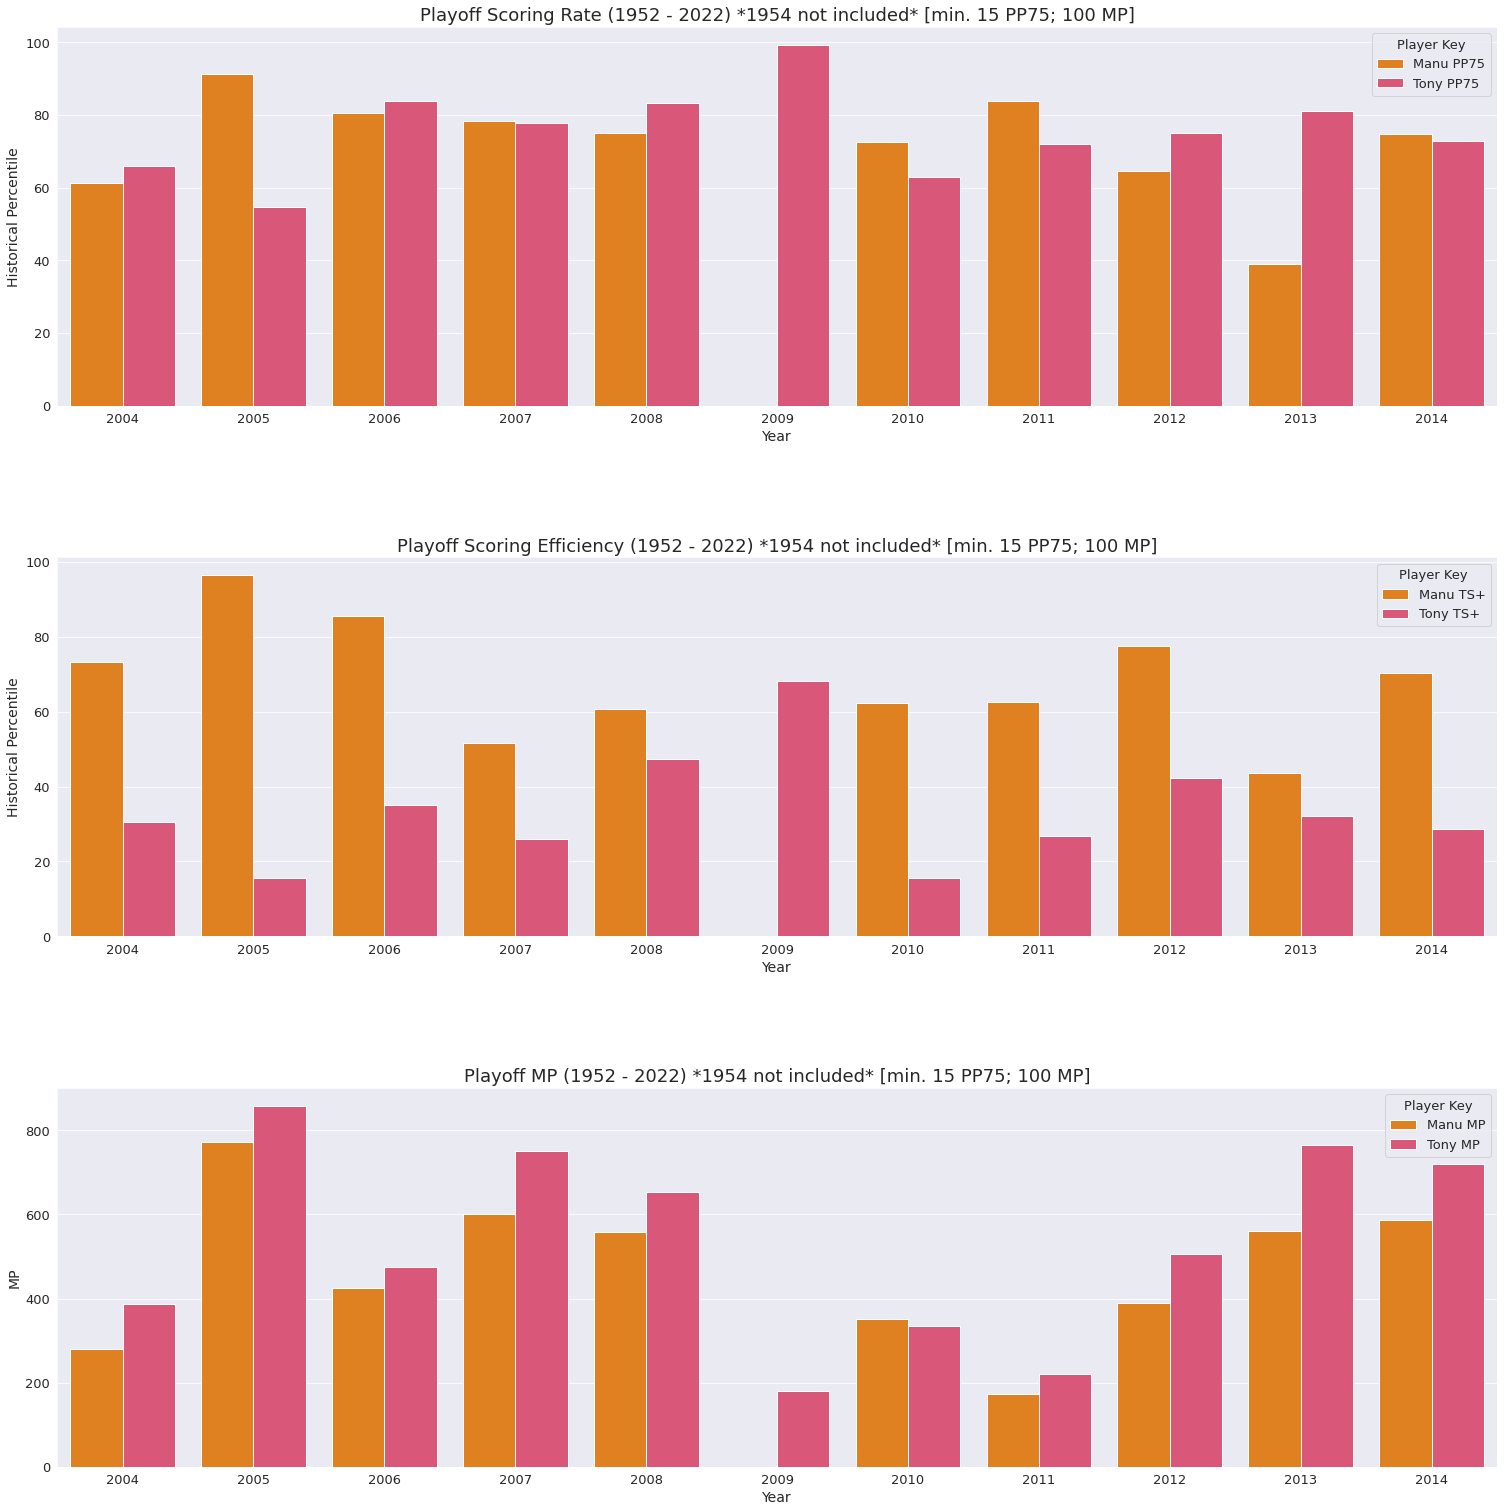

In [60]:
Spurs_Playoff_Percentile()
#Spurs_Playoff_4_Plus_Percentile()
#Spurs_Playoff_Series_Percentile()

**PLOT SHOOTING DISTRIBUTION DATA/PRINT MANUAL DATA**

In [ ]:
#@title Print Medians
def printmedians(pts_floor):
  # 2 year
  graph_data = pd.read_csv('/content/Two_Year_Scoring_Change.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS per 75_post'] >= pts_floor)]
  graph_data = graph_data[(graph_data['MP_post'] >= 300)]
  med_pts = graph_data['PTS_change'].median()
  med_ts = graph_data['TS+_change'].median()
  print("2 Year Median PTS per 75 decline")
  print(med_pts)
  print("2 Year Median TS+ decline")
  print(med_ts)
  # 3 year
  graph_data =  pd.read_csv('/content/Three_Year_Scoring_Change.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS per 75_post'] >= pts_floor)]
  graph_data = graph_data[(graph_data['MP_post'] >= 500)]
  med_pts = graph_data['PTS_change'].median()
  med_ts = graph_data['TS+_change'].median()
  print("3 Year Median PTS per 75 decline")
  print(med_pts)
  print("3 Year Median TS+ decline")
  print(med_ts)
  # 4 year
  graph_data =  pd.read_csv('/content/Four_Year_Scoring_Change.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS per 75_post'] >= pts_floor)]
  graph_data = graph_data[(graph_data['MP_post'] >= 800)]
  med_pts = graph_data['PTS_change'].median()
  med_ts = graph_data['TS+_change'].median()
  print("4 Year Median PTS per 75 decline")
  print(med_pts)
  print("4 Year Median TS+ decline")
  print(med_ts)
  # 5 year
  graph_data =  pd.read_csv('/content/Five_Year_Scoring_Change.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS per 75_post'] >= pts_floor)]
  graph_data = graph_data[(graph_data['MP_post'] >= 1000)]
  med_pts = graph_data['PTS_change'].median()
  med_ts = graph_data['TS+_change'].median()
  print("5 Year Median PTS per 75 decline")
  print(med_pts)
  print("5 Year Median TS+ decline")
  print(med_ts)
  # 6 year
  graph_data =  pd.read_csv('/content/Six_Year_Scoring_Change.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS per 75_post'] >= pts_floor)]
  graph_data = graph_data[(graph_data['MP_post'] >= 1200)]
  med_pts = graph_data['PTS_change'].median()
  med_ts = graph_data['TS+_change'].median()
  print("6 Year Median PTS per 75 decline")
  print(med_pts)
  print("6 Year Median TS+ decline")
  print(med_ts)
  # 7 year
  graph_data =  pd.read_csv('/content/Seven_Year_Scoring_Change.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS per 75_post'] >= pts_floor)]
  graph_data = graph_data[(graph_data['MP_post'] >= 1400)]
  med_pts = graph_data['PTS_change'].median()
  med_ts = graph_data['TS+_change'].median()
  print("7 Year Median PTS per 75 decline")
  print(med_pts)
  print("7 Year Median TS+ decline")
  print(med_ts)
  # 8 year
  graph_data =  pd.read_csv('/content/Eight_Year_Scoring_Change.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS per 75_post'] >= pts_floor)]
  graph_data = graph_data[(graph_data['MP_post'] >= 1500)]
  med_pts = graph_data['PTS_change'].median()
  med_ts = graph_data['TS+_change'].median()
  print("8 Year Median PTS per 75 decline")
  print(med_pts)
  print("8 Year Median TS+ decline")
  print(med_ts)
  # 10 year
  graph_data =  pd.read_csv('/content/Ten_Year_Scoring_Change.csv', encoding='utf8')
  graph_data = graph_data[(graph_data['PTS per 75_post'] >= pts_floor)]
  graph_data = graph_data[(graph_data['MP_post'] >= 2000)]
  med_pts = graph_data['PTS_change'].median()
  med_ts = graph_data['TS+_change'].median()
  print("10 Year Median PTS per 75 decline")
  print(med_pts)
  print("10 Year Median TS+ decline")
  print(med_ts)

In [ ]:
#@title Print Distribution of Scoring Changes
def printTSdistribution(all_some, pts_floor):
  if all_some == 0:
    # 2 year
    graph_data = pd.read_csv('/content/Two_Year_Scoring_Change.csv', encoding='utf8')

    # 3 year
    tmp_data =  pd.read_csv('/content/Three_Year_Scoring_Change.csv', encoding='utf8')
    graph_data = graph_data.append(tmp_data)

    # 4 year
    tmp_data =  pd.read_csv('/content/Four_Year_Scoring_Change.csv', encoding='utf8')
    graph_data = graph_data.append(tmp_data)

    # 5 year
    tmp_data =  pd.read_csv('/content/Five_Year_Scoring_Change.csv', encoding='utf8')
    graph_data = graph_data.append(tmp_data)

    # 6 year
    tmp_data =  pd.read_csv('/content/Six_Year_Scoring_Change.csv', encoding='utf8')
    graph_data = graph_data.append(tmp_data)

    # 7 year
    tmp_data =  pd.read_csv('/content/Seven_Year_Scoring_Change.csv', encoding='utf8')
    graph_data = graph_data.append(tmp_data)

    # 8 year
    tmp_data =  pd.read_csv('/content/Eight_Year_Scoring_Change.csv', encoding='utf8')
    graph_data = graph_data.append(tmp_data)

    # 10 year
    tmp_data =  pd.read_csv('/content/Ten_Year_Scoring_Change.csv', encoding='utf8')
    graph_data = graph_data.append(tmp_data)
    graph_data = graph_data[(graph_data['MP_post'] >= 500)]
    graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
    graph_data = graph_data.dropna()
  else:
    graph_data =  pd.read_csv('/content/All_Scoring_Changes_300min.csv', encoding='utf8')
    graph_data = graph_data[(graph_data['MP_post'] >= 500)]
    graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
    graph_data = graph_data.dropna()

  graph_data['PTS_change'] = graph_data['PTS_change'].round(1)
  graph_data['TS+_change'] = graph_data['TS+_change'].round(1)

  plt.figure(figsize=(20,12), tight_layout=True)

  pd.cut(graph_data['TS+_change'], 
       bins=[-17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], 
       labels = ['-17% or worse', '-16%', '-15%', '-14%', '-13%', '-12%', '-11%', '-10%', '-9%', '-8%', '-7%', '-6%', '-5%', '-4%',
                 '-3%', '-2%', '-1%', '0%', '+1%', '+2%', '+3%', '+4%', '+5%', '+6%',
                 '+7% or better'])\
  .value_counts(sort=False).plot.bar()
  title_string = f"Reg->Post Scoring Change; Multi Year Playoff Stretches; >= {pts_floor} PP75 Post (1974-2022)"
  plt.title(title_string)
  plt.xlabel('Change in TS+')
  plt.ylabel('Count')
  plt.show()
  print(graph_data['TS+_change'].quantile(0.98))

def printPTSdistribution(all_some, pts_floor):
  if all_some == 0:
    # 2 year
    graph_data = pd.read_csv('/content/Two_Year_Scoring_Change.csv', encoding='utf8')

    # 3 year
    tmp_data =  pd.read_csv('/content/Three_Year_Scoring_Change.csv', encoding='utf8')
    graph_data = graph_data.append(tmp_data)

    # 4 year
    tmp_data =  pd.read_csv('/content/Four_Year_Scoring_Change.csv', encoding='utf8')
    graph_data = graph_data.append(tmp_data)

    # 5 year
    tmp_data =  pd.read_csv('/content/Five_Year_Scoring_Change.csv', encoding='utf8')
    graph_data = graph_data.append(tmp_data)

    # 6 year
    tmp_data =  pd.read_csv('/content/Six_Year_Scoring_Change.csv', encoding='utf8')
    graph_data = graph_data.append(tmp_data)

    # 7 year
    tmp_data =  pd.read_csv('/content/Seven_Year_Scoring_Change.csv', encoding='utf8')
    graph_data = graph_data.append(tmp_data)

    # 8 year
    tmp_data =  pd.read_csv('/content/Eight_Year_Scoring_Change.csv', encoding='utf8')
    graph_data = graph_data.append(tmp_data)

    # 10 year
    tmp_data =  pd.read_csv('/content/Ten_Year_Scoring_Change.csv', encoding='utf8')
    graph_data = graph_data.append(tmp_data)
    graph_data = graph_data[(graph_data['MP_post'] >= 500)]
    graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
    graph_data = graph_data.dropna()
  else:
    graph_data =  pd.read_csv('/content/All_Scoring_Changes_300min.csv', encoding='utf8')
    graph_data = graph_data[(graph_data['MP_post'] >= 500)]
    graph_data = graph_data[(graph_data['PTS per 75_post']) >= pts_floor]
    graph_data = graph_data.dropna()

  graph_data['PTS_change'] = graph_data['PTS_change'].round(1)
  graph_data['TS+_change'] = graph_data['TS+_change'].round(1)

  plt.figure(figsize=(20,12), tight_layout=True)

  pd.cut(graph_data['PTS_change'], 
       bins=[-6, -5.5, -5, -4.5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], 
       labels = ['-6 PTS or worse', '-5.5', '-5', '-4.5', '-4', '-3.5', '-3', '-2.5', '-2', '-1.5', '-1', '-0.5', '0', '+0.5', '+1', '+1.5', '+2', '+2.5', '+3', '+3.5', '+4', '+4.5% or better'])\
  .value_counts(sort=False).plot.bar()
  title_string = f"Reg->Post Scoring Change; Multi Year Playoff Stretches; >= {pts_floor} PP75 Post (1974-2022)"
  plt.title(title_string)
  plt.xlabel('Change in PTS per 75')
  plt.ylabel('Count')
  plt.show()
  print(graph_data['PTS_change'].quantile(0.8))

In [ ]:
#@title Round Format
player_change_file['TS+_change'] = player_change_file['TS+_change'].round(2)
player_change_file['PTS_change'] = player_change_file['PTS_change'].round(2)
player_change_file['PTS per 75_post'] = player_change_file['PTS per 75_post'].round(2)
player_change_file['TS+_post'] = player_change_file['TS+_post'].round(2)

In [ ]:
#@title Manual comparisons function
sorted_playoffs_pts = era_opponent_adj_playoff_per_75_df.copy()
sorted_reg_pts = import_player_since74_per75_df.copy()

player_a = sorted_playoffs_pts[(sorted_playoffs_pts.Player == "Kawhi Leonard") & ((sorted_playoffs_pts.Year == 2017) | (sorted_playoffs_pts.Year == 2019)  | (sorted_playoffs_pts.Year == 2021))]
player_b = sorted_playoffs_pts[(sorted_playoffs_pts.Player == "Kevin Durant") & ((sorted_playoffs_pts.Year == 2012) | (sorted_playoffs_pts.Year == 2017)  | (sorted_playoffs_pts.Year == 2018) | (sorted_playoffs_pts.Year == 2019) | (sorted_playoffs_pts.Year == 2021))]

#player_b = sorted_reg_pts[(sorted_reg_pts.Player == "Damian Lillard") & ((sorted_reg_pts.Year == 2014) | (sorted_reg_pts.Year == 2015)  | (sorted_reg_pts.Year == 2016) | (sorted_reg_pts.Year == 2016) | (sorted_reg_pts.Year == 2017) | (sorted_reg_pts.Year == 2019) | (sorted_reg_pts.Year == 2020) | (sorted_reg_pts.Year == 2021))]

#player_a = sorted_pts[(sorted_pts.Player == "Kawhi Leonard") & ((sorted_pts.Year == 2012) | (sorted_pts.Year == 2014)  | (sorted_pts.Year == 2019) | (sorted_pts.Year == 2016) | (sorted_pts.Year == 2015) | (sorted_pts.Year == 2017) | (sorted_pts.Year == 2020) | (sorted_pts.Year == 2021))]

#player_a = sorted_playoffs_pts[(sorted_playoffs_pts.Player == "Klay Thompson") & ((sorted_playoffs_pts.Year == 2013) | (sorted_playoffs_pts.Year == 2014)  | (sorted_playoffs_pts.Year == 2015) | (sorted_playoffs_pts.Year == 2016) | (sorted_playoffs_pts.Year == 2017) | (sorted_playoffs_pts.Year == 2018) | (sorted_playoffs_pts.Year == 2019))]
#player_b = sorted_playoffs_pts[(sorted_playoffs_pts.Player == "Kobe Bryant")]
#player_a = df[(df.Player == a)]
#player_b = df[(df.Player == b)]
total_mp_a = 0
total_pts_a = 0
total_ts_a = 0

total_mp_b = 0
total_pts_b = 0
total_ts_b = 0
mp_list_a = []
mp_list_b = []

# find total minutes a
for row in player_a['MP']:
  mp_list_a.append(row)
  total_mp_a += row
print(player_a.iat[0, 3], "\nminutes: ", total_mp_a)

# find total PTS a
i = 0
for row in player_a['PTS']:
  total_pts_a += row * (mp_list_a[i] / total_mp_a)
  i = i + 1

# find total TS+ a
i = 0
for row in player_a['TS%+']:
  total_ts_a += row * (mp_list_a[i] / total_mp_a)
  i = i + 1

print("PTS per 75: ", total_pts_a)
print("TS+: ",total_ts_a)

# find total minutes
for row in player_b['MP']:
  mp_list_b.append(row)
  total_mp_b += row
print("\n")
print(player_b.iat[0, 3], "\nminutes: ", total_mp_b)

# find total PTS
i = 0
for row in player_b['PTS']:
  total_pts_b += row * (mp_list_b[i] / total_mp_b)
  i = i + 1

# find total TS+
i = 0
for row in player_b['TS%+']:
  total_ts_b += row * (mp_list_b[i] / total_mp_b)
  i = i + 1

print("PTS per 75: ", total_pts_b)
print("TS+: ",total_ts_b)




In [ ]:
#@title def reg_playoff_comp(a, dfa, dfb) 
# def reg_playoff_comp(a, dfa, dfb) 
# print the change in scoring rate and effieciency for player from regular season, dfa, to postseason, dfb
def reg_playoff_comp(a, dfa, dfb):

  player_a = dfa[(dfa.Player == a)]
  player_b = dfb[(dfb.Player == a)]
  total_mp_a = 0
  pts_list_a = []
  ts_list_a = []

  total_mp_b = 0
  pts_list_b = []
  ts_list_b = []

  mp_list_a = []
  mp_list_b = []


  # find total PTS a
  i = 0
  for row in player_a['PTS']:
    pts_list_a.append(row)
    i = i + 1

  # find total TS+ a
  i = 0
  for row in player_a['TS%+']:
    ts_list_a.append(row)
    i = i + 1

  # find total minutes
  for row in player_b['MP']:
    mp_list_b.append(row)
    total_mp_b += row
  print("\n")
  print(player_b.iat[0, 3], "\nPlayoffs\n\nminutes: ", total_mp_b)

  # find total PTS
  i = 0
  for row in player_b['PTS']:
    pts_list_b.append(row)
    i = i + 1

  # find total TS+
  i = 0
  for row in player_b['TS%+']:
    ts_list_b.append(row)
    i = i + 1
    j = i

  i = 0

  total_pts = 0
  total_ts = 0
  while i <= j-1:
    total_pts += ((pts_list_b[i] - pts_list_a[i]) * (mp_list_b[i] / total_mp_b))
    print(pts_list_b[i] - pts_list_a[i])
    print(((pts_list_b[i] - pts_list_a[i]) * (mp_list_b[i] / total_mp_b)))
    total_ts += ((ts_list_b[i] - ts_list_a[i]) * (mp_list_b[i] / total_mp_b))
    i = i + 1

  print("\n\nRegular Season to Playoffs Change\n")
  if total_pts > 0:
    form_string = "PTS per 75: +{}".format(total_pts)
    print(form_string)
  else: 
    print("PTS per 75: ", total_pts)
  if total_ts > 0:
    form_string = "TS+ {}".format(total_ts)
    print(form_string)
  else:
    print("TS+: ",total_ts)

**SCORING PEAK FUNCTIONS**

In [ ]:
#@title Run Scoring Peaks

# 2
twoyearpeak(era_opponent_adj_playoff_per_75_df, 'PTS')
import_player_PTS_peaks_df = pd.read_csv('two_year_peak_PTS_data.csv', encoding='utf8')
import_player_PTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"two_year_peak_PTS_data.csv"
import_player_PTS_peaks_df.to_csv(outfile, index=False)

twoyearpeak(era_opponent_adj_playoff_per_75_df, 'TS%+')
import_player_TS_peaks_df = pd.read_csv('two_year_peak_TS%+_data.csv', encoding='utf8')
import_player_TS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"two_year_peak_TS%+_data.csv"
import_player_TS_peaks_df.to_csv(outfile, index=False)


# 3 
threeyearpeak(era_opponent_adj_playoff_per_75_df, 'PTS')
import_player_PTS_peaks_df = pd.read_csv('three_year_peak_PTS_data.csv', encoding='utf8')
import_player_PTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"three_year_peak_PTS_data.csv"
import_player_PTS_peaks_df.to_csv(outfile, index=False)

threeyearpeak(era_opponent_adj_playoff_per_75_df, 'TS%+')
import_player_TS_peaks_df = pd.read_csv('three_year_peak_TS%+_data.csv', encoding='utf8')
import_player_TS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"three_year_peak_TS%+_data.csv"
import_player_TS_peaks_df.to_csv(outfile, index=False)


# 4 
fouryearpeak(era_opponent_adj_playoff_per_75_df, 'PTS')
import_player_PTS_peaks_df = pd.read_csv('four_year_peak_PTS_data.csv', encoding='utf8')
import_player_PTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"four_year_peak_PTS_data.csv"
import_player_PTS_peaks_df.to_csv(outfile, index=False)

fouryearpeak(era_opponent_adj_playoff_per_75_df, 'TS%+')
import_player_TS_peaks_df = pd.read_csv('four_year_peak_TS%+_data.csv', encoding='utf8')
import_player_TS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"four_year_peak_TS%+_data.csv"
import_player_TS_peaks_df.to_csv(outfile, index=False)


# 5 
fiveyearpeak(era_opponent_adj_playoff_per_75_df, 'PTS')
import_player_PTS_peaks_df = pd.read_csv('five_year_peak_PTS_data.csv', encoding='utf8')
import_player_PTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"five_year_peak_PTS_data.csv"
import_player_PTS_peaks_df.to_csv(outfile, index=False)

fiveyearpeak(era_opponent_adj_playoff_per_75_df, 'TS%+')
import_player_TS_peaks_df = pd.read_csv('five_year_peak_TS%+_data.csv', encoding='utf8')
import_player_TS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"five_year_peak_TS%+_data.csv"
import_player_TS_peaks_df.to_csv(outfile, index=False)


# 6 
sixyearpeak(era_opponent_adj_playoff_per_75_df, 'PTS')
import_player_PTS_peaks_df = pd.read_csv('six_year_peak_PTS_data.csv', encoding='utf8')
import_player_PTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"six_year_peak_PTS_data.csv"
import_player_PTS_peaks_df.to_csv(outfile, index=False)

sixyearpeak(era_opponent_adj_playoff_per_75_df, 'TS%+')
import_player_TS_peaks_df = pd.read_csv('six_year_peak_TS%+_data.csv', encoding='utf8')
import_player_TS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"six_year_peak_TS%+_data.csv"
import_player_TS_peaks_df.to_csv(outfile, index=False)


# 7 
sevenyearpeak(era_opponent_adj_playoff_per_75_df, 'PTS')
import_player_PTS_peaks_df = pd.read_csv('seven_year_peak_PTS_data.csv', encoding='utf8')
import_player_PTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"seven_year_peak_PTS_data.csv"
import_player_PTS_peaks_df.to_csv(outfile, index=False)

sevenyearpeak(era_opponent_adj_playoff_per_75_df, 'TS%+')
import_player_TS_peaks_df = pd.read_csv('seven_year_peak_TS%+_data.csv', encoding='utf8')
import_player_TS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"seven_year_peak_TS%+_data.csv"
import_player_TS_peaks_df.to_csv(outfile, index=False)


# 8 
eightyearpeak(era_opponent_adj_playoff_per_75_df, 'PTS')
import_player_PTS_peaks_df = pd.read_csv('eight_year_peak_PTS_data.csv', encoding='utf8')
import_player_PTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"eight_year_peak_PTS_data.csv"
import_player_PTS_peaks_df.to_csv(outfile, index=False)

eightyearpeak(era_opponent_adj_playoff_per_75_df, 'TS%+')
import_player_TS_peaks_df = pd.read_csv('eight_year_peak_TS%+_data.csv', encoding='utf8')
import_player_TS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"eight_year_peak_TS%+_data.csv"
import_player_TS_peaks_df.to_csv(outfile, index=False)


# 9 
nineyearpeak(era_opponent_adj_playoff_per_75_df, 'PTS')
import_player_PTS_peaks_df = pd.read_csv('nine_year_peak_PTS_data.csv', encoding='utf8')
import_player_PTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"nine_year_peak_PTS_data.csv"
import_player_PTS_peaks_df.to_csv(outfile, index=False)

nineyearpeak(era_opponent_adj_playoff_per_75_df, 'TS%+')
import_player_TS_peaks_df = pd.read_csv('nine_year_peak_TS%+_data.csv', encoding='utf8')
import_player_TS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"nine_year_peak_TS%+_data.csv"
import_player_TS_peaks_df.to_csv(outfile, index=False)


# 10 
tenyearpeak(era_opponent_adj_playoff_per_75_df, 'PTS')
import_player_PTS_peaks_df = pd.read_csv('ten_year_peak_PTS_data.csv', encoding='utf8')
import_player_PTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"ten_year_peak_PTS_data.csv"
import_player_PTS_peaks_df.to_csv(outfile, index=False)

tenyearpeak(era_opponent_adj_playoff_per_75_df, 'TS%+')
import_player_TS_peaks_df = pd.read_csv('ten_year_peak_TS%+_data.csv', encoding='utf8')
import_player_TS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"ten_year_peak_TS%+_data.csv"
import_player_TS_peaks_df.to_csv(outfile, index=False)

In [ ]:
#@title Import Scoring Peaks

# 2
import_adjpts_twopeaks_df = pd.read_csv('two_year_peak_PTS_data.csv', encoding='utf8')
import_adjpts_twopeaks_df = import_adjpts_twopeaks_df.assign(TeamColor=0)

import_adjts_twopeaks_df = pd.read_csv('two_year_peak_TS%+_data.csv', encoding='utf8')
import_adjts_twopeaks_df = import_adjts_twopeaks_df.assign(TeamColor=0)

# add team color for plotting
import_adjpts_twopeaks_df['TeamColor'] = import_adjpts_twopeaks_df['Team'].map(team_colors)
import_adjts_twopeaks_df['TeamColor'] = import_adjts_twopeaks_df['Team'].map(team_colors)

import_adjpts_threepeaks_df = pd.read_csv('three_year_peak_PTS_data.csv', encoding='utf8')
import_adjpts_threepeaks_df = import_adjpts_threepeaks_df.assign(TeamColor=0)

import_adjts_threepeaks_df = pd.read_csv('three_year_peak_TS%+_data.csv', encoding='utf8')
import_adjts_threepeaks_df = import_adjts_threepeaks_df.assign(TeamColor=0)

# add team color for plotting
import_adjpts_threepeaks_df['TeamColor'] = import_adjpts_threepeaks_df['Team'].map(team_colors)
import_adjts_threepeaks_df['TeamColor'] = import_adjts_threepeaks_df['Team'].map(team_colors)

import_adjpts_4peaks_df = pd.read_csv('four_year_peak_PTS_data.csv', encoding='utf8')
import_adjpts_4peaks_df = import_adjpts_4peaks_df.assign(TeamColor=0)

import_adjts_4peaks_df = pd.read_csv('four_year_peak_TS%+_data.csv', encoding='utf8')
import_adjts_4peaks_df = import_adjts_4peaks_df.assign(TeamColor=0)

# add team color for plotting
import_adjpts_4peaks_df['TeamColor'] = import_adjpts_4peaks_df['Team'].map(team_colors)
import_adjts_4peaks_df['TeamColor'] = import_adjts_4peaks_df['Team'].map(team_colors)

import_adjpts_fivepeaks_df = pd.read_csv('five_year_peak_PTS_data.csv', encoding='utf8')
import_adjpts_fivepeaks_df = import_adjpts_fivepeaks_df.assign(TeamColor=0)

import_adjts_fivepeaks_df = pd.read_csv('five_year_peak_TS%+_data.csv', encoding='utf8')
import_adjts_fivepeaks_df = import_adjts_fivepeaks_df.assign(TeamColor=0)

# add team color for plotting
import_adjpts_fivepeaks_df['TeamColor'] = import_adjpts_fivepeaks_df['Team'].map(team_colors)
import_adjts_fivepeaks_df['TeamColor'] = import_adjts_fivepeaks_df['Team'].map(team_colors)

import_adjpts_6peaks_df = pd.read_csv('six_year_peak_PTS_data.csv', encoding='utf8')
import_adjpts_6peaks_df = import_adjpts_6peaks_df.assign(TeamColor=0)

import_adjts_6peaks_df = pd.read_csv('six_year_peak_TS%+_data.csv', encoding='utf8')
import_adjts_6peaks_df = import_adjts_6peaks_df.assign(TeamColor=0)

# add team color for plotting
import_adjts_6peaks_df['TeamColor'] = import_adjts_6peaks_df['Team'].map(team_colors)
import_adjpts_6peaks_df['TeamColor'] = import_adjpts_6peaks_df['Team'].map(team_colors)

import_adjpts_7peaks_df = pd.read_csv('seven_year_peak_PTS_data.csv', encoding='utf8')
import_adjpts_7peaks_df = import_adjpts_7peaks_df.assign(TeamColor=0)

import_adjts_7peaks_df = pd.read_csv('seven_year_peak_TS%+_data.csv', encoding='utf8')
import_adjts_7peaks_df = import_adjts_7peaks_df.assign(TeamColor=0)

# add team color for plotting
import_adjts_7peaks_df['TeamColor'] = import_adjts_7peaks_df['Team'].map(team_colors)
import_adjpts_7peaks_df['TeamColor'] = import_adjpts_7peaks_df['Team'].map(team_colors)

import_adjpts_eightpeaks_df = pd.read_csv('eight_year_peak_PTS_data.csv', encoding='utf8')
import_adjpts_eightpeaks_df = import_adjpts_eightpeaks_df.assign(TeamColor=0)

import_adjts_eightpeaks_df = pd.read_csv('eight_year_peak_TS%+_data.csv', encoding='utf8')
import_adjts_eightpeaks_df = import_adjts_eightpeaks_df.assign(TeamColor=0)

# add team color for plotting
import_adjpts_eightpeaks_df['TeamColor'] = import_adjpts_eightpeaks_df['Team'].map(team_colors)
import_adjts_eightpeaks_df['TeamColor'] = import_adjts_eightpeaks_df['Team'].map(team_colors)

import_adjpts_9peaks_df = pd.read_csv('nine_year_peak_PTS_data.csv', encoding='utf8')
import_adjpts_9peaks_df = import_adjpts_9peaks_df.assign(TeamColor=0)

import_adjts_9peaks_df = pd.read_csv('nine_year_peak_TS%+_data.csv', encoding='utf8')
import_adjts_9peaks_df = import_adjts_9peaks_df.assign(TeamColor=0)

# add team color for plotting
import_adjpts_9peaks_df['TeamColor'] = import_adjpts_9peaks_df['Team'].map(team_colors)
import_adjts_9peaks_df['TeamColor'] = import_adjts_9peaks_df['Team'].map(team_colors)

import_adjpts_10peaks_df = pd.read_csv('ten_year_peak_PTS_data.csv', encoding='utf8')
import_adjpts_10peaks_df = import_adjpts_10peaks_df.assign(TeamColor=0)

import_adjts_10peaks_df = pd.read_csv('ten_year_peak_TS%+_data.csv', encoding='utf8')
import_adjts_10peaks_df = import_adjts_10peaks_df.assign(TeamColor=0)

# add team color for plotting
import_adjpts_10peaks_df['TeamColor'] = import_adjpts_10peaks_df['Team'].map(team_colors)
import_adjts_10peaks_df['TeamColor'] = import_adjts_10peaks_df['Team'].map(team_colors)

In [ ]:
#@title Output Scoring Peaks

# 2
at_least_400_min_2pts = import_adjpts_twopeaks_df[(import_adjpts_twopeaks_df['MP'] >= 300)]
at_least_400_min_2pts = at_least_400_min_2pts.reset_index(drop=True)

at_least_400_min_2ts = import_adjts_twopeaks_df[(import_adjts_twopeaks_df['MP'] >= 300)]
at_least_400_min_2ts = at_least_400_min_2ts.reset_index(drop=True)

sorted_2pts = at_least_400_min_2pts.copy()
sorted_2pts.insert(6, "TS+", at_least_400_min_2ts['PeakValue'])
sorted_2pts = sorted_2pts.rename(columns={"Years": "Years", "Player": "Player", "Team": "Team", "PeakValue": "PTS", "MP": "MP", "TeamColor": "TeamColor", "TS+": "TS+", "G": "G"})

sorted_2pts = sorted_2pts.sort_values('PTS', ascending=False)
sorted_2pts = sorted_2pts.drop(columns=['TeamColor'])

columns_titles = ['Player', 'Years', 'Team', 'PTS', 'TS+', 'MP', 'G']
sorted_2pts = sorted_2pts.reindex(columns=columns_titles)

sorted_2pts['PTS'] = sorted_2pts['PTS'].round(2)
sorted_2pts['TS+'] = sorted_2pts['TS+'].round(2)

sorted_2pts = sorted_2pts.dropna()

print(sorted_2pts)

sorted_2pts.to_csv("Two_Year_scoring_Playoff_Peaks.csv", index=False)



# 3
at_least_400_min_pts = import_adjpts_threepeaks_df[(import_adjpts_threepeaks_df['MP'] >= 300)]
at_least_400_min_pts = at_least_400_min_pts.reset_index(drop=True)

at_least_400_min_ts = import_adjts_threepeaks_df[(import_adjts_threepeaks_df['MP'] >= 300)]
at_least_400_min_ts = at_least_400_min_ts.reset_index(drop=True)

sorted_3pts = at_least_400_min_pts.copy()
sorted_3pts.insert(6, "TS+", at_least_400_min_ts['PeakValue'])
sorted_3pts = sorted_3pts.rename(columns={"Years": "Years", "Player": "Player", "Team": "Team", "PeakValue": "PTS", "MP": "MP", "TeamColor": "TeamColor", "TS+": "TS+", "G": "G"})

sorted_3pts = sorted_3pts.sort_values('PTS', ascending=False)
sorted_3pts = sorted_3pts.drop(columns=['TeamColor'])

columns_titles = ['Player', 'Years', 'Team', 'PTS', 'TS+', 'MP', 'G']
sorted_3pts = sorted_3pts.reindex(columns=columns_titles)

sorted_3pts['PTS'] = sorted_3pts['PTS'].round(2)
sorted_3pts['TS+'] = sorted_3pts['TS+'].round(2)

sorted_3pts = sorted_3pts.dropna()

print(sorted_3pts)

sorted_3pts.to_csv("Three_Year_scoring_Playoff_Peaks.csv", index=False)



# 4
at_least_400_min_pts = import_adjpts_4peaks_df[(import_adjpts_4peaks_df['MP'] >= 600)]
at_least_400_min_pts = at_least_400_min_pts.reset_index(drop=True)

at_least_400_min_ts = import_adjts_4peaks_df[(import_adjts_4peaks_df['MP'] >= 600)]
at_least_400_min_ts = at_least_400_min_ts.reset_index(drop=True)

sorted_3pts = at_least_400_min_pts.copy()
sorted_3pts.insert(6, "TS+", at_least_400_min_ts['PeakValue'])
sorted_3pts = sorted_3pts.rename(columns={"Years": "Years", "Player": "Player", "Team": "Team", "PeakValue": "PTS", "MP": "MP", "TeamColor": "TeamColor", "TS+": "TS+", "G": "G"})

sorted_3pts = sorted_3pts.sort_values('PTS', ascending=False)
sorted_3pts = sorted_3pts.drop(columns=['TeamColor'])

columns_titles = ['Player', 'Years', 'Team', 'PTS', 'TS+', 'MP', 'G']
sorted_3pts = sorted_3pts.reindex(columns=columns_titles)

sorted_3pts['PTS'] = sorted_3pts['PTS'].round(2)
sorted_3pts['TS+'] = sorted_3pts['TS+'].round(2)

sorted_3pts = sorted_3pts.dropna()

print(sorted_3pts)

sorted_3pts.to_csv("Four_Year_scoring_Playoff_Peaks.csv", index=False)



# 5
at_least_800_min_pts = import_adjpts_fivepeaks_df[(import_adjpts_fivepeaks_df['MP'] >= 1000)]
at_least_800_min_ts = import_adjts_fivepeaks_df[(import_adjts_fivepeaks_df['MP'] >= 1000)]


sorted_5pts = at_least_800_min_pts.copy()
sorted_5pts.insert(6, "TS+", at_least_800_min_ts['PeakValue'])
sorted_5pts = sorted_5pts.rename(columns={"Years": "Years", "Player": "Player", "Team": "Team", "PeakValue": "PTS", "MP": "MP", "TeamColor": "TeamColor", "TS+": "TS+", "G": "G"})

sorted_5pts = sorted_5pts.sort_values('PTS', ascending=False)
sorted_5pts = sorted_5pts.drop(columns=['TeamColor'])

columns_titles = ['Player', 'Years', 'Team', 'PTS', 'TS+', 'MP', 'G']
sorted_5pts = sorted_5pts.reindex(columns=columns_titles)
sorted_5pts = sorted_5pts.reset_index(drop=True)

sorted_5pts['PTS'] = sorted_5pts['PTS'].round(2)
sorted_5pts['TS+'] = sorted_5pts['TS+'].round(2)

sorted_5pts = sorted_5pts.dropna()

print(sorted_5pts)

sorted_5pts.to_csv("Five_Year_scoring_Playoff_Peaks.csv", index=False)



# 6
at_least_800_min_pts = import_adjpts_6peaks_df[(import_adjpts_6peaks_df['MP'] >= 1200)]
at_least_800_min_ts = import_adjts_6peaks_df[(import_adjts_6peaks_df['MP'] >= 1200)]


sorted_5pts = at_least_800_min_pts.copy()
sorted_5pts.insert(6, "TS+", at_least_800_min_ts['PeakValue'])
sorted_5pts = sorted_5pts.rename(columns={"Years": "Years", "Player": "Player", "Team": "Team", "PeakValue": "PTS", "MP": "MP", "TeamColor": "TeamColor", "TS+": "TS+", "G": "G"})

sorted_5pts = sorted_5pts.sort_values('PTS', ascending=False)
sorted_5pts = sorted_5pts.drop(columns=['TeamColor'])

columns_titles = ['Player', 'Years', 'Team', 'PTS', 'TS+', 'MP', 'G']
sorted_5pts = sorted_5pts.reindex(columns=columns_titles)
sorted_5pts = sorted_5pts.reset_index(drop=True)

sorted_5pts['PTS'] = sorted_5pts['PTS'].round(2)
sorted_5pts['TS+'] = sorted_5pts['TS+'].round(2)

sorted_5pts = sorted_5pts.dropna()

print(sorted_5pts)

sorted_5pts.to_csv("Six_Year_scoring_Playoff_Peaks.csv", index=False)



# 7
at_least_800_min_pts = import_adjpts_7peaks_df[(import_adjpts_7peaks_df['MP'] >= 1400)]
at_least_800_min_ts = import_adjts_7peaks_df[(import_adjts_7peaks_df['MP'] >= 1400)]


sorted_5pts = at_least_800_min_pts.copy()
sorted_5pts.insert(6, "TS+", at_least_800_min_ts['PeakValue'])
sorted_5pts = sorted_5pts.rename(columns={"Years": "Years", "Player": "Player", "Team": "Team", "PeakValue": "PTS", "MP": "MP", "TeamColor": "TeamColor", "TS+": "TS+", "G": "G"})

sorted_5pts = sorted_5pts.sort_values('PTS', ascending=False)
sorted_5pts = sorted_5pts.drop(columns=['TeamColor'])

columns_titles = ['Player', 'Years', 'Team', 'PTS', 'TS+', 'MP', 'G']
sorted_5pts = sorted_5pts.reindex(columns=columns_titles)
sorted_5pts = sorted_5pts.reset_index(drop=True)

sorted_5pts['PTS'] = sorted_5pts['PTS'].round(2)
sorted_5pts['TS+'] = sorted_5pts['TS+'].round(2)

sorted_5pts = sorted_5pts.dropna()

print(sorted_5pts)

sorted_5pts.to_csv("Seven_Year_scoring_Playoff_Peaks.csv", index=False)



# 8
at_least_1500_min_pts = import_adjpts_eightpeaks_df[(import_adjpts_eightpeaks_df['MP'] >= 1500)]
at_least_1500_min_ts = import_adjts_eightpeaks_df[(import_adjts_eightpeaks_df['MP'] >= 1500)]


sorted_8pts = at_least_1500_min_pts.copy()
sorted_8pts.insert(6, "TS+", at_least_1500_min_ts['PeakValue'])
sorted_8pts = sorted_8pts.rename(columns={"Years": "Years", "Player": "Player", "Team": "Team", "PeakValue": "PTS", "MP": "MP", "TeamColor": "TeamColor", "TS+": "TS+", "G": "G"})

sorted_8pts = sorted_8pts.sort_values('PTS', ascending=False)
sorted_8pts = sorted_8pts.drop(columns=['TeamColor'])

columns_titles = ['Player', 'Years', 'Team', 'PTS', 'TS+', 'MP', 'G']
sorted_8pts = sorted_8pts.reindex(columns=columns_titles)
sorted_8pts = sorted_8pts.reset_index(drop=True)

sorted_8pts['PTS'] = sorted_8pts['PTS'].round(2)
sorted_8pts['TS+'] = sorted_8pts['TS+'].round(2)

sorted_8pts = sorted_8pts.dropna()


print(sorted_8pts)

sorted_8pts.to_csv("Eight_Year_scoring_Playoff_Peaks_1500min.csv", index=False)



# 9
at_least_1500_min_pts = import_adjpts_9peaks_df[(import_adjpts_9peaks_df['MP'] >= 1700)]
at_least_1500_min_ts = import_adjts_9peaks_df[(import_adjts_9peaks_df['MP'] >= 1700)]


sorted_9pts = at_least_1500_min_pts.copy()
sorted_9pts.insert(6, "TS+", at_least_1500_min_ts['PeakValue'])
sorted_9pts = sorted_9pts.rename(columns={"Years": "Years", "Player": "Player", "Team": "Team", "PeakValue": "PTS", "MP": "MP", "TeamColor": "TeamColor", "TS+": "TS+", "G": "G"})

sorted_9pts = sorted_9pts.sort_values('PTS', ascending=False)
sorted_9pts = sorted_9pts.drop(columns=['TeamColor'])

columns_titles = ['Player', 'Years', 'Team', 'PTS', 'TS+', 'MP', 'G']
sorted_9pts = sorted_9pts.reindex(columns=columns_titles)
sorted_9pts = sorted_9pts.reset_index(drop=True)

sorted_9pts['PTS'] = sorted_9pts['PTS'].round(2)
sorted_9pts['TS+'] = sorted_9pts['TS+'].round(2)

sorted_9pts = sorted_9pts.dropna()


print(sorted_9pts)

sorted_9pts.to_csv("Nine_Year_scoring_Playoff_Peaks_1700min.csv", index=False)



# 10
at_least_2000_min_pts = import_adjpts_10peaks_df[(import_adjpts_10peaks_df['MP'] >= 2000)]
at_least_2000_min_ts = import_adjts_10peaks_df[(import_adjts_10peaks_df['MP'] >= 2000)]


sorted_10pts = at_least_2000_min_pts.copy()
sorted_10pts.insert(6, "TS+", at_least_2000_min_ts['PeakValue'])
sorted_10pts = sorted_10pts.rename(columns={"Years": "Years", "Player": "Player", "Team": "Team", "PeakValue": "PTS", "MP": "MP", "TeamColor": "TeamColor", "TS+": "TS+", "G": "G"})

sorted_10pts = sorted_10pts.sort_values('PTS', ascending=False)
sorted_10pts = sorted_10pts.drop(columns=['TeamColor'])

columns_titles = ['Player', 'Years', 'Team', 'PTS', 'TS+', 'MP', 'G']
sorted_10pts = sorted_10pts.reindex(columns=columns_titles)
sorted_10pts = sorted_10pts.reset_index(drop=True)
sorted_10pts['PTS'] = sorted_10pts['PTS'].round(2)
sorted_10pts['TS+'] = sorted_10pts['TS+'].round(2)

sorted_10pts = sorted_10pts.dropna()

print(sorted_10pts)

sorted_10pts.to_csv("Ten_Year_scoring_Playoff_Peaks_2000min.csv", index=False)

**BPM PEAK FILES**

In [ ]:
#@title Run BPM Peaks
twoyearpeak(new_df, 'BPM')
import_player_longPTS_peaks_df = pd.read_csv('two_year_peak_BPM_data.csv', encoding='utf8')
import_player_longPTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"two_year_peak_BPM_data.csv"
import_player_longPTS_peaks_df.to_csv(outfile, index=False)
twoyearpeak(new_df, 'OBPM')
import_player_longTS_peaks_df = pd.read_csv('two_year_peak_OBPM_data.csv', encoding='utf8')
import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"two_year_peak_OBPM_data.csv"
import_player_longTS_peaks_df.to_csv(outfile, index=False)

# 3
threeyearpeak(new_df, 'BPM')
import_player_longPTS_peaks_df = pd.read_csv('three_year_peak_BPM_data.csv', encoding='utf8')
import_player_longPTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"three_year_peak_BPM_data.csv"
import_player_longPTS_peaks_df.to_csv(outfile, index=False)
threeyearpeak(new_df, 'OBPM')
import_player_longTS_peaks_df = pd.read_csv('three_year_peak_OBPM_data.csv', encoding='utf8')
import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"three_year_peak_OBPM_data.csv"
import_player_longTS_peaks_df.to_csv(outfile, index=False)

#4
fouryearpeak(new_df, 'BPM')
import_player_longPTS_peaks_df = pd.read_csv('four_year_peak_BPM_data.csv', encoding='utf8')
import_player_longPTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"four_year_peak_BPM_data.csv"
import_player_longPTS_peaks_df.to_csv(outfile, index=False)
fouryearpeak(new_df, 'OBPM')
import_player_longTS_peaks_df = pd.read_csv('four_year_peak_OBPM_data.csv', encoding='utf8')
import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"four_year_peak_OBPM_data.csv"
import_player_longTS_peaks_df.to_csv(outfile, index=False)

#5
fiveyearpeak(new_df, 'BPM')
import_player_longPTS_peaks_df = pd.read_csv('five_year_peak_BPM_data.csv', encoding='utf8')
import_player_longPTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"five_year_peak_BPM_data.csv"
import_player_longPTS_peaks_df.to_csv(outfile, index=False)
fiveyearpeak(new_df, 'OBPM')
import_player_longTS_peaks_df = pd.read_csv('five_year_peak_OBPM_data.csv', encoding='utf8')
import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"five_year_peak_OBPM_data.csv"
import_player_longTS_peaks_df.to_csv(outfile, index=False)

#6
sixyearpeak(new_df, 'BPM')
import_player_longPTS_peaks_df = pd.read_csv('six_year_peak_BPM_data.csv', encoding='utf8')
import_player_longPTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"six_year_peak_BPM_data.csv"
import_player_longPTS_peaks_df.to_csv(outfile, index=False)
sixyearpeak(new_df, 'OBPM')
import_player_longTS_peaks_df = pd.read_csv('six_year_peak_OBPM_data.csv', encoding='utf8')
import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"six_year_peak_OBPM_data.csv"
import_player_longTS_peaks_df.to_csv(outfile, index=False)

#7
sevenyearpeak(new_df, 'BPM')
import_player_longPTS_peaks_df = pd.read_csv('seven_year_peak_BPM_data.csv', encoding='utf8')
import_player_longPTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"seven_year_peak_BPM_data.csv"
import_player_longPTS_peaks_df.to_csv(outfile, index=False)
sevenyearpeak(new_df, 'OBPM')
import_player_longTS_peaks_df = pd.read_csv('seven_year_peak_OBPM_data.csv', encoding='utf8')
import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"seven_year_peak_OBPM_data.csv"
import_player_longTS_peaks_df.to_csv(outfile, index=False)

#
eightyearpeak(new_df, 'BPM')
import_player_longPTS_peaks_df = pd.read_csv('eight_year_peak_BPM_data.csv', encoding='utf8')
import_player_longPTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"eight_year_peak_BPM_data.csv"
import_player_longPTS_peaks_df.to_csv(outfile, index=False)
eightyearpeak(new_df, 'OBPM')
import_player_longTS_peaks_df = pd.read_csv('eight_year_peak_OBPM_data.csv', encoding='utf8')
import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"eight_year_peak_OBPM_data.csv"
import_player_longTS_peaks_df.to_csv(outfile, index=False)

#9
nineyearpeak(new_df, 'BPM')
import_player_longPTS_peaks_df = pd.read_csv('nine_year_peak_BPM_data.csv', encoding='utf8')
import_player_longPTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"nine_year_peak_BPM_data.csv"
import_player_longPTS_peaks_df.to_csv(outfile, index=False)
nineyearpeak(new_df, 'OBPM')
import_player_longTS_peaks_df = pd.read_csv('nine_year_peak_OBPM_data.csv', encoding='utf8')
import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"nine_year_peak_OBPM_data.csv"
import_player_longTS_peaks_df.to_csv(outfile, index=False)

#10
tenyearpeak(new_df, 'BPM')
import_player_longPTS_peaks_df = pd.read_csv('ten_year_peak_BPM_data.csv', encoding='utf8')
import_player_longPTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"ten_year_peak_BPM_data.csv"
import_player_longPTS_peaks_df.to_csv(outfile, index=False)
tenyearpeak(new_df, 'OBPM')
import_player_longTS_peaks_df = pd.read_csv('ten_year_peak_OBPM_data.csv', encoding='utf8')
import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"ten_year_peak_OBPM_data.csv"
import_player_longTS_peaks_df.to_csv(outfile, index=False)

In [ ]:
#@title Import BPM Peaks
import_bpm_twopeaks_df = pd.read_csv('two_year_peak_BPM_data.csv', encoding='utf8')
import_bpm_twopeaks_df = import_bpm_twopeaks_df.assign(TeamColor=0)

import_obpm_twopeaks_df = pd.read_csv('two_year_peak_OBPM_data.csv', encoding='utf8')
import_obpm_twopeaks_df = import_obpm_twopeaks_df.assign(TeamColor=0)

# add team color for plotting
import_bpm_twopeaks_df['TeamColor'] = import_bpm_twopeaks_df['Team'].map(team_colors)
import_obpm_twopeaks_df['TeamColor'] = import_obpm_twopeaks_df['Team'].map(team_colors)

import_bpm_threepeaks_df = pd.read_csv('three_year_peak_BPM_data.csv', encoding='utf8')
import_bpm_threepeaks_df = import_bpm_threepeaks_df.assign(TeamColor=0)

import_obpm_threepeaks_df = pd.read_csv('three_year_peak_OBPM_data.csv', encoding='utf8')
import_obpm_threepeaks_df = import_obpm_threepeaks_df.assign(TeamColor=0)

# add team color for plotting
import_bpm_threepeaks_df['TeamColor'] = import_bpm_threepeaks_df['Team'].map(team_colors)
import_obpm_threepeaks_df['TeamColor'] = import_obpm_threepeaks_df['Team'].map(team_colors)

import_bpm_4peaks_df = pd.read_csv('four_year_peak_BPM_data.csv', encoding='utf8')
import_bpm_4peaks_df = import_bpm_4peaks_df.assign(TeamColor=0)

import_obpm_4peaks_df = pd.read_csv('four_year_peak_OBPM_data.csv', encoding='utf8')
import_obpm_4peaks_df = import_obpm_4peaks_df.assign(TeamColor=0)

# add team color for plotting
import_bpm_4peaks_df['TeamColor'] = import_bpm_4peaks_df['Team'].map(team_colors)
import_obpm_4peaks_df['TeamColor'] = import_obpm_4peaks_df['Team'].map(team_colors)

import_bpm_fivepeaks_df = pd.read_csv('five_year_peak_BPM_data.csv', encoding='utf8')
import_bpm_fivepeaks_df = import_bpm_fivepeaks_df.assign(TeamColor=0)

import_obpm_fivepeaks_df = pd.read_csv('five_year_peak_OBPM_data.csv', encoding='utf8')
import_obpm_fivepeaks_df = import_obpm_fivepeaks_df.assign(TeamColor=0)

# add team color for plotting
import_bpm_fivepeaks_df['TeamColor'] = import_bpm_fivepeaks_df['Team'].map(team_colors)
import_obpm_fivepeaks_df['TeamColor'] = import_obpm_fivepeaks_df['Team'].map(team_colors)

import_bpm_6peaks_df = pd.read_csv('six_year_peak_BPM_data.csv', encoding='utf8')
import_bpm_6peaks_df = import_bpm_6peaks_df.assign(TeamColor=0)

import_obpm_6peaks_df = pd.read_csv('six_year_peak_OBPM_data.csv', encoding='utf8')
import_obpm_6peaks_df = import_obpm_6peaks_df.assign(TeamColor=0)

# add team color for plotting
import_obpm_6peaks_df['TeamColor'] = import_obpm_6peaks_df['Team'].map(team_colors)
import_bpm_6peaks_df['TeamColor'] = import_bpm_6peaks_df['Team'].map(team_colors)

import_bpm_7peaks_df = pd.read_csv('seven_year_peak_BPM_data.csv', encoding='utf8')
import_bpm_7peaks_df = import_bpm_7peaks_df.assign(TeamColor=0)

import_obpm_7peaks_df = pd.read_csv('seven_year_peak_OBPM_data.csv', encoding='utf8')
import_obpm_7peaks_df = import_obpm_7peaks_df.assign(TeamColor=0)

# add team color for plotting
import_obpm_7peaks_df['TeamColor'] = import_obpm_7peaks_df['Team'].map(team_colors)
import_bpm_7peaks_df['TeamColor'] = import_bpm_7peaks_df['Team'].map(team_colors)

import_bpm_eightpeaks_df = pd.read_csv('eight_year_peak_BPM_data.csv', encoding='utf8')
import_bpm_eightpeaks_df = import_bpm_eightpeaks_df.assign(TeamColor=0)

import_obpm_eightpeaks_df = pd.read_csv('eight_year_peak_OBPM_data.csv', encoding='utf8')
import_obpm_eightpeaks_df = import_obpm_eightpeaks_df.assign(TeamColor=0)

# add team color for plotting
import_bpm_eightpeaks_df['TeamColor'] = import_bpm_eightpeaks_df['Team'].map(team_colors)
import_obpm_eightpeaks_df['TeamColor'] = import_obpm_eightpeaks_df['Team'].map(team_colors)

import_bpm_9peaks_df = pd.read_csv('nine_year_peak_BPM_data.csv', encoding='utf8')
import_bpm_9peaks_df = import_bpm_9peaks_df.assign(TeamColor=0)

import_obpm_9peaks_df = pd.read_csv('nine_year_peak_OBPM_data.csv', encoding='utf8')
import_obpm_9peaks_df = import_obpm_9peaks_df.assign(TeamColor=0)

# add team color for plotting
import_bpm_9peaks_df['TeamColor'] = import_bpm_9peaks_df['Team'].map(team_colors)
import_obpm_9peaks_df['TeamColor'] = import_obpm_9peaks_df['Team'].map(team_colors)

import_bpm_10peaks_df = pd.read_csv('ten_year_peak_BPM_data.csv', encoding='utf8')
import_bpm_10peaks_df = import_bpm_10peaks_df.assign(TeamColor=0)

import_obpm_10peaks_df = pd.read_csv('ten_year_peak_OBPM_data.csv', encoding='utf8')
import_obpm_10peaks_df = import_obpm_10peaks_df.assign(TeamColor=0)

# add team color for plotting
import_bpm_10peaks_df['TeamColor'] = import_bpm_10peaks_df['Team'].map(team_colors)
import_obpm_10peaks_df['TeamColor'] = import_obpm_10peaks_df['Team'].map(team_colors)

In [ ]:
#@title Output BPM Peaks

at_least_400_min_2bpm = import_bpm_twopeaks_df[(import_bpm_twopeaks_df['MP'] >= 300)]
at_least_400_min_2bpm = at_least_400_min_2bpm.reset_index(drop=True)

at_least_400_min_2obpm = import_obpm_twopeaks_df[(import_obpm_twopeaks_df['MP'] >= 300)]
at_least_400_min_2obpm = at_least_400_min_2obpm.reset_index(drop=True)

sorted_2bpm = at_least_400_min_2bpm.copy()
sorted_2bpm.insert(6, "OBPM", at_least_400_min_2obpm['PeakValue'])
sorted_2bpm = sorted_2bpm.rename(columns={"Years": "Years", "Player": "Player", "Team": "Team", "PeakValue": "BPM", "MP": "MP", "TeamColor": "TeamColor", "OBPM": "OBPM", "G": "G"})

sorted_2bpm = sorted_2bpm.sort_values('BPM', ascending=False)
sorted_2bpm = sorted_2bpm.drop(columns=['TeamColor'])

columns_titles = ['Player', 'Years', 'Team', 'BPM', 'OBPM', 'MP', 'G']
sorted_2bpm = sorted_2bpm.reindex(columns=columns_titles)

sorted_2bpm['BPM'] = sorted_2bpm['BPM'].round(2)
sorted_2bpm['OBPM'] = sorted_2bpm['OBPM'].round(2)

sorted_2bpm = sorted_2bpm.dropna()

print(sorted_2bpm)

sorted_2bpm.to_csv("Two_Year_BPM_Playoff_Peaks.csv", index=False)

#@title 3 year adjusted playoff scoring peaks (>= 400 min) Output File

# 400 minutes filter
at_least_400_min_bpm = import_bpm_threepeaks_df[(import_bpm_threepeaks_df['MP'] >= 300)]
at_least_400_min_bpm = at_least_400_min_bpm.reset_index(drop=True)

at_least_400_min_obpm = import_obpm_threepeaks_df[(import_obpm_threepeaks_df['MP'] >= 300)]
at_least_400_min_obpm = at_least_400_min_obpm.reset_index(drop=True)

sorted_3bpm = at_least_400_min_bpm.copy()
sorted_3bpm.insert(6, "OBPM", at_least_400_min_obpm['PeakValue'])
sorted_3bpm = sorted_3bpm.rename(columns={"Years": "Years", "Player": "Player", "Team": "Team", "PeakValue": "BPM", "MP": "MP", "TeamColor": "TeamColor", "OBPM": "OBPM", "G": "G"})

sorted_3bpm = sorted_3bpm.sort_values('BPM', ascending=False)
sorted_3bpm = sorted_3bpm.drop(columns=['TeamColor'])

columns_titles = ['Player', 'Years', 'Team', 'BPM', 'OBPM', 'MP', 'G']
sorted_3bpm = sorted_3bpm.reindex(columns=columns_titles)

sorted_3bpm['BPM'] = sorted_3bpm['BPM'].round(2)
sorted_3bpm['OBPM'] = sorted_3bpm['OBPM'].round(2)

sorted_3bpm = sorted_3bpm.dropna()

print(sorted_3bpm)

sorted_3bpm.to_csv("Three_Year_BPM_Playoff_Peaks.csv", index=False)

#@title 4 year adjusted playoff scoring peaks (>= 600 min) Output File

# 400 minutes filter
at_least_400_min_bpm = import_bpm_4peaks_df[(import_bpm_4peaks_df['MP'] >= 300)]
at_least_400_min_bpm = at_least_400_min_bpm.reset_index(drop=True)

at_least_400_min_obpm = import_obpm_4peaks_df[(import_obpm_4peaks_df['MP'] >= 300)]
at_least_400_min_obpm = at_least_400_min_obpm.reset_index(drop=True)

sorted_3bpm = at_least_400_min_bpm.copy()
sorted_3bpm.insert(6, "OBPM", at_least_400_min_obpm['PeakValue'])
sorted_3bpm = sorted_3bpm.rename(columns={"Years": "Years", "Player": "Player", "Team": "Team", "PeakValue": "BPM", "MP": "MP", "TeamColor": "TeamColor", "OBPM": "OBPM", "G": "G"})

sorted_3bpm = sorted_3bpm.sort_values('BPM', ascending=False)
sorted_3bpm = sorted_3bpm.drop(columns=['TeamColor'])

columns_titles = ['Player', 'Years', 'Team', 'BPM', 'OBPM', 'MP', 'G']
sorted_3bpm = sorted_3bpm.reindex(columns=columns_titles)

sorted_3bpm['BPM'] = sorted_3bpm['BPM'].round(2)
sorted_3bpm['OBPM'] = sorted_3bpm['OBPM'].round(2)

sorted_3bpm = sorted_3bpm.dropna()

print(sorted_3bpm)

sorted_3bpm.to_csv("Four_Year_BPM_Playoff_Peaks.csv", index=False)

#@title 5 year adjusted playoff scoring peaks (>=800 min) Output File

at_least_800_min_bpm = import_bpm_fivepeaks_df[(import_bpm_fivepeaks_df['MP'] >= 300)]
at_least_800_min_obpm = import_obpm_fivepeaks_df[(import_obpm_fivepeaks_df['MP'] >= 300)]


sorted_5bpm = at_least_800_min_bpm.copy()
sorted_5bpm.insert(6, "OBPM", at_least_800_min_obpm['PeakValue'])
sorted_5bpm = sorted_5bpm.rename(columns={"Years": "Years", "Player": "Player", "Team": "Team", "PeakValue": "BPM", "MP": "MP", "TeamColor": "TeamColor", "OBPM": "OBPM", "G": "G"})

sorted_5bpm = sorted_5bpm.sort_values('BPM', ascending=False)
sorted_5bpm = sorted_5bpm.drop(columns=['TeamColor'])

columns_titles = ['Player', 'Years', 'Team', 'BPM', 'OBPM', 'MP', 'G']
sorted_5bpm = sorted_5bpm.reindex(columns=columns_titles)
sorted_5bpm = sorted_5bpm.reset_index(drop=True)

sorted_5bpm['BPM'] = sorted_5bpm['BPM'].round(2)
sorted_5bpm['OBPM'] = sorted_5bpm['OBPM'].round(2)

sorted_5bpm = sorted_5bpm.dropna()

print(sorted_5bpm)

sorted_5bpm.to_csv("Five_Year_BPM_Playoff_Peaks.csv", index=False)

#@title 6 year adjusted playoff scoring peaks (>=1000 min) Output File

at_least_800_min_bpm = import_bpm_6peaks_df[(import_bpm_6peaks_df['MP'] >= 300)]
at_least_800_min_obpm = import_obpm_6peaks_df[(import_obpm_6peaks_df['MP'] >= 300)]


sorted_5bpm = at_least_800_min_bpm.copy()
sorted_5bpm.insert(6, "OBPM", at_least_800_min_obpm['PeakValue'])
sorted_5bpm = sorted_5bpm.rename(columns={"Years": "Years", "Player": "Player", "Team": "Team", "PeakValue": "BPM", "MP": "MP", "TeamColor": "TeamColor", "OBPM": "OBPM", "G": "G"})

sorted_5bpm = sorted_5bpm.sort_values('BPM', ascending=False)
sorted_5bpm = sorted_5bpm.drop(columns=['TeamColor'])

columns_titles = ['Player', 'Years', 'Team', 'BPM', 'OBPM', 'MP', 'G']
sorted_5bpm = sorted_5bpm.reindex(columns=columns_titles)
sorted_5bpm = sorted_5bpm.reset_index(drop=True)

sorted_5bpm['BPM'] = sorted_5bpm['BPM'].round(2)
sorted_5bpm['OBPM'] = sorted_5bpm['OBPM'].round(2)

sorted_5bpm = sorted_5bpm.dropna()

print(sorted_5bpm)

sorted_5bpm.to_csv("Six_Year_BPM_Playoff_Peaks.csv", index=False)

#@title 7 year adjusted playoff scoring peaks (>=1200 min) Output File

at_least_800_min_bpm = import_bpm_7peaks_df[(import_bpm_7peaks_df['MP'] >= 300)]
at_least_800_min_obpm = import_obpm_7peaks_df[(import_obpm_7peaks_df['MP'] >= 300)]


sorted_5bpm = at_least_800_min_bpm.copy()
sorted_5bpm.insert(6, "OBPM", at_least_800_min_obpm['PeakValue'])
sorted_5bpm = sorted_5bpm.rename(columns={"Years": "Years", "Player": "Player", "Team": "Team", "PeakValue": "BPM", "MP": "MP", "TeamColor": "TeamColor", "OBPM": "OBPM", "G": "G"})

sorted_5bpm = sorted_5bpm.sort_values('BPM', ascending=False)
sorted_5bpm = sorted_5bpm.drop(columns=['TeamColor'])

columns_titles = ['Player', 'Years', 'Team', 'BPM', 'OBPM', 'MP', 'G']
sorted_5bpm = sorted_5bpm.reindex(columns=columns_titles)
sorted_5bpm = sorted_5bpm.reset_index(drop=True)

sorted_5bpm['BPM'] = sorted_5bpm['BPM'].round(2)
sorted_5bpm['OBPM'] = sorted_5bpm['OBPM'].round(2)

sorted_5bpm = sorted_5bpm.dropna()

print(sorted_5bpm)

sorted_5bpm.to_csv("Seven_Year_BPM_Playoff_Peaks.csv", index=False)

#@title 8 year adjusted playoff scoring peaks (>=1500 min) Output File

at_least_1500_min_bpm = import_bpm_eightpeaks_df[(import_bpm_eightpeaks_df['MP'] >= 300)]
at_least_1500_min_obpm = import_obpm_eightpeaks_df[(import_obpm_eightpeaks_df['MP'] >= 300)]


sorted_8bpm = at_least_1500_min_bpm.copy()
sorted_8bpm.insert(6, "OBPM", at_least_1500_min_obpm['PeakValue'])
sorted_8bpm = sorted_8bpm.rename(columns={"Years": "Years", "Player": "Player", "Team": "Team", "PeakValue": "BPM", "MP": "MP", "TeamColor": "TeamColor", "OBPM": "OBPM", "G": "G"})

sorted_8bpm = sorted_8bpm.sort_values('BPM', ascending=False)
sorted_8bpm = sorted_8bpm.drop(columns=['TeamColor'])

columns_titles = ['Player', 'Years', 'Team', 'BPM', 'OBPM', 'MP', 'G']
sorted_8bpm = sorted_8bpm.reindex(columns=columns_titles)
sorted_8bpm = sorted_8bpm.reset_index(drop=True)

sorted_8bpm['BPM'] = sorted_8bpm['BPM'].round(2)
sorted_8bpm['OBPM'] = sorted_8bpm['OBPM'].round(2)

sorted_8bpm = sorted_8bpm.dropna()


print(sorted_8bpm)

sorted_8bpm.to_csv("Eight_Year_BPM_Playoff_Peaks_1500min.csv", index=False)

#@title 9 year adjusted playoff scoring peaks (>=1700 min) Output File

at_least_1500_min_bpm = import_bpm_9peaks_df[(import_bpm_9peaks_df['MP'] >= 300)]
at_least_1500_min_obpm = import_obpm_9peaks_df[(import_obpm_9peaks_df['MP'] >= 300)]


sorted_9bpm = at_least_1500_min_bpm.copy()
sorted_9bpm.insert(6, "OBPM", at_least_1500_min_obpm['PeakValue'])
sorted_9bpm = sorted_9bpm.rename(columns={"Years": "Years", "Player": "Player", "Team": "Team", "PeakValue": "BPM", "MP": "MP", "TeamColor": "TeamColor", "OBPM": "OBPM", "G": "G"})

sorted_9bpm = sorted_9bpm.sort_values('BPM', ascending=False)
sorted_9bpm = sorted_9bpm.drop(columns=['TeamColor'])

columns_titles = ['Player', 'Years', 'Team', 'BPM', 'OBPM', 'MP', 'G']
sorted_9bpm = sorted_9bpm.reindex(columns=columns_titles)
sorted_9bpm = sorted_9bpm.reset_index(drop=True)

sorted_9bpm['BPM'] = sorted_9bpm['BPM'].round(2)
sorted_9bpm['OBPM'] = sorted_9bpm['OBPM'].round(2)

sorted_9bpm = sorted_9bpm.dropna()


print(sorted_9bpm)

sorted_9bpm.to_csv("Nine_Year_BPM_Playoff_Peaks_1700min.csv", index=False)

#@title 10 year adjusted playoff scoring peaks (>=2000 min) Output File

at_least_2000_min_bpm = import_bpm_10peaks_df[(import_bpm_10peaks_df['MP'] >= 300)]
at_least_2000_min_obpm = import_obpm_10peaks_df[(import_obpm_10peaks_df['MP'] >= 300)]


sorted_10bpm = at_least_2000_min_bpm.copy()
sorted_10bpm.insert(6, "OBPM", at_least_2000_min_obpm['PeakValue'])
sorted_10bpm = sorted_10bpm.rename(columns={"Years": "Years", "Player": "Player", "Team": "Team", "PeakValue": "BPM", "MP": "MP", "TeamColor": "TeamColor", "OBPM": "OBPM", "G": "G"})

sorted_10bpm = sorted_10bpm.sort_values('BPM', ascending=False)
sorted_10bpm = sorted_10bpm.drop(columns=['TeamColor'])

columns_titles = ['Player', 'Years', 'Team', 'BPM', 'OBPM', 'MP', 'G']
sorted_10bpm = sorted_10bpm.reindex(columns=columns_titles)
sorted_10bpm = sorted_10bpm.reset_index(drop=True)
sorted_10bpm['BPM'] = sorted_10bpm['BPM'].round(2)
sorted_10bpm['OBPM'] = sorted_10bpm['OBPM'].round(2)

sorted_10bpm = sorted_10bpm.dropna()

print(sorted_10bpm)

sorted_10bpm.to_csv("Ten_Year_BPM_Playoff_Peaks_2000min.csv", index=False)

**PBP PEAK FILES**

In [ ]:
#@title Run PBP Peaks
nineyearpeak(import_player_since74playoffs_playbyplay_df, 'OnCourt')
import_player_longPTS_peaks_df = pd.read_csv('nine_year_peak_OnCourt_data.csv', encoding='utf8')
import_player_longPTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"nine_year_peak_OnCourt_data.csv"
import_player_longPTS_peaks_df.to_csv(outfile, index=False)
nineyearpeak(import_player_since74playoffs_playbyplay_df, 'On-Off')
import_player_longTS_peaks_df = pd.read_csv('nine_year_peak_On-Off_data.csv', encoding='utf8')
import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
outfile = f"nine_year_peak_On-Off_data.csv"
import_player_longTS_peaks_df.to_csv(outfile, index=False)

In [ ]:
#@title Import PBP Peaks
import_oncourt_9peaks_df = pd.read_csv('nine_year_peak_OnCourt_data.csv', encoding='utf8')
import_oncourt_9peaks_df = import_oncourt_9peaks_df.assign(TeamColor=0)

import_onoff_9peaks_df = pd.read_csv('nine_year_peak_On-Off_data.csv', encoding='utf8')
import_onoff_9peaks_df = import_onoff_9peaks_df.assign(TeamColor=0)

In [ ]:
#@title Output PBP Peaks

at_least_400_min_oncourt = import_oncourt_9peaks_df[(import_oncourt_9peaks_df['MP'] >= 3000)]
at_least_400_min_oncourt = at_least_400_min_oncourt.reset_index(drop=True)

at_least_400_min_onoff = import_onoff_9peaks_df[(import_onoff_9peaks_df['MP'] >= 3000)]
at_least_400_min_onoff = at_least_400_min_onoff.reset_index(drop=True)

sorted_3bpm = at_least_400_min_oncourt.copy()
sorted_3bpm.insert(6, "On-Off", at_least_400_min_onoff['PeakValue'])
sorted_3bpm = sorted_3bpm.rename(columns={"Years": "Years", "Player": "Player", "Team": "Team", "PeakValue": "OnCourt", "MP": "MP", "TeamColor": "TeamColor", "On-Off": "On-Off", "G": "G"})

sorted_3bpm = sorted_3bpm.sort_values('On-Off', ascending=False)
sorted_3bpm = sorted_3bpm.drop(columns=['TeamColor'])

columns_titles = ['Player', 'Years', 'Team', 'On-Off', 'OnCourt', 'MP', 'G']
sorted_3bpm = sorted_3bpm.reindex(columns=columns_titles)

sorted_3bpm['On-Off'] = sorted_3bpm['On-Off'].round(2)
sorted_3bpm['OnCourt'] = sorted_3bpm['OnCourt'].round(2)

sorted_3bpm = sorted_3bpm.dropna()

print(sorted_3bpm)

sorted_3bpm.to_csv("Nine_Year_pbp_Playoff_Peaks_3000_min.csv", index=False)

In [ ]:
#@title Scrape NBA playoffs series possession data
def scrape_nba_player_series_data(url, player, player_ref):
                       
  wd.get(url)   
  html = wd.page_source
  soup = BeautifulSoup(html, features="lxml")

  for first_div in soup.find_all('div', attrs={'id': 'content'}):
          second_div = first_div.find('div', attrs={'id': 'div_other_scores'})
          hrefs = second_div.findAll('td', attrs={'class': 'right gamelink'})
          hrefs = str(hrefs)
          ref_urls = re.findall(r'/\d+\w+\D\w+', hrefs)
          urls = []
          for ref_url in ref_urls:
            ref_url = "https://www.basketball-reference.com/boxscores/pbp" + ref_url
            urls.append(ref_url)
  def_possessions = 0
  missing_poss = 0
  for game_url in urls:

    wd.get(game_url)   
    html = wd.page_source
    soup = BeautifulSoup(html, features="lxml")

    for first_div in soup.find_all('div', attrs={'id': 'content'}):
            second_div = first_div.find('div', attrs={'id': 'all_pbp'})
            first_table = second_div.find('table', attrs={'id': 'pbp'})
            body = first_table.find('tbody')
    # grab rows
    rows = body.findAll('tr')[0:]

    

    total_poss = 0
    player_out_wait = 0
    beg_q = 0
    extra_poss = 0
    non_shooting = 0


    possession_enders = ['Defensive rebound', 'makes 2-pt', 'makes 3-pt', 'Turnover', 'Shooting foul']
    fts_no_shooting_foul = ['free throw 1 of 2']

    player_out = [f'enters the game for <a href="{player_ref}">{player}']
    player_in = [f'{player}']

    hes_back_but_subtly = [f'{player}</a> misses 2-pt']
    for row in rows:
      row = str(row)


      if player_out_wait == 1:
        if f'{player}</a> misses 2-pt' in row:
          total_poss = total_poss + extra_poss
          extra_poss = 0
          player_out_wait = 0
          beg_q = 0

      if 'Q' in row:
        beg_q = 1

      if any(iny in row for iny in player_in):
        player_out_wait = 0
      if any(outy in row for outy in player_out):
        player_out_wait = 1

      if (any(end_poss in row for end_poss in fts_no_shooting_foul) and player_out_wait == 0 and non_shooting == 1):
        total_poss = total_poss + 1

      if ('foul' in row and 'Shooting' not in row):
        non_shooting = 1

      if (any(end_poss in row for end_poss in possession_enders) and player_out_wait == 0):
        total_poss = total_poss + 1
        non_shooting = 0
      
      if (any(end_poss in row for end_poss in possession_enders) and player_out_wait == 1 and beg_q == 1):
        extra_poss = extra_poss + 1
        non_shooting = 0
      
    missing_poss = missing_poss + total_poss

    #@title Default possessions

    total_poss = 0
    player_out_wait = 0
    extra_poss = 0


    possession_enders = ['Defensive rebound', 'makes 2-pt', 'makes 3-pt', 'Turnover', 'Shooting foul']
    fts_no_shooting_foul = ['free throw 1 of 2']

    player_out = [f'enters the game for <a href="{player_ref}">{player}']
    player_in = [f'{player}']

    hes_back_but_subtly = [f'{player}</a> misses 2-pt']

    for row in rows:
      row = str(row)

      if any(iny in row for iny in player_in):
        player_out_wait = 0
      if any(outy in row for outy in player_out):
        player_out_wait = 1

      if (any(end_poss in row for end_poss in possession_enders) and player_out_wait == 0):
        total_poss = total_poss + 1
    def_possessions = def_possessions + total_poss
  print("Total Default:")
  print(def_possessions/2)
  print("\nTotal Missing:")
  print(missing_poss/2)

In [ ]:
scrape_nba_player_series_data("https://www.basketball-reference.com/playoffs/1999-nba-western-conference-finals-trail-blazers-vs-spurs.html", 'T. Duncan', '/players/d/duncati01.html')

Total Default:
263.5

Total Missing:
287.0


In [ ]:
five = pd.read_csv('/content/Single_Playoffs_Adjusted_Scoring.csv')
five['MP'] = five['MP'].astype(int)
five['PTS per 75'] = five['PTS per 75'].round(2)
five = five.sort_values('Year', ascending=True)

five = five[(five['Player'] == 'Lou Williams')]
print(five)

outfile = f"top_scorers.csv"
five.to_csv(outfile, index=False)

**PEAK FUNCTION DEFINITIONS**

In [ ]:
#@title 2 year peaks function

# def twoyearpeak(df, valuestring):
# returns a dataframe containing 2 year stretches of 'valuestring' contained within pandas dataframe, 'df'.
# returned dataframe containts 2 year stretches of 'valuestring' AND the listed years from each 2 year stretch + minutes played across the 2 seasons.
# EX: twoyearpeak(import_player_since74_per100_df, 'PTS') returns 3 year PTS peaks from all players in 'import_player_since74_per100_df' DataFrame as well as the listed years.
# EX returned row: '2018-19', 'Kris Middleton', 'MIL' '23.32', '777' '15'
def twoyearpeak(df, valuestring):
  two_year_peak = pd.DataFrame(columns = ['Years', 'Player', 'Team', 'PeakValue', 'MP', 'G'])
  
   # for each player (starting with players as early as possible)
  for idx, player in df.iterrows():

    outer_player = player['Player']

    # previous seasons' values
    prev_back = 0
    prev_min = 0
    prev_g = 0
    prevYearTeam = 0
    prevyear = 0

    # peak start and end season
    present_peak_years = ''

    # starting season original value
    present_year = player['Year']
    two_seasons_count = player['Year']

    # starting season original value
    original_year = player['Year']

    indexlist = []
    running_two_year_peak_val = 0
    running_min = 0
    games = 0

    old_team = 0
    player_finished = []

    
    # each season from the SAME player as outer for-loop
    if player['Player'] not in player_finished:
      # trim newdf to only contain player from outerrow so it is less expensive a search to find all their other seasons
      newdf = df[(df['Player'] == player['Player'])]
      for inner_idx, inner_row in newdf.iterrows():
        if inner_row['Player'] == outer_player and inner_row['Year'] >= original_year:
          running_min = (inner_row['MP'] + prev_min)
          if running_min == 0:
            running_min = 1
          games = inner_row['G'] + prev_g
          running_two_year_peak_val = ((inner_row[valuestring] * (inner_row['MP'] / running_min)) + (prev_back * (prev_min / running_min)))
          indexlist.append(present_year)
          present_year = inner_row['Year']
          old_team = prevYearTeam

          if inner_row['Year'] != present_year:
            prev_back = 0
            prev_min = 0
            prev_g = 0
            prevYearTeam = 0
            indexlist = []

          # can finally store years as this player has had 2 consecutive seasons
          if present_year >= original_year+1 and len(indexlist) >=2:
            if (prevyear  == (present_year - 1)):
              present_peak_years = '{} - {}'.format(prevyear , present_year)
            else:
              present_peak_years = '{}, {}'.format(prevyear , present_year)

          if two_seasons_count == original_year+2 and len(indexlist) >=2:
            two_seasons_count = player['Year']

          if present_year == original_year:
            prev_back = inner_row[valuestring]
            prevYearTeam = inner_row['Tm']
            prev_min = inner_row['MP']
            prevyear = inner_row['Year']
            prev_g = inner_row['G']
          if present_year > original_year:
            prev_back = inner_row[valuestring]
            prevYearTeam = inner_row['Tm']
            prev_min = inner_row['MP']
            prevyear = inner_row['Year']
            prev_g = inner_row['G']


          two_seasons_count = two_seasons_count + 1

          if len(indexlist) >= 2:
            cols = ['Years', 'Player', 'Team', 'PeakValue', 'MP', 'G']
            running_min = int(running_min)
            games = int(games)
            if (inner_row['Tm'] == old_team and prevYearTeam == inner_row['Tm']):
                df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], inner_row['Tm'], running_two_year_peak_val, running_min, games]], columns=cols)
            else:
                df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], 'TOT', running_two_year_peak_val, running_min, games]], columns=cols)
            two_year_peak = two_year_peak.append(df_temp)
            outfile = f"two_year_peak_{valuestring}_data.csv"
            two_year_peak.to_csv(outfile, index=False)
            player_finished.append(inner_row['Player'])

In [ ]:
#@title 3 year peaks function

# def threeyearpeak(df, valuestring):
# returns a dataframe containing 3 year stretches of 'valuestring' contained within pandas dataframe, 'df'.
# returned dataframe containts 3 year stretches of 'valuestring' AND the listed years from each 3 year stretch + minutes played across the 3 seasons.
# EX: threeyearpeak(import_player_since74_per100_df, 'PTS') returns 3 year PTS peaks from all players in 'import_player_since74_per100_df' DataFrame as well as the listed years.
# EX returned row: '2018-20', 'Kris Middleton', 'MIL' '23.32', '712' '22'
def threeyearpeak(df, valuestring):
  three_year_peak = pd.DataFrame(columns = ['Years', 'Player', 'Team', 'PeakValue', 'MP', 'G'])
  
   # for each player (starting with players as early as possible)
  for idx, player in df.iterrows():

    outer_player = player['Player']

    # previous seasons' values
    prev_back = []
    prev_min = []
    prev_g = []
    prevYearTeam = []
    prevyear = []

    # store values from previous seasons (relevant in formulating 3 year peaks); begin as 0's
    for i in range(0, 2):
      prev_back.append(0)
      prev_min.append(0)
      prev_g.append(0)
      prevYearTeam.append(0)
      prevyear.append(0)

    # peak start and end season
    present_peak_years = ''

    # starting season original value
    present_year = player['Year']
    three_seasons_count = player['Year']

    # starting season original value
    original_year = player['Year']

    indexlist = []
    running_three_year_peak_val = 0
    running_min = 0
    games = 0

    old_team = 0
    player_finished = []

    
    # each season from the SAME player as outer for-loop
    if player['Player'] not in player_finished:
      # trim newdf to only contain player from outerrow so it is less expensive a search to find all their other seasons
      newdf = df[(df['Player'] == player['Player'])]
      for inner_idx, inner_row in newdf.iterrows():
        if inner_row['Player'] == outer_player and inner_row['Year'] >= original_year:
          running_min = (inner_row['MP'] + sum(prev_min))
          if running_min == 0:
            running_min = 1
          games = inner_row['G'] + sum(prev_g)
          running_three_year_peak_val = ((inner_row[valuestring] * (inner_row['MP'] / running_min)) + (prev_back[0] * (prev_min[0] / running_min)) + (prev_back[1] * (prev_min[1] / running_min)))
          indexlist.append(present_year)
          present_year = inner_row['Year']
          old_team = prevYearTeam[1]

          if inner_row['Year'] != present_year:
            for i in range(0, 2):
              prev_back.append(0)
              prev_min.append(0)
              prev_g.append(0)
              prevYearTeam.append(0)
            indexlist = []

          # can finally store years as this player has had 3 consecutive seasons
          if present_year >= original_year+2 and len(indexlist) >=3:
            if (prevyear[1]  == (prevyear[0] - 1) and prevyear[0]  == (present_year - 1)):
              present_peak_years = '{} - {}'.format(prevyear[1] , present_year)
            else:
              present_peak_years = '{}, {}, {}'.format(prevyear[1] , prevyear[0] , present_year)

          if three_seasons_count == original_year+3 and len(indexlist) >=3:
            three_seasons_count = player['Year']
          if present_year == original_year+1:
            i = 1
            while i >= 1:
              prev_back[i] = prev_back[i-1]
              prevYearTeam[i] = prevYearTeam[i-1]
              prev_min[i] = prev_min[i-1]
              prevyear[i] = prevyear[i-1]
              prev_g[i] = prev_g[i-1]
              i = i - 1

          if present_year == original_year:
            prev_back[0] = inner_row[valuestring]
            prevYearTeam[0] = inner_row['Tm']
            prev_min[0] = inner_row['MP']
            prevyear[0] = inner_row['Year']
            prev_g[0] = inner_row['G']
          if present_year > original_year:
            i = 1
            while i >= 1:
              prev_back[i] = prev_back[i-1]
              prevYearTeam[i] = prevYearTeam[i-1]
              prev_min[i] = prev_min[i-1]
              prevyear[i] = prevyear[i-1]
              prev_g[i] = prev_g[i-1]
              i = i - 1
            prev_back[0] = inner_row[valuestring]
            prevYearTeam[0] = inner_row['Tm']
            prev_min[0] = inner_row['MP']
            prevyear[0] = inner_row['Year']
            prev_g[0] = inner_row['G']

          three_seasons_count = three_seasons_count + 1

          if len(indexlist) >= 3:
            cols = ['Years', 'Player', 'Team', 'PeakValue', 'MP', 'G']
            running_min = int(running_min)
            games = int(games)
            if (inner_row['Tm'] == old_team and inner_row['Tm'] == prevYearTeam[1] and prevYearTeam[0] == inner_row['Tm']):
                df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], inner_row['Tm'], running_three_year_peak_val, running_min, games]], columns=cols)
            else:
                df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], 'TOT', running_three_year_peak_val, running_min, games]], columns=cols)
            three_year_peak = three_year_peak.append(df_temp)
            outfile = f"three_year_peak_{valuestring}_data.csv"
            three_year_peak.to_csv(outfile, index=False)
            player_finished.append(inner_row['Player'])

In [ ]:
#@title 4 year peaks function

# def fouryearpeak(df, valuestring):
# returns a dataframe containing 4 year stretches of 'valuestring' contained within pandas dataframe, 'df'.
# returned dataframe containts 4 year stretches of 'valuestring' AND the listed years from each 4 year stretch + minutes played across the 5 seasons.
# EX: fouryearpeak(import_player_since74_per100_df, 'PTS') returns 4 year PTS peaks from all players in 'import_player_since74_per100_df' DataFrame as well as the listed years.
# EX returned row: '2016-19', 'Kris Middleton', 'MIL' '22.11', '1213' '28'
def fouryearpeak(df, valuestring):
  four_year_peak = pd.DataFrame(columns = ['Years', 'Player', 'Team', 'PeakValue', 'MP', 'G'])
  
   # for each player (starting with players as early as possible)
  for idx, player in df.iterrows():

    outer_player = player['Player']

    # previous seasons' values
    prev_back = []
    prev_min = []
    prev_g = []
    prevYearTeam = []
    prevyear = []

    # store values from previous seasons (relevant in formulating 4 year peaks); begin as 0's
    for i in range(0, 3):
      prev_back.append(0)
      prev_min.append(0)
      prev_g.append(0)
      prevYearTeam.append(0)
      prevyear.append(0)

    # peak start and end season
    present_peak_years = ''

    # starting season original value
    present_year = player['Year']
    four_seasons_count = player['Year']

    # starting season original value
    original_year = player['Year']

    indexlist = []
    running_four_year_peak_val = 0
    running_min = 0
    games = 0

    old_team = 0
    player_finished = []

    
    # each season from the SAME player as outer for-loop
    if player['Player'] not in player_finished:
      # trim newdf to only contain player from outerrow so it is less expensive a search to find all their other seasons
      newdf = df[(df['Player'] == player['Player'])]
      for inner_idx, inner_row in newdf.iterrows():
        if inner_row['Player'] == outer_player and inner_row['Year'] >= original_year:
          running_min = (inner_row['MP'] + sum(prev_min))
          if running_min == 0:
            running_min = 1
          games = inner_row['G'] + sum(prev_g)
          running_four_year_peak_val = ((inner_row[valuestring] * (inner_row['MP'] / running_min)) + (prev_back[0] * (prev_min[0] / running_min)) + (prev_back[1] * (prev_min[1] / running_min)) + (prev_back[2] * (prev_min[2] / running_min)))
          indexlist.append(present_year)
          present_year = inner_row['Year']
          old_team = prevYearTeam[2]

          if inner_row['Year'] != present_year:
            for i in range(0, 3):
              prev_back.append(0)
              prev_min.append(0)
              prev_g.append(0)
              prevYearTeam.append(0)
            indexlist = []

          # can finally store years as this player has had 4 consecutive seasons
          if present_year >= original_year+3 and len(indexlist) >=4:
            if (prevyear[2]  == (prevyear[1] - 1) and prevyear[1]  == (prevyear[0] - 1) and prevyear[0]  == (present_year - 1)):
              present_peak_years = '{} - {}'.format(prevyear[2] , present_year)
            else:
              present_peak_years = '{}, {}, {}, {}'.format(prevyear[2] , prevyear[1] , prevyear[0] , present_year)

          if four_seasons_count == original_year+4 and len(indexlist) >=4:
            four_seasons_count = player['Year']
          if present_year == original_year+1:
            i = 2
            while i >= 1:
              prev_back[i] = prev_back[i-1]
              prevYearTeam[i] = prevYearTeam[i-1]
              prev_min[i] = prev_min[i-1]
              prevyear[i] = prevyear[i-1]
              prev_g[i] = prev_g[i-1]
              i = i - 1

          if present_year == original_year:
            prev_back[0] = inner_row[valuestring]
            prevYearTeam[0] = inner_row['Tm']
            prev_min[0] = inner_row['MP']
            prevyear[0] = inner_row['Year']
            prev_g[0] = inner_row['G']
          if present_year > original_year:
            i = 2
            while i >= 1:
              prev_back[i] = prev_back[i-1]
              prevYearTeam[i] = prevYearTeam[i-1]
              prev_min[i] = prev_min[i-1]
              prevyear[i] = prevyear[i-1]
              prev_g[i] = prev_g[i-1]
              i = i - 1
            prev_back[0] = inner_row[valuestring]
            prevYearTeam[0] = inner_row['Tm']
            prev_min[0] = inner_row['MP']
            prevyear[0] = inner_row['Year']
            prev_g[0] = inner_row['G']

          four_seasons_count = four_seasons_count + 1

          if len(indexlist) >= 4:
            cols = ['Years', 'Player', 'Team', 'PeakValue', 'MP', 'G']
            running_min = int(running_min)
            games = int(games)
            if (inner_row['Tm'] == old_team and inner_row['Tm'] == prevYearTeam[2] and inner_row['Tm'] == prevYearTeam[1] and prevYearTeam[0] == inner_row['Tm']):
                df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], inner_row['Tm'], running_four_year_peak_val, running_min, games]], columns=cols)
            else:
                df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], 'TOT', running_four_year_peak_val, running_min, games]], columns=cols)
            four_year_peak = four_year_peak.append(df_temp)
            outfile = f"four_year_peak_{valuestring}_data.csv"
            four_year_peak.to_csv(outfile, index=False)
            player_finished.append(inner_row['Player'])

In [ ]:
#@title 5 year peaks function

# def fiveyearpeak(df, valuestring):
# returns a dataframe containing 5 year stretches of 'valuestring' contained within pandas dataframe, 'df'.
# returned dataframe containts 5 year stretches of 'valuestring' AND the listed years from each 5 year stretch + minutes played across the 5 seasons.
# EX: fiveyearpeak(import_player_since74_per100_df, 'PTS') returns 5 year PTS peaks from all players in 'import_player_since74_per100_df' DataFrame as well as the listed years.
# EX returned row: '2016-20', 'Kris Middleton', 'MIL' '22.11', '1639 '34'
def fiveyearpeak(df, valuestring):
  five_year_peak = pd.DataFrame(columns = ['Years', 'Player', 'Team', 'PeakValue', 'MP', 'G'])
  
   # for each player (starting with players as early as possible)
  for idx, player in df.iterrows():

    outer_player = player['Player']

    # previous seasons' values
    prev_back = []
    prev_min = []
    prev_g = []
    prevYearTeam = []
    prevyear = []

    # store values from previous seasons (relevant in formulating 5 year peaks); begin as 0's
    for i in range(0, 4):
      prev_back.append(0)
      prev_min.append(0)
      prev_g.append(0)
      prevYearTeam.append(0)
      prevyear.append(0)

    # peak start and end season
    present_peak_years = ''

    # starting season original value
    present_year = player['Year']
    five_seasons_count = player['Year']

    # starting season original value
    original_year = player['Year']

    indexlist = []
    running_five_year_peak_val = 0
    running_min = 0
    games = 0

    old_team = 0
    player_finished = []

    
    # each season from the SAME player as outer for-loop
    if player['Player'] not in player_finished:
      # trim newdf to only contain player from outerrow so it is less expensive a search to find all their other seasons
      newdf = df[(df['Player'] == player['Player'])]
      for inner_idx, inner_row in newdf.iterrows():
        if inner_row['Player'] == outer_player and inner_row['Year'] >= original_year:
          running_min = (inner_row['MP'] + sum(prev_min))
          if running_min == 0:
            running_min = 1
          games = inner_row['G'] + sum(prev_g)
          running_five_year_peak_val = ((inner_row[valuestring] * (inner_row['MP'] / running_min)) + (prev_back[0] * (prev_min[0] / running_min)) + (prev_back[1] * (prev_min[1] / running_min)) + (prev_back[2] * (prev_min[2] / running_min)) + (prev_back[3] * (prev_min[3] / running_min)))
          indexlist.append(present_year)
          present_year = inner_row['Year']
          old_team = prevYearTeam[3]

          if inner_row['Year'] != present_year:
            for i in range(0, 4):
              prev_back.append(0)
              prev_min.append(0)
              prev_g.append(0)
              prevYearTeam.append(0)
            indexlist = []

          # can finally store years as this player has had 5 consecutive seasons
          if present_year >= original_year+4 and len(indexlist) >=5:
            if (prevyear[3]  == (prevyear[2] - 1) and prevyear[2]  == (prevyear[1] - 1) and prevyear[1]  == (prevyear[0] - 1) and prevyear[0]  == (present_year - 1)):
              present_peak_years = '{} - {}'.format(prevyear[3] , present_year)
            else:
              present_peak_years = '{}, {}, {}, {}, {}'.format(prevyear[3] , prevyear[2] , prevyear[1] , prevyear[0] , present_year)

          if five_seasons_count == original_year+5 and len(indexlist) >=5:
            five_seasons_count = player['Year']
          if present_year == original_year+1:
            i = 3
            while i >= 1:
              prev_back[i] = prev_back[i-1]
              prevYearTeam[i] = prevYearTeam[i-1]
              prev_min[i] = prev_min[i-1]
              prevyear[i] = prevyear[i-1]
              prev_g[i] = prev_g[i-1]
              i = i - 1

          if present_year == original_year:
            prev_back[0] = inner_row[valuestring]
            prevYearTeam[0] = inner_row['Tm']
            prev_min[0] = inner_row['MP']
            prevyear[0] = inner_row['Year']
            prev_g[0] = inner_row['G']
          if present_year > original_year:
            i = 3
            while i >= 1:
              prev_back[i] = prev_back[i-1]
              prevYearTeam[i] = prevYearTeam[i-1]
              prev_min[i] = prev_min[i-1]
              prevyear[i] = prevyear[i-1]
              prev_g[i] = prev_g[i-1]
              i = i - 1
            prev_back[0] = inner_row[valuestring]
            prevYearTeam[0] = inner_row['Tm']
            prev_min[0] = inner_row['MP']
            prevyear[0] = inner_row['Year']
            prev_g[0] = inner_row['G']

          five_seasons_count = five_seasons_count + 1

          if len(indexlist) >= 5:
            cols = ['Years', 'Player', 'Team', 'PeakValue', 'MP', 'G']
            running_min = int(running_min)
            games = int(games)
            if (inner_row['Tm'] == old_team and inner_row['Tm'] == prevYearTeam[3] and inner_row['Tm'] == prevYearTeam[2] and inner_row['Tm'] == prevYearTeam[1] and prevYearTeam[0] == inner_row['Tm']):
                df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], inner_row['Tm'], running_five_year_peak_val, running_min, games]], columns=cols)
            else:
                df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], 'TOT', running_five_year_peak_val, running_min, games]], columns=cols)
            five_year_peak = five_year_peak.append(df_temp)
            outfile = f"five_year_peak_{valuestring}_data.csv"
            five_year_peak.to_csv(outfile, index=False)
            player_finished.append(inner_row['Player'])

In [ ]:
#@title 6 year peaks function

# def sixyearpeak(df, valuestring):
# returns a dataframe containing 6 year stretches of 'valuestring' contained within pandas dataframe, 'df'.
# returned dataframe containts 6 year stretches of 'valuestring' AND the listed years from each 6 year stretch + minutes played across the 5 seasons.
# EX: sixyearpeak(import_player_since74_per100_df, 'PTS') returns 6 year PTS peaks from all players in 'import_player_since74_per100_df' DataFrame as well as the listed years.
# EX returned row: '2016-21', 'Kris Middleton', 'MIL' '22.11', '1119' '46'
def sixyearpeak(df, valuestring):
  six_year_peak = pd.DataFrame(columns = ['Years', 'Player', 'Team', 'PeakValue', 'MP', 'G'])
  
   # for each player (starting with players as early as possible)
  for idx, player in df.iterrows():

    outer_player = player['Player']

    # previous seasons' values
    prev_back = []
    prev_min = []
    prev_g = []
    prevYearTeam = []
    prevyear = []

    # store values from previous seasons (relevant in formulating 6 year peaks); begin as 0's
    for i in range(0, 5):
      prev_back.append(0)
      prev_min.append(0)
      prev_g.append(0)
      prevYearTeam.append(0)
      prevyear.append(0)

    # peak start and end season
    present_peak_years = ''

    # starting season original value
    present_year = player['Year']
    six_seasons_count = player['Year']

    # starting season original value
    original_year = player['Year']

    indexlist = []
    running_six_year_peak_val = 0
    running_min = 0
    games = 0

    old_team = 0
    player_finished = []

    
    # each season from the SAME player as outer for-loop
    if player['Player'] not in player_finished:
      # trim newdf to only contain player from outerrow so it is less expensive a search to find all their other seasons
      newdf = df[(df['Player'] == player['Player'])]
      for inner_idx, inner_row in newdf.iterrows():
        if inner_row['Player'] == outer_player and inner_row['Year'] >= original_year:
          running_min = (inner_row['MP'] + sum(prev_min))
          if running_min == 0:
            running_min = 1
          games = inner_row['G'] + sum(prev_g)
          running_six_year_peak_val = ((inner_row[valuestring] * (inner_row['MP'] / running_min)) + (prev_back[0] * (prev_min[0] / running_min)) + (prev_back[1] * (prev_min[1] / running_min)) + (prev_back[2] * (prev_min[2] / running_min)) + (prev_back[3] * (prev_min[3] / running_min)) + (prev_back[4] * (prev_min[4] / running_min)))
          indexlist.append(present_year)
          present_year = inner_row['Year']
          old_team = prevYearTeam[4]

          if inner_row['Year'] != present_year:
            for i in range(0, 5):
              prev_back.append(0)
              prev_min.append(0)
              prev_g.append(0)
              prevYearTeam.append(0)
            indexlist = []

          # can finally store years as this player has had 6 consecutive seasons
          if present_year >= original_year+5 and len(indexlist) >=6:
            if (prevyear[4]  == (prevyear[3] - 1) and prevyear[3]  == (prevyear[2] - 1) and prevyear[2]  == (prevyear[1] - 1) and prevyear[1]  == (prevyear[0] - 1) and prevyear[0]  == (present_year - 1)):
              present_peak_years = '{} - {}'.format(prevyear[4] , present_year)
            else:
              present_peak_years = '{}, {}, {}, {}, {}, {}'.format(prevyear[4] , prevyear[3] , prevyear[2] , prevyear[1] , prevyear[0] , present_year)

          if six_seasons_count == original_year+6 and len(indexlist) >=6:
            six_seasons_count = player['Year']
          if present_year == original_year+1:
            i = 4
            while i >= 1:
              prev_back[i] = prev_back[i-1]
              prevYearTeam[i] = prevYearTeam[i-1]
              prev_min[i] = prev_min[i-1]
              prevyear[i] = prevyear[i-1]
              prev_g[i] = prev_g[i-1]
              i = i - 1

          if present_year == original_year:
            prev_back[0] = inner_row[valuestring]
            prevYearTeam[0] = inner_row['Tm']
            prev_min[0] = inner_row['MP']
            prevyear[0] = inner_row['Year']
            prev_g[0] = inner_row['G']
          if present_year > original_year:
            i = 4
            while i >= 1:
              prev_back[i] = prev_back[i-1]
              prevYearTeam[i] = prevYearTeam[i-1]
              prev_min[i] = prev_min[i-1]
              prevyear[i] = prevyear[i-1]
              prev_g[i] = prev_g[i-1]
              i = i - 1
            prev_back[0] = inner_row[valuestring]
            prevYearTeam[0] = inner_row['Tm']
            prev_min[0] = inner_row['MP']
            prevyear[0] = inner_row['Year']
            prev_g[0] = inner_row['G']

          six_seasons_count = six_seasons_count + 1

          if len(indexlist) >= 6:
            cols = ['Years', 'Player', 'Team', 'PeakValue', 'MP', 'G']
            running_min = int(running_min)
            games = int(games)
            if (inner_row['Tm'] == old_team and inner_row['Tm'] == prevYearTeam[4] and inner_row['Tm'] == prevYearTeam[3] and inner_row['Tm'] == prevYearTeam[2] and inner_row['Tm'] == prevYearTeam[1] and prevYearTeam[0] == inner_row['Tm']):
                df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], inner_row['Tm'], running_six_year_peak_val, running_min, games]], columns=cols)
            else:
                df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], 'TOT', running_six_year_peak_val, running_min, games]], columns=cols)
            six_year_peak = six_year_peak.append(df_temp)
            outfile = f"six_year_peak_{valuestring}_data.csv"
            six_year_peak.to_csv(outfile, index=False)
            player_finished.append(inner_row['Player'])

In [ ]:
#@title 7 year peaks function

# def sevenyearpeak(df, valuestring):
# returns a dataframe containing 7 year stretches of 'valuestring' contained within pandas dataframe, 'df'.
# returned dataframe containts 7 year stretches of 'valuestring' AND the listed years from each 7 year stretch + minutes played across the 5 seasons.
# EX: sixyearpeak(import_player_since74_per100_df, 'PTS') returns 7 year PTS peaks from all players in 'import_player_since74_per100_df' DataFrame as well as the listed years.
# EX returned row: '2016-22', 'Kris Middleton', 'MIL' '22.11', '1467' '66'
def sevenyearpeak(df, valuestring):
  seven_year_peak = pd.DataFrame(columns = ['Years', 'Player', 'Team', 'PeakValue', 'MP', 'G'])
  
   # for each player (starting with players as early as possible)
  for idx, player in df.iterrows():

    outer_player = player['Player']

    # previous seasons' values
    prev_back = []
    prev_min = []
    prev_g = []
    prevYearTeam = []
    prevyear = []

    # store values from previous seasons (relevant in formulating 7 year peaks); begin as 0's
    for i in range(0, 6):
      prev_back.append(0)
      prev_min.append(0)
      prev_g.append(0)
      prevYearTeam.append(0)
      prevyear.append(0)

    # peak start and end season
    present_peak_years = ''

    # starting season original value
    present_year = player['Year']
    seven_seasons_count = player['Year']

    # starting season original value
    original_year = player['Year']

    indexlist = []
    running_seven_year_peak_val = 0
    running_min = 0
    games = 0

    old_team = 0
    player_finished = []

    
    # each season from the SAME player as outer for-loop
    if player['Player'] not in player_finished:
      # trim newdf to only contain player from outerrow so it is less expensive a search to find all their other seasons
      newdf = df[(df['Player'] == player['Player'])]
      for inner_idx, inner_row in newdf.iterrows():
        if inner_row['Player'] == outer_player and inner_row['Year'] >= original_year:
          running_min = (inner_row['MP'] + sum(prev_min))
          if running_min == 0:
            running_min = 1
          games = inner_row['G'] + sum(prev_g)
          running_seven_year_peak_val = ((inner_row[valuestring] * (inner_row['MP'] / running_min)) + (prev_back[0] * (prev_min[0] / running_min)) + (prev_back[1] * (prev_min[1] / running_min)) + (prev_back[2] * (prev_min[2] / running_min)) + (prev_back[3] * (prev_min[3] / running_min)) + (prev_back[4] * (prev_min[4] / running_min)) + (prev_back[5] * (prev_min[5] / running_min)))
          indexlist.append(present_year)
          present_year = inner_row['Year']
          old_team = prevYearTeam[5]

          if inner_row['Year'] != present_year:
            for i in range(0, 6):
              prev_back.append(0)
              prev_min.append(0)
              prev_g.append(0)
              prevYearTeam.append(0)
            indexlist = []

          # can finally store years as this player has had 7 consecutive seasons
          if present_year >= original_year+6 and len(indexlist) >=7:
            if (prevyear[5]  == (prevyear[4] - 1) and prevyear[4]  == (prevyear[3] - 1) and prevyear[3]  == (prevyear[2] - 1) and prevyear[2]  == (prevyear[1] - 1) and prevyear[1]  == (prevyear[0] - 1) and prevyear[0]  == (present_year - 1)):
              present_peak_years = '{} - {}'.format(prevyear[5] , present_year)
            else:
              present_peak_years = '{}, {}, {}, {}, {}, {}, {}'.format(prevyear[5] , prevyear[4] , prevyear[3] , prevyear[2] , prevyear[1] , prevyear[0] , present_year)

          if seven_seasons_count == original_year+7 and len(indexlist) >=7:
            seven_seasons_count = player['Year']
          if present_year == original_year+1:
            i = 5
            while i >= 1:
              prev_back[i] = prev_back[i-1]
              prevYearTeam[i] = prevYearTeam[i-1]
              prev_min[i] = prev_min[i-1]
              prevyear[i] = prevyear[i-1]
              prev_g[i] = prev_g[i-1]
              i = i - 1

          if present_year == original_year:
            prev_back[0] = inner_row[valuestring]
            prevYearTeam[0] = inner_row['Tm']
            prev_min[0] = inner_row['MP']
            prevyear[0] = inner_row['Year']
            prev_g[0] = inner_row['G']
          if present_year > original_year:
            i = 5
            while i >= 1:
              prev_back[i] = prev_back[i-1]
              prevYearTeam[i] = prevYearTeam[i-1]
              prev_min[i] = prev_min[i-1]
              prevyear[i] = prevyear[i-1]
              prev_g[i] = prev_g[i-1]
              i = i - 1
            prev_back[0] = inner_row[valuestring]
            prevYearTeam[0] = inner_row['Tm']
            prev_min[0] = inner_row['MP']
            prevyear[0] = inner_row['Year']
            prev_g[0] = inner_row['G']

          seven_seasons_count = seven_seasons_count + 1

          if len(indexlist) >= 7:
            cols = ['Years', 'Player', 'Team', 'PeakValue', 'MP', 'G']
            running_min = int(running_min)
            games = int(games)
            if (inner_row['Tm'] == old_team and inner_row['Tm'] == prevYearTeam[5] and inner_row['Tm'] == prevYearTeam[4] and inner_row['Tm'] == prevYearTeam[3] and inner_row['Tm'] == prevYearTeam[2] and inner_row['Tm'] == prevYearTeam[1] and prevYearTeam[0] == inner_row['Tm']):
                df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], inner_row['Tm'], running_seven_year_peak_val, running_min, games]], columns=cols)
            else:
                df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], 'TOT', running_seven_year_peak_val, running_min, games]], columns=cols)
            seven_year_peak = seven_year_peak.append(df_temp)
            outfile = f"seven_year_peak_{valuestring}_data.csv"
            seven_year_peak.to_csv(outfile, index=False)
            player_finished.append(inner_row['Player'])

In [ ]:
#@title 8 year peaks function

# def eightyearpeak(df, valuestring):
# returns a dataframe containing 8 year stretches of 'valuestring' contained within pandas dataframe, 'df'.
# returned dataframe containts 8 year stretches of 'valuestring' AND the listed years from each 8 year stretch + minutes played across the 5 seasons.
# EX: fiveyearpeak(import_player_since74_per100_df, 'PTS') returns 8 year PTS peaks from all players in 'import_player_since74_per100_df' DataFrame as well as the listed years.
# EX returned row: '2013-20', 'Kris Middleton', 'MIL' '22.11', '2139' '66'
def eightyearpeak(df, valuestring):
  eight_year_peak = pd.DataFrame(columns = ['Years', 'Player', 'Team', 'PeakValue', 'MP', 'G'])
  
   # for each player (starting with players as early as possible)
  for idx, player in df.iterrows():

    outer_player = player['Player']

    # previous seasons' values
    prev_back = []
    prev_min = []
    prev_g = []
    prevYearTeam = []
    prevyear = []

    # store values from previous seasons (relevant in formulating 8 year peaks); begin as 0's
    for i in range(0, 7):
      prev_back.append(0)
      prev_min.append(0)
      prev_g.append(0)
      prevYearTeam.append(0)
      prevyear.append(0)

    # peak start and end season
    present_peak_years = ''

    # starting season original value
    present_year = player['Year']
    eight_seasons_count = player['Year']

    # starting season original value
    original_year = player['Year']

    indexlist = []
    running_eight_year_peak_val = 0
    running_min = 0
    games = 0

    old_team = 0
    player_finished = []

    
    # each season from the SAME player as outer for-loop
    if player['Player'] not in player_finished:
      # trim newdf to only contain player from outerrow so it is less expensive a search to find all their other seasons
      newdf = df[(df['Player'] == player['Player'])]
      for inner_idx, inner_row in newdf.iterrows():
        if inner_row['Player'] == outer_player and inner_row['Year'] >= original_year:
          running_min = (inner_row['MP'] + sum(prev_min))
          if running_min == 0:
            running_min = 1
          games = inner_row['G'] + sum(prev_g)
          running_eight_year_peak_val = ((inner_row[valuestring] * (inner_row['MP'] / running_min)) + (prev_back[0] * (prev_min[0] / running_min)) + (prev_back[1] * (prev_min[1] / running_min)) + (prev_back[2] * (prev_min[2] / running_min)) + (prev_back[3] * (prev_min[3] / running_min)) + (prev_back[4] * (prev_min[4] / running_min)) + (prev_back[5] * (prev_min[5] / running_min)) + (prev_back[6] * (prev_min[6] / running_min)))
          indexlist.append(present_year)
          present_year = inner_row['Year']
          old_team = prevYearTeam[6]

          if inner_row['Year'] != present_year:
            for i in range(0, 7):
              prev_back.append(0)
              prev_min.append(0)
              prev_g.append(0)
              prevYearTeam.append(0)
            indexlist = []

          # can finally store years as this player has had 8 consecutive seasons
          if present_year >= original_year+7 and len(indexlist) >=8:
            if (prevyear[6]  == (prevyear[5] - 1) and prevyear[5]  == (prevyear[4] - 1) and prevyear[4]  == (prevyear[3] - 1) and prevyear[3]  == (prevyear[2] - 1) and prevyear[2]  == (prevyear[1] - 1) and prevyear[1]  == (prevyear[0] - 1) and prevyear[0]  == (present_year - 1)):
              present_peak_years = '{} - {}'.format(prevyear[6] , present_year)
            else:
              present_peak_years = '{}, {}, {}, {}, {}, {}, {}, {}'.format(prevyear[6] , prevyear[5] , prevyear[4] , prevyear[3] , prevyear[2] , prevyear[1] , prevyear[0] , present_year)

          if eight_seasons_count == original_year+8 and len(indexlist) >=8:
            eight_seasons_count = player['Year']
          if present_year == original_year+1:
            i = 6
            while i >= 1:
              prev_back[i] = prev_back[i-1]
              prevYearTeam[i] = prevYearTeam[i-1]
              prev_min[i] = prev_min[i-1]
              prevyear[i] = prevyear[i-1]
              prev_g[i] = prev_g[i-1]
              i = i - 1

          if present_year == original_year:
            prev_back[0] = inner_row[valuestring]
            prevYearTeam[0] = inner_row['Tm']
            prev_min[0] = inner_row['MP']
            prevyear[0] = inner_row['Year']
            prev_g[0] = inner_row['G']
          if present_year > original_year:
            i = 6
            while i >= 1:
              prev_back[i] = prev_back[i-1]
              prevYearTeam[i] = prevYearTeam[i-1]
              prev_min[i] = prev_min[i-1]
              prevyear[i] = prevyear[i-1]
              prev_g[i] = prev_g[i-1]
              i = i - 1
            prev_back[0] = inner_row[valuestring]
            prevYearTeam[0] = inner_row['Tm']
            prev_min[0] = inner_row['MP']
            prevyear[0] = inner_row['Year']
            prev_g[0] = inner_row['G']

          eight_seasons_count = eight_seasons_count + 1

          if len(indexlist) >= 8:
            cols = ['Years', 'Player', 'Team', 'PeakValue', 'MP', 'G']
            running_min = int(running_min)
            games = int(games)
            if (inner_row['Tm'] == old_team and inner_row['Tm'] == prevYearTeam[6] and inner_row['Tm'] == prevYearTeam[5] and inner_row['Tm'] == prevYearTeam[4] and inner_row['Tm'] == prevYearTeam[3] and inner_row['Tm'] == prevYearTeam[2] and inner_row['Tm'] == prevYearTeam[1] and prevYearTeam[0] == inner_row['Tm']):
                df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], inner_row['Tm'], running_eight_year_peak_val, running_min, games]], columns=cols)
            else:
                df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], 'TOT', running_eight_year_peak_val, running_min, games]], columns=cols)
            eight_year_peak = eight_year_peak.append(df_temp)
            outfile = f"eight_year_peak_{valuestring}_data.csv"
            eight_year_peak.to_csv(outfile, index=False)
            player_finished.append(inner_row['Player'])

In [ ]:
#@title 9 year peaks function

# def nineyearpeak(df, valuestring):
# returns a dataframe containing 9 year stretches of 'valuestring' contained within pandas dataframe, 'df'.
# returned dataframe containts 9 year stretches of 'valuestring' AND the listed years from each 9 year stretch + minutes played across the 5 seasons.
# EX: fiveyearpeak(import_player_since74_per100_df, 'PTS') returns 9 year PTS peaks from all players in 'import_player_since74_per100_df' DataFrame as well as the listed years.
# EX returned row: '2012-20', 'Kris Middleton', 'MIL' '22.11', '2585' '66'
def nineyearpeak(df, valuestring):
  nine_year_peak = pd.DataFrame(columns = ['Years', 'Player', 'Team', 'PeakValue', 'MP', 'G'])
  
   # for each player (starting with players as early as possible)
  for idx, player in df.iterrows():

    outer_player = player['Player']

    # previous seasons' values
    prev_back = []
    prev_min = []
    prev_g = []
    prevYearTeam = []
    prevyear = []

    # store values from previous seasons (relevant in formulating 9 year peaks); begin as 0's
    for i in range(0, 8):
      prev_back.append(0)
      prev_min.append(0)
      prev_g.append(0)
      prevYearTeam.append(0)
      prevyear.append(0)

    # peak start and end season
    present_peak_years = ''

    # starting season original value
    present_year = player['Year']
    nine_seasons_count = player['Year']

    # starting season original value
    original_year = player['Year']

    indexlist = []
    running_nine_year_peak_val = 0
    running_min = 0
    games = 0

    old_team = 0
    player_finished = []

    
    # each season from the SAME player as outer for-loop
    if player['Player'] not in player_finished:
      # trim newdf to only contain player from outerrow so it is less expensive a search to find all their other seasons
      newdf = df[(df['Player'] == player['Player'])]
      for inner_idx, inner_row in newdf.iterrows():
        if inner_row['Player'] == outer_player and inner_row['Year'] >= original_year:
          running_min = (inner_row['MP'] + sum(prev_min))
          if running_min == 0:
            running_min = 1
          games = inner_row['G'] + sum(prev_g)
          running_nine_year_peak_val = ((inner_row[valuestring] * (inner_row['MP'] / running_min)) + (prev_back[0] * (prev_min[0] / running_min)) + (prev_back[1] * (prev_min[1] / running_min)) + (prev_back[2] * (prev_min[2] / running_min)) + (prev_back[3] * (prev_min[3] / running_min)) + (prev_back[4] * (prev_min[4] / running_min)) + (prev_back[5] * (prev_min[5] / running_min)) + (prev_back[6] * (prev_min[6] / running_min)) + (prev_back[7] * (prev_min[7] / running_min)))
          indexlist.append(present_year)
          present_year = inner_row['Year']
          old_team = prevYearTeam[7]

          if inner_row['Year'] != present_year:
            for i in range(0, 8):
              prev_back.append(0)
              prev_min.append(0)
              prev_g.append(0)
              prevYearTeam.append(0)
            indexlist = []

          # can finally store years as this player has had 9 consecutive seasons
          if present_year >= original_year+8 and len(indexlist) >=9:
            if (prevyear[7]  == (prevyear[6] - 1) and prevyear[6]  == (prevyear[5] - 1) and prevyear[5]  == (prevyear[4] - 1) and prevyear[4]  == (prevyear[3] - 1) and prevyear[3]  == (prevyear[2] - 1) and prevyear[2]  == (prevyear[1] - 1) and prevyear[1]  == (prevyear[0] - 1) and prevyear[0]  == (present_year - 1)):
              present_peak_years = '{} - {}'.format(prevyear[7] , present_year)
            else:
              present_peak_years = '{}, {}, {}, {}, {}, {}, {}, {}, {}'.format(prevyear[7] , prevyear[6] , prevyear[5] , prevyear[4] , prevyear[3] , prevyear[2] , prevyear[1] , prevyear[0] , present_year)

          if nine_seasons_count == original_year+9 and len(indexlist) >=9:
            nine_seasons_count = player['Year']
          if present_year == original_year+1:
            i = 7
            while i >= 1:
              prev_back[i] = prev_back[i-1]
              prevYearTeam[i] = prevYearTeam[i-1]
              prev_min[i] = prev_min[i-1]
              prevyear[i] = prevyear[i-1]
              prev_g[i] = prev_g[i-1]
              i = i - 1

          if present_year == original_year:
            prev_back[0] = inner_row[valuestring]
            prevYearTeam[0] = inner_row['Tm']
            prev_min[0] = inner_row['MP']
            prevyear[0] = inner_row['Year']
            prev_g[0] = inner_row['G']
          if present_year > original_year:
            i = 7
            while i >= 1:
              prev_back[i] = prev_back[i-1]
              prevYearTeam[i] = prevYearTeam[i-1]
              prev_min[i] = prev_min[i-1]
              prevyear[i] = prevyear[i-1]
              prev_g[i] = prev_g[i-1]
              i = i - 1
            prev_back[0] = inner_row[valuestring]
            prevYearTeam[0] = inner_row['Tm']
            prev_min[0] = inner_row['MP']
            prevyear[0] = inner_row['Year']
            prev_g[0] = inner_row['G']

          nine_seasons_count = nine_seasons_count + 1

          if len(indexlist) >= 9:
            cols = ['Years', 'Player', 'Team', 'PeakValue', 'MP', 'G']
            running_min = int(running_min)
            games = int(games)
            if (inner_row['Tm'] == old_team and inner_row['Tm'] == prevYearTeam[7] and inner_row['Tm'] == prevYearTeam[6] and inner_row['Tm'] == prevYearTeam[5] and inner_row['Tm'] == prevYearTeam[4] and inner_row['Tm'] == prevYearTeam[3] and inner_row['Tm'] == prevYearTeam[2] and inner_row['Tm'] == prevYearTeam[1] and prevYearTeam[0] == inner_row['Tm']):
                df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], inner_row['Tm'], running_nine_year_peak_val, running_min, games]], columns=cols)
            else:
                df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], 'TOT', running_nine_year_peak_val, running_min, games]], columns=cols)
            nine_year_peak = nine_year_peak.append(df_temp)
            outfile = f"nine_year_peak_{valuestring}_data.csv"
            nine_year_peak.to_csv(outfile, index=False)
            player_finished.append(inner_row['Player'])

In [ ]:
#@title 10 year peaks function

# def tenyearpeak(df, valuestring):
# returns a dataframe containing 10 year stretches of 'valuestring' contained within pandas dataframe, 'df'.
# returned dataframe containts 10 year stretches of 'valuestring' AND the listed years from each 10 year stretch + minutes played across the 5 seasons.
# EX: fiveyearpeak(import_player_since74_per100_df, 'PTS') returns 10 year PTS peaks from all players in 'import_player_since74_per100_df' DataFrame as well as the listed years.
# EX returned row: '2011-20', 'Kris Middleton', 'MIL' '22.11', '2976', '76'
def tenyearpeak(df, valuestring):
  ten_year_peak = pd.DataFrame(columns = ['Years', 'Player', 'Team', 'PeakValue', 'MP', 'G'])
  
   # for each player (starting with players as early as possible)
  for idx, player in df.iterrows():

    outer_player = player['Player']

    # previous seasons' values
    prev_back = []
    prev_min = []
    prev_g = []
    prevYearTeam = []
    prevyear = []

    # store values from previous seasons (relevant in formulating 10 year peaks); begin as 0's
    for i in range(0, 9):
      prev_back.append(0)
      prev_min.append(0)
      prev_g.append(0)
      prevYearTeam.append(0)
      prevyear.append(0)

    # peak start and end season
    present_peak_years = ''

    # starting season original value
    present_year = player['Year']
    ten_seasons_count = player['Year']

    # starting season original value
    original_year = player['Year']

    indexlist = []
    running_ten_year_peak_val = 0
    running_min = 0
    games = 0

    numSeasons = df[(df['Player'] == player['Player'])]

    old_team = 0
    player_finished = []

    
    # each season from the SAME player as outer for-loop
    if player['Player'] not in player_finished:
      # trim newdf to only contain player from outerrow so it is less expensive a search to find all their other seasons
      newdf = df[(df['Player'] == player['Player'])]
      for inner_idx, inner_row in newdf.iterrows():
        if inner_row['Player'] == outer_player and inner_row['Year'] >= original_year:
          running_min = (inner_row['MP'] + sum(prev_min))
          if running_min == 0:
            running_min = 1
          games = inner_row['G'] + sum(prev_g)
          running_ten_year_peak_val = ((inner_row[valuestring] * (inner_row['MP'] / running_min)) + (prev_back[0] * (prev_min[0] / running_min)) + (prev_back[1] * (prev_min[1] / running_min)) + (prev_back[2] * (prev_min[2] / running_min)) + (prev_back[3] * (prev_min[3] / running_min)) + (prev_back[4] * (prev_min[4] / running_min)) + (prev_back[5] * (prev_min[5] / running_min)) + (prev_back[6] * (prev_min[6] / running_min)) + (prev_back[7] * (prev_min[7] / running_min)) + (prev_back[8] * (prev_min[8] / running_min)))
          indexlist.append(present_year)
          present_year = inner_row['Year']
          old_team = prevYearTeam[8]

          if inner_row['Year'] != present_year:
            for i in range(0, 9):
              prev_back.append(0)
              prev_min.append(0)
              prev_g.append(0)
              prevYearTeam.append(0)
            indexlist = []

          # can finally store years as this player has had 10 consecutive seasons
          if present_year >= original_year+9 and len(indexlist) >=10:
            if (prevyear[8] == (prevyear[7] - 1) and prevyear[7]  == (prevyear[6] - 1) and prevyear[6]  == (prevyear[5] - 1) and prevyear[5]  == (prevyear[4] - 1) and prevyear[4]  == (prevyear[3] - 1) and prevyear[3]  == (prevyear[2] - 1) and prevyear[2]  == (prevyear[1] - 1) and prevyear[1]  == (prevyear[0] - 1) and prevyear[0]  == (present_year - 1)):
              present_peak_years = '{} - {}'.format(prevyear[8] , present_year)
            else:
              present_peak_years = '{}, {}, {}, {}, {}, {}, {}, {}, {}, {}'.format(prevyear[8] , prevyear[7] , prevyear[6] , prevyear[5] , prevyear[4] , prevyear[3] , prevyear[2] , prevyear[1] , prevyear[0] , present_year)

          if ten_seasons_count == original_year+10 and len(indexlist) >=10:
            ten_seasons_count = player['Year']
          if present_year == original_year+1:
            i = 8
            while i >= 1:
              prev_back[i] = prev_back[i-1]
              prevYearTeam[i] = prevYearTeam[i-1]
              prev_min[i] = prev_min[i-1]
              prevyear[i] = prevyear[i-1]
              prev_g[i] = prev_g[i-1]
              i = i - 1

          if present_year == original_year:
            prev_back[0] = inner_row[valuestring]
            prevYearTeam[0] = inner_row['Tm']
            prev_min[0] = inner_row['MP']
            prevyear[0] = inner_row['Year']
            prev_g[0] = inner_row['G']
          if present_year > original_year:
            i = 8
            while i >= 1:
              prev_back[i] = prev_back[i-1]
              prevYearTeam[i] = prevYearTeam[i-1]
              prev_min[i] = prev_min[i-1]
              prevyear[i] = prevyear[i-1]
              prev_g[i] = prev_g[i-1]
              i = i - 1
            prev_back[0] = inner_row[valuestring]
            prevYearTeam[0] = inner_row['Tm']
            prev_min[0] = inner_row['MP']
            prevyear[0] = inner_row['Year']
            prev_g[0] = inner_row['G']

          ten_seasons_count = ten_seasons_count + 1

          if len(indexlist) >= 10:
            cols = ['Years', 'Player', 'Team', 'PeakValue', 'MP', 'G']
            running_min = int(running_min)
            games = int(games)
            if (inner_row['Tm'] == old_team and inner_row['Tm'] == prevYearTeam[7] and inner_row['Tm'] == prevYearTeam[6] and inner_row['Tm'] == prevYearTeam[5] and inner_row['Tm'] == prevYearTeam[4] and inner_row['Tm'] == prevYearTeam[3] and inner_row['Tm'] == prevYearTeam[2] and inner_row['Tm'] == prevYearTeam[1] and prevYearTeam[0] == inner_row['Tm']):
                df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], inner_row['Tm'], running_ten_year_peak_val, running_min, games]], columns=cols)
            else:
                df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], 'TOT', running_ten_year_peak_val, running_min, games]], columns=cols)
            ten_year_peak = ten_year_peak.append(df_temp)
            outfile = f"ten_year_peak_{valuestring}_data.csv"
            ten_year_peak.to_csv(outfile, index=False)
            player_finished.append(inner_row['Player'])

**SMALL USE CASE PEAK FUNCTION DEFINITIONS**

In [ ]:
#@title 2 year fragmented peaks function

# def twoyearpeak(df, valuestring):
# returns a dataframe containing 2 year stretches of 'valuestring' contained within pandas dataframe, 'df'.
# returned dataframe containts 2 year stretches of 'valuestring' AND the listed years from each 2 year stretch + minutes played across the 2 seasons.
# EX: twoyearpeak(import_player_since74_per100_df, 'PTS') returns 3 year PTS peaks from all players in 'import_player_since74_per100_df' DataFrame as well as the listed years.
# EX returned row: '2018-19', 'Kris Middleton', 'MIL' '23.32', '4231'
def fragtwoyearpeak(df, valuestring):
  two_year_peak = pd.DataFrame(columns = ['Years', 'Player', 'Team', 'PeakValue', 'MP'])
  
   # for each player (starting with players as early as possible)
  for idx, player in df.iterrows():

    outer_player = player['Player']

    # previous season's peakvalue and minutes played
    prev_1back = 0
    prev_1min = 0

    # peak start and end season
    present_peak_years = [0, 0]

    # starting season original value
    present_year = player['Year']
    two_seasons_count = player['Year']

    # starting season original value
    original_year = player['Year']

    # store team player played on a season and 2 seasons ago in case they change teams during peak 3 years.
    prevyear = 0
    prevYearTeam = 0

    indexlist = []
    running_two_year_peak_val = 0
    running_min = 0

    numSeasons = df[(df['Player'] == player['Player'])]

    old_team = 0
    player_finished = []


    
    # each season from the SAME player as outer for-loop
    if player['Player'] not in player_finished:
      # trim newdf to only contain player from outerrow so it is less expensive a search to find all their other seasons
      newdf = df[(df['Player'] == player['Player'])]
      for inner_idx, inner_row in newdf.iterrows():
        if inner_row['Player'] == outer_player and inner_row['Year'] >= original_year:
          running_min = (inner_row['MP'] + prev_1min)
          if running_min == 0:
            running_min = 1
          running_two_year_peak_val = ((inner_row[valuestring] * (inner_row['MP'] / running_min)) + (prev_1back * (prev_1min / running_min)))
          indexlist.append(present_year)
          present_year = inner_row['Year']
          old_team = prevYearTeam

          if inner_row['Year'] != present_year:
            prevYearTeam = 0
            prev_1back = 0
            prev_1min = 0
            prevyear = 0
            indexlist = []


          # can finally store years as this player has had 2 consecutive seasons (not reached after 2 rows of a player is found)
          if present_year >= original_year+1 and len(indexlist) >=2:
            if (prevyear == (present_year-1)):
              present_peak_years = '{} - {}'.format(prevyear, present_year)
            else:
              present_peak_years = '{}, {}'.format(prevyear, present_year)

          if two_seasons_count == original_year+2 and len(indexlist) >=2:
            two_seasons_count = player['Year']

          # move present value to previous year's value
          if present_year == original_year:
            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevYearTeam = inner_row['Tm']
            prevyear = inner_row['Year']

          two_seasons_count = two_seasons_count + 1

          if len(indexlist) >=2:
            cols = ['Years', 'Player', 'Team', 'PeakValue', 'MP']
            if (old_team == inner_row['Tm']):
                df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], inner_row['Tm'], running_two_year_peak_val, running_min]], columns=cols)
            else:
                df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], 'TOT', running_two_year_peak_val, running_min]], columns=cols)
            two_year_peak = two_year_peak.append(df_temp)
            outfile = f"two_year_peak_{valuestring}_data.csv"
            two_year_peak.to_csv(outfile, index=False)
            player_finished.append(inner_row['Player'])

In [ ]:
#@title Manual Data Peak Functions

# def twoyearpeak(df, valuestring):
# returns a dataframe containing 2 year stretches of 'valuestring' contained within pandas dataframe, 'df'.
# returned dataframe containts 2 year stretches of 'valuestring' AND the listed years from each 2 year stretch + minutes played across the 2 seasons.
# EX: twoyearpeak(import_player_since74_per100_df, 'PTS') returns 3 year PTS peaks from all players in 'import_player_since74_per100_df' DataFrame as well as the listed years.
# EX returned row: '2018-19', 'Kris Middleton', 'MIL' '23.32', '4231'
def twoyearpeak_manual_data(df, valuestring):
  two_year_peak = pd.DataFrame(columns = ['Years', 'Player', 'PeakValue', 'MP'])
  
   # for each player (starting with players as early as possible)
  for idx, player in df.iterrows():

    outer_player = player['Player']

    # previous season's peakvalue and minutes
    prev_1back = 0
    prev_1min = 0



    # peak start and end season
    present_peak_years = ''

    # starting season original value
    present_year = player['Year']
    two_seasons_count = player['Year']

    # starting season original value
    original_year = player['Year']

    # store the team a player played with 1 season and 2 seasons ago in case they change teams during peak 3 years.

    prevyear = 0


    indexlist = []
    running_two_year_peak_val = 0
    running_min = 0

    numSeasons = df[(df['Player'] == player['Player'])]

    old_team = 0
    player_finished = []


    
    # each season from the SAME player as outer for-loop
    if player['Player'] not in player_finished:
      # trim newdf to only contain player from outerrow so it is less expensive a search to find all their other seasons
      newdf = df[(df['Player'] == player['Player'])]
      for inner_idx, inner_row in newdf.iterrows():
        if inner_row['Player'] == outer_player and inner_row['Year'] >= original_year:
          running_min = (inner_row['MP'] + prev_1min)
          if running_min == 0:
            running_min = 1
          running_two_year_peak_val = ((inner_row[valuestring] * (inner_row['MP'] / running_min)) + (prev_1back * (prev_1min / running_min)))
          indexlist.append(present_year)
          present_year = inner_row['Year']

          if inner_row['Year'] != present_year:
            prevyear = 0
            prev_1back = 0
            prev_1min = 0
            indexlist = []


          # can finally store years as this player has had 3 consecutive seasons (not reached after 3 rows of a player is found)
          if present_year >= original_year+1 and len(indexlist) >=2:
            if (prevyear == (present_year-1)):
              present_peak_years = '{} - {}'.format(prevyear, present_year)
            else:
              present_peak_years = '{}, {}'.format(prevyear, present_year)

          if two_seasons_count == original_year+3 and len(indexlist) >=3:
            two_seasons_count = player['Year']
          if present_year == original_year:
            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevyear = inner_row['Year']
          if present_year > original_year:
            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevyear = inner_row['Year']

          two_seasons_count = two_seasons_count + 1

          if len(indexlist) >=2:
            cols = ['Years', 'Player', 'PeakValue', 'MP']
            df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], running_two_year_peak_val, running_min]], columns=cols)
            two_year_peak = two_year_peak.append(df_temp)
            outfile = f"two_year_peak_{valuestring}_data.csv"
            two_year_peak.to_csv(outfile, index=False)
            player_finished.append(inner_row['Player'])
#@title 3 year peaks (manual data) function

# def threeyearpeak(df, valuestring):
# returns a dataframe containing 3 year stretches of 'valuestring' contained within pandas dataframe, 'df'.
# returned dataframe containts 3 year stretches of 'valuestring' AND the listed years from each 3 year stretch + minutes played across the 3 seasons.
# EX: threeyearpeak(import_player_since74_per100_df, 'PTS') returns 3 year PTS peaks from all players in 'import_player_since74_per100_df' DataFrame as well as the listed years.
# EX returned row: '2018-20', 'Kris Middleton', 'MIL' '23.32', '7120'
def threeyearpeak_manual_data(df, valuestring):
  three_year_peak = pd.DataFrame(columns = ['Years', 'Player', 'PeakValue', 'MP'])
  
   # for each player (starting with players as early as possible)
  for idx, player in df.iterrows():

    outer_player = player['Player']

    # previous season's peakvalue and minutes
    prev_1back = 0
    prev_1min = 0

    # 2 seasons ago's peakvalue and minutes
    prev_2back = 0
    prev_2min = 0

    # peak start and end season
    present_peak_years = ''

    # starting season original value
    present_year = player['Year']
    three_seasons_count = player['Year']

    # starting season original value
    original_year = player['Year']

    # previous two years; e.g. 2014, 2015 before 2016. 2016, 2019 if these were the two most recent seasons for a player before 2020.
    prevyear = 0
    prev2year = 0

    indexlist = []
    running_three_year_peak_val = 0
    running_min = 0
    games = 0

    numSeasons = df[(df['Player'] == player['Player'])]

    player_finished = []


    
    # each season from the SAME player as outer for-loop
    if player['Player'] not in player_finished:
      # trim newdf to only contain player from outerrow so it is less expensive a search to find all their other seasons
      newdf = df[(df['Player'] == player['Player'])]
      for inner_idx, inner_row in newdf.iterrows():
        if inner_row['Player'] == outer_player and inner_row['Year'] >= original_year:
          running_min = (inner_row['MP'] + prev_1min + prev_2min)
          if running_min == 0:
            running_min = 1
          running_three_year_peak_val = ((inner_row[valuestring] * (inner_row['MP'] / running_min)) + (prev_1back * (prev_1min / running_min)) + (prev_2back * (prev_2min / running_min)))
          indexlist.append(present_year)
          present_year = inner_row['Year']

          if inner_row['Year'] != present_year:
            prevyear = 0
            prev2year = 0
            prev_2back = 0
            prev_1back = 0
            prev_1min = 0
            prev_2min = 0
            indexlist = []


          # can finally store years as this player has had 3 consecutive seasons (not reached after 3 rows of a player is found)
          if present_year >= original_year+2 and len(indexlist) >=3:
            if (prev2year == (prevyear-1) and prevyear == (present_year-1)):
              present_peak_years = '{} - {}'.format(prev2year, present_year)
            else:
              present_peak_years = '{}, {}, {}'.format(prev2year, prevyear, present_year)

          if three_seasons_count == original_year+3 and len(indexlist) >=3:
            three_seasons_count = player['Year']
          if present_year == original_year+1:
            prev_2back = prev_1back
            prev_2min = prev_1min
            prev2year = prevyear
          if present_year == original_year:
            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevyear = inner_row['Year']
          if present_year > original_year:
            prev_2back = prev_1back
            prev_2min = prev_1min
            prev2year = prevyear
            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevyear = inner_row['Year']

          three_seasons_count = three_seasons_count + 1

          if len(indexlist) >=3:
            cols = ['Years', 'Player', 'PeakValue', 'MP']
            df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], running_three_year_peak_val, running_min]], columns=cols)
            three_year_peak = three_year_peak.append(df_temp)
            outfile = f"three_year_peak_{valuestring}_data.csv"
            three_year_peak.to_csv(outfile, index=False)
            player_finished.append(inner_row['Player'])
#@title 4 year peaks (manual data) function

# returns a dataframe containing 4 year stretches of 'valuestring' contained within pandas dataframe, 'df'.
# returned dataframe containts 4 year stretches of 'valuestring' AND the listed years from each 4 year stretch + minutes played across the 5 seasons.
# EX: fiveyearpeak(import_player_since74_per100_df, 'PTS') returns 4 year PTS peaks from all players in 'import_player_since74_per100_df' DataFrame as well as the listed years.
# EX returned row: '2016-19', 'Kris Middleton', 'MIL' '22.11', '12139'
def fouryearpeak_manual_data(df, valuestring):
  four_year_peak = pd.DataFrame(columns = ['Years', 'Player', 'PeakValue', 'MP'])
  
   # for each player (starting with players as early as possible)
  for idx, player in df.iterrows():

    outer_player = player['Player']

    # previous season's peakvalue
    prev_1back = 0
    prev_1min = 0

    # 2 seasons ago's peakvalue
    prev_2back = 0
    prev_2min = 0

    # 3 seasons ago's peakvalue
    prev_3back = 0
    prev_3min = 0


    # peak start and end season
    present_peak_years = ''

    # starting season original value
    present_year = player['Year']
    four_seasons_count = player['Year']

    # starting season original value
    original_year = player['Year']


    prevyear = 0
    prev2year = 0
    prev3year = 0


    indexlist = []
    running_four_year_peak_val = 0
    running_min = 0

    numSeasons = df[(df['Player'] == player['Player'])]

    player_finished = []


    
    # each season from the SAME player as outer for-loop
    if player['Player'] not in player_finished:
      # trim newdf to only contain player from outerrow so it is less expensive a search to find all their other seasons
      newdf = df[(df['Player'] == player['Player'])]
      for inner_idx, inner_row in newdf.iterrows():
        if inner_row['Player'] == outer_player and inner_row['Year'] >= original_year:
          running_min = (inner_row['MP'] + prev_1min + prev_2min + prev_3min)
          if running_min == 0:
            running_min = 1
          running_four_year_peak_val = ((inner_row[valuestring] * (inner_row['MP'] / running_min)) + (prev_1back * (prev_1min / running_min)) + (prev_2back * (prev_2min / running_min)) + (prev_3back * (prev_3min / running_min)))
          indexlist.append(present_year)
          present_year = inner_row['Year']

          if inner_row['Year'] != present_year:
            prevyear = 0
            prev2year = 0
            prev3year = 0
            prev_3back = 0
            prev_2back = 0
            prev_1back = 0
            prev_1min = 0
            prev_2min = 0
            prev_3min = 0
            indexlist = []


          # can finally store years as this player has had 3 consecutive seasons (not reached after 3 rows of a player is found)
          if present_year >= original_year+3 and len(indexlist) >=4:
            if (prev3year == (prev2year-1) and prev2year == (prevyear-1) and prevyear == (present_year-1)):
              present_peak_years = '{} - {}'.format(prev3year, present_year)
            else:
              present_peak_years = '{}, {}, {}, {}'.format(prev3year, prev2year, prevyear, present_year)

          if four_seasons_count == original_year+4 and len(indexlist) >=4:
            four_seasons_count = player['Year']
          if present_year == original_year+1:

            prev_3back = prev_2back
            prev_3min = prev_2min
            prev3year = prev2year

            prev_2back = prev_1back
            prev_2min = prev_1min
            prev2year = prevyear
          if present_year == original_year:
            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevyear = inner_row['Year']
          if present_year > original_year:

            prev_3back = prev_2back
            prev_3min = prev_2min
            prev3year = prev2year

            prev_2back = prev_1back
            prev_2min = prev_1min
            prev2year = prevyear

            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevyear = inner_row['Year']

          four_seasons_count = four_seasons_count + 1

          if len(indexlist) >=4:
            cols = ['Years', 'Player', 'PeakValue', 'MP']
            df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], running_four_year_peak_val, running_min]], columns=cols)
            four_year_peak = four_year_peak.append(df_temp)
            outfile = f"four_year_peak_{valuestring}_data.csv"
            four_year_peak.to_csv(outfile, index=False)
            player_finished.append(inner_row['Player'])
#@title 5 year peaks (manual data) function

# def fiveyearpeak(df, valuestring):
# returns a dataframe containing 5 year stretches of 'valuestring' contained within pandas dataframe, 'df'.
# returned dataframe containts 5 year stretches of 'valuestring' AND the listed years from each 5 year stretch + minutes played across the 5 seasons.
# EX: fiveyearpeak(import_player_since74_per100_df, 'PTS') returns 5 year PTS peaks from all players in 'import_player_since74_per100_df' DataFrame as well as the listed years.
# EX returned row: '2016-20', 'Kris Middleton', 'MIL' '22.11', '12139'
def fiveyearpeak_manual_data(df, valuestring):
  five_year_peak = pd.DataFrame(columns = ['Years', 'Player', 'PeakValue', 'MP'])
  
   # for each player (starting with players as early as possible)
  for idx, player in df.iterrows():

    outer_player = player['Player']

    # previous season's peakvalue
    prev_1back = 0
    prev_1min = 0

    # 2 seasons ago's peakvalue
    prev_2back = 0
    prev_2min = 0

    # 3 seasons ago's peakvalue
    prev_3back = 0
    prev_3min = 0

    # 4 seasons ago's peakvalue
    prev_4back = 0
    prev_4min = 0

    # peak start and end season
    present_peak_years = ''

    # starting season original value
    present_year = player['Year']
    five_seasons_count = player['Year']

    # starting season original value
    original_year = player['Year']


    prevyear = 0
    prev2year = 0
    prev3year = 0
    prev4year = 0


    indexlist = []
    running_five_year_peak_val = 0
    running_min = 0

    numSeasons = df[(df['Player'] == player['Player'])]

    player_finished = []


    
    # each season from the SAME player as outer for-loop
    if player['Player'] not in player_finished:
      # trim newdf to only contain player from outerrow so it is less expensive a search to find all their other seasons
      newdf = df[(df['Player'] == player['Player'])]
      for inner_idx, inner_row in newdf.iterrows():
        if inner_row['Player'] == outer_player and inner_row['Year'] >= original_year:
          running_min = (inner_row['MP'] + prev_1min + prev_2min + prev_3min + prev_4min)
          if running_min == 0:
            running_min = 1
          running_five_year_peak_val = ((inner_row[valuestring] * (inner_row['MP'] / running_min)) + (prev_1back * (prev_1min / running_min)) + (prev_2back * (prev_2min / running_min)) + (prev_3back * (prev_3min / running_min)) + (prev_4back * (prev_4min / running_min)))
          indexlist.append(present_year)
          present_year = inner_row['Year']

          if inner_row['Year'] != present_year:
            prevyear = 0
            prev2year = 0
            prev3year = 0
            prev4year = 0
            prev_4back = 0
            prev_3back = 0
            prev_2back = 0
            prev_1back = 0
            prev_1min = 0
            prev_2min = 0
            prev_3min = 0
            prev_4min = 0
            indexlist = []


          # can finally store years as this player has had 3 consecutive seasons (not reached after 3 rows of a player is found)
          if present_year >= original_year+4 and len(indexlist) >=5:
            if (prev4year == (prev3year-1) and prev3year == (prev2year-1) and prev2year == (prevyear-1) and prevyear == (present_year-1)):
              present_peak_years = '{} - {}'.format(prev4year, present_year)
            else:
              present_peak_years = '{}, {}, {}, {}, {}'.format(prev4year, prev3year, prev2year, prevyear, present_year)

          if five_seasons_count == original_year+5 and len(indexlist) >=5:
            five_seasons_count = player['Year']
          if present_year == original_year+1:
            
            prev_4back = prev_3back
            prev_4min = prev_3min
            prev4year = prev3year

            prev_3back = prev_2back
            prev_3min = prev_2min
            prev3year = prev2year

            prev_2back = prev_1back
            prev_2min = prev_1min
            prev2year = prevyear
          if present_year == original_year:
            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevyear = inner_row['Year']
          if present_year > original_year:
            
            prev_4back = prev_3back
            prev_4min = prev_3min
            prev4year = prev3year

            prev_3back = prev_2back
            prev_3min = prev_2min
            prev3year = prev2year

            prev_2back = prev_1back
            prev_2min = prev_1min
            prev2year = prevyear

            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevyear = inner_row['Year']

          five_seasons_count = five_seasons_count + 1

          if len(indexlist) >=5:
            cols = ['Years', 'Player', 'PeakValue', 'MP']
            df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], running_five_year_peak_val, running_min]], columns=cols)
            five_year_peak = five_year_peak.append(df_temp)
            outfile = f"five_year_peak_{valuestring}_data.csv"
            five_year_peak.to_csv(outfile, index=False)
            player_finished.append(inner_row['Player'])
#@title 6 year peaks (manual data) function

# def sixyearpeak(df, valuestring):
# returns a dataframe containing 6 year stretches of 'valuestring' contained within pandas dataframe, 'df'.
# returned dataframe containts 6 year stretches of 'valuestring' AND the listed years from each 6 year stretch + minutes played across the 5 seasons.
# EX: sixyearpeak(import_player_since74_per100_df, 'PTS') returns 6 year PTS peaks from all players in 'import_player_since74_per100_df' DataFrame as well as the listed years.
# EX returned row: '2016-21', 'Kris Middleton', 'MIL' '22.11', '12139'
def sixyearpeak_manual_data(df, valuestring):
  six_year_peak = pd.DataFrame(columns = ['Years', 'Player', 'PeakValue', 'MP'])
  
   # for each player (starting with players as early as possible)
  for idx, player in df.iterrows():

    outer_player = player['Player']

    # previous season's peakvalue
    prev_1back = 0
    prev_1min = 0

    # 2 seasons ago's peakvalue
    prev_2back = 0
    prev_2min = 0

    # 3 seasons ago's peakvalue
    prev_3back = 0
    prev_3min = 0

    # 4 seasons ago's peakvalue
    prev_4back = 0
    prev_4min = 0

    # 5 seasons ago's peakvalue
    prev_5back = 0
    prev_5min = 0

    # peak start and end season
    present_peak_years = ''

    # starting season original value
    present_year = player['Year']
    six_seasons_count = player['Year']

    # starting season original value
    original_year = player['Year']


    prevyear = 0
    prev2year = 0
    prev3year = 0
    prev4year = 0
    prev5year = 0


    indexlist = []
    running_six_year_peak_val = 0
    running_min = 0

    numSeasons = df[(df['Player'] == player['Player'])]

    player_finished = []


    
    # each season from the SAME player as outer for-loop
    if player['Player'] not in player_finished:
      # trim newdf to only contain player from outerrow so it is less expensive a search to find all their other seasons
      newdf = df[(df['Player'] == player['Player'])]
      for inner_idx, inner_row in newdf.iterrows():
        if inner_row['Player'] == outer_player and inner_row['Year'] >= original_year:
          running_min = (inner_row['MP'] + prev_1min + prev_2min + prev_3min + prev_4min + prev_5min)
          if running_min == 0:
            running_min = 1
          running_six_year_peak_val = ((inner_row[valuestring] * (inner_row['MP'] / running_min)) + (prev_1back * (prev_1min / running_min)) + (prev_2back * (prev_2min / running_min)) + (prev_3back * (prev_3min / running_min)) + (prev_4back * (prev_4min / running_min)) + (prev_5back * (prev_5min / running_min)))
          indexlist.append(present_year)
          present_year = inner_row['Year']

          if inner_row['Year'] != present_year:
            prevyear = 0
            prev2year = 0
            prev3year = 0
            prev4year = 0
            prev5year = 0
            prev_5back = 0
            prev_4back = 0
            prev_3back = 0
            prev_2back = 0
            prev_1back = 0
            prev_1min = 0
            prev_2min = 0
            prev_3min = 0
            prev_4min = 0
            prev_5min = 0
            indexlist = []


          # can finally store years as this player has had 3 consecutive seasons (not reached after 3 rows of a player is found)
          if present_year >= original_year+5 and len(indexlist) >=6:
            if (prev5year == (prev4year-1) and prev4year == (prev3year-1) and prev3year == (prev2year-1) and prev2year == (prevyear-1) and prevyear == (present_year-1)):
              present_peak_years = '{} - {}'.format(prev5year, present_year)
            else:
              present_peak_years = '{}, {}, {}, {}, {}, {}'.format(prev5year, prev4year, prev3year, prev2year, prevyear, present_year)

          if six_seasons_count == original_year+6 and len(indexlist) >=6:
            six_seasons_count = player['Year']
          if present_year == original_year+1:

            prev_5back = prev_4back
            prev_5min = prev_4min
            prev5year = prev4year
            
            prev_4back = prev_3back
            prev_4min = prev_3min
            prev4year = prev3year

            prev_3back = prev_2back
            prev_3min = prev_2min
            prev3year = prev2year

            prev_2back = prev_1back
            prev_2min = prev_1min
            prev2year = prevyear
          if present_year == original_year:
            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevyear = inner_row['Year']
          if present_year > original_year:

            prev_5back = prev_4back
            prev_5min = prev_4min
            prev5year = prev4year
            
            prev_4back = prev_3back
            prev_4min = prev_3min
            prev4year = prev3year

            prev_3back = prev_2back
            prev_3min = prev_2min
            prev3year = prev2year

            prev_2back = prev_1back
            prev_2min = prev_1min
            prev2year = prevyear

            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevyear = inner_row['Year']

          six_seasons_count = six_seasons_count + 1

          if len(indexlist) >=6:
            cols = ['Years', 'Player', 'PeakValue', 'MP']
            df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], running_six_year_peak_val, running_min]], columns=cols)
            six_year_peak = six_year_peak.append(df_temp)
            outfile = f"six_year_peak_{valuestring}_data.csv"
            six_year_peak.to_csv(outfile, index=False)
            player_finished.append(inner_row['Player'])
#@title 7 year peaks (manual data) function

# def sevenyearpeak(df, valuestring):
# returns a dataframe containing 10 year stretches of 'valuestring' contained within pandas dataframe, 'df'.
# returned dataframe containts 10 year stretches of 'valuestring' AND the listed years from each 10 year stretch + minutes played across the 5 seasons.
# EX: fiveyearpeak(import_player_since74_per100_df, 'PTS') returns 10 year PTS peaks from all players in 'import_player_since74_per100_df' DataFrame as well as the listed years.
# EX returned row: '2011-20', 'Kris Middleton', 'MIL' '22.11', '12139'
def sevenyearpeak_manual_data(df, valuestring):
  seven_year_peak = pd.DataFrame(columns = ['Years', 'Player', 'PeakValue', 'MP'])
  
   # for each player (starting with players as early as possible)
  for idx, player in df.iterrows():

    outer_player = player['Player']

    # previous season's peakvalue
    prev_1back = 0
    prev_1min = 0

    # 2 seasons ago's peakvalue
    prev_2back = 0
    prev_2min = 0

    # 3 seasons ago's peakvalue
    prev_3back = 0
    prev_3min = 0

    # 4 seasons ago's peakvalue
    prev_4back = 0
    prev_4min = 0

    # 5 seasons ago's peakvalue
    prev_5back = 0
    prev_5min = 0

    # 6 seasons ago's peakvalue
    prev_6back = 0
    prev_6min = 0


    # peak start and end season
    present_peak_years = ''

    # starting season original value
    present_year = player['Year']
    seven_seasons_count = player['Year']

    # starting season original value
    original_year = player['Year']


    prevyear = 0
    prev2year = 0
    prev3year = 0
    prev4year = 0
    prev5year = 0
    prev6year = 0


    indexlist = []
    running_seven_year_peak_val = 0
    running_min = 0

    numSeasons = df[(df['Player'] == player['Player'])]

    player_finished = []


    
    # each season from the SAME player as outer for-loop
    if player['Player'] not in player_finished:
      # trim newdf to only contain player from outerrow so it is less expensive a search to find all their other seasons
      newdf = df[(df['Player'] == player['Player'])]
      for inner_idx, inner_row in newdf.iterrows():
        if inner_row['Player'] == outer_player and inner_row['Year'] >= original_year:
          running_min = (inner_row['MP'] + prev_1min + prev_2min + prev_3min + prev_4min + prev_5min + prev_6min)
          if running_min == 0:
            running_min = 1
          running_seven_year_peak_val = ((inner_row[valuestring] * (inner_row['MP'] / running_min)) + (prev_1back * (prev_1min / running_min)) + (prev_2back * (prev_2min / running_min)) + (prev_3back * (prev_3min / running_min)) + (prev_4back * (prev_4min / running_min)) + (prev_5back * (prev_5min / running_min)) + (prev_6back * (prev_6min / running_min)))
          indexlist.append(present_year)
          present_year = inner_row['Year']

          if inner_row['Year'] != present_year:
            prevyear = 0
            prev2year = 0
            prev3year = 0
            prev4year = 0
            prev5year = 0
            prev6year = 0
            prev_6back = 0
            prev_5back = 0
            prev_4back = 0
            prev_3back = 0
            prev_2back = 0
            prev_1back = 0
            prev_1min = 0
            prev_2min = 0
            prev_3min = 0
            prev_4min = 0
            prev_5min = 0
            prev_6min = 0
            indexlist = []


          # can finally store years as this player has had 3 consecutive seasons (not reached after 3 rows of a player is found)
          if present_year >= original_year+6 and len(indexlist) >=7:
            if (prev6year == (prev5year-1) and prev5year == (prev4year-1) and prev4year == (prev3year-1) and prev3year == (prev2year-1) and prev2year == (prevyear-1) and prevyear == (present_year-1)):
              present_peak_years = '{} - {}'.format(prev6year, present_year)
            else:
              present_peak_years = '{}, {}, {}, {}, {}, {}, {}'.format(prev6year, prev5year, prev4year, prev3year, prev2year, prevyear, present_year)

          if seven_seasons_count == original_year+7 and len(indexlist) >=7:
            seven_seasons_count = player['Year']
          if present_year == original_year+1:

            prev_6back = prev_5back
            prev_6min = prev_5min
            prev6year = prev5year

            prev_5back = prev_4back
            prev_5min = prev_4min
            prev5year = prev4year
            
            prev_4back = prev_3back
            prev_4min = prev_3min
            prev4year = prev3year

            prev_3back = prev_2back
            prev_3min = prev_2min
            prev3year = prev2year

            prev_2back = prev_1back
            prev_2min = prev_1min
            prev2year = prevyear
          if present_year == original_year:
            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevyear = inner_row['Year']
          if present_year > original_year:

            prev_6back = prev_5back
            prev_6min = prev_5min
            prev6year = prev5year

            prev_5back = prev_4back
            prev_5min = prev_4min
            prev5year = prev4year
            
            prev_4back = prev_3back
            prev_4min = prev_3min
            prev4year = prev3year

            prev_3back = prev_2back
            prev_3min = prev_2min
            prev3year = prev2year

            prev_2back = prev_1back
            prev_2min = prev_1min
            prev2year = prevyear

            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevyear = inner_row['Year']

          seven_seasons_count = seven_seasons_count + 1

          if len(indexlist) >=7:
            cols = ['Years', 'Player', 'PeakValue', 'MP']
            df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], running_seven_year_peak_val, running_min]], columns=cols)
            seven_year_peak = seven_year_peak.append(df_temp)
            outfile = f"seven_year_peak_{valuestring}_data.csv"
            seven_year_peak.to_csv(outfile, index=False)
            player_finished.append(inner_row['Player'])
#@title 8 year peaks (manual data) function

# def eightyearpeak(df, valuestring):
# returns a dataframe containing 10 year stretches of 'valuestring' contained within pandas dataframe, 'df'.
# returned dataframe containts 10 year stretches of 'valuestring' AND the listed years from each 10 year stretch + minutes played across the 5 seasons.
# EX: fiveyearpeak(import_player_since74_per100_df, 'PTS') returns 10 year PTS peaks from all players in 'import_player_since74_per100_df' DataFrame as well as the listed years.
# EX returned row: '2011-20', 'Kris Middleton', 'MIL' '22.11', '12139'
def eightyearpeak_manual_data(df, valuestring):
  eight_year_peak = pd.DataFrame(columns = ['Years', 'Player', 'PeakValue', 'MP'])
  
   # for each player (starting with players as early as possible)
  for idx, player in df.iterrows():

    outer_player = player['Player']

    # previous season's peakvalue
    prev_1back = 0
    prev_1min = 0

    # 2 seasons ago's peakvalue
    prev_2back = 0
    prev_2min = 0

    # 3 seasons ago's peakvalue
    prev_3back = 0
    prev_3min = 0

    # 4 seasons ago's peakvalue
    prev_4back = 0
    prev_4min = 0

    # 5 seasons ago's peakvalue
    prev_5back = 0
    prev_5min = 0

    # 6 seasons ago's peakvalue
    prev_6back = 0
    prev_6min = 0

    # 7 seasons ago's peakvalue
    prev_7back = 0
    prev_7min = 0

    # peak start and end season
    present_peak_years = ''

    # starting season original value
    present_year = player['Year']
    eight_seasons_count = player['Year']

    # starting season original value
    original_year = player['Year']


    prevyear = 0
    prev2year = 0
    prev3year = 0
    prev4year = 0
    prev5year = 0
    prev6year = 0
    prev7year = 0


    indexlist = []
    running_eight_year_peak_val = 0
    running_min = 0

    numSeasons = df[(df['Player'] == player['Player'])]

    player_finished = []


    
    # each season from the SAME player as outer for-loop
    if player['Player'] not in player_finished:
      # trim newdf to only contain player from outerrow so it is less expensive a search to find all their other seasons
      newdf = df[(df['Player'] == player['Player'])]
      for inner_idx, inner_row in newdf.iterrows():
        if inner_row['Player'] == outer_player and inner_row['Year'] >= original_year:
          running_min = (inner_row['MP'] + prev_1min + prev_2min + prev_3min + prev_4min + prev_5min + prev_6min + prev_7min)
          if running_min == 0:
            running_min = 1
          running_eight_year_peak_val = ((inner_row[valuestring] * (inner_row['MP'] / running_min)) + (prev_1back * (prev_1min / running_min)) + (prev_2back * (prev_2min / running_min)) + (prev_3back * (prev_3min / running_min)) + (prev_4back * (prev_4min / running_min)) + (prev_5back * (prev_5min / running_min)) + (prev_6back * (prev_6min / running_min)) + (prev_7back * (prev_7min / running_min)))
          indexlist.append(present_year)
          present_year = inner_row['Year']

          if inner_row['Year'] != present_year:
            prevyear = 0
            prev2year = 0
            prev3year = 0
            prev4year = 0
            prev5year = 0
            prev6year = 0
            prev7year = 0
            prev_7back = 0
            prev_6back = 0
            prev_5back = 0
            prev_4back = 0
            prev_3back = 0
            prev_2back = 0
            prev_1back = 0
            prev_1min = 0
            prev_2min = 0
            prev_3min = 0
            prev_4min = 0
            prev_5min = 0
            prev_6min = 0
            prev_7min = 0
            indexlist = []


          # can finally store years as this player has had 3 consecutive seasons (not reached after 3 rows of a player is found)
          if present_year >= original_year+7 and len(indexlist) >=8:
            if (prev7year == (prev6year-1) and prev6year == (prev5year-1) and prev5year == (prev4year-1) and prev4year == (prev3year-1) and prev3year == (prev2year-1) and prev2year == (prevyear-1) and prevyear == (present_year-1)):
              present_peak_years = '{} - {}'.format(prev7year, present_year)
            else:
              present_peak_years = '{}, {}, {}, {}, {}, {}, {}, {}'.format(prev7year, prev6year, prev5year, prev4year, prev3year, prev2year, prevyear, present_year)

          if eight_seasons_count == original_year+8 and len(indexlist) >=8:
            eight_seasons_count = player['Year']
          if present_year == original_year+1:

            prev_7back = prev_6back
            prev_7min = prev_6min
            prev7year = prev6year

            prev_6back = prev_5back
            prev_6min = prev_5min
            prev6year = prev5year

            prev_5back = prev_4back
            prev_5min = prev_4min
            prev5year = prev4year
            
            prev_4back = prev_3back
            prev_4min = prev_3min
            prev4year = prev3year

            prev_3back = prev_2back
            prev_3min = prev_2min
            prev3year = prev2year

            prev_2back = prev_1back
            prev_2min = prev_1min
            prev2year = prevyear
          if present_year == original_year:
            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevyear = inner_row['Year']
          if present_year > original_year:

            prev_7back = prev_6back
            prev_7min = prev_6min
            prev7year = prev6year

            prev_6back = prev_5back
            prev_6min = prev_5min
            prev6year = prev5year

            prev_5back = prev_4back
            prev_5min = prev_4min
            prev5year = prev4year
            
            prev_4back = prev_3back
            prev_4min = prev_3min
            prev4year = prev3year

            prev_3back = prev_2back
            prev_3min = prev_2min
            prev3year = prev2year

            prev_2back = prev_1back
            prev_2min = prev_1min
            prev2year = prevyear

            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevyear = inner_row['Year']

          eight_seasons_count = eight_seasons_count + 1

          if len(indexlist) >=8:
            cols = ['Years', 'Player', 'PeakValue', 'MP']
            df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], running_eight_year_peak_val, running_min]], columns=cols)
            eight_year_peak = eight_year_peak.append(df_temp)
            outfile = f"eight_year_peak_{valuestring}_data.csv"
            eight_year_peak.to_csv(outfile, index=False)
            player_finished.append(inner_row['Player'])
#@title 9 year peaks (manual data) function

# def nineyearpeak(df, valuestring):
# returns a dataframe containing 9 year stretches of 'valuestring' contained within pandas dataframe, 'df'.
# returned dataframe containts 9 year stretches of 'valuestring' AND the listed years from each 9 year stretch + minutes played across the 5 seasons.
# EX: fiveyearpeak(import_player_since74_per100_df, 'PTS') returns 9 year PTS peaks from all players in 'import_player_since74_per100_df' DataFrame as well as the listed years.
# EX returned row: '2011-20', 'Kris Middleton', 'MIL' '22.11', '12139'
def nineyearpeak_manual_data(df, valuestring):
  nine_year_peak = pd.DataFrame(columns = ['Years', 'Player', 'PeakValue', 'MP'])
  
   # for each player (starting with players as early as possible)
  for idx, player in df.iterrows():

    outer_player = player['Player']

    # previous season's peakvalue
    prev_1back = 0
    prev_1min = 0

    # 2 seasons ago's peakvalue
    prev_2back = 0
    prev_2min = 0

    # 3 seasons ago's peakvalue
    prev_3back = 0
    prev_3min = 0

    # 4 seasons ago's peakvalue
    prev_4back = 0
    prev_4min = 0

    # 5 seasons ago's peakvalue
    prev_5back = 0
    prev_5min = 0

    # 6 seasons ago's peakvalue
    prev_6back = 0
    prev_6min = 0

    # 7 seasons ago's peakvalue
    prev_7back = 0
    prev_7min = 0

    # 8 seasons ago's peakvalue
    prev_8back = 0
    prev_8min = 0

    # peak start and end season
    present_peak_years = ''

    # starting season original value
    present_year = player['Year']
    nine_seasons_count = player['Year']

    # starting season original value
    original_year = player['Year']

    prevyear = 0
    prev2year = 0
    prev3year = 0
    prev4year = 0
    prev5year = 0
    prev6year = 0
    prev7year = 0
    prev8year = 0


    indexlist = []
    running_nine_year_peak_val = 0
    running_min = 0

    numSeasons = df[(df['Player'] == player['Player'])]

    player_finished = []


    
    # each season from the SAME player as outer for-loop
    if player['Player'] not in player_finished:
      # trim newdf to only contain player from outerrow so it is less expensive a search to find all their other seasons
      newdf = df[(df['Player'] == player['Player'])]
      for inner_idx, inner_row in newdf.iterrows():
        if inner_row['Player'] == outer_player and inner_row['Year'] >= original_year:
          running_min = (inner_row['MP'] + prev_1min + prev_2min + prev_3min + prev_4min + prev_5min + prev_6min + prev_7min + prev_8min)
          if running_min == 0:
            running_min = 1
          running_nine_year_peak_val = ((inner_row[valuestring] * (inner_row['MP'] / running_min)) + (prev_1back * (prev_1min / running_min)) + (prev_2back * (prev_2min / running_min)) + (prev_3back * (prev_3min / running_min)) + (prev_4back * (prev_4min / running_min)) + (prev_5back * (prev_5min / running_min)) + (prev_6back * (prev_6min / running_min)) + (prev_7back * (prev_7min / running_min)) + (prev_8back * (prev_8min / running_min)))
          indexlist.append(present_year)
          present_year = inner_row['Year']

          if inner_row['Year'] != present_year:
            prevyear = 0
            prev2year = 0
            prev3year = 0
            prev4year = 0
            prev5year = 0
            prev6year = 0
            prev7year = 0
            prev8year = 0
            prev_8back = 0
            prev_7back = 0
            prev_6back = 0
            prev_5back = 0
            prev_4back = 0
            prev_3back = 0
            prev_2back = 0
            prev_1back = 0
            prev_1min = 0
            prev_2min = 0
            prev_3min = 0
            prev_4min = 0
            prev_5min = 0
            prev_6min = 0
            prev_7min = 0
            prev_8min = 0
            indexlist = []


          # can finally store years as this player has had 3 consecutive seasons (not reached after 3 rows of a player is found)
          if present_year >= original_year+8 and len(indexlist) >=9:
            if (prev8year == (prev7year-1) and prev7year == (prev6year-1) and prev6year == (prev5year-1) and prev5year == (prev4year-1) and prev4year == (prev3year-1) and prev3year == (prev2year-1) and prev2year == (prevyear-1) and prevyear == (present_year-1)):
              present_peak_years = '{} - {}'.format(prev8year, present_year)
            else:
              present_peak_years = '{}, {}, {}, {}, {}, {}, {}, {}, {}'.format(prev8year, prev7year, prev6year, prev5year, prev4year, prev3year, prev2year, prevyear, present_year)

          if nine_seasons_count == original_year+9 and len(indexlist) >=9:
            nine_seasons_count = player['Year']
          if present_year == original_year+1:

            prev_8back = prev_7back
            prev_8min = prev_7min
            prev8year = prev7year

            prev_7back = prev_6back
            prev_7min = prev_6min
            prev7year = prev6year

            prev_6back = prev_5back

            prev_6min = prev_5min
            prev6year = prev5year

            prev_5back = prev_4back
            prev_5min = prev_4min
            prev5year = prev4year
            
            prev_4back = prev_3back
            prev_4min = prev_3min
            prev4year = prev3year

            prev_3back = prev_2back
            prev_3min = prev_2min
            prev3year = prev2year

            prev_2back = prev_1back
            prev_2min = prev_1min
            prev2year = prevyear
          if present_year == original_year:
            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevyear = inner_row['Year']
          if present_year > original_year:

            prev_8back = prev_7back
            prev_8min = prev_7min
            prev8year = prev7year

            prev_7back = prev_6back
            prev_7min = prev_6min
            prev7year = prev6year

            prev_6back = prev_5back
            prev_6min = prev_5min
            prev6year = prev5year

            prev_5back = prev_4back
            prev_5min = prev_4min
            prev5year = prev4year
            
            prev_4back = prev_3back
            prev_4min = prev_3min
            prev4year = prev3year

            prev_3back = prev_2back
            prev_3min = prev_2min
            prev3year = prev2year

            prev_2back = prev_1back
            prev_2min = prev_1min
            prev2year = prevyear

            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevyear = inner_row['Year']

          nine_seasons_count = nine_seasons_count + 1

          if len(indexlist) >=9:
            cols = ['Years', 'Player', 'PeakValue', 'MP']
            df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], running_nine_year_peak_val, running_min]], columns=cols)
            nine_year_peak = nine_year_peak.append(df_temp)
            outfile = f"nine_year_peak_{valuestring}_data.csv"
            nine_year_peak.to_csv(outfile, index=False)
            player_finished.append(inner_row['Player'])
#@title 10 year peaks (manual data) function

# def tenyearpeak(df, valuestring):
# returns a dataframe containing 10 year stretches of 'valuestring' contained within pandas dataframe, 'df'.
# returned dataframe containts 10 year stretches of 'valuestring' AND the listed years from each 10 year stretch + minutes played across the 5 seasons.
# EX: fiveyearpeak(import_player_since74_per100_df, 'PTS') returns 10 year PTS peaks from all players in 'import_player_since74_per100_df' DataFrame as well as the listed years.
# EX returned row: '2011-20', 'Kris Middleton', 'MIL' '22.11', '12139'
def tenyearpeak_manual_data(df, valuestring):
  ten_year_peak = pd.DataFrame(columns = ['Years', 'Player', 'PeakValue', 'MP'])
  
   # for each player (starting with players as early as possible)
  for idx, player in df.iterrows():

    outer_player = player['Player']

    # previous season's peakvalue
    prev_1back = 0
    prev_1min = 0

    # 2 seasons ago's peakvalue
    prev_2back = 0
    prev_2min = 0

    # 3 seasons ago's peakvalue
    prev_3back = 0
    prev_3min = 0

    # 4 seasons ago's peakvalue
    prev_4back = 0
    prev_4min = 0

    # 5 seasons ago's peakvalue
    prev_5back = 0
    prev_5min = 0

    # 6 seasons ago's peakvalue
    prev_6back = 0
    prev_6min = 0

    # 7 seasons ago's peakvalue
    prev_7back = 0
    prev_7min = 0

    # 8 seasons ago's peakvalue
    prev_8back = 0
    prev_8min = 0

    # 9 seasons ago's peakvalue
    prev_9back = 0
    prev_9min = 0

    # peak start and end season
    present_peak_years = ''

    # starting season original value
    present_year = player['Year']
    ten_seasons_count = player['Year']

    # starting season original value
    original_year = player['Year']

    prevyear = 0
    prev2year = 0
    prev3year = 0
    prev4year = 0
    prev5year = 0
    prev6year = 0
    prev7year = 0
    prev8year = 0
    prev9year = 0


    indexlist = []
    running_ten_year_peak_val = 0
    running_min = 0

    numSeasons = df[(df['Player'] == player['Player'])]

    player_finished = []


    
    # each season from the SAME player as outer for-loop
    if player['Player'] not in player_finished:
      # trim newdf to only contain player from outerrow so it is less expensive a search to find all their other seasons
      newdf = df[(df['Player'] == player['Player'])]
      for inner_idx, inner_row in newdf.iterrows():
        if inner_row['Player'] == outer_player and inner_row['Year'] >= original_year:
          running_min = (inner_row['MP'] + prev_1min + prev_2min + prev_3min + prev_4min + prev_5min + prev_6min + prev_7min + prev_8min + prev_9min)
          if running_min == 0:
            running_min = 1
          running_ten_year_peak_val = ((inner_row[valuestring] * (inner_row['MP'] / running_min)) + (prev_1back * (prev_1min / running_min)) + (prev_2back * (prev_2min / running_min)) + (prev_3back * (prev_3min / running_min)) + (prev_4back * (prev_4min / running_min)) + (prev_5back * (prev_5min / running_min)) + (prev_6back * (prev_6min / running_min)) + (prev_7back * (prev_7min / running_min)) + (prev_8back * (prev_8min / running_min)) + (prev_9back * (prev_9min / running_min)))
          indexlist.append(present_year)
          present_year = inner_row['Year']

          if inner_row['Year'] != present_year:
            prevyear = 0
            prev2year = 0
            prev3year = 0
            prev4year = 0
            prev5year = 0
            prev6year = 0
            prev7year = 0
            prev8year = 0
            prev9year = 0
            prev_9back = 0
            prev_8back = 0
            prev_7back = 0
            prev_6back = 0
            prev_5back = 0
            prev_4back = 0
            prev_3back = 0
            prev_2back = 0
            prev_1back = 0
            prev_1min = 0
            prev_2min = 0
            prev_3min = 0
            prev_4min = 0
            prev_5min = 0
            prev_6min = 0
            prev_7min = 0
            prev_8min = 0
            prev_9min = 0
            indexlist = []


          # can finally store years as this player has had 3 consecutive seasons (not reached after 3 rows of a player is found)
          if present_year >= original_year+9 and len(indexlist) >=10:
            if (prev9year == (prev8year-1) and prev8year == (prev7year-1) and prev7year == (prev6year-1) and prev6year == (prev5year-1) and prev5year == (prev4year-1) and prev4year == (prev3year-1) and prev3year == (prev2year-1) and prev2year == (prevyear-1) and prevyear == (present_year-1)):
              present_peak_years = '{} - {}'.format(prev9year, present_year)
            else:
              present_peak_years = '{}, {}, {}, {}, {}, {}, {}, {}, {}, {}'.format(prev9year, prev8year, prev7year, prev6year, prev5year, prev4year, prev3year, prev2year, prevyear, present_year)

          if ten_seasons_count == original_year+10 and len(indexlist) >=10:
            ten_seasons_count = player['Year']
          if present_year == original_year+1:

            prev_9back = prev_8back
            prev_9min = prev_8min
            prev9year = prev8year

            prev_8back = prev_7back
            prev_8min = prev_7min
            prev8year = prev7year

            prev_7back = prev_6back
            prev_7min = prev_6min
            prev7year = prev6year

            prev_6back = prev_5back

            prev_6min = prev_5min
            prev6year = prev5year

            prev_5back = prev_4back
            prev_5min = prev_4min
            prev5year = prev4year
            
            prev_4back = prev_3back
            prev_4min = prev_3min
            prev4year = prev3year

            prev_3back = prev_2back
            prev_3min = prev_2min
            prev3year = prev2year

            prev_2back = prev_1back
            prev_2min = prev_1min
            prev2year = prevyear
          if present_year == original_year:
            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevyear = inner_row['Year']
          if present_year > original_year:

            prev_9back = prev_8back
            prev_9min = prev_8min
            prev9year = prev8year

            prev_8back = prev_7back
            prev_8min = prev_7min
            prev8year = prev7year

            prev_7back = prev_6back
            prev_7min = prev_6min
            prev7year = prev6year

            prev_6back = prev_5back
            prev_6min = prev_5min
            prev6year = prev5year

            prev_5back = prev_4back
            prev_5min = prev_4min
            prev5year = prev4year
            
            prev_4back = prev_3back
            prev_4min = prev_3min
            prev4year = prev3year

            prev_3back = prev_2back
            prev_3min = prev_2min
            prev3year = prev2year

            prev_2back = prev_1back
            prev_2min = prev_1min
            prev2year = prevyear

            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevyear = inner_row['Year']

          ten_seasons_count = ten_seasons_count + 1

          if len(indexlist) >=10:
            cols = ['Years', 'Player', 'PeakValue', 'MP']
            df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], running_ten_year_peak_val, running_min]], columns=cols)
            ten_year_peak = ten_year_peak.append(df_temp)
            outfile = f"ten_year_peak_{valuestring}_data.csv"
            ten_year_peak.to_csv(outfile, index=False)
            player_finished.append(inner_row['Player'])
#@title 11 year peaks (manual data) function

# def elevenyearpeak(df, valuestring):
# returns a dataframe containing 11 year stretches of 'valuestring' contained within pandas dataframe, 'df'.
# returned dataframe containts 11 year stretches of 'valuestring' AND the listed years from each 11 year stretch + minutes played across the 5 seasons.
# EX: fiveyearpeak(import_player_since74_per100_df, 'PTS') returns 11 year PTS peaks from all players in 'import_player_since74_per100_df' DataFrame as well as the listed years.
# EX returned row: '2011-21', 'Kris Middleton', 'MIL' '22.11', '12139'
def elevenyearpeak_manual_data(df, valuestring):
  eleven_year_peak = pd.DataFrame(columns = ['Years', 'Player', 'PeakValue', 'MP'])
  
   # for each player (starting with players as early as possible)
  for idx, player in df.iterrows():

    outer_player = player['Player']

    # previous season's peakvalue
    prev_1back = 0
    prev_1min = 0

    # 2 seasons ago's peakvalue
    prev_2back = 0
    prev_2min = 0

    # 3 seasons ago's peakvalue
    prev_3back = 0
    prev_3min = 0

    # 4 seasons ago's peakvalue
    prev_4back = 0
    prev_4min = 0

    # 5 seasons ago's peakvalue
    prev_5back = 0
    prev_5min = 0

    # 6 seasons ago's peakvalue
    prev_6back = 0
    prev_6min = 0

    # 7 seasons ago's peakvalue
    prev_7back = 0
    prev_7min = 0

    # 8 seasons ago's peakvalue
    prev_8back = 0
    prev_8min = 0

    # 9 seasons ago's peakvalue
    prev_9back = 0
    prev_9min = 0

    prev_10back = 0
    prev_10min = 0

    # peak start and end season
    present_peak_years = ''

    # starting season original value
    present_year = player['Year']
    eleven_seasons_count = player['Year']

    # starting season original value
    original_year = player['Year']

    prevyear = 0
    prev2year = 0
    prev3year = 0
    prev4year = 0
    prev5year = 0
    prev6year = 0
    prev7year = 0
    prev8year = 0
    prev9year = 0
    prev10year = 0


    indexlist = []
    running_eleven_year_peak_val = 0
    running_min = 0

    numSeasons = df[(df['Player'] == player['Player'])]

    player_finished = []


    
    # each season from the SAME player as outer for-loop
    if player['Player'] not in player_finished:
      # trim newdf to only contain player from outerrow so it is less expensive a search to find all their other seasons
      newdf = df[(df['Player'] == player['Player'])]
      for inner_idx, inner_row in newdf.iterrows():
        if inner_row['Player'] == outer_player and inner_row['Year'] >= original_year:
          running_min = (inner_row['MP'] + prev_1min + prev_2min + prev_3min + prev_4min + prev_5min + prev_6min + prev_7min + prev_8min + prev_9min + prev_10min)
          if running_min == 0:
            running_min = 1
          running_eleven_year_peak_val = ((inner_row[valuestring] * (inner_row['MP'] / running_min)) + (prev_1back * (prev_1min / running_min)) + (prev_2back * (prev_2min / running_min)) + (prev_3back * (prev_3min / running_min)) + (prev_4back * (prev_4min / running_min)) + (prev_5back * (prev_5min / running_min)) + (prev_6back * (prev_6min / running_min)) + (prev_7back * (prev_7min / running_min)) + (prev_8back * (prev_8min / running_min)) + (prev_9back * (prev_9min / running_min))+ (prev_10back * (prev_10min / running_min)))
          indexlist.append(present_year)
          present_year = inner_row['Year']

          if inner_row['Year'] != present_year:
            prevyear = 0
            prev2year = 0
            prev3year = 0
            prev4year = 0
            prev5year = 0
            prev6year = 0
            prev7year = 0
            prev8year = 0
            prev9year = 0
            prev10year = 0
            prev_10back = 0
            prev_9back = 0
            prev_8back = 0
            prev_7back = 0
            prev_6back = 0
            prev_5back = 0
            prev_4back = 0
            prev_3back = 0
            prev_2back = 0
            prev_1back = 0
            prev_1min = 0
            prev_2min = 0
            prev_3min = 0
            prev_4min = 0
            prev_5min = 0
            prev_6min = 0
            prev_7min = 0
            prev_8min = 0
            prev_9min = 0
            prev_10min = 0
            indexlist = []


          # can finally store years as this player has had 3 consecutive seasons (not reached after 3 rows of a player is found)
          if present_year >= original_year+10 and len(indexlist) >=11:
            if (prev10year == (prev9year-1) and prev9year == (prev8year-1) and prev8year == (prev7year-1) and prev7year == (prev6year-1) and prev6year == (prev5year-1) and prev5year == (prev4year-1) and prev4year == (prev3year-1) and prev3year == (prev2year-1) and prev2year == (prevyear-1) and prevyear == (present_year-1)):
              present_peak_years = '{} - {}'.format(prev10year, present_year)
            else:
              present_peak_years = '{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}'.format(prev10year, prev9year, prev8year, prev7year, prev6year, prev5year, prev4year, prev3year, prev2year, prevyear, present_year)

          if eleven_seasons_count == original_year+11 and len(indexlist) >=11:
            eleven_seasons_count = player['Year']
          if present_year == original_year+1:

            prev_10back = prev_9back
            prev_10min = prev_9min
            prev10year = prev9year

            prev_9back = prev_8back
            prev_9min = prev_8min
            prev9year = prev8year

            prev_8back = prev_7back
            prev_8min = prev_7min
            prev8year = prev7year

            prev_7back = prev_6back
            prev_7min = prev_6min
            prev7year = prev6year

            prev_6back = prev_5back

            prev_6min = prev_5min
            prev6year = prev5year

            prev_5back = prev_4back
            prev_5min = prev_4min
            prev5year = prev4year
            
            prev_4back = prev_3back
            prev_4min = prev_3min
            prev4year = prev3year

            prev_3back = prev_2back
            prev_3min = prev_2min
            prev3year = prev2year

            prev_2back = prev_1back
            prev_2min = prev_1min
            prev2year = prevyear
          if present_year == original_year:
            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevyear = inner_row['Year']
          if present_year > original_year:

            prev_10back = prev_9back
            prev_10min = prev_9min
            prev10year = prev9year

            prev_9back = prev_8back
            prev_9min = prev_8min
            prev9year = prev8year

            prev_8back = prev_7back
            prev_8min = prev_7min
            prev8year = prev7year

            prev_7back = prev_6back
            prev_7min = prev_6min
            prev7year = prev6year

            prev_6back = prev_5back
            prev_6min = prev_5min
            prev6year = prev5year

            prev_5back = prev_4back
            prev_5min = prev_4min
            prev5year = prev4year
            
            prev_4back = prev_3back
            prev_4min = prev_3min
            prev4year = prev3year

            prev_3back = prev_2back
            prev_3min = prev_2min
            prev3year = prev2year

            prev_2back = prev_1back
            prev_2min = prev_1min
            prev2year = prevyear

            prev_1back = inner_row[valuestring]
            prev_1min = inner_row['MP']
            prevyear = inner_row['Year']

          eleven_seasons_count = eleven_seasons_count + 1

          if len(indexlist) >=11:
            cols = ['Years', 'Player', 'PeakValue', 'MP']
            df_temp = pd.DataFrame([[present_peak_years, inner_row['Player'], running_eleven_year_peak_val, running_min]], columns=cols)
            eleven_year_peak = eleven_year_peak.append(df_temp)
            outfile = f"eleven_year_peak_{valuestring}_data.csv"
            eleven_year_peak.to_csv(outfile, index=False)
            player_finished.append(inner_row['Player'])

**RUN YEAR MANUAL SUBSETS**

In [27]:
#@title Adjusted Playoff TS+ of Manual Subset
def manual_adjust_scoring_efficiency(player_df, opp_ts_df, opp_defrtg_df, opp_literal_defrtg, player):

      final_season_df = pd.DataFrame(columns = ['Player', 'Year', 'PP75', 'TS+', 'NetRtg', 'rOffRtg', 'MP'])

      years_list = []

      player_df['PP75'] = player_df['PP75'].astype(float)
      player_df['PP75'] = player_df['PP75'] * .75


      player_df['TS%'] = player_df['TS%'].astype(float)

      opp_ts_df['Team'] = opp_ts_df['Team'].astype(str)
      opp_ts_df['Year'] = opp_ts_df['Year'].astype(int)
      opp_defrtg_df['Team'] = opp_defrtg_df['Team'].astype(str)
      opp_defrtg_df['Year'] = opp_defrtg_df['Year'].astype(int)
      opp_literal_defrtg['Team'] = opp_literal_defrtg['Team'].astype(str)
      opp_literal_defrtg['Year'] = opp_literal_defrtg['Year'].astype(int)
      player_df['Opp'] = player_df['Opp'].astype(str)
      player_df['Year'] = player_df['Year'].astype(int)

      for i, row in player_df.iterrows():

        current_opp = player_df.loc[i, 'Opp']
        current_year = player_df.loc[i, 'Year']

        opponent_ts = opp_ts_df[(opp_ts_df['Team'] == current_opp) & (opp_ts_df['Year'] == current_year)]
        opponent_ts['TS% Allowed'] = opponent_ts['TS% Allowed'].astype(float)

        opponent_def = opp_defrtg_df[(opp_defrtg_df['Team'] == current_opp) & ((opp_defrtg_df['Year'] == current_year))]
        pts_coeff = float(opponent_def['PTS_coeff'])

        opponent_literal_def = opp_literal_defrtg[(opp_literal_defrtg['Team'] == current_opp) & ((opp_literal_defrtg['Year'] == current_year))]
        opp_def_rtg = float(opponent_literal_def['DefRtg'])

        player_ts = player_df.loc[i, 'TS%']
        tsplus = (float(player_ts) / float(opponent_ts['TS% Allowed'])) * 100
        relOffRtg = float(row['OffRtg']) - opp_def_rtg

        player_df.loc[i,'TS+'] = tsplus
        player_df.loc[i,'PTS_coeff'] = pts_coeff
        player_df.loc[i,'rOffRtg'] = relOffRtg


        if player_df.loc[i, 'Year'] not in years_list:
          years_list.append(player_df.loc[i, 'Year'])

      tmp_series_df = pd.DataFrame(columns = ['Year', 'OPP', 'MP', 'TS%', 'PTS', 'PTS_coeff'])
      for year in years_list:
        tmp_sub_df = player_df[(player_df['Year'] == year)]

        total_pts = 0
        total_ts = 0
        total_mp = 0
        total_coeff = 0
        total_net = 0
        total_off = 0

        mp_list = []
        #MP
        for ind_mp in tmp_sub_df['MP']:
          ind_mp = float(ind_mp)
          mp_list.append(ind_mp)
          total_mp += ind_mp
          if total_mp == 0:
            total_mp = 1
        #TS
        iter = 0
        for ind_ts in tmp_sub_df['TS+']:
          ind_ts = float(ind_ts)
          total_ts += float(ind_ts) * (float(mp_list[iter])) / float(total_mp)
          iter = iter + 1
         #PTS
        iter = 0
        for ind_pts in tmp_sub_df['PP75']:
          ind_pts = float(ind_pts)
          total_pts += float(ind_pts) * (float(mp_list[iter])) / float(total_mp)
          iter = iter + 1
        iter = 0
        #coeff
        for ind_coeff in tmp_sub_df['PTS_coeff']:
          ind_coeff = float(ind_coeff)
          total_coeff += float(ind_coeff) * (float(mp_list[iter])) / float(total_mp)
          iter = iter + 1
        total_pts = total_pts * total_coeff


        # NetRtg
        iter = 0
        for ind_coeff in tmp_sub_df['NetRtg']:
          ind_net = float(ind_coeff)
          total_net += float(ind_coeff) * (float(mp_list[iter])) / float(total_mp)
          iter = iter + 1

        # OffRtg
        iter = 0
        for ind_coeff in tmp_sub_df['rOffRtg']:
          ind_off = float(ind_coeff)
          total_off += float(ind_coeff) * (float(mp_list[iter])) / float(total_mp)
          iter = iter + 1

        total_ts = '%.2f' % round(total_ts, 2)
        total_off = '%.2f' % round(total_off, 2)
        total_net = '%.2f' % round(total_net, 2)

        new_row = {'Player':player, 'Year':year,  'PP75':total_pts, 'TS+':total_ts, 'NetRtg':total_net, 'rOffRtg': total_off, 'MP':int(total_mp)}
        final_season_df = final_season_df.append(new_row, ignore_index=True)
      print(final_season_df)
      outfile = f"NBA_Playoff_Manual_Adjusted_TS_df.csv"
      final_season_df.to_csv(outfile, index=False)

In [102]:
#@title Print Manual Peaks
def manu_tony_compare(player, sit):

  manu_only_one_adjusted = pd.read_csv('/content/NBA_Playoff_Manual_Adjusted_TS_df.csv', index_col=False, encoding='utf8')

  twoyearpeak_manual_data(manu_only_one_adjusted, 'PTS')
  import_player_longPTS_peaks_df = pd.read_csv('two_year_peak_PTS_data.csv', encoding='utf8')
  import_player_longPTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"two_year_peak_PTS_data.csv"
  import_player_longPTS_peaks_df.to_csv(outfile, index=False)
  twoyearpeak_manual_data(manu_only_one_adjusted, 'TS+')
  import_player_longTS_peaks_df = pd.read_csv('two_year_peak_TS+_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"two_year_peak_TS+_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)
  twoyearpeak_manual_data(manu_only_one_adjusted, 'NetRtg')
  import_player_longNetRtg_peaks_df = pd.read_csv('two_year_peak_NetRtg_data.csv', encoding='utf8')
  import_player_longNetRtg_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"two_year_peak_NetRtg_data.csv"
  import_player_longNetRtg_peaks_df.to_csv(outfile, index=False)
  twoyearpeak_manual_data(manu_only_one_adjusted, 'rOffRtg')
  import_player_longTS_peaks_df = pd.read_csv('two_year_peak_rOffRtg_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"two_year_peak_rOffRtg_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)



  threeyearpeak_manual_data(manu_only_one_adjusted, 'PTS')
  import_player_longPTS_peaks_df = pd.read_csv('three_year_peak_PTS_data.csv', encoding='utf8')
  import_player_longPTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"three_year_peak_PTS_data.csv"
  import_player_longPTS_peaks_df.to_csv(outfile, index=False)
  threeyearpeak_manual_data(manu_only_one_adjusted, 'TS+')
  import_player_longTS_peaks_df = pd.read_csv('three_year_peak_TS+_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"three_year_peak_TS+_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)
  threeyearpeak_manual_data(manu_only_one_adjusted, 'NetRtg')
  import_player_longTS_peaks_df = pd.read_csv('three_year_peak_NetRtg_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"three_year_peak_NetRtg_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)
  threeyearpeak_manual_data(manu_only_one_adjusted, 'rOffRtg')
  import_player_longTS_peaks_df = pd.read_csv('three_year_peak_rOffRtg_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"three_year_peak_rOffRtg_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)



  fouryearpeak_manual_data(manu_only_one_adjusted, 'PTS')
  import_player_longPTS_peaks_df = pd.read_csv('four_year_peak_PTS_data.csv', encoding='utf8')
  import_player_longPTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"four_year_peak_PTS_data.csv"
  import_player_longPTS_peaks_df.to_csv(outfile, index=False)
  fouryearpeak_manual_data(manu_only_one_adjusted, 'TS+')
  import_player_longTS_peaks_df = pd.read_csv('four_year_peak_TS+_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"four_year_peak_TS+_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)
  fouryearpeak_manual_data(manu_only_one_adjusted, 'NetRtg')
  import_player_longNetRtg_peaks_df = pd.read_csv('four_year_peak_NetRtg_data.csv', encoding='utf8')
  import_player_longNetRtg_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"four_year_peak_NetRtg_data.csv"
  import_player_longNetRtg_peaks_df.to_csv(outfile, index=False)
  fouryearpeak_manual_data(manu_only_one_adjusted, 'rOffRtg')
  import_player_longTS_peaks_df = pd.read_csv('four_year_peak_rOffRtg_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"four_year_peak_rOffRtg_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)



  fiveyearpeak_manual_data(manu_only_one_adjusted, 'PTS')
  import_player_longPTS_peaks_df = pd.read_csv('five_year_peak_PTS_data.csv', encoding='utf8')
  import_player_longPTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"five_year_peak_PTS_data.csv"
  import_player_longPTS_peaks_df.to_csv(outfile, index=False)
  fiveyearpeak_manual_data(manu_only_one_adjusted, 'TS+')
  import_player_longTS_peaks_df = pd.read_csv('five_year_peak_TS+_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"five_year_peak_TS+_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)
  fiveyearpeak_manual_data(manu_only_one_adjusted, 'NetRtg')
  import_player_longNetRtg_peaks_df = pd.read_csv('five_year_peak_NetRtg_data.csv', encoding='utf8')
  import_player_longNetRtg_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"five_year_peak_NetRtg_data.csv"
  import_player_longNetRtg_peaks_df.to_csv(outfile, index=False)
  fiveyearpeak_manual_data(manu_only_one_adjusted, 'rOffRtg')
  import_player_longTS_peaks_df = pd.read_csv('five_year_peak_rOffRtg_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"five_year_peak_rOffRtg_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)

  sixyearpeak_manual_data(manu_only_one_adjusted, 'PTS')
  import_player_longPTS_peaks_df = pd.read_csv('six_year_peak_PTS_data.csv', encoding='utf8')
  import_player_longPTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"six_year_peak_PTS_data.csv"
  import_player_longPTS_peaks_df.to_csv(outfile, index=False)
  sixyearpeak_manual_data(manu_only_one_adjusted, 'TS+')
  import_player_longTS_peaks_df = pd.read_csv('six_year_peak_TS+_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"six_year_peak_TS+_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)
  sixyearpeak_manual_data(manu_only_one_adjusted, 'NetRtg')
  import_player_longNetRtg_peaks_df = pd.read_csv('six_year_peak_NetRtg_data.csv', encoding='utf8')
  import_player_longNetRtg_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"six_year_peak_NetRtg_data.csv"
  import_player_longNetRtg_peaks_df.to_csv(outfile, index=False)
  sixyearpeak_manual_data(manu_only_one_adjusted, 'rOffRtg')
  import_player_longTS_peaks_df = pd.read_csv('six_year_peak_rOffRtg_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"six_year_peak_rOffRtg_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)


  sevenyearpeak_manual_data(manu_only_one_adjusted, 'PTS')
  import_player_longPTS_peaks_df = pd.read_csv('seven_year_peak_PTS_data.csv', encoding='utf8')
  import_player_longPTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"seven_year_peak_PTS_data.csv"
  import_player_longPTS_peaks_df.to_csv(outfile, index=False)
  sevenyearpeak_manual_data(manu_only_one_adjusted, 'TS+')
  import_player_longTS_peaks_df = pd.read_csv('seven_year_peak_TS+_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"seven_year_peak_TS+_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)
  sevenyearpeak_manual_data(manu_only_one_adjusted, 'NetRtg')
  import_player_longNetRtg_peaks_df = pd.read_csv('seven_year_peak_NetRtg_data.csv', encoding='utf8')
  import_player_longNetRtg_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"seven_year_peak_NetRtg_data.csv"
  import_player_longNetRtg_peaks_df.to_csv(outfile, index=False)
  sevenyearpeak_manual_data(manu_only_one_adjusted, 'rOffRtg')
  import_player_longTS_peaks_df = pd.read_csv('seven_year_peak_rOffRtg_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"seven_year_peak_rOffRtg_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)

  eightyearpeak_manual_data(manu_only_one_adjusted, 'PTS')
  import_player_longPTS_peaks_df = pd.read_csv('eight_year_peak_PTS_data.csv', encoding='utf8')
  import_player_longPTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"eight_year_peak_PTS_data.csv"
  import_player_longPTS_peaks_df.to_csv(outfile, index=False)
  eightyearpeak_manual_data(manu_only_one_adjusted, 'TS+')
  import_player_longTS_peaks_df = pd.read_csv('eight_year_peak_TS+_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"eight_year_peak_TS+_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)
  eightyearpeak_manual_data(manu_only_one_adjusted, 'NetRtg')
  import_player_longNetRtg_peaks_df = pd.read_csv('eight_year_peak_NetRtg_data.csv', encoding='utf8')
  import_player_longNetRtg_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"eight_year_peak_NetRtg_data.csv"
  import_player_longNetRtg_peaks_df.to_csv(outfile, index=False)
  eightyearpeak_manual_data(manu_only_one_adjusted, 'rOffRtg')
  import_player_longTS_peaks_df = pd.read_csv('eight_year_peak_rOffRtg_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"eight_year_peak_rOffRtg_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)



  nineyearpeak_manual_data(manu_only_one_adjusted, 'PTS')
  import_player_longPTS_peaks_df = pd.read_csv('nine_year_peak_PTS_data.csv', encoding='utf8')
  import_player_longPTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"nine_year_peak_PTS_data.csv"
  import_player_longPTS_peaks_df.to_csv(outfile, index=False)
  nineyearpeak_manual_data(manu_only_one_adjusted, 'TS+')
  import_player_longTS_peaks_df = pd.read_csv('nine_year_peak_TS+_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"nine_year_peak_TS+_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)
  nineyearpeak_manual_data(manu_only_one_adjusted, 'NetRtg')
  import_player_longNetRtg_peaks_df = pd.read_csv('nine_year_peak_NetRtg_data.csv', encoding='utf8')
  import_player_longNetRtg_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"nine_year_peak_NetRtg_data.csv"
  import_player_longNetRtg_peaks_df.to_csv(outfile, index=False)
  nineyearpeak_manual_data(manu_only_one_adjusted, 'rOffRtg')
  import_player_longTS_peaks_df = pd.read_csv('nine_year_peak_rOffRtg_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"nine_year_peak_rOffRtg_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)



  tenyearpeak_manual_data(manu_only_one_adjusted, 'PTS')
  import_player_longPTS_peaks_df = pd.read_csv('ten_year_peak_PTS_data.csv', encoding='utf8')
  import_player_longPTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"ten_year_peak_PTS_data.csv"
  import_player_longPTS_peaks_df.to_csv(outfile, index=False)
  tenyearpeak_manual_data(manu_only_one_adjusted, 'TS+')
  import_player_longTS_peaks_df = pd.read_csv('ten_year_peak_TS+_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"ten_year_peak_TS+_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)
  tenyearpeak_manual_data(manu_only_one_adjusted, 'NetRtg')
  import_player_longNetRtg_peaks_df = pd.read_csv('ten_year_peak_NetRtg_data.csv', encoding='utf8')
  import_player_longNetRtg_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"ten_year_peak_NetRtg_data.csv"
  import_player_longNetRtg_peaks_df.to_csv(outfile, index=False)
  tenyearpeak_manual_data(manu_only_one_adjusted, 'rOffRtg')
  import_player_longTS_peaks_df = pd.read_csv('ten_year_peak_rOffRtg_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"ten_year_peak_rOffRtg_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)



  elevenyearpeak_manual_data(manu_only_one_adjusted, 'PTS')
  import_player_longPTS_peaks_df = pd.read_csv('eleven_year_peak_PTS_data.csv', encoding='utf8')
  import_player_longPTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"eleven_year_peak_PTS_data.csv"
  import_player_longPTS_peaks_df.to_csv(outfile, index=False)
  elevenyearpeak_manual_data(manu_only_one_adjusted, 'TS+')
  import_player_longTS_peaks_df = pd.read_csv('eleven_year_peak_TS+_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"eleven_year_peak_TS+_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)
  elevenyearpeak_manual_data(manu_only_one_adjusted, 'NetRtg')
  import_player_longNetRtg_peaks_df = pd.read_csv('eleven_year_peak_NetRtg_data.csv', encoding='utf8')
  import_player_longNetRtg_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"eleven_year_peak_NetRtg_data.csv"
  import_player_longNetRtg_peaks_df.to_csv(outfile, index=False)
  elevenyearpeak_manual_data(manu_only_one_adjusted, 'rOffRtg')
  import_player_longTS_peaks_df = pd.read_csv('eleven_year_peak_rOffRtg_data.csv', encoding='utf8')
  import_player_longTS_peaks_df.drop_duplicates(keep='first', inplace=True)
  outfile = f"eleven_year_peak_rOffRtg_data.csv"
  import_player_longTS_peaks_df.to_csv(outfile, index=False)


  import_pts_twopeaks_df = pd.read_csv('two_year_peak_PTS_data.csv', encoding='utf8')
  import_ts_twopeaks_df = pd.read_csv('two_year_peak_TS+_data.csv', encoding='utf8')
  import_player_NetRtg_peaks_df = pd.read_csv('two_year_peak_NetRtg_data.csv', encoding='utf8')
  import_player_rOffRtg_peaks_df = pd.read_csv('two_year_peak_rOffRtg_data.csv', encoding='utf8')

  import_player_pts_peaks_df = pd.read_csv('three_year_peak_PTS_data.csv', encoding='utf8')
  import_player_ts_peaks_df = pd.read_csv('three_year_peak_TS+_data.csv', encoding='utf8')
  import_player_NetRtg3_peaks_df = pd.read_csv('three_year_peak_NetRtg_data.csv', encoding='utf8')
  import_player_rOffRtg3_peaks_df = pd.read_csv('three_year_peak_rOffRtg_data.csv', encoding='utf8')

  import_player_pts_4peaks_df = pd.read_csv('four_year_peak_PTS_data.csv', encoding='utf8')
  import_player_ts_4peaks_df = pd.read_csv('four_year_peak_TS+_data.csv', encoding='utf8')
  import_player_NetRtg_4peaks_df = pd.read_csv('four_year_peak_NetRtg_data.csv', encoding='utf8')
  import_player_rOffRtg_4peaks_df = pd.read_csv('four_year_peak_rOffRtg_data.csv', encoding='utf8')

  import_player_pts_5peaks_df = pd.read_csv('five_year_peak_PTS_data.csv', encoding='utf8')
  import_player_ts_5peaks_df = pd.read_csv('five_year_peak_TS+_data.csv', encoding='utf8')
  import_player_NetRtg_5peaks_df = pd.read_csv('five_year_peak_NetRtg_data.csv', encoding='utf8')
  import_player_rOffRtg_5peaks_df = pd.read_csv('five_year_peak_rOffRtg_data.csv', encoding='utf8')

  import_player_pts_6peaks_df = pd.read_csv('six_year_peak_PTS_data.csv', encoding='utf8')
  import_player_ts_6peaks_df = pd.read_csv('six_year_peak_TS+_data.csv', encoding='utf8')
  import_player_NetRtg_6peaks_df = pd.read_csv('six_year_peak_NetRtg_data.csv', encoding='utf8')
  import_player_rOffRtg_6peaks_df = pd.read_csv('six_year_peak_rOffRtg_data.csv', encoding='utf8')

  import_player_pts_7peaks_df = pd.read_csv('seven_year_peak_PTS_data.csv', encoding='utf8')
  import_player_ts_7peaks_df = pd.read_csv('seven_year_peak_TS+_data.csv', encoding='utf8')
  import_player_NetRtg_7peaks_df = pd.read_csv('seven_year_peak_NetRtg_data.csv', encoding='utf8')
  import_player_rOffRtg_7peaks_df = pd.read_csv('seven_year_peak_rOffRtg_data.csv', encoding='utf8')

  import_player_pts_8peaks_df = pd.read_csv('eight_year_peak_PTS_data.csv', encoding='utf8')
  import_player_ts_8peaks_df = pd.read_csv('eight_year_peak_TS+_data.csv', encoding='utf8')
  import_player_NetRtg_8peaks_df = pd.read_csv('eight_year_peak_NetRtg_data.csv', encoding='utf8')
  import_player_rOffRtg_8peaks_df = pd.read_csv('eight_year_peak_rOffRtg_data.csv', encoding='utf8')

  import_player_pts_9peaks_df = pd.read_csv('nine_year_peak_PTS_data.csv', encoding='utf8')
  import_player_ts_9peaks_df = pd.read_csv('nine_year_peak_TS+_data.csv', encoding='utf8')
  import_player_NetRtg_9peaks_df = pd.read_csv('nine_year_peak_NetRtg_data.csv', encoding='utf8')
  import_player_rOffRtg_9peaks_df = pd.read_csv('nine_year_peak_rOffRtg_data.csv', encoding='utf8')

  import_player_pts_10peaks_df = pd.read_csv('ten_year_peak_PTS_data.csv', encoding='utf8')
  import_player_ts_10peaks_df = pd.read_csv('ten_year_peak_TS+_data.csv', encoding='utf8')
  import_player_NetRtg_10peaks_df = pd.read_csv('ten_year_peak_NetRtg_data.csv', encoding='utf8')
  import_player_rOffRtg_10peaks_df = pd.read_csv('ten_year_peak_rOffRtg_data.csv', encoding='utf8')

  import_player_pts_11peaks_df = pd.read_csv('eleven_year_peak_PTS_data.csv', encoding='utf8')
  import_player_ts_11peaks_df = pd.read_csv('eleven_year_peak_TS+_data.csv', encoding='utf8')
  import_player_NetRtg_11peaks_df = pd.read_csv('eleven_year_peak_NetRtg_data.csv', encoding='utf8')
  import_player_rOffRtg_11peaks_df = pd.read_csv('eleven_year_peak_rOffRtg_data.csv', encoding='utf8')














  #2 year playoff scoring peaks Output File
  peaks_df = import_pts_twopeaks_df.copy()
  peaks_df.insert(4, "TS+", import_ts_twopeaks_df['PeakValue'])
  peaks_df.insert(5, "NetRtg", import_player_NetRtg_peaks_df['PeakValue'])
  peaks_df.insert(6, "rOffRtg", import_player_rOffRtg_peaks_df['PeakValue'])

  peaks_df = peaks_df.rename(columns={"Years": "Years", "Player": "Player", "PeakValue": "PTS", "MP": "MP", "TS+": "TS+", "NetRtg": "NetRtg", "rOffRtg": "rOffRtg"})

  peaks_df = peaks_df.sort_values('PTS', ascending=False)
  columns_titles = ['Player', 'Years', 'PTS', 'TS+', "NetRtg", "rOffRtg", 'MP']
  peaks_df = peaks_df.reindex(columns=columns_titles)

  print("Two")
  print(peaks_df)

  outfile = f"{player}_2_{sit}_scoring_Playoff_Peaks.csv"
  peaks_df.to_csv(outfile, index=False)

  #3 year playoff scoring peaks Output File
  peaks_df = import_player_pts_peaks_df.copy()
  peaks_df.insert(4, "TS+", import_player_ts_peaks_df['PeakValue'])
  peaks_df.insert(5, "NetRtg", import_player_NetRtg3_peaks_df['PeakValue'])
  peaks_df.insert(6, "rOffRtg", import_player_rOffRtg3_peaks_df['PeakValue'])

  peaks_df = peaks_df.rename(columns={"Years": "Years", "Player": "Player", "PeakValue": "PTS", "MP": "MP", "TS+": "TS+", "NetRtg": "NetRtg", "rOffRtg": "rOffRtg"})

  peaks_df = peaks_df.sort_values('PTS', ascending=False)
  columns_titles = ['Player', 'Years', 'PTS', 'TS+', "NetRtg", "rOffRtg", 'MP']
  peaks_df = peaks_df.reindex(columns=columns_titles)

  print("Three")
  print(peaks_df)

  outfile = f"{player}_3_{sit}_scoring_Playoff_Peaks.csv"
  peaks_df.to_csv(outfile, index=False)


  #4 year playoff scoring peaks Output File
  peaks_df = import_player_pts_4peaks_df.copy()
  peaks_df.insert(4, "TS+", import_player_ts_4peaks_df['PeakValue'])
  peaks_df.insert(5, "NetRtg", import_player_NetRtg_4peaks_df['PeakValue'])
  peaks_df.insert(6, "rOffRtg", import_player_rOffRtg_4peaks_df['PeakValue'])

  peaks_df = peaks_df.rename(columns={"Years": "Years", "Player": "Player", "PeakValue": "PTS", "MP": "MP", "TS+": "TS+", "NetRtg": "NetRtg", "rOffRtg": "rOffRtg"})

  peaks_df = peaks_df.sort_values('PTS', ascending=False)
  columns_titles = ['Player', 'Years', 'PTS', 'TS+', "NetRtg", "rOffRtg", 'MP']
  peaks_df = peaks_df.reindex(columns=columns_titles)

  print("Four")
  print(peaks_df)

  outfile = f"{player}_4_{sit}_scoring_Playoff_Peaks.csv"
  peaks_df.to_csv(outfile, index=False)

  #5 year playoff scoring peaks Output File
  peaks_df = import_player_pts_5peaks_df.copy()
  peaks_df.insert(4, "TS+", import_player_ts_5peaks_df['PeakValue'])
  peaks_df.insert(5, "NetRtg", import_player_NetRtg_5peaks_df['PeakValue'])
  peaks_df.insert(6, "rOffRtg", import_player_rOffRtg_5peaks_df['PeakValue'])

  peaks_df = peaks_df.rename(columns={"Years": "Years", "Player": "Player", "PeakValue": "PTS", "MP": "MP", "TS+": "TS+", "NetRtg": "NetRtg", "rOffRtg": "rOffRtg"})

  peaks_df = peaks_df.sort_values('PTS', ascending=False)
  columns_titles = ['Player', 'Years', 'PTS', 'TS+', "NetRtg", "rOffRtg", 'MP']
  peaks_df = peaks_df.reindex(columns=columns_titles)

  print("Five")
  print(peaks_df)

  outfile = f"{player}_5_{sit}_scoring_Playoff_Peaks.csv"
  peaks_df.to_csv(outfile, index=False)

  #6 year playoff scoring peaks Output File
  peaks_df = import_player_pts_6peaks_df.copy()
  peaks_df.insert(4, "TS+", import_player_ts_6peaks_df['PeakValue'])
  peaks_df.insert(5, "NetRtg", import_player_NetRtg_6peaks_df['PeakValue'])
  peaks_df.insert(6, "rOffRtg", import_player_rOffRtg_6peaks_df['PeakValue'])

  peaks_df = peaks_df.rename(columns={"Years": "Years", "Player": "Player", "PeakValue": "PTS", "MP": "MP", "TS+": "TS+", "NetRtg": "NetRtg", "rOffRtg": "rOffRtg"})

  peaks_df = peaks_df.sort_values('PTS', ascending=False)
  columns_titles = ['Player', 'Years', 'PTS', 'TS+', "NetRtg", "rOffRtg", 'MP']
  peaks_df = peaks_df.reindex(columns=columns_titles)

  print("Six")
  print(peaks_df)

  outfile = f"{player}_6_{sit}_scoring_Playoff_Peaks.csv"
  peaks_df.to_csv(outfile, index=False)


  #7 year playoff scoring peaks Output File
  peaks_df = import_player_pts_7peaks_df.copy()
  peaks_df.insert(4, "TS+", import_player_ts_7peaks_df['PeakValue'])
  peaks_df.insert(5, "NetRtg", import_player_NetRtg_7peaks_df['PeakValue'])
  peaks_df.insert(6, "rOffRtg", import_player_rOffRtg_7peaks_df['PeakValue'])

  peaks_df = peaks_df.rename(columns={"Years": "Years", "Player": "Player", "PeakValue": "PTS", "MP": "MP", "TS+": "TS+", "NetRtg": "NetRtg", "rOffRtg": "rOffRtg"})

  peaks_df = peaks_df.sort_values('PTS', ascending=False)
  columns_titles = ['Player', 'Years', 'PTS', 'TS+', "NetRtg", "rOffRtg", 'MP']
  peaks_df = peaks_df.reindex(columns=columns_titles)

  print("Seven")
  print(peaks_df)

  outfile = f"{player}_7_{sit}_scoring_Playoff_Peaks.csv"
  peaks_df.to_csv(outfile, index=False)

  #8 year playoff scoring peaks Output File
  peaks_df = import_player_pts_8peaks_df.copy()
  peaks_df.insert(4, "TS+", import_player_ts_8peaks_df['PeakValue'])
  peaks_df.insert(5, "NetRtg", import_player_NetRtg_8peaks_df['PeakValue'])
  peaks_df.insert(6, "rOffRtg", import_player_rOffRtg_8peaks_df['PeakValue'])

  peaks_df = peaks_df.rename(columns={"Years": "Years", "Player": "Player", "PeakValue": "PTS", "MP": "MP", "TS+": "TS+", "NetRtg": "NetRtg", "rOffRtg": "rOffRtg"})

  peaks_df = peaks_df.sort_values('PTS', ascending=False)
  columns_titles = ['Player', 'Years', 'PTS', 'TS+', "NetRtg", "rOffRtg", 'MP']
  peaks_df = peaks_df.reindex(columns=columns_titles)

  print("Eight")
  print(peaks_df)

  outfile = f"{player}_8_{sit}_scoring_Playoff_Peaks.csv"
  peaks_df.to_csv(outfile, index=False)


  #9 year playoff scoring peaks Output File
  peaks_df = import_player_pts_9peaks_df.copy()
  peaks_df.insert(4, "TS+", import_player_ts_9peaks_df['PeakValue'])
  peaks_df.insert(5, "NetRtg", import_player_NetRtg_9peaks_df['PeakValue'])
  peaks_df.insert(6, "rOffRtg", import_player_rOffRtg_9peaks_df['PeakValue'])

  peaks_df = peaks_df.rename(columns={"Years": "Years", "Player": "Player", "PeakValue": "PTS", "MP": "MP", "TS+": "TS+", "NetRtg": "NetRtg", "rOffRtg": "rOffRtg"})

  peaks_df = peaks_df.sort_values('PTS', ascending=False)
  columns_titles = ['Player', 'Years', 'PTS', 'TS+', "NetRtg", "rOffRtg", 'MP']
  peaks_df = peaks_df.reindex(columns=columns_titles)

  print("Nine")
  print(peaks_df)

  outfile = f"{player}_9_{sit}_scoring_Playoff_Peaks.csv"
  peaks_df.to_csv(outfile, index=False)


  #10 year playoff scoring peaks Output File
  peaks_df = import_player_pts_10peaks_df.copy()
  peaks_df.insert(4, "TS+", import_player_ts_10peaks_df['PeakValue'])
  peaks_df.insert(5, "NetRtg", import_player_NetRtg_10peaks_df['PeakValue'])
  peaks_df.insert(6, "rOffRtg", import_player_rOffRtg_10peaks_df['PeakValue'])

  peaks_df = peaks_df.rename(columns={"Years": "Years", "Player": "Player", "PeakValue": "PTS", "MP": "MP", "TS+": "TS+", "NetRtg": "NetRtg", "rOffRtg": "rOffRtg"})

  peaks_df = peaks_df.sort_values('PTS', ascending=False)
  columns_titles = ['Player', 'Years', 'PTS', 'TS+', "NetRtg", "rOffRtg", 'MP']
  peaks_df = peaks_df.reindex(columns=columns_titles)

  print("Ten")
  print(peaks_df)

  outfile = f"{player}_10_{sit}_scoring_Playoff_Peaks.csv"
  peaks_df.to_csv(outfile, index=False)



  #11 year playoff scoring peaks Output File
  peaks_df = import_player_pts_11peaks_df.copy()
  peaks_df.insert(4, "TS+", import_player_ts_11peaks_df['PeakValue'])
  peaks_df.insert(5, "NetRtg", import_player_NetRtg_11peaks_df['PeakValue'])
  peaks_df.insert(6, "rOffRtg", import_player_rOffRtg_11peaks_df['PeakValue'])

  peaks_df = peaks_df.rename(columns={"Years": "Years", "Player": "Player", "PeakValue": "PTS", "MP": "MP", "TS+": "TS+", "NetRtg": "NetRtg", "rOffRtg": "rOffRtg"})

  peaks_df = peaks_df.sort_values('PTS', ascending=False)
  columns_titles = ['Player', 'Years', 'PTS', 'TS+', "NetRtg", "rOffRtg", 'MP']
  peaks_df = peaks_df.reindex(columns=columns_titles)

  print("Eleven")
  print(peaks_df)

  outfile = f"{player}_11_{sit}_scoring_Playoff_Peaks.csv"
  peaks_df.to_csv(outfile, index=False)

In [ ]:
#@title Inflate Scoring for Manual Subset
new_df = pd.DataFrame()
per_75_coeff['Year'] = per_75_coeff['Year'].astype(int)
manu_one_on['Year'] = manu_one_on['Year'].astype(float)
manu_one_on['PP75'] = manu_one_on['PP75'].astype(float)
for i, row in manu_one_on.iterrows():
  sub_coeff = per_75_coeff[(per_75_coeff['Year'] == row['Year'])]
  row['PP75'] = float((row['PP75'] * sub_coeff['Coefficient']))
  new_df = new_df.append(row)
new_df['Year'] = new_df['Year'].astype(int)
new_df['PP75'] = new_df['PP75'].astype(float)
new_df['TS%'] = new_df['TS%'].astype(float)
new_df['MP'] = new_df['MP'].astype(int)
new_df['Opp'] = new_df['Opp'].astype(str)

pd.options.mode.chained_assignment = None
team_ts_allowed_df = pd.read_csv('/content/NBA_Team_TS_Percentage_Allowed_df.csv', index_col=False, encoding='utf8')
team_ts_allowed_df['TS% Allowed'] = team_ts_allowed_df['TS% Allowed'].astype(float)
team_ts_allowed_df['Year'] = team_ts_allowed_df['Year'].astype(int)

opp_literal_defrtg = pd.read_csv('/content/NBA_Team_defrtg_Allowed_df.csv', index_col=False, encoding='utf8')
opp_literal_defrtg['Year'] = opp_literal_defrtg['Year'].astype(int)


opponent_adj_pts_coeff = pd.read_csv('/content/opponent_adj_pts_coeff.csv', index_col=False, encoding='utf8')
opponent_adj_pts_coeff['Year'] = opponent_adj_pts_coeff['Year'].astype(int)

manual_adjust_scoring_efficiency(new_df, team_ts_allowed_df, opponent_adj_pts_coeff, opp_literal_defrtg, 'Manu Ginóbili')

#Manu Ginóbili

In [ ]:
manu_tony_compare("Tony", "Only_One")
# Manu Ginóbili

**RUN SERIES MANUAL SUBSETS**

In [20]:
#@title Adjusted Playoff TS+ of Manual Subset (Series)
def manual_adjust_scoring_efficiency_series(player_df, opp_ts_df, opp_defrtg_df, opp_literal_defrtg, player):

      final_season_df = pd.DataFrame(columns = ['Player', 'Series', 'PP75', 'TS+', 'NetRtg', 'rOffRtg', 'MP'])

      series_list = []

      player_df['PP75'] = player_df['PP75'].astype(float)
      player_df['PP75'] = player_df['PP75'] * .75


      player_df['TS%'] = player_df['TS%'].astype(float)

      opp_ts_df['Team'] = opp_ts_df['Team'].astype(str)
      opp_ts_df['Year'] = opp_ts_df['Year'].astype(int)
      opp_defrtg_df['Team'] = opp_defrtg_df['Team'].astype(str)
      opp_defrtg_df['Year'] = opp_defrtg_df['Year'].astype(int)
      opp_literal_defrtg['Team'] = opp_literal_defrtg['Team'].astype(str)
      opp_literal_defrtg['Year'] = opp_literal_defrtg['Year'].astype(int)
      player_df['Opp'] = player_df['Opp'].astype(str)
      player_df['Year'] = player_df['Year'].astype(int)

      for i, row in player_df.iterrows():

        current_opp = player_df.loc[i, 'Opp']
        current_year = player_df.loc[i, 'Year']

        opponent_ts = opp_ts_df[(opp_ts_df['Team'] == current_opp) & (opp_ts_df['Year'] == current_year)]
        opponent_ts['TS% Allowed'] = opponent_ts['TS% Allowed'].astype(float)

        opponent_def = opp_defrtg_df[(opp_defrtg_df['Team'] == current_opp) & ((opp_defrtg_df['Year'] == current_year))]
        pts_coeff = float(opponent_def['PTS_coeff'])

        opponent_literal_def = opp_literal_defrtg[(opp_literal_defrtg['Team'] == current_opp) & ((opp_literal_defrtg['Year'] == current_year))]
        opp_def_rtg = float(opponent_literal_def['DefRtg'])

        player_ts = player_df.loc[i, 'TS%']
        tsplus = (float(player_ts) / float(opponent_ts['TS% Allowed'])) * 100
        relOffRtg = float(row['OffRtg']) - opp_def_rtg

        player_df.loc[i,'TS+'] = tsplus
        player_df.loc[i,'PTS_coeff'] = pts_coeff
        player_df.loc[i,'rOffRtg'] = relOffRtg


      for idx, row in player_df.iterrows():
        total_pts = 0
        total_ts = 0
        total_mp = 0
        total_coeff = 0
        total_net = 0
        total_off = 0

        total_mp = int(row['MP'])
        total_ts = float(row['TS+'])
        total_pts = float(row['PP75'])
        total_coeff = float(row['PTS_coeff'])
        total_pts = total_pts * total_coeff


        total_net = float(row['NetRtg'])
        total_off = float(row['rOffRtg'])

        total_pts = '%.2f' % round(total_pts, 2)
        total_ts = '%.2f' % round(total_ts, 2)
        total_off = '%.2f' % round(total_off, 2)
        total_net = '%.2f' % round(total_net, 2)

        series = str(row['Year'])
        series = series + " "
        series = series + str(row['Opp'])

        new_row = {'Player':player, 'Series':series,  'PP75':total_pts, 'TS+':total_ts, 'NetRtg':total_net, 'rOffRtg': total_off, 'MP':int(total_mp)}
        final_season_df = final_season_df.append(new_row, ignore_index=True)
      print(final_season_df)
      outfile = f"NBA_Playoff_Series_Manual_Adjusted_TS_df.csv"
      final_season_df.to_csv(outfile, index=False)

In [ ]:
#@title Inflate Scoring for Manual Subset (Series)
new_df = pd.DataFrame()
per_75_coeff['Year'] = per_75_coeff['Year'].astype(int)
manu_one_on['Year'] = manu_one_on['Year'].astype(float)
manu_one_on['PP75'] = manu_one_on['PP75'].astype(float)
for i, row in manu_one_on.iterrows():
  sub_coeff = per_75_coeff[(per_75_coeff['Year'] == row['Year'])]
  row['PP75'] = float((row['PP75'] * sub_coeff['Coefficient']))
  new_df = new_df.append(row)
new_df['Year'] = new_df['Year'].astype(int)
new_df['PP75'] = new_df['PP75'].astype(float)
new_df['TS%'] = new_df['TS%'].astype(float)
new_df['MP'] = new_df['MP'].astype(int)
new_df['Opp'] = new_df['Opp'].astype(str)

pd.options.mode.chained_assignment = None
team_ts_allowed_df = pd.read_csv('/content/NBA_Team_TS_Percentage_Allowed_df.csv', index_col=False, encoding='utf8')
team_ts_allowed_df['TS% Allowed'] = team_ts_allowed_df['TS% Allowed'].astype(float)
team_ts_allowed_df['Year'] = team_ts_allowed_df['Year'].astype(int)

opp_literal_defrtg = pd.read_csv('/content/NBA_Team_defrtg_Allowed_df.csv', index_col=False, encoding='utf8')
opp_literal_defrtg['Year'] = opp_literal_defrtg['Year'].astype(int)


opponent_adj_pts_coeff = pd.read_csv('/content/opponent_adj_pts_coeff.csv', index_col=False, encoding='utf8')
opponent_adj_pts_coeff['Year'] = opponent_adj_pts_coeff['Year'].astype(int)

manual_adjust_scoring_efficiency_series(new_df, team_ts_allowed_df, opponent_adj_pts_coeff, opp_literal_defrtg, 'Manu Ginóbili')

#Manu Ginóbili

**MANUAL SUBSETS**

MANU

In [ ]:
#@title Manu Scoring numbers with both of Tim and Tony on

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

manu_one_on = tmp_df.copy()

# 2004
tmp_df.loc[len(tmp_df)] = ['23.08', '.5938', '50', 'MEM', '2004', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['23.38', '.6081', '106', 'LAL', '2004', '6.16', '96.52']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

# 2005
tmp_df.loc[len(tmp_df)] = ['33.08', '.6719', '66', 'DEN', '2005', '13.0', '121.8']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['32.29', '.6705', '106', 'SEA', '2005', '21.34', '122.92']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['27.43', '.6327', '112', 'PHO', '2005', '2.40', '121.68']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['24.82', '.5593', '161', 'DET', '2005', '-0.93', '103.60']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

# 2006
tmp_df.loc[len(tmp_df)] = ['30.66', '.6154', '112', 'SAC', '2006', '20.24', '125.00']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['26.95', '.5859', '154', 'DAL', '2006', '7.45', '115.96']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

# 2007
tmp_df.loc[len(tmp_df)] = ['17.65', '.4194', '78', 'DEN', '2007', '-3.83', '108.50']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['25.76', '.5784', '114', 'PHO', '2007', '1.48', '108.30']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['26.58', '.6667', '79', 'UTA', '2007', '7.58', '122.15']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['33.61', '.6613', '65', 'CLE', '2007', '14.18', '108.20']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

# 2008
tmp_df.loc[len(tmp_df)] = ['19.51', '.5128', '105', 'PHO', '2008', '3.80', '109.27']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['30.31', '.5655', '169', 'NOH', '2008', '-10.07', '100.94']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['17.59', '.5484', '102', 'LAL', '2008', '-3.62', '98.99']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

# 2010
tmp_df.loc[len(tmp_df)] = ['43.83', '.6481', '91', 'DAL', '2010', '11.94', '123.46']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['32.02', '.7368', '89', 'PHO', '2010', '5.88', '119.10']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

# 2011
tmp_df.loc[len(tmp_df)] = ['26.70', '.5795', '102', 'MEM', '2011', '-1.04', '97.91']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

# 2012
tmp_df.loc[len(tmp_df)] = ['14.29', '.4375', '50', 'UTA', '2012', '-0.19', '109.18']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['27.20', '.7083', '67', 'LAC', '2012', '30.88', '116.0']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['24.79', '.6591', '117', 'OKC', '2012', '8.79', '110.08']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

# 2013
tmp_df.loc[len(tmp_df)] = ['14.47', '.6111', '41', 'LAL', '2013', '19.74', '119.74']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['12.95', '.3103', '73', 'GSW', '2013', '-13.80', '90.65']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['14.47', '.5500', '41', 'MEM', '2013', '-17.26', '101.32']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['25.93', '.6622', '98', 'MIA', '2013', '-1.84', '111.64']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

# 2014
tmp_df.loc[len(tmp_df)] = ['24.19', '.5375', '97', 'DAL', '2014', '12.92', '116.67']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['22.81', '.4483', '57', 'POR', '2014', '-2.40', '110.53']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['32.06', '.7321', '66', 'OKC', '2014', '6.0', '120.61']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['22.78', '.5469', '87', 'MIA', '2014', '27.22', '128.48']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

manu_one_on = manu_one_on.reset_index(drop=True)

print(manu_one_on)

In [ ]:
#@title Manu Scoring numbers with both of Tim/Tony on (5+ starters)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year'])
tmp_df = tmp_df.iloc[0:0]

# 2004
tmp_df.loc[len(tmp_df)] = ['5.26', '.5000', '9', 'MEM', '2004']

tmp_df.loc[len(tmp_df)] = ['25.86', '.6667', '64', 'LAL', '2004']

# 2005
tmp_df.loc[len(tmp_df)] = ['39.73', '.7250', '38', 'DEN', '2005']

tmp_df.loc[len(tmp_df)] = ['56.45', '1.1000', '38', 'SEA', '2005']

tmp_df.loc[len(tmp_df)] = ['31.68', '.6892', '79', 'PHO', '2005']

tmp_df.loc[len(tmp_df)] = ['28.14', '.6023', '116', 'DET', '2005']

# 2006
tmp_df.loc[len(tmp_df)] = ['27.73', '.5333', '67', 'SAC', '2006']

tmp_df.loc[len(tmp_df)] = ['13.51', '.3462', '42', 'DAL', '2006']

# 2007
tmp_df.loc[len(tmp_df)] = ['19.44', '.4762', '56', 'DEN', '2007']

tmp_df.loc[len(tmp_df)] = ['16.92', '.5500', '35', 'PHO', '2007']

tmp_df.loc[len(tmp_df)] = ['30.65', '.7083', '31', 'UTA', '2007']

tmp_df.loc[len(tmp_df)] = ['39.53', '.7727', '22', 'CLE', '2007']

# 2008
tmp_df.loc[len(tmp_df)] = ['14.71', '.5000', '34', 'PHO', '2008']

tmp_df.loc[len(tmp_df)] = ['32.35', '.6048', '131', 'NOH', '2008']

tmp_df.loc[len(tmp_df)] = ['15.31', '.3889', '51', 'LAL', '2008']

# 2010
tmp_df.loc[len(tmp_df)] = ['21.90', '.4792', '58', 'DAL', '2010']

tmp_df.loc[len(tmp_df)] = ['21.67', '.6500', '31', 'PHO', '2010']

# 2011
tmp_df.loc[len(tmp_df)] = ['22.52', '.5435', '60', 'MEM', '2011']

# 2012
tmp_df.loc[len(tmp_df)] = ['28.21', '.5500', '19', 'UTA', '2012']

tmp_df.loc[len(tmp_df)] = ['25.81', '.5000', '16', 'LAC', '2012']

tmp_df.loc[len(tmp_df)] = ['8.62', '.5000', '32', 'OKC', '2012']

# 2013
tmp_df.loc[len(tmp_df)] = ['0', '.0000', '3', 'LAL', '2013']

tmp_df.loc[len(tmp_df)] = ['13.61', '.5000', '18', 'GSW', '2013']

tmp_df.loc[len(tmp_df)] = ['0', '.0000', '5', 'MEM', '2013']

tmp_df.loc[len(tmp_df)] = ['27.85', '.7333', '41', 'MIA', '2013']

# 2014
tmp_df.loc[len(tmp_df)] = ['40.63', '1.0833', '16', 'DAL', '2014']

tmp_df.loc[len(tmp_df)] = ['30.00', '.5192', '46', 'POR', '2014']

tmp_df.loc[len(tmp_df)] = ['30.00', '.7500', '20', 'OKC', '2014']

tmp_df.loc[len(tmp_df)] = ['46.15', '.7500', '14', 'MIA', '2014']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Manu Scoring numbers with only 1 of Tim/Tony on

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2004
tmp_df.loc[len(tmp_df)] = ['18.27', '.4048', '56', 'MEM', '2004', '15.14', '106.73']

tmp_df.loc[len(tmp_df)] = ['34.17', '.7000', '66', 'LAL', '2004', '0.0', '107.50']

# 2005
tmp_df.loc[len(tmp_df)] = ['41.13', '.6591', '76', 'DEN', '2005', '18.88', '109.22']

tmp_df.loc[len(tmp_df)] = ['41.22', '.6250', '79', 'SEA', '2005', '7.79', '119.59']

tmp_df.loc[len(tmp_df)] = ['32.82', '.5513', '67', 'PHO', '2005', '12.23', '110.69']

tmp_df.loc[len(tmp_df)] = ['42.76', '.7073', '86', 'DET', '2005', '11.78', '108.97']

# 2006
tmp_df.loc[len(tmp_df)] = ['12.50', '.4231', '46', 'SAC', '2006', '1.14', '110.23']

tmp_df.loc[len(tmp_df)] = ['41.22', '.6489', '81', 'DAL', '2006', '2.70', '110.81']


# 2007
tmp_df.loc[len(tmp_df)] = ['32.31', '.5263', '35', 'DEN', '2007', '7.74', '110.77']

tmp_df.loc[len(tmp_df)] = ['23.19', '.5167', '71', 'PHO', '2007', '-7.50', '108.70']

tmp_df.loc[len(tmp_df)] = ['30.21', '.5370', '54', 'UTA', '2007', '9.22', '104.17']

tmp_df.loc[len(tmp_df)] = ['36.51', '.5750', '36', 'CLE', '2007', '50.79', '123.81']

# 2008
tmp_df.loc[len(tmp_df)] = ['42.05', '.5606', '42', 'PHO', '2008', '-0.21', '109.09']

tmp_df.loc[len(tmp_df)] = ['42.72', '.7333', '60', 'NOH', '2008', '28.35', '120.39']

tmp_df.loc[len(tmp_df)] = ['27.72', '.5192', '55', 'LAL', '2008', '-7.09', '100.99']

# 2010
tmp_df.loc[len(tmp_df)] = ['22.99', '.4457', '102', 'DAL', '2010', '-5.21', '98.93']

tmp_df.loc[len(tmp_df)] = ['16.49', '.4444', '49', 'PHO', '2010', '-19.89', '94.85']

# 2011
tmp_df.loc[len(tmp_df)] = ['51.95', '.7800', '38', 'MEM', '2011', '31.20', '128.57']

# 2012
tmp_df.loc[len(tmp_df)] = ['16.67', '.4000', '13', 'UTA', '2012', '-43.30', '95.83']

tmp_df.loc[len(tmp_df)] = ['0.00', '.0000', '10', 'LAC', '2012', '-17.73', '55.50']

tmp_df.loc[len(tmp_df)] = ['45.95', '.6071', '18', 'OKC', '2012', '-49.03', '108.11']

# 2013
tmp_df.loc[len(tmp_df)] = ['45.83', '.9167', '12', 'LAL', '2013', '29.17', '137.50']

tmp_df.loc[len(tmp_df)] = ['25.79', '.5256', '83', 'GSW', '2013', '46.44', '130.82']

tmp_df.loc[len(tmp_df)] = ['21.62', '.8889', '41', 'MEM', '2013', '35.38', '117.57']

tmp_df.loc[len(tmp_df)] = ['17.91', '.4444', '75', 'MIA', '2013', '-11.91', '102.99']

# 2014
tmp_df.loc[len(tmp_df)] = ['48.39', '.6471', '44', 'DAL', '2014', '26.18', '120.43']

tmp_df.loc[len(tmp_df)] = ['20.97', '.4333', '29', 'POR', '2014', '30.05', '98.39']

tmp_df.loc[len(tmp_df)] = ['31.71', '.6842', '39', 'OKC', '2014', '24.56', '110.98']

tmp_df.loc[len(tmp_df)] = ['15.38', '.5000', '20', 'MIA', '2014', '14.76', '102.56']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Manu Scoring numbers with only 1 of Tim/Tony on (3+ starters)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2004
tmp_df.loc[len(tmp_df)] = ['17.65', '.4000', '29', 'MEM', '2004', '0.0', '90.20']

tmp_df.loc[len(tmp_df)] = ['28.00', '.4750', '42', 'LAL', '2004', '-2.26', '105.33']

# 2005
tmp_df.loc[len(tmp_df)] = ['47.19', '.7000', '47', 'DEN', '2005', '26.97', '112.36']

tmp_df.loc[len(tmp_df)] = ['55.56', '.8125', '40', 'SEA', '2005', '14.38', '131.94']

tmp_df.loc[len(tmp_df)] = ['32.82', '.5513', '67', 'PHO', '2005', '12.23', '110.69']

tmp_df.loc[len(tmp_df)] = ['43.97', '.7250', '84', 'DET', '2005', '11.39', '109.22']

# 2006
tmp_df.loc[len(tmp_df)] = ['8.70', '.3000', '36', 'SAC', '2006', '-21.74', '102.90']

tmp_df.loc[len(tmp_df)] = ['40.17', '.6528', '63', 'DAL', '2006', '3.42', '108.55']

# 2007
tmp_df.loc[len(tmp_df)] = ['30.36', '.5333', '30', 'DEN', '2007', '-1.60', '108.93']

tmp_df.loc[len(tmp_df)] = ['16', '.4167', '52', 'PHO', '2007', '-9.67', '107.0']

tmp_df.loc[len(tmp_df)] = ['37.21', '.6667', '24', 'UTA', '2007', '16.59', '123.26']

tmp_df.loc[len(tmp_df)] = ['34.48', '.5000', '17', 'CLE', '2007', '72.41', '124.14']

# 2008
tmp_df.loc[len(tmp_df)] = ['28.07', '.5000', '26', 'PHO', '2008', '-16.43', '101.75']

tmp_df.loc[len(tmp_df)] = ['44.00', '.7500', '42', 'NOH', '2008', '18.33', '113.33']

tmp_df.loc[len(tmp_df)] = ['29.55', '.5000', '25', 'LAL', '2008', '-21.28', '100.00']

# 2010
tmp_df.loc[len(tmp_df)] = ['23.53', '.4872', '93', 'DAL', '2010', '-6.47', '98.82']

tmp_df.loc[len(tmp_df)] = ['10.53', '.3333', '28', 'PHO', '2010', '-34.31', '87.72']

# 2011
tmp_df.loc[len(tmp_df)] = ['55.77', '.7250', '26', 'MEM', '2011', '17.31', '117.31']

# 2012
tmp_df.loc[len(tmp_df)] = ['26.67', '.5000', '9', 'UTA', '2012', '-46.27', '106.67']

tmp_df.loc[len(tmp_df)] = ['0.00', '.0000', '6', 'LAC', '2012', '-24.18', '61.54']

tmp_df.loc[len(tmp_df)] = ['55.56', '.4545', '8', 'OKC', '2012', '-30.72', '122.22']

# 2013
tmp_df.loc[len(tmp_df)] = ['60.00', '1.1250', '7', 'LAL', '2013', '40.00', '133.33']

tmp_df.loc[len(tmp_df)] = ['23.76', '.4444', '54', 'GSW', '2013', '44.55', '124.75']

tmp_df.loc[len(tmp_df)] = ['11.63', '.8333', '23', 'MEM', '2013', '61.60', '137.21']

tmp_df.loc[len(tmp_df)] = ['7.46', '.2083', '39', 'MIA', '2013', '-24.64', '94.03']

# 2014
tmp_df.loc[len(tmp_df)] = ['62.22', '.6750', '21', 'DAL', '2014', '28.89', '120.00']

tmp_df.loc[len(tmp_df)] = ['15.91', '.3889', '22', 'POR', '2014', '20.98', '97.73']

tmp_df.loc[len(tmp_df)] = ['38.89', '.7000', '26', 'OKC', '2014', '30.34', '111.11']

tmp_df.loc[len(tmp_df)] = ['19.05', '.6667', '12', 'MIA', '2014', '41.67', '100.00']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Manu Scoring numbers with only 1 of Tim/Tony on (4+ starters)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2004
tmp_df.loc[len(tmp_df)] = ['0', '.000', '4', 'MEM', '2004', '6.94', '44.44']

tmp_df.loc[len(tmp_df)] = ['39.58', '.5667', '25', 'LAL', '2004', '8.67', '116.67']

# 2005
tmp_df.loc[len(tmp_df)] = ['55.81', '.7059', '26', 'DEN', '2005', '16.90', '104.65']

tmp_df.loc[len(tmp_df)] = ['73.33', '1.2222', '16', 'SEA', '2005', '66.25', '160.00']

tmp_df.loc[len(tmp_df)] = ['36.47', '.5000', '44', 'PHO', '2005', '11.87', '114.12']

tmp_df.loc[len(tmp_df)] = ['49.25', '.8056', '42', 'DET', '2005', '28.14', '120.90']

# 2006
tmp_df.loc[len(tmp_df)] = ['16.67', '.3333', '13', 'SAC', '2006', '-52.88', '62.50']

tmp_df.loc[len(tmp_df)] = ['50.00', '.7857', '11', 'DAL', '2006', '-9.09', '90.91']

# 2007
tmp_df.loc[len(tmp_df)] = ['28.00', '.3889', '13', 'DEN', '2007', '-41.50', '96.00']

tmp_df.loc[len(tmp_df)] = ['21.25', '.5000', '27', 'PHO', '2007', '-30.22', '101.92']

tmp_df.loc[len(tmp_df)] = ['0', '.0000', '7', 'UTA', '2007', '33.33', '120.00']

tmp_df.loc[len(tmp_df)] = ['18.18', '.2500', '6', 'CLE', '2007', '92.42', '109.09']

# 2008
tmp_df.loc[len(tmp_df)] = ['22.71', '.5000', '10', 'PHO', '2008', '-19.26', '104.55']

tmp_df.loc[len(tmp_df)] = ['38.46', '.7143', '29', 'NOH', '2008', '20.94', '117.31']

tmp_df.loc[len(tmp_df)] = ['13.33', '.2500', '8', 'LAL', '2008', '-37.92', '93.33']

# 2010
tmp_df.loc[len(tmp_df)] = ['17.27', '.3800', '61', 'DAL', '2010', '-41.56', '85.71']

tmp_df.loc[len(tmp_df)] = ['4.76', '.2500', '20', 'PHO', '2010', '-6.40', '91.82']

# 2011
tmp_df.loc[len(tmp_df)] = ['56.25', '.7500', '14', 'MEM', '2011', '20.00', '100.00']

# 2012
tmp_df.loc[len(tmp_df)] = ['33.33', '.5000', '6', 'UTA', '2012', '-97.73', '75.00']

tmp_df.loc[len(tmp_df)] = ['0.00', '.0000', '3', 'LAC', '2012', '-66.67', '66.67']

tmp_df.loc[len(tmp_df)] = ['37.50', '.3750', '4', 'OKC', '2012', '-100.00', '100.00']

# 2013
tmp_df.loc[len(tmp_df)] = ['75.00', '1.500', '4', 'LAL', '2013', '62.50', '162.50']

tmp_df.loc[len(tmp_df)] = ['19.35', '.4286', '16', 'GSW', '2013', '41.94', '106.45']

tmp_df.loc[len(tmp_df)] = ['0', '.0000', '14', 'MEM', '2013', '42.63', '138.46']

tmp_df.loc[len(tmp_df)] = ['0', '.0000', '19', 'MIA', '2013', '-49.88', '75.76']

# 2014
tmp_df.loc[len(tmp_df)] = ['68.42', '.8571', '8', 'DAL', '2014', '2.79', '126.32']

tmp_df.loc[len(tmp_df)] = ['22.58', '.5000', '16', 'POR', '2014', '9.68', '90.32']

tmp_df.loc[len(tmp_df)] = ['32.43', '.6000', '18', 'OKC', '2014', '11.58', '97.30']

tmp_df.loc[len(tmp_df)] = ['28.57', '.6667', '8', 'MIA', '2014', '50.89', '107.14']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Manu Scoring numbers (4+ starters)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2004
tmp_df.loc[len(tmp_df)] = ['18.75', '.5000', '16', 'MEM', '2004', '6.94', '44.44']

tmp_df.loc[len(tmp_df)] = ['28.00', '.6146', '121', 'LAL', '2004', '8.67', '116.67']

# 2005
tmp_df.loc[len(tmp_df)] = ['35.62', '.6500', '77', 'DEN', '2005', '16.90', '104.65']

tmp_df.loc[len(tmp_df)] = ['46.72', '.9483', '69', 'SEA', '2005', '66.25', '160.00']

tmp_df.loc[len(tmp_df)] = ['28.28', '.5600', '149', 'PHO', '2005', '11.87', '114.12']

tmp_df.loc[len(tmp_df)] = ['28.03', '.6250', '171', 'DET', '2005', '28.14', '120.90']

# 2006
tmp_df.loc[len(tmp_df)] = ['25.76', '.5435', '107', 'SAC', '2006', '-52.88', '62.50']

tmp_df.loc[len(tmp_df)] = ['27.03', '.5833', '102', 'DAL', '2006', '-9.09', '90.91']

# 2007
tmp_df.loc[len(tmp_df)] = ['19.63', '.4306', '82', 'DEN', '2007', '-41.50', '96.00']

tmp_df.loc[len(tmp_df)] = ['24.42', '.5909', '112', 'PHO', '2007', '-30.22', '101.92']

tmp_df.loc[len(tmp_df)] = ['25.00', '.5893', '71', 'UTA', '2007', '33.33', '120.00']

tmp_df.loc[len(tmp_df)] = ['28.00', '.5833', '42', 'CLE', '2007', '92.42', '109.09']

# 2008
tmp_df.loc[len(tmp_df)] = ['13.10', '.4074', '85', 'PHO', '2008', '-19.26', '104.55']

tmp_df.loc[len(tmp_df)] = ['34.23', '.6146', '180', 'NOH', '2008', '20.94', '117.31']

tmp_df.loc[len(tmp_df)] = ['14.86', '.4310', '89', 'LAL', '2008', '-37.92', '93.33']

# 2010
tmp_df.loc[len(tmp_df)] = ['28.42', '.5098', '102', 'DAL', '2010', '-41.56', '85.71']

tmp_df.loc[len(tmp_df)] = ['27.06', '.6618', '84', 'PHO', '2010', '-6.40', '91.82']

# 2011
tmp_df.loc[len(tmp_df)] = ['32.11', '.6224', '98', 'MEM', '2011', '20.00', '100.00']

# 2012
tmp_df.loc[len(tmp_df)] = ['21.88', '.5000', '49', 'UTA', '2012', '-97.73', '75.00']

tmp_df.loc[len(tmp_df)] = ['18.06', '.5909', '38', 'LAC', '2012', '-66.67', '66.67']

tmp_df.loc[len(tmp_df)] = ['21.25', '.5893', '80', 'OKC', '2012', '-100.00', '100.00']

# 2013
tmp_df.loc[len(tmp_df)] = ['22.92', '.7857', '26', 'LAL', '2013', '62.50', '162.50']

tmp_df.loc[len(tmp_df)] = ['16.67', '.3913', '58', 'GSW', '2013', '41.94', '106.45']

tmp_df.loc[len(tmp_df)] = ['10.29', '.5000', '37', 'MEM', '2013', '42.63', '138.46']

tmp_df.loc[len(tmp_df)] = ['26.23', '.6857', '96', 'MIA', '2013', '-49.88', '75.76']

# 2014
tmp_df.loc[len(tmp_df)] = ['35.54', '.6833', '63', 'DAL', '2014', '2.79', '126.32']

tmp_df.loc[len(tmp_df)] = ['21.68', '.4306', '70', 'POR', '2014', '9.68', '90.32']

tmp_df.loc[len(tmp_df)] = ['34.38', '.5893', '49', 'OKC', '2014', '11.58', '97.30']

tmp_df.loc[len(tmp_df)] = ['34.78', '.7273', '51', 'MIA', '2014', '50.89', '107.14']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Manu Scoring numbers

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2004
tmp_df.loc[len(tmp_df)] = ['21.32', '.5000', '106', 'MEM', '2004', '6.94', '44.44']

tmp_df.loc[len(tmp_df)] = ['27.24', '.5833', '173', 'LAL', '2004', '8.67', '116.67']

# 2005
tmp_df.loc[len(tmp_df)] = ['38.13', '.6420', '154', 'DEN', '2005', '16.90', '104.65']

tmp_df.loc[len(tmp_df)] = ['35.76', '.7000', '187', 'SEA', '2005', '66.25', '160.00']

tmp_df.loc[len(tmp_df)] = ['30.41', '.6033', '183', 'PHO', '2005', '11.87', '114.12']

tmp_df.loc[len(tmp_df)] = ['30.39', '.6139', '252', 'DET', '2005', '28.14', '120.90']

# 2006
tmp_df.loc[len(tmp_df)] = ['26.09', '.5779', '184', 'SAC', '2006', '-52.88', '62.50']

tmp_df.loc[len(tmp_df)] = ['33.48', '.6271', '243', 'DAL', '2006', '-9.09', '90.91']

# 2007
tmp_df.loc[len(tmp_df)] = ['25.19', '.4710', '138', 'DEN', '2007', '-41.50', '96.00']

tmp_df.loc[len(tmp_df)] = ['27.37', '.5464', '197', 'PHO', '2007', '-30.22', '101.92']

tmp_df.loc[len(tmp_df)] = ['30.56', '.6143', '150', 'UTA', '2007', '33.33', '120.00']

tmp_df.loc[len(tmp_df)] = ['33.81', '.5635', '117', 'CLE', '2007', '92.42', '109.09']

# 2008
tmp_df.loc[len(tmp_df)] = ['29.35', '.5617', '155', 'PHO', '2008', '-19.26', '104.55']

tmp_df.loc[len(tmp_df)] = ['33.04', '.6025', '244', 'NOH', '2008', '20.94', '117.31']

tmp_df.loc[len(tmp_df)] = ['20.72', '.5259', '160', 'LAL', '2008', '-37.92', '93.33']

# 2010
tmp_df.loc[len(tmp_df)] = ['31.75', '.5550', '199', 'DAL', '2010', '-41.56', '85.71']

tmp_df.loc[len(tmp_df)] = ['26.32', '.5735', '153', 'PHO', '2010', '-6.40', '91.82']

# 2011
tmp_df.loc[len(tmp_df)] = ['31.21', '.5795', '174', 'MEM', '2011', '20.00', '100.00']

# 2012
tmp_df.loc[len(tmp_df)] = ['17.71', '.4583', '99', 'UTA', '2012', '-97.73', '75.00']

tmp_df.loc[len(tmp_df)] = ['25.69', '.5490', '112', 'LAC', '2012', '-66.67', '66.67']

tmp_df.loc[len(tmp_df)] = ['30.25', '.6667', '180', 'OKC', '2012', '-100.00', '100.00']

# 2013
tmp_df.loc[len(tmp_df)] = ['29.41', '.6250', '78', 'LAL', '2013', '62.50', '162.50']

tmp_df.loc[len(tmp_df)] = ['22.29', '.4471', '178', 'GSW', '2013', '41.94', '106.45']

tmp_df.loc[len(tmp_df)] = ['20.30', '.5714', '105', 'MEM', '2013', '42.63', '138.46']

tmp_df.loc[len(tmp_df)] = ['21.66', '.5548', '199', 'MIA', '2013', '-49.88', '75.76']

# 2014
tmp_df.loc[len(tmp_df)] = ['32.89', '.6050', '192', 'DAL', '2014', '2.79', '126.32']

tmp_df.loc[len(tmp_df)] = ['18.38', '.3893', '113', 'POR', '2014', '9.68', '90.32']

tmp_df.loc[len(tmp_df)] = ['32.73', '.6567', '137', 'OKC', '2014', '11.58', '97.30']

tmp_df.loc[len(tmp_df)] = ['32.53', '.6574', '143', 'MIA', '2014', '50.89', '107.14']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Manu MISC numbers


#@title Manu Finals Scoring numbers with only 1 of Tim/Tony on

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

tmp_df.loc[len(tmp_df)] = ['18.27', '.4750', '58', 'NJN', '2003', '31.94', '110.58']

tmp_df.loc[len(tmp_df)] = ['42.76', '.7073', '86', 'DET', '2005', '11.78', '108.97']

tmp_df.loc[len(tmp_df)] = ['36.51', '.5750', '36', 'CLE', '2007', '50.79', '123.81']

tmp_df.loc[len(tmp_df)] = ['17.91', '.4444', '75', 'MIA', '2013', '-11.91', '102.99']

tmp_df.loc[len(tmp_df)] = ['15.38', '.5000', '20', 'MIA', '2014', '14.76', '102.56']

manu_one_on = tmp_df.copy()

print(manu_one_on)

#@title Manu Scoring numbers when he starts (4+ starters)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year'])
tmp_df = tmp_df.iloc[0:0]

# 2005
tmp_df.loc[len(tmp_df)] = ['19.51', '.5714', '20', 'DEN', '2005']

tmp_df.loc[len(tmp_df)] = ['52.38', '.9118', '35', 'SEA', '2005']

tmp_df.loc[len(tmp_df)] = ['28.28', '.5600', '149', 'PHO', '2005']

tmp_df.loc[len(tmp_df)] = ['28.03', '.6250', '171', 'DET', '2005']

# 2006
tmp_df.loc[len(tmp_df)] = ['25.76', '.5435', '107', 'SAC', '2006']

tmp_df.loc[len(tmp_df)] = ['25', '.5758', '86', 'DAL', '2006']

# 2008
tmp_df.loc[len(tmp_df)] = ['33.33', '.5959', '143', 'NOH', '2008']

tmp_df.loc[len(tmp_df)] = ['4.35', '.1429', '23', 'LAL', '2008']

# 2010
tmp_df.loc[len(tmp_df)] = ['28.42', '.5098', '102', 'DAL', '2010']

tmp_df.loc[len(tmp_df)] = ['27.06', '.6618', '84', 'PHO', '2010']

# 2011
tmp_df.loc[len(tmp_df)] = ['32.11', '.6224', '98', 'MEM', '2011']

# 2012
tmp_df.loc[len(tmp_df)] = ['40.26', '.6200', '39', 'OKC', '2012']

# 2013
tmp_df.loc[len(tmp_df)] = ['26.72', '.7381', '60', 'MIA', '2013']

# 2017
tmp_df.loc[len(tmp_df)] = ['5.56', '.2000', '16', 'GSW', '2017']

manu_one_on = tmp_df.copy()

print(manu_one_on)



#@title Manu Finals Scoring numbers with only 1 of Tim/Tony on games 1 and 2

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year'])
tmp_df = tmp_df.iloc[0:0]

tmp_df.loc[len(tmp_df)] = ['53.85', '.8750', '8', 'DET', '2005']

tmp_df.loc[len(tmp_df)] = ['83.33', '1.1667', '11', 'DET', '2005']

tmp_df.loc[len(tmp_df)] = ['50.00', '.9231', '32', 'DET', '2005']


manu_one_on = tmp_df.copy()

print(manu_one_on)



#@title Manu Finals Scoring numbers with only 1 of Tim/Tony on (4+ starters)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year'])
tmp_df = tmp_df.iloc[0:0]

# 2003
tmp_df.loc[len(tmp_df)] = ['31.43', '.7857', '19', 'NJN', '2003']

# 2005
tmp_df.loc[len(tmp_df)] = ['49.25', '.8056', '42', 'DET', '2005']

# 2007
tmp_df.loc[len(tmp_df)] = ['18.18', '.2500', '6', 'CLE', '2007']

# 2013
tmp_df.loc[len(tmp_df)] = ['0', '.0', '19', 'MIA', '2013']

# 2014
tmp_df.loc[len(tmp_df)] = ['28.57', '.6667', '8', 'MIA', '2014']

manu_one_on = tmp_df.copy()

print(manu_one_on)




#@title Manu 07 numbers
tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2007
tmp_df.loc[len(tmp_df)] = ['25.19', '.4710', '138', 'DEN', '2007', '2.84', '107.89']

#g1-4
tmp_df.loc[len(tmp_df)] = ['19.67', '.4123', '123', 'PHO', '2007', '-7.02', '105.33']

#g5 1Q
tmp_df.loc[len(tmp_df)] = ['0.00', '.0000', '6', 'PHO', '2007', '-100.00', '33.33']

#g5 2Q
tmp_df.loc[len(tmp_df)] = ['26.67', '.5000', '9', 'PHO', '2007', '0.00', '106.67']

#g5 3Q
tmp_df.loc[len(tmp_df)] = ['35.00', '.7000', '10', 'PHO', '2007', '25.00', '115.00']

#g5 4Q
tmp_df.loc[len(tmp_df)] = ['62.50', '1.0714', '12', 'PHO', '2007', '37.50', '133.33']

#g6
tmp_df.loc[len(tmp_df)] = ['43.42', '.7857', '36', 'PHO', '2007', '14.42', '118.42']

tmp_df.loc[len(tmp_df)] = ['30.56', '.6143', '150', 'UTA', '2007', '8.27', '112.15']

tmp_df.loc[len(tmp_df)] = ['33.81', '.5635', '117', 'CLE', '2007', '20.62', '110.48']

manu_one_on = tmp_df.copy()

print(manu_one_on)



#@title Manu 05 numbers
tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2005
tmp_df.loc[len(tmp_df)] = ['38.13', '.6420', '154', 'DEN', '2005', '15.39', '114.05']

tmp_df.loc[len(tmp_df)] = ['35.76', '.7000', '187', 'SEA', '2005', '13.25', '120.06']

tmp_df.loc[len(tmp_df)] = ['30.41', '.6033', '183', 'PHO', '2005', '9.20', '120.0']

tmp_df.loc[len(tmp_df)] = ['30.39', '.6139', '252', 'DET', '2005', '2.71', '104.64']

manu_one_on = tmp_df.copy()

print(manu_one_on)




#@title Manu 07 numbers (3+ starters)
tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2007
#g5 3Q
tmp_df.loc[len(tmp_df)] = ['35.00', '.7000', '10', 'PHO', '2007', '25.00', '115.00']

#g5 4Q
tmp_df.loc[len(tmp_df)] = ['62.50', '1.0714', '12', 'PHO', '2007', '37.50', '133.33']

#g6
tmp_df.loc[len(tmp_df)] = ['37.93', '.7333', '27', 'PHO', '2007', '13.73', '117.24']

tmp_df.loc[len(tmp_df)] = ['30.05', '.6860', '106', 'UTA', '2007', '8.08', '123.15']

tmp_df.loc[len(tmp_df)] = ['32.00', '.5882', '68', 'CLE', '2007', '31.20', '111.20']

manu_one_on = tmp_df.copy()

print(manu_one_on)



#@title Manu 07 numbers (0-2 starters)
tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2007

#g6
tmp_df.loc[len(tmp_df)] = ['61.11', '.9167', '9', 'PHO', '2007', '16.67', '122.22']

tmp_df.loc[len(tmp_df)] = ['31.76', '.5000', '44', 'UTA', '2007', '8.50', '85.88']

tmp_df.loc[len(tmp_df)] = ['36.47', '.5345', '49', 'CLE', '2007', '5.96', '109.41']

manu_one_on = tmp_df.copy()

print(manu_one_on)

#@title Manu alone

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2003
#tmp_df.loc[len(tmp_df)] = ['17.74', '.4024', '105', 'NJN', '2003', '-14.96', '90.86']

# 2004
tmp_df.loc[len(tmp_df)] = ['100.00', '1.000', '1', 'MEM', '2004', '-100.00', '100.00']

tmp_df.loc[len(tmp_df)] = ['00.00', '.0000', '1', 'LAL', '2004', '00.00', '0.0']

# 2005
tmp_df.loc[len(tmp_df)] = ['48.00', '.5000', '12', 'DEN', '2005', '3.70', '100.00']

tmp_df.loc[len(tmp_df)] = ['0.00', '.0000', '2', 'SEA', '2005', '-175.00', '0.00']

tmp_df.loc[len(tmp_df)] = ['75.00', '.7500', '3', 'PHO', '2005', '150.00', '225.00']

tmp_df.loc[len(tmp_df)] = ['00.00', '.00', '5', 'DET', '2005', '-37.50', '62.50']

# 2006
tmp_df.loc[len(tmp_df)] = ['31.11', '.5833', '25', 'SAC', '2006', '30.17', '108.89']

tmp_df.loc[len(tmp_df)] = ['80.00', '.8571', '8', 'DAL', '2006', '-28.72', '86.67']

# 2007
tmp_df.loc[len(tmp_df)] = ['39.58', '.5000', '26', 'DEN', '2007', '17.64', '102.08']

tmp_df.loc[len(tmp_df)] = ['66.67', '.5000', '12', 'PHO', '2007', '11.11', '100.00']

tmp_df.loc[len(tmp_df)] = ['50.00', '.6538', '17', 'UTA', '2007', '6.42', '88.24']

tmp_df.loc[len(tmp_df)] = ['28.00', '.2971', '16', 'CLE', '2007', '-23.11', '88.00']

# 2008
tmp_df.loc[len(tmp_df)] = ['82.35', '.7778', '8', 'PHO', '2008', '-11.76', '100.00']

tmp_df.loc[len(tmp_df)] = ['28.57', '.5000', '15', 'NOH', '2008', '26.29', '114.29']

tmp_df.loc[len(tmp_df)] = ['0.00', '.000', '3', 'LAL', '2008', '-87.50', '0.00']

# 2010
tmp_df.loc[len(tmp_df)] = ['0.00', '.000', '6', 'DAL', '2010', '-40.00', '60.00']

tmp_df.loc[len(tmp_df)] = ['24.14', '.2500', '15', 'PHO', '2010', '-44.83', '68.97']

# 2011
tmp_df.loc[len(tmp_df)] = ['19.35', '.3158', '31', 'MEM', '2011', '-8.06', '103.23']

# 2012
tmp_df.loc[len(tmp_df)] = ['22.86', '.5000', '36', 'UTA', '2012', '47.14', '110.00']

tmp_df.loc[len(tmp_df)] = ['30.14', '.4783', '35', 'LAC', '2012', '-36.99', '97.26']

tmp_df.loc[len(tmp_df)] = ['38.04', '.7147', '45', 'OKC', '2012', '-21.09', '108.70']

# 2013
tmp_df.loc[len(tmp_df)] = ['43.50', '.5476', '25', 'LAL', '2013', '50.94', '126.42']

tmp_df.loc[len(tmp_df)] = ['39.53', '.5000', '22', 'GSW', '2013', '-0.05', '113.95']

tmp_df.loc[len(tmp_df)] = ['27.66', '.4063', '23', 'MEM', '2013', '8.51', '100.00']

tmp_df.loc[len(tmp_df)] = ['15.69', '.4444', '27', 'MIA', '2013', '-38.22', '86.27']

# 2014
tmp_df.loc[len(tmp_df)] = ['34.69', '.6538', '52', 'DAL', '2014', '-10.62', '109.18']

tmp_df.loc[len(tmp_df)] = ['6.90', '.1667', '28', 'POR', '2014', '31.88', '148.28']

tmp_df.loc[len(tmp_df)] = ['35.38', '.5250', '33', 'OKC', '2014', '-0.29', '118.46']

tmp_df.loc[len(tmp_df)] = ['46.88', '.9375', '36', 'MIA', '2014', '56.45', '143.75']

manu_one_on = tmp_df.copy()

print(manu_one_on)

Tony

In [ ]:
#@title Tony Scoring numbers with both of Tim and Manu on

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2004
tmp_df.loc[len(tmp_df)] = ['28.57', '.6190', '50', 'MEM', '2004', '36.35', '128.57']

tmp_df.loc[len(tmp_df)] = ['23.88', '.4211', '106', 'LAL', '2004', '6.16', '96.52']

# 2005
tmp_df.loc[len(tmp_df)] = ['24.06', '.4706', '66', 'DEN', '2005', '13.0', '121.8']

tmp_df.loc[len(tmp_df)] = ['21.34', '.4667', '106', 'SEA', '2005', '21.34', '122.92']

tmp_df.loc[len(tmp_df)] = ['27.43', '.4844', '112', 'PHO', '2005', '2.40', '121.68']

tmp_df.loc[len(tmp_df)] = ['24.82', '.5476', '161', 'DET', '2005', '-0.93', '103.60']

# 2006
tmp_df.loc[len(tmp_df)] = ['25.94', '.5288', '112', 'SAC', '2006', '20.24', '125.00']

tmp_df.loc[len(tmp_df)] = ['24.47', '.5149', '154', 'DAL', '2006', '7.45', '115.96']

# 2007
tmp_df.loc[len(tmp_df)] = ['29.41', '.5233', '78', 'DEN', '2007', '-3.83', '108.50']

tmp_df.loc[len(tmp_df)] = ['17.90', '.3942', '114', 'PHO', '2007', '1.48', '108.30']

tmp_df.loc[len(tmp_df)] = ['34.18', '.6136', '79', 'UTA', '2007', '7.58', '122.15']

tmp_df.loc[len(tmp_df)] = ['31.97', '.5735', '65', 'CLE', '2007', '14.18', '108.20']

# 2008
tmp_df.loc[len(tmp_df)] = ['32.20', '.6000', '105', 'PHO', '2008', '3.80', '109.27']

tmp_df.loc[len(tmp_df)] = ['24.06', '.5746', '169', 'NOH', '2008', '-10.07', '100.94']

tmp_df.loc[len(tmp_df)] = ['25.03', '.5556', '102', 'LAL', '2008', '-3.62', '98.99']

# 2010
tmp_df.loc[len(tmp_df)] = ['25.31', '.5125', '91', 'DAL', '2010', '11.94', '123.46']

tmp_df.loc[len(tmp_df)] = ['28.65', '.5930', '89', 'PHO', '2010', '5.88', '119.10']

# 2011
tmp_df.loc[len(tmp_df)] = ['30.37', '.6042', '102', 'MEM', '2011', '-1.04', '97.91']

# 2012
tmp_df.loc[len(tmp_df)] = ['43.88', '.6719', '50', 'UTA', '2012', '-0.19', '109.18']

tmp_df.loc[len(tmp_df)] = ['26.40', '.4583', '67', 'LAC', '2012', '30.88', '116.0']

tmp_df.loc[len(tmp_df)] = ['31.09', '.5362', '117', 'OKC', '2012', '8.79', '110.08']

# 2013
tmp_df.loc[len(tmp_df)] = ['44.74', '.5690', '41', 'LAL', '2013', '19.74', '119.74']

tmp_df.loc[len(tmp_df)] = ['25.90', '.4500', '73', 'GSW', '2013', '-13.80', '90.65']

tmp_df.loc[len(tmp_df)] = ['34.21', '.5652', '41', 'MEM', '2013', '-17.26', '101.32']

tmp_df.loc[len(tmp_df)] = ['25.93', '.5698', '98', 'MIA', '2013', '-1.84', '111.64']

# 2014
tmp_df.loc[len(tmp_df)] = ['31.18', '.5179', '97', 'DAL', '2014', '12.92', '116.67']

tmp_df.loc[len(tmp_df)] = ['27.19', '.5741', '57', 'POR', '2014', '-2.40', '110.53']

tmp_df.loc[len(tmp_df)] = ['25.95', '.6296', '66', 'OKC', '2014', '6.0', '120.61']

tmp_df.loc[len(tmp_df)] = ['32.28', '.6375', '87', 'MIA', '2014', '27.22', '128.48']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Tony Scoring numbers with only 1 of Tim/Manu on

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2003
#tmp_df.loc[len(tmp_df)] = ['17.74', '.4024', '105', 'NJN', '2003', '-14.96', '90.86']

# 2004
tmp_df.loc[len(tmp_df)] = ['31.98', '.6875', '94', 'MEM', '2004', '15.11', '114.53']

tmp_df.loc[len(tmp_df)] = ['22.94', '.4310', '125', 'LAL', '2004', '-16.40', '89.91']

# 2005
tmp_df.loc[len(tmp_df)] = ['28.65', '.5000', '105', 'DEN', '2005', '7.27', '105.21']

tmp_df.loc[len(tmp_df)] = ['31.31', '.5536', '108', 'SEA', '2005', '-0.51', '114.14']

tmp_df.loc[len(tmp_df)] = ['25.58', '.5000', '71', 'PHO', '2005', '-3.88', '106.98']

tmp_df.loc[len(tmp_df)] = ['14.97', '.3235', '95', 'DET', '2005', '-4.0', '113.61']

# 2006
tmp_df.loc[len(tmp_df)] = ['48.18', '.6226', '73', 'SAC', '2006', '-3.09', '117.52']

tmp_df.loc[len(tmp_df)] = ['32.67', '.4648', '105', 'DAL', '2006', '-7.77', '109.41']

# 2007
tmp_df.loc[len(tmp_df)] = ['23.08', '.4773', '102', 'DEN', '2007', '18.46', '110.44']

tmp_df.loc[len(tmp_df)] = ['34.63', '.5714', '121', 'PHO', '2007', '4.79', '108.23']

tmp_df.loc[len(tmp_df)] = ['27.65', '.4700', '94', 'UTA', '2007', '7.65', '107.65']

tmp_df.loc[len(tmp_df)] = ['41.67', '.6395', '80', 'CLE', '2007', '-3.12', '103.03']

# 2008
tmp_df.loc[len(tmp_df)] = ['45.88', '.5821', '92', 'PHO', '2008', '1.69', '107.65']

tmp_df.loc[len(tmp_df)] = ['37.58', '.5000', '93', 'NOH', '2008', '12.40', '119.11']

tmp_df.loc[len(tmp_df)] = ['27.74', '.4674', '83', 'LAL', '2008', '-3.81', '101.29']

# 2009
tmp_df.loc[len(tmp_df)] = ['42.32', '.5825', '149', 'DAL', '2009', '-0.65', '111.99']

# 2010
tmp_df.loc[len(tmp_df)] = ['24.81', '.4714', '73', 'DAL', '2010', '-1.73', '108.27']

tmp_df.loc[len(tmp_df)] = ['22.55', '.4107', '53', 'PHO', '2010', '-24.51', '101.96']

# 2011
tmp_df.loc[len(tmp_df)] = ['26.23', '.4898', '97', 'MEM', '2011', '-9.11', '107.65']

# 2012
tmp_df.loc[len(tmp_df)] = ['25.71', '.4737', '73', 'UTA', '2012', '33.82', '116.43']

tmp_df.loc[len(tmp_df)] = ['25.37', '.4853', '73', 'LAC', '2012', '24.51', '119.40']

tmp_df.loc[len(tmp_df)] = ['28.99', '.5698', '92', 'OKC', '2012', '1.43', '111.83']

# 2013
tmp_df.loc[len(tmp_df)] = ['33.12', '.5106', '82', 'LAL', '2013', '19.43', '111.04']

tmp_df.loc[len(tmp_df)] = ['33.33', '.5577', '141', 'GSW', '2013', '10.50', '111.61']

tmp_df.loc[len(tmp_df)] = ['35.50', '.5882', '97', 'MEM', '2013', '28.25', '112.43']

tmp_df.loc[len(tmp_df)] = ['23.01', '.3986', '135', 'MIA', '2013', '1.02', '107.11']

# 2014
tmp_df.loc[len(tmp_df)] = ['31.90', '.5068', '126', 'DAL', '2014', '0.70', '111.21']

tmp_df.loc[len(tmp_df)] = ['35.48', '.5189', '81', 'POR', '2014', '15.54', '107.10']

tmp_df.loc[len(tmp_df)] = ['22.99', '.4545', '91', 'OKC', '2014', '2.39', '107.47']

tmp_df.loc[len(tmp_df)] = ['27.27', '.4853', '64', 'MIA', '2014', '4.57', '114.05']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Tony Scoring numbers with only 1 of Tim/Manu on (3+ starters)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2004
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '63', 'MEM', '2004', '14.55', '114.55']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '121', 'LAL', '2004', '-20.18', '86.79']

# 2005
tmp_df.loc[len(tmp_df)] = ['27.98', '.5000', '91', 'DEN', '2005', '11.90', '105.36']

tmp_df.loc[len(tmp_df)] = ['29.73', '.5366', '82', 'SEA', '2005', '-1.77', '116.89']

tmp_df.loc[len(tmp_df)] = ['25.58', '.5000', '71', 'PHO', '2005', '-3.88', '106.98']

tmp_df.loc[len(tmp_df)] = ['14.29', '.3125', '92', 'DET', '2005', '-0.56', '116.43']

# 2006
tmp_df.loc[len(tmp_df)] = ['47.20', '.6413', '66', 'SAC', '2006', '-4.97', '115.20']

tmp_df.loc[len(tmp_df)] = ['34.09', '.4615', '93', 'DAL', '2006', '-10.43', '107.39']

# 2007
tmp_df.loc[len(tmp_df)] = ['21.84', '.4634', '98', 'DEN', '2007', '18.18', '110.92']

tmp_df.loc[len(tmp_df)] = ['35.68', '.5917', '106', 'PHO', '2007', '7.08', '108.54']

tmp_df.loc[len(tmp_df)] = ['26.32', '.4730', '75', 'UTA', '2007', '8.45', '114.29']

tmp_df.loc[len(tmp_df)] = ['45.71', '.6154', '66', 'CLE', '2007', '7.62', '105.71']

# 2008
tmp_df.loc[len(tmp_df)] = ['43.14', '.5500', '82', 'PHO', '2008', '1.31', '105.88']

tmp_df.loc[len(tmp_df)] = ['41.46', '.5313', '73', 'NOH', '2008', '14.04', '117.07']

tmp_df.loc[len(tmp_df)] = ['31.68', '.4848', '55', 'LAL', '2008', '-8.43', '107.92']

# 2009
tmp_df.loc[len(tmp_df)] = ['33.60', '.5667', '139', 'DAL', '2009', '-1.93', '110.28']

# 2010
tmp_df.loc[len(tmp_df)] = ['19.44', '.3889', '59', 'DAL', '2010', '0.0', '110.19']

tmp_df.loc[len(tmp_df)] = ['20.63', '.4063', '33', 'PHO', '2010', '-40.39', '98.41']

# 2011
tmp_df.loc[len(tmp_df)] = ['28.29', '.5000', '79', 'MEM', '2011', '-19.63', '101.32']

# 2012
tmp_df.loc[len(tmp_df)] = ['27.93', '.4844', '58', 'UTA', '2012', '42.16', '121.62']

tmp_df.loc[len(tmp_df)] = ['25.00', '.5000', '59', 'LAC', '2012', '23.17', '124.07']

tmp_df.loc[len(tmp_df)] = ['32.39', '.5750', '78', 'OKC', '2012', '2.34', '110.56']

# 2013
tmp_df.loc[len(tmp_df)] = ['29.71', '.4750', '75', 'LAL', '2013', '22.39', '112.32']

tmp_df.loc[len(tmp_df)] = ['33.64', '.5462', '114', 'GSW', '2013', '0.0', '106.54']

tmp_df.loc[len(tmp_df)] = ['34.56', '.5875', '77', 'MEM', '2013', '26.94', '108.82']

tmp_df.loc[len(tmp_df)] = ['20.33', '.3700', '103', 'MIA', '2013', '-5.12', '103.30']

# 2014
tmp_df.loc[len(tmp_df)] = ['30.81', '.4692', '108', 'DAL', '2014', '-0.25', '108.08']

tmp_df.loc[len(tmp_df)] = ['34.69', '.5000', '78', 'POR', '2014', '13.61', '106.80']

tmp_df.loc[len(tmp_df)] = ['23.94', '.4722', '74', 'OKC', '2014', '4.96', '107.04']

tmp_df.loc[len(tmp_df)] = ['22.02', '.4286', '60', 'MIA', '2014', '-4.70', '107.34']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Tony Scoring numbers with only 1 of Tim/Manu on (4+ starters)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]



# 2004
tmp_df.loc[len(tmp_df)] = ['34.74', '.8684', '55', 'MEM', '2004', '10.53', '112.63']

tmp_df.loc[len(tmp_df)] = ['20.93', '.4186', '97', 'LAL', '2004', '-24.93', '86.63']

# 2005
tmp_df.loc[len(tmp_df)] = ['27.27', '.4714', '70', 'DEN', '2005', '1.50', '99.17']

tmp_df.loc[len(tmp_df)] = ['30.56', '.5893', '62', 'SEA', '2005', '6.83', '119.44']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4630', '59', 'PHO', '2005', '-2.49', '104.72']

tmp_df.loc[len(tmp_df)] = ['12.94', '.2895', '57', 'DET', '2005', '-5.75', '116.47']

# 2006
tmp_df.loc[len(tmp_df)] = ['37.84', '.5385', '42', 'SAC', '2006', '5.06', '113.51']

tmp_df.loc[len(tmp_df)] = ['25', '.4138', '49', 'DAL', '2006', '-3.75', '108.33']

# 2007
tmp_df.loc[len(tmp_df)] = ['19.29', '.4091', '79', 'DEN', '2007', '13.25', '102.14']

tmp_df.loc[len(tmp_df)] = ['36.77', '.5938', '84', 'PHO', '2007', '4.01', '107.10']

tmp_df.loc[len(tmp_df)] = ['22.55', '.4107', '58', 'UTA', '2007', '11.88', '114.71']

tmp_df.loc[len(tmp_df)] = ['44.19', '.6129', '53', 'CLE', '2007', '12.67', '102.33']

# 2008
tmp_df.loc[len(tmp_df)] = ['46.28', '.5600', '65', 'PHO', '2008', '4.92', '107.44']

tmp_df.loc[len(tmp_df)] = ['39.60', '.5128', '61', 'NOH', '2008', '0', '115.84']

tmp_df.loc[len(tmp_df)] = ['29.63', '.4800', '44', 'LAL', '2008', '-10.95', '102.47']

# 2009
tmp_df.loc[len(tmp_df)] = ['46.03', '.6397', '103', 'DAL', '2009', '-0.84', '112.70']

# 2010
tmp_df.loc[len(tmp_df)] = ['21.05', '.4444', '20', 'DAL', '2010', '21.34', '110.53']

tmp_df.loc[len(tmp_df)] = ['10.34', '.2143', '14', 'PHO', '2010', '-68.86', '65.52']

# 2011
tmp_df.loc[len(tmp_df)] = ['23.76', '.4286', '51', 'MEM', '2011', '-19.55', '99.01']

# 2012
tmp_df.loc[len(tmp_df)] = ['28.44', '.4844', '56', 'UTA', '2012', '42.63', '119.27']

tmp_df.loc[len(tmp_df)] = ['24.73', '.5000', '51', 'LAC', '2012', '19.45', '127.96']

tmp_df.loc[len(tmp_df)] = ['33.06', '.5694', '68', 'OKC', '2012', '0', '108.87']

# 2013
tmp_df.loc[len(tmp_df)] = ['23.14', '.3939', '66', 'LAL', '2013', '18.93', '109.09']

tmp_df.loc[len(tmp_df)] = ['19.35', '.4286', '77', 'GSW', '2013', '-18.87', '95.89']

tmp_df.loc[len(tmp_df)] = ['33.02', '.5645', '60', 'MEM', '2013', '14.05', '102.83']

tmp_df.loc[len(tmp_df)] = ['20.44', '.3889', '77', 'MIA', '2013', '5.19', '107.30']

# 2014
tmp_df.loc[len(tmp_df)] = ['31.61', '.4900', '84', 'DAL', '2014', '5.18', '107.74']

tmp_df.loc[len(tmp_df)] = ['34.45', '.4881', '65', 'POR', '2014', '8.36', '105.04']

tmp_df.loc[len(tmp_df)] = ['25.81', '.4848', '64', 'OKC', '2014', '2.47', '108.87']

tmp_df.loc[len(tmp_df)] = ['19.57', '.3600', '51', 'MIA', '2014', '-9.96', '106.52']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Tony Scoring numbers (4+ starters)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]



# 2004
tmp_df.loc[len(tmp_df)] = ['32.20', '.8261', '66', 'MEM', '2004', '10.53', '112.63']

tmp_df.loc[len(tmp_df)] = ['21.25', '.3906', '195', 'LAL', '2004', '-24.93', '86.63']

# 2005
tmp_df.loc[len(tmp_df)] = ['23.25', '.4141', '123', 'DEN', '2005', '1.50', '99.17']

tmp_df.loc[len(tmp_df)] = ['23.79', '.5213', '118', 'SEA', '2005', '6.83', '119.44']

tmp_df.loc[len(tmp_df)] = ['28.40', '.5000', '169', 'PHO', '2005', '-2.49', '104.72']

tmp_df.loc[len(tmp_df)] = ['18.89', '.4394', '185', 'DET', '2005', '-5.75', '116.47']

# 2006
tmp_df.loc[len(tmp_df)] = ['27.78', '.5282', '148', 'SAC', '2006', '5.06', '113.51']

tmp_df.loc[len(tmp_df)] = ['21.71', '.4516', '140', 'DAL', '2006', '-3.75', '108.33']

# 2007
tmp_df.loc[len(tmp_df)] = ['24.30', '.4539', '152', 'DEN', '2007', '13.25', '102.14']

tmp_df.loc[len(tmp_df)] = ['26.48', '.5000', '169', 'PHO', '2007', '4.01', '107.10']

tmp_df.loc[len(tmp_df)] = ['29.33', '.5690', '120', 'UTA', '2007', '11.88', '114.71']

tmp_df.loc[len(tmp_df)] = ['41.40', '.5909', '92', 'CLE', '2007', '12.67', '102.33']

# 2008
tmp_df.loc[len(tmp_df)] = ['38.15', '.5787', '141', 'PHO', '2008', '4.92', '107.44']

tmp_df.loc[len(tmp_df)] = ['27.51', '.5200', '208', 'NOH', '2008', '0', '115.84']

tmp_df.loc[len(tmp_df)] = ['26.97', '.5242', '124', 'LAL', '2008', '-10.95', '102.47']

# 2009
tmp_df.loc[len(tmp_df)] = ['46.03', '.6397', '103', 'DAL', '2009', '-0.84', '112.70']

# 2010
tmp_df.loc[len(tmp_df)] = ['19.66', '.4600', '64', 'DAL', '2010', '21.34', '110.53']

tmp_df.loc[len(tmp_df)] = ['26.62', '.5395', '76', 'PHO', '2010', '-68.86', '65.52']

# 2011
tmp_df.loc[len(tmp_df)] = ['29.43', '.5417', '139', 'MEM', '2011', '-19.55', '99.01']

# 2012
tmp_df.loc[len(tmp_df)] = ['25.73', '.5636', '94', 'UTA', '2012', '42.63', '119.27']

tmp_df.loc[len(tmp_df)] = ['28.85', '.5000', '85', 'LAC', '2012', '19.45', '127.96']

tmp_df.loc[len(tmp_df)] = ['29.96', '.5333', '140', 'OKC', '2012', '0', '108.87']

# 2013
tmp_df.loc[len(tmp_df)] = ['27.98', '.4327', '91', 'LAL', '2013', '18.93', '109.09']

tmp_df.loc[len(tmp_df)] = ['27.20', '.4706', '127', 'GSW', '2013', '-18.87', '95.89']

tmp_df.loc[len(tmp_df)] = ['27.89', '.5000', '82', 'MEM', '2013', '14.05', '102.83']

tmp_df.loc[len(tmp_df)] = ['20.94', '.4603', '149', 'MIA', '2013', '5.19', '107.30']

# 2014
tmp_df.loc[len(tmp_df)] = ['30.20', '.4744', '132', 'DAL', '2014', '5.18', '107.74']

tmp_df.loc[len(tmp_df)] = ['31.28', '.5379', '117', 'POR', '2014', '8.36', '105.04']

tmp_df.loc[len(tmp_df)] = ['24.86', '.5366', '92', 'OKC', '2014', '2.47', '108.87']

tmp_df.loc[len(tmp_df)] = ['20.00', '.3804', '95', 'MIA', '2014', '-9.96', '106.52']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [44]:
#@title Tony Scoring numbers

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]



# 2004
tmp_df.loc[len(tmp_df)] = ['31.00', '.6364', '148', 'MEM', '2004', '10.53', '112.63']

tmp_df.loc[len(tmp_df)] = ['23.09', '.4202', '238', 'LAL', '2004', '-24.93', '86.63']

# 2005
tmp_df.loc[len(tmp_df)] = ['26.69', '.4840', '180', 'DEN', '2005', '1.50', '99.17']

tmp_df.loc[len(tmp_df)] = ['26.43', '.5096', '221', 'SEA', '2005', '6.83', '119.44']

tmp_df.loc[len(tmp_df)] = ['27.64', '.4904', '190', 'PHO', '2005', '-2.49', '104.72']

tmp_df.loc[len(tmp_df)] = ['21.95', '.4907', '265', 'DET', '2005', '-5.75', '116.47']

# 2006
tmp_df.loc[len(tmp_df)] = ['34.28', '.5833', '207', 'SAC', '2006', '5.06', '113.51']

tmp_df.loc[len(tmp_df)] = ['28.03', '.4732', '268', 'DAL', '2006', '-3.75', '108.33']

# 2007
tmp_df.loc[len(tmp_df)] = ['26.30', '.4892', '187', 'DEN', '2007', '13.25', '102.14']

tmp_df.loc[len(tmp_df)] = ['26.77', '.4921', '238', 'PHO', '2007', '4.01', '107.10']

tmp_df.loc[len(tmp_df)] = ['30.61', '.5372', '174', 'UTA', '2007', '11.88', '114.71']

tmp_df.loc[len(tmp_df)] = ['36.84', '.6049', '151', 'CLE', '2007', '12.67', '102.33']

# 2008
tmp_df.loc[len(tmp_df)] = ['38.84', '.5781', '202', 'PHO', '2008', '4.92', '107.44']

tmp_df.loc[len(tmp_df)] = ['28.45', '.5397', '262', 'NOH', '2008', '0', '115.84']

tmp_df.loc[len(tmp_df)] = ['26.87', '.5160', '190', 'LAL', '2008', '-10.95', '102.47']

# 2009
tmp_df.loc[len(tmp_df)] = ['43.07', '.5813', '181', 'DAL', '2009', '-0.84', '112.70']

# 2010
tmp_df.loc[len(tmp_df)] = ['27.38', '.4948', '189', 'DAL', '2010', '21.34', '110.53']

tmp_df.loc[len(tmp_df)] = ['26.99', '.5065', '147', 'PHO', '2010', '-68.86', '65.52']

# 2011
tmp_df.loc[len(tmp_df)] = ['28.43', '.5221', '221', 'MEM', '2011', '-19.55', '99.01']

# 2012
tmp_df.loc[len(tmp_df)] = ['33.07', '.5753', '131', 'UTA', '2012', '42.63', '119.27']

tmp_df.loc[len(tmp_df)] = ['25.09', '.4595', '149', 'LAC', '2012', '19.45', '127.96']

tmp_df.loc[len(tmp_df)] = ['29.45', '.5466', '226', 'OKC', '2012', '0', '108.87']

# 2013
tmp_df.loc[len(tmp_df)] = ['37.55', '.5380', '127', 'LAL', '2013', '18.93', '109.09']

tmp_df.loc[len(tmp_df)] = ['30.41', '.4963', '233', 'GSW', '2013', '-18.87', '95.89']

tmp_df.loc[len(tmp_df)] = ['34.22', '.5741', '153', 'MEM', '2013', '14.05', '102.83']

tmp_df.loc[len(tmp_df)] = ['24.02', '.4701', '246', 'MIA', '2013', '5.19', '107.30']

# 2014
tmp_df.loc[len(tmp_df)] = ['31.81', '.5148', '231', 'DAL', '2014', '5.18', '107.74']

tmp_df.loc[len(tmp_df)] = ['32.17', '.5476', '145', 'POR', '2014', '8.36', '105.04']

tmp_df.loc[len(tmp_df)] = ['24.31', '.5197', '167', 'OKC', '2014', '2.47', '108.87']

tmp_df.loc[len(tmp_df)] = ['27.52', '.5422', '176', 'MIA', '2014', '-9.96', '106.52']

manu_one_on = tmp_df.copy()

print(manu_one_on)

    PP75   TS%    MP  Opp   Year  NetRtg  OffRtg
0   31.00  .6364  148  MEM  2004   10.53  112.63
1   23.09  .4202  238  LAL  2004  -24.93   86.63
2   26.69  .4840  180  DEN  2005    1.50   99.17
3   26.43  .5096  221  SEA  2005    6.83  119.44
4   27.64  .4904  190  PHO  2005   -2.49  104.72
5   21.95  .4907  265  DET  2005   -5.75  116.47
6   34.28  .5833  207  SAC  2006    5.06  113.51
7   28.03  .4732  268  DAL  2006   -3.75  108.33
8   26.30  .4892  187  DEN  2007   13.25  102.14
9   26.77  .4921  238  PHO  2007    4.01  107.10
10  30.61  .5372  174  UTA  2007   11.88  114.71
11  36.84  .6049  151  CLE  2007   12.67  102.33
12  38.84  .5781  202  PHO  2008    4.92  107.44
13  28.45  .5397  262  NOH  2008       0  115.84
14  26.87  .5160  190  LAL  2008  -10.95  102.47
15  43.07  .5813  181  DAL  2009   -0.84  112.70
16  27.38  .4948  189  DAL  2010   21.34  110.53
17  26.99  .5065  147  PHO  2010  -68.86   65.52
18  28.43  .5221  221  MEM  2011  -19.55   99.01
19  33.07  .5753  13

In [ ]:
#@title Tony MISC numbers


#@title Tony Scoring numbers with only 1 of Tim/Manu on (At most 2 starters)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2004
tmp_df.loc[len(tmp_df)] = ['28.57', '.5238', '40', 'MEM', '2004', '20.68', '116.88']

tmp_df.loc[len(tmp_df)] = ['30.43', '.4667', '28', 'LAL', '2004', '14.42', '102.17']

# 2005
tmp_df.loc[len(tmp_df)] = ['30.99', '.5500', '36', 'DEN', '2005', '17.03', '115.49']

tmp_df.loc[len(tmp_df)] = ['32.22', '.5179', '47', 'SEA', '2005', '-9.46', '107.78']

tmp_df.loc[len(tmp_df)] = ['34.78', '.6667', '12', 'PHO', '2005', '-15.94', '117.39']

tmp_df.loc[len(tmp_df)] = ['17.74', '.3667', '38', 'DET', '2005', '-0.32', '109.68']

# 2006
tmp_df.loc[len(tmp_df)] = ['60.32', '.7037', '31', 'SAC', '2006', '-12.78', '122.22']

tmp_df.loc[len(tmp_df)] = ['39.62', '.5000', '56', 'DAL', '2006', '-11.12', '110.38']

# 2007
tmp_df.loc[len(tmp_df)] = ['35.77', '.6818', '24', 'DEN', '2007', '35.77', '138.10']

tmp_df.loc[len(tmp_df)] = ['30.26', '.5227', '37', 'PHO', '2007', '6.30', '110.53']

tmp_df.loc[len(tmp_df)] = ['35.29', '.5455', '36', 'UTA', '2007', '1.54', '97.06']

tmp_df.loc[len(tmp_df)] = ['36.96', '.7083', '28', 'CLE', '2007', '-35.19', '104.35']

# 2008
tmp_df.loc[len(tmp_df)] = ['44.90', '.6471', '27', 'PHO', '2008', '-6.12', '108.16']

tmp_df.loc[len(tmp_df)] = ['33.93', '.4750', '32', 'NOH', '2008', '21.43', '125.00']

tmp_df.loc[len(tmp_df)] = ['25.68', '.4524', '40', 'LAL', '2008', '4.00', '100.00']

# 2009
tmp_df.loc[len(tmp_df)] = ['33.33', '.4483', '46', 'DAL', '2009', '-0.13', '110.26']

# 2010
tmp_df.loc[len(tmp_df)] = ['26.32', '.4808', '53', 'DAL', '2010', '-10.91', '107.37']

tmp_df.loc[len(tmp_df)] = ['27.40', '.4762', '38', 'PHO', '2010', '-6.42', '116.44']

# 2011
tmp_df.loc[len(tmp_df)] = ['29.27', '.5714', '46', 'MEM', '2011', '-3.66', '118.29']

# 2012
tmp_df.loc[len(tmp_df)] = ['16.13', '.4167', '17', 'UTA', '2012', '3.23', '106.45']

tmp_df.loc[len(tmp_df)] = ['26.83', '.4583', '22', 'LAC', '2012', '34.88', '100.00']

tmp_df.loc[len(tmp_df)] = ['18.18', '.5714', '24', 'OKC', '2012', '-0.97', '118.18']

# 2013
tmp_df.loc[len(tmp_df)] = ['69.70', '.7857', '17', 'LAL', '2013', '21.21', '118.18']

tmp_df.loc[len(tmp_df)] = ['45.45', '.6923', '63', 'GSW', '2013', '46.15', '130.58']

tmp_df.loc[len(tmp_df)] = ['39.68', '.6250', '37', 'MEM', '2013', '51.43', '128.57']

tmp_df.loc[len(tmp_df)] = ['26.47', '.4091', '58', 'MIA', '2013', '-4.68', '106.86']

# 2014
tmp_df.loc[len(tmp_df)] = ['32.47', '.5435', '42', 'DAL', '2014', '-7.43', '118.18']

tmp_df.loc[len(tmp_df)] = ['38.89', '.6364', '16', 'POR', '2014', '40.36', '113.89']

tmp_df.loc[len(tmp_df)] = ['16.00', '.3636', '27', 'OKC', '2014', '2.08', '104.00']

tmp_df.loc[len(tmp_df)] = ['51.72', '.8333', '14', 'MIA', '2014', '53.93', '137.93']

manu_one_on = tmp_df.copy()

print(manu_one_on)



#@title Tony Scoring numbers with only 1 of Tim/Manu on (Exactly 3 starters)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2004
tmp_df.loc[len(tmp_df)] = ['26.67', '.3333', '8', 'MEM', '2004', '38.43', '126.67']

tmp_df.loc[len(tmp_df)] = ['35.00', '.5000', '23', 'LAL', '2004', '-0.60', '87.50']

# 2005
tmp_df.loc[len(tmp_df)] = ['29.79', '.5833', '22', 'DEN', '2005', '41.79', '121.28']

tmp_df.loc[len(tmp_df)] = ['27.50', '.4231', '20', 'SEA', '2005', '-25.00', '110.00']

tmp_df.loc[len(tmp_df)] = ['34.78', '.6667', '12', 'PHO', '2005', '-15.94', '117.39']

tmp_df.loc[len(tmp_df)] = ['16.36', '.3462', '35', 'DET', '2005', '8.96', '116.36']

# 2006
tmp_df.loc[len(tmp_df)] = ['60.78', '.7750', '24', 'SAC', '2006', '-19.85', '117.65']

tmp_df.loc[len(tmp_df)] = ['45.00', '.5000', '44', 'DAL', '2006', '-17.85', '106.25']

# 2007
tmp_df.loc[len(tmp_df)] = ['32.35', '.6875', '19', 'DEN', '2007', '38.49', '147.06']

tmp_df.loc[len(tmp_df)] = ['31.82', '.5833', '22', 'PHO', '2007', '18.29', '113.64']

tmp_df.loc[len(tmp_df)] = ['38.71', '.6667', '18', 'UTA', '2007', '-3.23', '112.90']

tmp_df.loc[len(tmp_df)] = ['52.63', '.6250', '13', 'CLE', '2007', '-17.84', '121.05']

# 2008
tmp_df.loc[len(tmp_df)] = ['31.25', '.5000', '18', 'PHO', '2008', '-11.76', '100.00']

tmp_df.loc[len(tmp_df)] = ['50.00', '.6111', '12', 'NOH', '2008', '43.56', '122.73']

tmp_df.loc[len(tmp_df)] = ['40.00', '.5000', '12', 'LAL', '2008', '-8.43', '130.00']

# 2009
tmp_df.loc[len(tmp_df)] = ['28.13', '.4091', '36', 'DAL', '2009', '-4.94', '103.13']

# 2010
tmp_df.loc[len(tmp_df)] = ['18.57', '.3611', '39', 'DAL', '2010', '-20.30', '110.00']

tmp_df.loc[len(tmp_df)] = ['29.41', '.5556', '19', 'PHO', '2010', '-16.39', '126.47']

# 2011
tmp_df.loc[len(tmp_df)] = ['37.25', '.6333', '28', 'MEM', '2011', '-19.61', '250.00']

# 2012
tmp_df.loc[len(tmp_df)] = ['0.0', '.00', '2', 'UTA', '2012', '110.00', '121.62']

tmp_df.loc[len(tmp_df)] = ['26.67', '.5000', '9', 'LAC', '2012', '41.18', '100.00']

tmp_df.loc[len(tmp_df)] = ['27.78', '.6250', '10', 'OKC', '2012', '7.22', '122.22']

# 2013
tmp_df.loc[len(tmp_df)] = ['76.47', '.8571', '9', 'LAL', '2013', '47.06', '135.29']

tmp_df.loc[len(tmp_df)] = ['45.59', '.7308', '37', 'GSW', '2013', '45.59', '129.41']

tmp_df.loc[len(tmp_df)] = ['40.00', '.6667', '17', 'MEM', '2013', '71.94', '130.00']

tmp_df.loc[len(tmp_df)] = ['20.00', '.3214', '26', 'MIA', '2013', '-35.97', '91.11']

# 2014
tmp_df.loc[len(tmp_df)] = ['27.91', '.4000', '24', 'DAL', '2014', '-17.78', '109.30']

tmp_df.loc[len(tmp_df)] = ['35.71', '.5556', '13', 'POR', '2014', '36.51', '114.29']

tmp_df.loc[len(tmp_df)] = ['11.11', '.3333', '10', 'OKC', '2014', '20.76', '94.44']

tmp_df.loc[len(tmp_df)] = ['35.29', '1.000', '9', 'MIA', '2014', '23.53', '111.76']

manu_one_on = tmp_df.copy()

print(manu_one_on)



#@title Tony Finals Scoring numbers with only 1 of Tim/Manu on (3+ starters)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2003
tmp_df.loc[len(tmp_df)] = ['15.20', '.3714', '96', 'NJN', '2003']

# 2005
tmp_df.loc[len(tmp_df)] = ['14.29', '.3125', '92', 'DET', '2005']

# 2007
tmp_df.loc[len(tmp_df)] = ['45.71', '.6154', '66', 'CLE', '2007']

# 2013
tmp_df.loc[len(tmp_df)] = ['20.33', '.3700', '103', 'MIA', '2013']

# 2014
tmp_df.loc[len(tmp_df)] = ['22.02', '.4286', '60', 'MIA', '2014']

manu_one_on = tmp_df.copy()

print(manu_one_on)



#@title Tony 07 numbers
tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2007

tmp_df.loc[len(tmp_df)] = ['26.30', '.4892', '187', 'DEN', '2007', '6.35', '108.09']

tmp_df.loc[len(tmp_df)] = ['26.77', '.4921', '238', 'PHO', '2007', '1.63', '107.49']

tmp_df.loc[len(tmp_df)] = ['30.61', '.5372', '174', 'UTA', '2007', '7.49', '114.55']

tmp_df.loc[len(tmp_df)] = ['36.84', '.6049', '151', 'CLE', '2007', '3.73', '104.89']

manu_one_on = tmp_df.copy()

print(manu_one_on)




#@title Tony alone

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2003
#tmp_df.loc[len(tmp_df)] = ['17.74', '.4024', '105', 'NJN', '2003', '-14.96', '90.86']

# 2004
tmp_df.loc[len(tmp_df)] = ['36.50', '.3000', '4', 'MEM', '2004', '33.93', '62.50']

tmp_df.loc[len(tmp_df)] = ['14.29', '.2500', '7', 'LAL', '2004', '-21.43', '85.71']

# 2005
tmp_df.loc[len(tmp_df)] = ['25.00', '.4000', '8', 'DEN', '2005', '18.75', '27.27']

tmp_df.loc[len(tmp_df)] = ['18.18', '.3333', '7', 'SEA', '2005', '-99.39', '114.14']

tmp_df.loc[len(tmp_df)] = ['50.00', '.5000', '7', 'PHO', '2005', '-13.33', '100.00']

tmp_df.loc[len(tmp_df)] = ['35.29', '.5000', '9', 'DET', '2005', '22.88', '111.76']

# 2006
tmp_df.loc[len(tmp_df)] = ['30.77', '.6667', '21', 'SAC', '2006', '-17.95', '102.56']

tmp_df.loc[len(tmp_df)] = ['31.58', '.2727', '9', 'DAL', '2006', '-90.16', '31.58']

# 2007
tmp_df.loc[len(tmp_df)] = ['0.00', '0.00', '7', 'DEN', '2007', '-63.64', '63.64']

tmp_df.loc[len(tmp_df)] = ['57.14', '.4000', '4', 'PHO', '2007', '-100.00', '57.14']

tmp_df.loc[len(tmp_df)] = ['0.00', '0.000', '1', 'UTA', '2007', '-50.00', '100.00']

tmp_df.loc[len(tmp_df)] = ['33.33', '.5000', '6', 'CLE', '2007', '-23.72', '91.67']

# 2008
tmp_df.loc[len(tmp_df)] = ['36.36', '.3333', '5', 'PHO', '2008', '11.69', '72.73']

tmp_df.loc[len(tmp_df)] = ['57.14', '.6667', '4', 'LAL', '2008', '-22.22', '100.00']

# 2009
tmp_df.loc[len(tmp_df)] = ['46.15', '.5769', '32', 'DAL', '2009', '-25.06', '84.62']

# 2010
tmp_df.loc[len(tmp_df)] = ['40.38', '.5000', '25', 'DAL', '2010', '-12.02', '94.23']

tmp_df.loc[len(tmp_df)] = ['44.44', '.3333', '5', 'PHO', '2010', '-31.31', '122.22']

# 2011
tmp_df.loc[len(tmp_df)] = ['29.27', '.3750', '22', 'MEM', '2011', '-8.31', '78.05']

# 2012
tmp_df.loc[len(tmp_df)] = ['31.25', '.8333', '8', 'UTA', '2012', '-37.50', '87.50']

tmp_df.loc[len(tmp_df)] = ['12.50', '.2500', '9', 'LAC', '2012', '-6.25', '93.75']

tmp_df.loc[len(tmp_df)] = ['19.35', '.5000', '17', 'OKC', '2012', '-49.68', '90.32']

# 2013
tmp_df.loc[len(tmp_df)] = ['57.14', '.6667', '4', 'LAL', '2013', '10.71', '85.71']

tmp_df.loc[len(tmp_df)] = ['26.32', '.3125', '20', 'GSW', '2013', '-15.52', '94.74']

tmp_df.loc[len(tmp_df)] = ['26.92', '.5000', '15', 'MEM', '2013', '-39.56', '96.15']

tmp_df.loc[len(tmp_df)] = ['20.00', '.6000', '14', 'MIA', '2013', '-4.07', '103.33']

# 2014
tmp_df.loc[len(tmp_df)] = ['36.84', '.5833', '9', 'DAL', '2014', '15.17', '121.05']

tmp_df.loc[len(tmp_df)] = ['35.29', '.7500', '8', 'POR', '2014', '17.65', '117.65']

tmp_df.loc[len(tmp_df)] = ['25.00', '.5000', '10', 'OKC', '2014', '20.00', '125.00']

tmp_df.loc[len(tmp_df)] = ['12.50', '.3333', '24', 'MIA', '2014', '-25.00', '97.92']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Tim/Kobe/Shaq series

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

manu_one_on = tmp_df.copy()


# 1999
tmp_df.loc[len(tmp_df)] = ['24.67', '.516', '171', 'MIN', '1999', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['34.2688331', '.600', '177', 'LAL', '1999', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['25.47', '.547', '157', 'POR', '1999', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['32.349469', '.5999', '228', 'NYK', '1999', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['31.47', '.512', '154', 'MIN', '2001', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['29.3', '.547', '169', 'LAL', '2001', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['36.07', '.486', '224', 'LAL', '2002', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)
            
tmp_df.loc[len(tmp_df)] = ['37', '.575', '241', 'LAL', '2003', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['29.71', '.5410', '264', 'NJN', '2003', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)
            
tmp_df.loc[len(tmp_df)] = ['27.25', '.534', '251', 'LAL', '2004', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)
            
tmp_df.loc[len(tmp_df)] = ['29.81', '.5938', '285', 'DET', '2005', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)


tmp_df.loc[len(tmp_df)] = ['42.7221172', '.5938', '1', 'DAL', '2006', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

# Shaq
tmp_df.loc[len(tmp_df)] = ['44.7497547', '.5938', '1', 'IND', '2000', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['40.67', '.5885', '163', 'SAC', '2001', '7.35', '105.81']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['37.24', '.5455', '156', 'SAS', '2001', '22.70', '114.48']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)



#Kobe
tmp_df.loc[len(tmp_df)] = ['40.00', '.588', '173', 'SAC', '2001', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['42.36', '.571', '168', 'SAS', '2001', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['27.83', '.501', '234', 'PHI', '2001', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['33.42', '.486', '218', 'SAS', '2002', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['30.89', '.491', '308', 'SAC', '2002', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)
            
tmp_df.loc[len(tmp_df)] = ['31.85', '.623', '174', 'NJN', '2002', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)
            
tmp_df.loc[len(tmp_df)] = ['39.27', '.533', '261', 'SAS', '2003', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)
            
tmp_df.loc[len(tmp_df)] = ['30.05', '.507', '233', 'HOU', '2004', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['32.64', '.534', '264', 'SAS', '2004', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['31.81', '.519', '255', 'MIN', '2004', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['27.49', '.456', '231', 'DET', '2004', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)
            
tmp_df.loc[len(tmp_df)] = ['38.42', '.585', '201', 'SAS', '2008', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['31.56', '.505', '258', 'BOS', '2008', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['40.60', '.525', '219', 'ORL', '2009', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['38.31', '.528', '288', 'BOS', '2010', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

# Kobe rOffRtg

tmp_df.loc[len(tmp_df)] = ['38.42', '.585', '157', 'DEN', '2008', '36.35', '118.75']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['38.42', '.585', '247', 'UTA', '2008', '36.35', '118.40']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['38.42', '.585', '201', 'SAS', '2008', '36.35', '106.05']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['31.56', '.505', '258', 'BOS', '2008', '36.35', '103.89']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['40.60', '.525', '203', 'UTA', '2009', '36.35', '113.28']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['40.60', '.525', '266', 'HOU', '2009', '36.35', '111.65']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['40.60', '.525', '252', 'DEN', '2009', '36.35', '116.39']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['40.60', '.525', '219', 'ORL', '2009', '36.35', '112.28']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['40.60', '.525', '2221', 'OKC', '2010', '36.35', '107.66']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['40.60', '.525', '164', 'UTA', '2010', '36.35', '118.87']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['40.60', '.525', '249', 'PHO', '2010', '36.35', '127.41']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)

tmp_df.loc[len(tmp_df)] = ['38.31', '.528', '288', 'BOS', '2010', '36.35', '104.02']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)



# LeBron
tmp_df.loc[len(tmp_df)] = ['40.75', '.528', '288', 'SAS', '2014', '36.35', '128.57']
manu_one_on = manu_one_on.append(tmp_df)
tmp_df.drop(tmp_df.index,inplace=True)





manu_one_on = manu_one_on.reset_index(drop=True)

print(manu_one_on)

Tony/Manu On/Off numbers

In [ ]:
#@title Manu/Tony Peak rOffRtg On/Off

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# everything besides OffRtg and MP dummy values

# Manu On

# 2005
tmp_df.loc[len(tmp_df)] = ['41.13', '.6591', '154', 'DEN', '2005', '18.88', '114.05']

tmp_df.loc[len(tmp_df)] = ['41.22', '.6250', '187', 'SEA', '2005', '7.79', '120.06']

tmp_df.loc[len(tmp_df)] = ['32.82', '.5513', '183', 'PHO', '2005', '12.23', '120.00']

tmp_df.loc[len(tmp_df)] = ['42.76', '.7073', '252', 'DET', '2005', '11.78', '104.64']

# 2006
tmp_df.loc[len(tmp_df)] = ['12.50', '.4231', '184', 'SAC', '2006', '1.14', '119.13']

tmp_df.loc[len(tmp_df)] = ['41.22', '.6489', '243', 'DAL', '2006', '2.70', '113.26']



# Manu Off
# 2005
tmp_df.loc[len(tmp_df)] = ['41.13', '.6591', '91', 'DEN', '2005', '18.88', '100.00']

tmp_df.loc[len(tmp_df)] = ['41.22', '.6250', '101', 'SEA', '2005', '7.79', '99.44']

tmp_df.loc[len(tmp_df)] = ['32.82', '.5513', '57', 'PHO', '2005', '12.23', '105.10']

tmp_df.loc[len(tmp_df)] = ['42.76', '.7073', '89', 'DET', '2005', '11.78', '98.62']

# 2006
tmp_df.loc[len(tmp_df)] = ['12.50', '.4231', '109', 'SAC', '2006', '1.14', '114.43']

tmp_df.loc[len(tmp_df)] = ['41.22', '.6489', '103', 'DAL', '2006', '2.70', '98.98']



# Manu On (no Bruce!)

# 2005
tmp_df.loc[len(tmp_df)] = ['41.13', '.6591', '57', 'DEN', '2005', '18.88', '108.70']

tmp_df.loc[len(tmp_df)] = ['41.22', '.6250', '61', 'SEA', '2005', '7.79', '124.14']

tmp_df.loc[len(tmp_df)] = ['32.82', '.5513', '69', 'PHO', '2005', '12.23', '128.26']

tmp_df.loc[len(tmp_df)] = ['42.76', '.7073', '59', 'DET', '2005', '11.78', '99.04']

# 2006
tmp_df.loc[len(tmp_df)] = ['12.50', '.4231', '80', 'SAC', '2006', '1.14', '120.13']

tmp_df.loc[len(tmp_df)] = ['41.22', '.6489', '60', 'DAL', '2006', '2.70', '126.50']






# Tony On

# 2012
tmp_df.loc[len(tmp_df)] = ['25.71', '.4737', '131', 'UTA', '2012', '33.82', '111.81']

tmp_df.loc[len(tmp_df)] = ['25.37', '.4853', '149', 'LAC', '2012', '24.51', '116.36']

tmp_df.loc[len(tmp_df)] = ['28.99', '.5698', '226', 'OKC', '2012', '1.43', '109.36']

# 2013
tmp_df.loc[len(tmp_df)] = ['33.12', '.5106', '127', 'LAL', '2013', '19.43', '113.08']

tmp_df.loc[len(tmp_df)] = ['33.33', '.5577', '233', 'GSW', '2013', '10.50', '103.60']

tmp_df.loc[len(tmp_df)] = ['35.50', '.5882', '153', 'MEM', '2013', '28.25', '107.75']

tmp_df.loc[len(tmp_df)] = ['23.01', '.3986', '246', 'MIA', '2013', '1.02', '108.73']

# 2014
tmp_df.loc[len(tmp_df)] = ['31.90', '.5068', '231', 'DAL', '2014', '0.70', '113.96']

tmp_df.loc[len(tmp_df)] = ['35.48', '.5189', '145', 'POR', '2014', '15.54', '109.09']

tmp_df.loc[len(tmp_df)] = ['22.99', '.4545', '167', 'OKC', '2014', '2.39', '113.85']

tmp_df.loc[len(tmp_df)] = ['27.27', '.4853', '176', 'MIA', '2014', '4.57', '118.65']





# Tony Off

# 2012
tmp_df.loc[len(tmp_df)] = ['25.71', '.4737', '61', 'UTA', '2012', '33.82', '107.86']

tmp_df.loc[len(tmp_df)] = ['25.37', '.4853', '43', 'LAC', '2012', '24.51', '101.11']

tmp_df.loc[len(tmp_df)] = ['28.99', '.5698', '62', 'OKC', '2012', '1.43', '102.38']

# 2013
tmp_df.loc[len(tmp_df)] = ['33.12', '.5106', '65', 'LAL', '2013', '19.43', '114.73']

tmp_df.loc[len(tmp_df)] = ['33.33', '.5577', '70', 'GSW', '2013', '10.50', '112.59']

tmp_df.loc[len(tmp_df)] = ['35.50', '.5882', '49', 'MEM', '2013', '28.25', '107.29']

tmp_df.loc[len(tmp_df)] = ['23.01', '.3986', '95', 'MIA', '2013', '1.02', '106.29']

# 2014
tmp_df.loc[len(tmp_df)] = ['31.90', '.5068', '105', 'DAL', '2014', '0.70', '107.69']

tmp_df.loc[len(tmp_df)] = ['35.48', '.5189', '95', 'POR', '2014', '15.54', '120.83']

tmp_df.loc[len(tmp_df)] = ['22.99', '.4545', '126', 'OKC', '2014', '2.39', '111.90']

tmp_df.loc[len(tmp_df)] = ['27.27', '.4853', '64', 'MIA', '2014', '4.57', '123.89']





manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Manu/Tony Peak rOffRtg On/Off 4+ starters

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# everything besides OffRtg dummy values

# Manu On

# 2005
tmp_df.loc[len(tmp_df)] = ['41.13', '.6591', '77', 'DEN', '2005', '18.88', '110.27']

tmp_df.loc[len(tmp_df)] = ['41.22', '.6250', '69', 'SEA', '2005', '7.79', '140.16']

tmp_df.loc[len(tmp_df)] = ['32.82', '.5513', '149', 'PHO', '2005', '12.23', '120.20']

tmp_df.loc[len(tmp_df)] = ['42.76', '.7073', '171', 'DET', '2005', '11.78', '104.15']

# 2006
tmp_df.loc[len(tmp_df)] = ['12.50', '.4231', '107', 'SAC', '2006', '1.14', '118.18']

tmp_df.loc[len(tmp_df)] = ['41.22', '.6489', '102', 'DAL', '2006', '2.70', '108.65']



# Manu Off
# 2005
tmp_df.loc[len(tmp_df)] = ['41.13', '.6591', '56', 'DEN', '2005', '18.88', '91.75']

tmp_df.loc[len(tmp_df)] = ['41.22', '.6250', '56', 'SEA', '2005', '7.79', '94.85']

tmp_df.loc[len(tmp_df)] = ['32.82', '.5513', '42', 'PHO', '2005', '12.23', '102.78']

tmp_df.loc[len(tmp_df)] = ['42.76', '.7073', '53', 'DET', '2005', '11.78', '98.75']

# 2006
tmp_df.loc[len(tmp_df)] = ['12.50', '.4231', '61', 'SAC', '2006', '1.14', '114.41']

tmp_df.loc[len(tmp_df)] = ['41.22', '.6489', '54', 'DAL', '2006', '2.70', '108.57']



# Tony On

# 2012
tmp_df.loc[len(tmp_df)] = ['25.71', '.4737', '94', 'UTA', '2012', '33.82', '114.13']

tmp_df.loc[len(tmp_df)] = ['25.37', '.4853', '85', 'LAC', '2012', '24.51', '123.72']

tmp_df.loc[len(tmp_df)] = ['28.99', '.5698', '140', 'OKC', '2012', '1.43', '110.49']

# 2013
tmp_df.loc[len(tmp_df)] = ['33.12', '.5106', '91', 'LAL', '2013', '19.43', '113.69']

tmp_df.loc[len(tmp_df)] = ['33.33', '.5577', '127', 'GSW', '2013', '10.50', '96.23']

tmp_df.loc[len(tmp_df)] = ['35.50', '.5882', '82', 'MEM', '2013', '28.25', '100.68']

tmp_df.loc[len(tmp_df)] = ['23.01', '.3986', '149', 'MIA', '2013', '1.02', '110.47']

# 2014
tmp_df.loc[len(tmp_df)] = ['31.90', '.5068', '132', 'DAL', '2014', '0.70', '113.47']

tmp_df.loc[len(tmp_df)] = ['35.48', '.5189', '117', 'POR', '2014', '15.54', '109.25']

tmp_df.loc[len(tmp_df)] = ['22.99', '.4545', '92', 'OKC', '2014', '2.39', '112.99']

tmp_df.loc[len(tmp_df)] = ['27.27', '.4853', '95', 'MIA', '2014', '4.57', '112.57']







# Tony Off

# 2012
tmp_df.loc[len(tmp_df)] = ['25.71', '.4737', '15', 'UTA', '2012', '33.82', '103.57']

tmp_df.loc[len(tmp_df)] = ['25.37', '.4853', '2', 'LAC', '2012', '24.51', '0']

tmp_df.loc[len(tmp_df)] = ['28.99', '.5698', '8', 'OKC', '2012', '1.43', '61.11']

# 2013
tmp_df.loc[len(tmp_df)] = ['33.12', '.5106', '13', 'LAL', '2013', '19.43', '88.46']

tmp_df.loc[len(tmp_df)] = ['33.33', '.5577', '18', 'GSW', '2013', '10.50', '111.43']

tmp_df.loc[len(tmp_df)] = ['35.50', '.5882', '14', 'MEM', '2013', '28.25', '115.38']

tmp_df.loc[len(tmp_df)] = ['23.01', '.3986', '28', 'MIA', '2013', '1.02', '94.12']

# 2014
tmp_df.loc[len(tmp_df)] = ['31.90', '.5068', '14', 'DAL', '2014', '0.70', '143.33']

tmp_df.loc[len(tmp_df)] = ['35.48', '.5189', '47', 'POR', '2014', '15.54', '122.34']

tmp_df.loc[len(tmp_df)] = ['22.99', '.4545', '32', 'OKC', '2014', '2.39', '100.00']

tmp_df.loc[len(tmp_df)] = ['27.27', '.4853', '14', 'MIA', '2014', '4.57', '150.00']





manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title rOffRtg Tim/Tony On; Manu Off

# PTS TS+ dummy values

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2004
tmp_df.loc[len(tmp_df)] = ['31.98', '.6875', '68', 'MEM', '2004', '10.83', '110.00']

tmp_df.loc[len(tmp_df)] = ['22.94', '.4310', '102', 'LAL', '2004', '-19.82', '86.36']

# 2005
tmp_df.loc[len(tmp_df)] = ['24.06', '.4706', '56', 'DEN', '2005', '-3.99', '97.00']

tmp_df.loc[len(tmp_df)] = ['21.34', '.4667', '60', 'SEA', '2005', '-6.59', '105.56']

tmp_df.loc[len(tmp_df)] = ['27.43', '.4844', '40', 'PHO', '2005', '-13.28', '112.12']

tmp_df.loc[len(tmp_df)] = ['24.82', '.5476', '62', 'DET', '2005', '-11.47', '111.83']

# 2006
tmp_df.loc[len(tmp_df)] = ['25.94', '.5288', '53', 'SAC', '2006', '-3.29', '114.89']

tmp_df.loc[len(tmp_df)] = ['24.47', '.5149', '71', 'DAL', '2006', '-9.72', '112.59']

# 2007
tmp_df.loc[len(tmp_df)] = ['29.41', '.5233', '87', 'DEN', '2007', '18.27', '107.95']

tmp_df.loc[len(tmp_df)] = ['17.90', '.3942', '82', 'PHO', '2007', '5.23', '105.23']

tmp_df.loc[len(tmp_df)] = ['34.18', '.6136', '60', 'UTA', '2007', '10.51', '112.38']

tmp_df.loc[len(tmp_df)] = ['31.97', '.5735', '61', 'CLE', '2007', '-14.29', '97.96']

# 2008
tmp_df.loc[len(tmp_df)] = ['32.20', '.6000', '72', 'PHO', '2008', '-3.80', '106.20']

tmp_df.loc[len(tmp_df)] = ['24.06', '.5746', '65', 'NOH', '2008', '7.53', '120.37']

tmp_df.loc[len(tmp_df)] = ['25.03', '.5556', '64', 'LAL', '2008', '2.59', '103.42']


manu_one_on = tmp_df.copy()

print(manu_one_on)

Klay

In [ ]:
#@title Kobe Scoring numbers vs Spurs (Tim On)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2001
tmp_df.loc[len(tmp_df)] = ['40.69', '.5673', '157', 'SAS', '2001', '15', '15']

# 2002
tmp_df.loc[len(tmp_df)] = ['32.80', '.4766', '209', 'SAS', '2002', '15', '15']

# 2003
tmp_df.loc[len(tmp_df)] = ['38.90', '.5185', '232', 'SAS', '2003', '15', '15']

# 2004
tmp_df.loc[len(tmp_df)] = ['32.30', '.5271', '232', 'SAS', '2004', '15', '15']

# 2008
tmp_df.loc[len(tmp_df)] = ['38.42', '.5862', '188', 'SAS', '2008', '15', '15']
manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Kobe Scoring numbers vs Spurs (Tim Off)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2001
tmp_df.loc[len(tmp_df)] = ['62.5', '.5833', '11', 'SAS', '2001', '15', '15']

# 2002
tmp_df.loc[len(tmp_df)] = ['47.06', '.6667', '9', 'SAS', '2002', '15', '15']

# 2003
tmp_df.loc[len(tmp_df)] = ['42.11', '.6000', '29', 'SAS', '2003', '15', '15']

# 2004
tmp_df.loc[len(tmp_df)] = ['34.92', '.5526', '31', 'SAS', '2004', '15', '15']

# 2008
tmp_df.loc[len(tmp_df)] = ['38.46', '.6250', '13', 'SAS', '2008', '15', '15']
manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Klay Scoring numbers with Curry off

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2015
tmp_df.loc[len(tmp_df)] = ['18.87', '.3571', '28', 'NOP', '2015', '-37.74', '90.57']

tmp_df.loc[len(tmp_df)] = ['31.43', '.7000', '41', 'MEM', '2015', '-1.62', '120.00']

tmp_df.loc[len(tmp_df)] = ['45.90', '.6364', '32', 'HOU', '2015', '29.46', '126.23']

tmp_df.loc[len(tmp_df)] = ['42.86', '.5833', '27', 'CLE', '2015', '-24.29', '87.76']

# 2016
tmp_df.loc[len(tmp_df)] = ['34.26', '.5774', '141', 'HOU', '2016', '20.08', '115.57']

tmp_df.loc[len(tmp_df)] = ['38.32', '.5707', '133', 'POR', '2016', '4.83', '112.41']

tmp_df.loc[len(tmp_df)] = ['30.65', '.4524', '35', 'OKC', '2016', '-24.19', '90.32']

tmp_df.loc[len(tmp_df)] = ['31.68', '.8000', '56', 'CLE', '2016', '-4.22', '104.95']

# 2017
tmp_df.loc[len(tmp_df)] = ['29.41', '.4762', '37', 'POR', '2017', '4.14', '113.24']

tmp_df.loc[len(tmp_df)] = ['15.00', '.3333', '43', 'UTA', '2017', '-2.59', '90.00']

tmp_df.loc[len(tmp_df)] = ['21.05', '.5000', '37', 'SAS', '2017', '9.03', '115.79']

tmp_df.loc[len(tmp_df)] = ['20.69', '.3750', '44', 'CLE', '2017', '5.51', '95.40']

# 2018
tmp_df.loc[len(tmp_df)] = ['30.21', '.6348', '196', 'SAS', '2018', '8.54', '113.10']

tmp_df.loc[len(tmp_df)] = ['30.86', '.4821', '83', 'NOP', '2018', '-8.48', '99.43']

tmp_df.loc[len(tmp_df)] = ['42.62', '.5909', '32', 'HOU', '2018', '-17.20', '108.20']

tmp_df.loc[len(tmp_df)] = ['37.84', '.7000', '21', 'CLE', '2018', '44.93', '132.43']

# 2019
tmp_df.loc[len(tmp_df)] = ['30.22', '.7000', '68', 'LAC', '2019', '0.31', '121.58']

tmp_df.loc[len(tmp_df)] = ['35.71', '.6250', '53', 'HOU', '2019', '-7.48', '109.18']

tmp_df.loc[len(tmp_df)] = ['26.98', '.3542', '36', 'POR', '2019', '-12.55', '96.83']

tmp_df.loc[len(tmp_df)] = ['25.42', '.5769', '31', 'TOR', '2019', '-16.95', '106.78']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Klay Scoring numbers with Curry on

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2015
tmp_df.loc[len(tmp_df)] = ['37.04', '.618', '124', 'NOP', '2015', '23.46', '123.46']

tmp_df.loc[len(tmp_df)] = ['23.42', '.5519', '183', 'MEM', '2015', '10.26', '101.93']

tmp_df.loc[len(tmp_df)] = ['23.02', '.4692', '126', 'HOU', '2015', '0', '106.79']

tmp_df.loc[len(tmp_df)] = ['19.22', '.4933', '200', 'CLE', '2015', '10.40', '109.61']

# 2016
tmp_df.loc[len(tmp_df)] = ['28.57', '.8182', '28', 'HOU', '2016', '35.81', '107.94']

tmp_df.loc[len(tmp_df)] = ['38.46', '.9259', '58', 'POR', '2016', '17.18', '133.85']

tmp_df.loc[len(tmp_df)] = ['35.90', '.5540', '207', 'OKC', '2016', '0.21', '110.26']

tmp_df.loc[len(tmp_df)] = ['28.07', '.5198', '191', 'CLE', '2016', '-9.82', '102.41']

# 2017
tmp_df.loc[len(tmp_df)] = ['24.09', '.4796', '101', 'POR', '2017', '33.15', '125.45']

tmp_df.loc[len(tmp_df)] = ['21.78', '.6111', '95', 'UTA', '2017', '18.23', '120.79']

tmp_df.loc[len(tmp_df)] = ['12.84', '.3889', '101', 'SAS', '2017', '20.22', '128.44']

tmp_df.loc[len(tmp_df)] = ['22.38', '.6413', '139', 'CLE', '2017', '6.64', '126.92']

# 2018
tmp_df.loc[len(tmp_df)] = ['30.40', '.4787', '100', 'NOP', '2018', '17.16', '111.89']

tmp_df.loc[len(tmp_df)] = ['23.71', '.6250', '234', 'HOU', '2018', '10.54', '112.93']

tmp_df.loc[len(tmp_df)] = ['20.75', '.5952', '127', 'CLE', '2018', '15.26', '126.56']

# 2019
tmp_df.loc[len(tmp_df)] = ['19.20', '.5083', '148', 'LAC', '2019', '0.38', '113.31']

tmp_df.loc[len(tmp_df)] = ['20.20', '.5263', '196', 'HOU', '2019', '5.11', '117.68']

tmp_df.loc[len(tmp_df)] = ['25.65', '.5074', '129', 'POR', '2019', '5.77', '117.84']

tmp_df.loc[len(tmp_df)] = ['36.16', '.7278', '157', 'TOR', '2019', '-0.31', '113.21']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Bruce Off/Manu On (3+ opp. starters)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2003
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '114', 'PHO', '2003', '23.51', '110.50']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '37', 'LAL', '2003', '-30.56', '84.51']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '77', 'DAL', '2003', '27.20', '115.79']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '75', 'NJN', '2003', '11.74', '102.01']

# 2004
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '27', 'MEM', '2004', '5.37', '84.62']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '74', 'LAL', '2004', '10.27', '103.42']

# 2005
tmp_df.loc[len(tmp_df)] = ['27.98', '.5000', '23', 'DEN', '2005', '23.57', '104.00']

tmp_df.loc[len(tmp_df)] = ['29.73', '.5366', '31', 'SEA', '2005', '34.12', '144.64']

tmp_df.loc[len(tmp_df)] = ['25.58', '.5000', '69', 'PHO', '2005', '25.18', '128.26']

tmp_df.loc[len(tmp_df)] = ['14.29', '.3125', '57', 'DET', '2005', '8.70', '100.00']

# 2006
tmp_df.loc[len(tmp_df)] = ['47.20', '.6413', '66', 'SAC', '2006', '3.59', '117.19']

tmp_df.loc[len(tmp_df)] = ['34.09', '.4615', '40', 'DAL', '2006', '12.58', '118.99']

# 2007
tmp_df.loc[len(tmp_df)] = ['21.84', '.4634', '53', 'DEN', '2007', '3.05', '114.81']

tmp_df.loc[len(tmp_df)] = ['35.68', '.5917', '45', 'PHO', '2007', '2.04', '120.22']

tmp_df.loc[len(tmp_df)] = ['26.32', '.4730', '46', 'UTA', '2007', '17.44', '129.07']

tmp_df.loc[len(tmp_df)] = ['45.71', '.6154', '9', 'CLE', '2007', '27.78', '94.44']

# 2008
tmp_df.loc[len(tmp_df)] = ['43.14', '.5500', '84', 'PHO', '2008', '2.56', '112.87']

tmp_df.loc[len(tmp_df)] = ['43.14', '.5500', '52', 'NOH', '2008', '10.62', '117.00']

tmp_df.loc[len(tmp_df)] = ['43.14', '.5500', '22', 'LAL', '2008', '-32.00', '102.04']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Bruce On/Manu On (3+ opp. starters)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2003
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '44', 'PHO', '2003', '-4.40', '85.71']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '65', 'LAL', '2003', '19.53', '119.53']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '68', 'DAL', '2003', '0.15', '104.00']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '52', 'NJN', '2003', '13.38', '97.92']

# 2004
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '28', 'MEM', '2004', '34.69', '132.65']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '69', 'LAL', '2004', '-12.46', '90.00']

# 2005
tmp_df.loc[len(tmp_df)] = ['27.98', '.5000', '86', 'DEN', '2005', '11.03', '117.90']

tmp_df.loc[len(tmp_df)] = ['29.73', '.5366', '95', 'SEA', '2005', '14.20', '120.12']

tmp_df.loc[len(tmp_df)] = ['25.58', '.5000', '114', 'PHO', '2005', '-0.17', '114.98']

tmp_df.loc[len(tmp_df)] = ['14.29', '.3125', '192', 'DET', '2005', '0.47', '106.13']

# 2006
tmp_df.loc[len(tmp_df)] = ['47.20', '.6413', '97', 'SAC', '2006', '14.59', '117.32']

tmp_df.loc[len(tmp_df)] = ['34.09', '.4615', '92', 'DAL', '2006', '1.35', '109.64']

# 2007
tmp_df.loc[len(tmp_df)] = ['21.84', '.4634', '66', 'DEN', '2007', '-10.57', '98.37']

tmp_df.loc[len(tmp_df)] = ['35.68', '.5917', '123', 'PHO', '2007', '-4.87', '101.22']

tmp_df.loc[len(tmp_df)] = ['26.32', '.4730', '59', 'UTA', '2007', '1.10', '118.80']

tmp_df.loc[len(tmp_df)] = ['45.71', '.6154', '59', 'CLE', '2007', '32.54', '114.02']

# 2008
tmp_df.loc[len(tmp_df)] = ['43.14', '.5500', '43', 'PHO', '2008', '-16.51', '95.12']

tmp_df.loc[len(tmp_df)] = ['41.46', '.5313', '162', 'NOH', '2008', '-9.33', '99.67']

tmp_df.loc[len(tmp_df)] = ['31.68', '.4848', '98', 'LAL', '2008', '-3.86', '95.58']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Bruce Off/Manu On (4+ opp. starters)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2003
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '78', 'PHO', '2003', '24.00', '106.90']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '12', 'LAL', '2003', '0.38', '104.55']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '42', 'DAL', '2003', '44.06', '114.81']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '49', 'NJN', '2003', '16.00', '112.87']

# 2004
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '11', 'MEM', '2004', '35.00', '95.00']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '61', 'LAL', '2004', '6.77', '105.04']

# 2005
tmp_df.loc[len(tmp_df)] = ['27.98', '.5000', '12', 'DEN', '2005', '4.00', '100.00']

tmp_df.loc[len(tmp_df)] = ['29.73', '.5366', '13', 'SEA', '2005', '60.87', '173.91']

tmp_df.loc[len(tmp_df)] = ['25.58', '.5000', '46', 'PHO', '2005', '20.56', '126.37']

tmp_df.loc[len(tmp_df)] = ['14.29', '.3125', '14', 'DET', '2005', '-32.39', '82.61']

# 2006
tmp_df.loc[len(tmp_df)] = ['47.20', '.6413', '26', 'SAC', '2006', '9.80', '131.37']

tmp_df.loc[len(tmp_df)] = ['34.09', '.4615', '9', 'DAL', '2006', '0.0', '100.00']

# 2007
tmp_df.loc[len(tmp_df)] = ['21.84', '.4634', '29', 'DEN', '2007', '-8.53', '112.90']

tmp_df.loc[len(tmp_df)] = ['35.68', '.5917', '19', 'PHO', '2007', '5.07', '137.50']

tmp_df.loc[len(tmp_df)] = ['26.32', '.4730', '29', 'UTA', '2007', '30.22', '133.93']

tmp_df.loc[len(tmp_df)] = ['45.71', '.6154', '6', 'CLE', '2007', '3.33', '83.33']

# 2008
tmp_df.loc[len(tmp_df)] = ['43.14', '.5500', '56', 'PHO', '2008', '5.19', '111.61']

tmp_df.loc[len(tmp_df)] = ['43.14', '.5500', '35', 'NOH', '2008', '-14.50', '104.55']

tmp_df.loc[len(tmp_df)] = ['43.14', '.5500', '10', 'LAL', '2008', '27.30', '136.00']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Bruce On/Manu On (4+ opp. starters)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2003
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '16', 'PHO', '2003', '-3.12', '81.25']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '40', 'LAL', '2003', '19.33', '123.08']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '21', 'DAL', '2003', '-8.93', '88.57']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '36', 'NJN', '2003', '-0.09', '93.85']

# 2004
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '5', 'MEM', '2004', '-1.28', '83.33']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '60', 'LAL', '2004', '-4.72', '95.28']

# 2005
tmp_df.loc[len(tmp_df)] = ['27.98', '.5000', '65', 'DEN', '2005', '7.69', '112.61']

tmp_df.loc[len(tmp_df)] = ['29.73', '.5366', '55', 'SEA', '2005', '41.41', '132.32']

tmp_df.loc[len(tmp_df)] = ['25.58', '.5000', '102', 'PHO', '2005', '-3.00', '117.48']

tmp_df.loc[len(tmp_df)] = ['14.29', '.3125', '157', 'DET', '2005', '4.51', '106.02']

# 2006
tmp_df.loc[len(tmp_df)] = ['47.20', '.6413', '81', 'SAC', '2006', '15.18', '113.61']

tmp_df.loc[len(tmp_df)] = ['34.09', '.4615', '92', 'DAL', '2006', '1.35', '109.64']

# 2007
tmp_df.loc[len(tmp_df)] = ['21.84', '.4634', '53', 'DEN', '2007', '-17.15', '99.01']

tmp_df.loc[len(tmp_df)] = ['35.68', '.5917', '92', 'PHO', '2007', '-10.11', '100.56']

tmp_df.loc[len(tmp_df)] = ['26.32', '.4730', '42', 'UTA', '2007', '-1.60', '115.48']

tmp_df.loc[len(tmp_df)] = ['45.71', '.6154', '36', 'CLE', '2007', '62.97', '130.16']

# 2008
tmp_df.loc[len(tmp_df)] = ['43.14', '.5500', '29', 'PHO', '2008', '-38.91', '82.14']

tmp_df.loc[len(tmp_df)] = ['41.46', '.5313', '145', 'NOH', '2008', '-8.64', '101.85']

tmp_df.loc[len(tmp_df)] = ['31.68', '.4848', '79', 'LAL', '2008', '-8.67', '91.33']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Bruce Off (4+ opp. starters)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2002
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '20', 'SEA', '2002', '63.89', '152.78']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '15', 'LAL', '2002', '4.28', '93.94']

# 2003
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '80', 'PHO', '2003', '20.05', '104.03']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '12', 'LAL', '2003', '0.38', '104.55']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '42', 'DAL', '2003', '44.66', '113.41']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '52', 'NJN', '2003', '11.16', '112.15']

# 2004
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '11', 'MEM', '2004', '30.48', '90.48']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '70', 'LAL', '2004', '2.23', '102.99']

# 2005
tmp_df.loc[len(tmp_df)] = ['27.98', '.5000', '14', 'DEN', '2005', '4.29', '90.00']

tmp_df.loc[len(tmp_df)] = ['29.73', '.5366', '19', 'SEA', '2005', '45.36', '151.61']

tmp_df.loc[len(tmp_df)] = ['25.58', '.5000', '46', 'PHO', '2005', '20.56', '126.37']

tmp_df.loc[len(tmp_df)] = ['14.29', '.3125', '18', 'DET', '2005', '-48.89', '68.97']

# 2006
tmp_df.loc[len(tmp_df)] = ['47.20', '.6413', '45', 'SAC', '2006', '0', '124.72']

tmp_df.loc[len(tmp_df)] = ['34.09', '.4615', '11', 'DAL', '2006', '3.70', '108.70']

# 2007
tmp_df.loc[len(tmp_df)] = ['21.84', '.4634', '29', 'DEN', '2007', '-8.53', '112.90']

tmp_df.loc[len(tmp_df)] = ['35.68', '.5917', '21', 'PHO', '2007', '2.72', '129.55']

tmp_df.loc[len(tmp_df)] = ['26.32', '.4730', '34', 'UTA', '2007', '30.39', '136.36']

tmp_df.loc[len(tmp_df)] = ['45.71', '.6154', '11', 'CLE', '2007', '4.74', '110.00']

# 2008
tmp_df.loc[len(tmp_df)] = ['43.14', '.5500', '68', 'PHO', '2008', '6.39', '117.16']

tmp_df.loc[len(tmp_df)] = ['43.14', '.5500', '43', 'NOH', '2008', '-19.05', '102.47']

tmp_df.loc[len(tmp_df)] = ['43.14', '.5500', '10', 'LAL', '2008', '27.30', '136.00']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Bruce On (4+ opp. starters)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2002
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '112', 'SEA', '2002', '10.78', '112.31']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '132', 'LAL', '2002', '0.01', '100.43']

# 2003
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '97', 'PHO', '2003', '-19.25', '84.18']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '148', 'LAL', '2003', '13.92', '112.82']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '106', 'DAL', '2003', '0', '103.54']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '122', 'NJN', '2003', '-4.59', '94.04']

# 2004
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '62', 'MEM', '2004', '8.21', '110.00']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '131', 'LAL', '2004', '-22.28', '86.27']

# 2005
tmp_df.loc[len(tmp_df)] = ['27.98', '.5000', '118', 'DEN', '2005', '-1.21', '104.69']

tmp_df.loc[len(tmp_df)] = ['29.73', '.5366', '106', 'SEA', '2005', '9.01', '114.89']

tmp_df.loc[len(tmp_df)] = ['25.58', '.5000', '144', 'PHO', '2005', '-5.13', '113.67']

tmp_df.loc[len(tmp_df)] = ['14.29', '.3125', '206', 'DET', '2005', '-1.85', '105.88']

# 2006
tmp_df.loc[len(tmp_df)] = ['47.20', '.6413', '123', 'SAC', '2006', '13.19', '113.64']

tmp_df.loc[len(tmp_df)] = ['34.09', '.4615', '145', 'DAL', '2006', '-2.66', '108.61']

# 2007
tmp_df.loc[len(tmp_df)] = ['21.84', '.4634', '136', 'DEN', '2007', '0.01', '100.81']

tmp_df.loc[len(tmp_df)] = ['35.68', '.5917', '163', 'PHO', '2007', '-6.44', '102.30']

tmp_df.loc[len(tmp_df)] = ['26.32', '.4730', '93', 'UTA', '2007', '1.75', '112.28']

tmp_df.loc[len(tmp_df)] = ['45.71', '.6154', '57', 'CLE', '2007', '24.78', '115.31']

# 2008
tmp_df.loc[len(tmp_df)] = ['43.14', '.5500', '78', 'PHO', '2008', '-6.84', '95.86']

tmp_df.loc[len(tmp_df)] = ['41.46', '.5313', '184', 'NOH', '2008', '-5.69', '104.22']

tmp_df.loc[len(tmp_df)] = ['31.68', '.4848', '121', 'LAL', '2008', '-8.81', '95.57']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Bruce Off (5+ opp. starters)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2002
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '2', 'SEA', '2002', '140.00', '180.00']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '4', 'LAL', '2002', '-77.50', '60.00']

# 2003
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '10', 'PHO', '2003', '30.26', '125.00']
tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '6', 'LAL', '2003', '-23.08', '100.00']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '9', 'DAL', '2003', '66.11', '105.00']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '13', 'NJN', '2003', '16.67', '91.67']

# 2004
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '4', 'MEM', '2004', '96.43', '125.00']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '27', 'LAL', '2004', '39.87', '115.38']

# 2005
tmp_df.loc[len(tmp_df)] = ['27.98', '.5000', '6', 'DEN', '2005', '55.24', '146.15']

tmp_df.loc[len(tmp_df)] = ['29.73', '.5366', '11', 'SEA', '2005', '64.74', '170.00']

tmp_df.loc[len(tmp_df)] = ['25.58', '.5000', '6', 'PHO', '2005', '39.39', '166.67']

tmp_df.loc[len(tmp_df)] = ['14.29', '.3125', '4', 'DET', '2005', '-114.29', '42.86']

# 2006
tmp_df.loc[len(tmp_df)] = ['47.20', '.6413', '15', 'SAC', '2006', '-24.01', '124.14']

tmp_df.loc[len(tmp_df)] = ['34.09', '.4615', '2', 'DAL', '2006', '0', '75.00']

# 2007
tmp_df.loc[len(tmp_df)] = ['21.84', '.4634', '16', 'DEN', '2007', '14.96', '121.21']

tmp_df.loc[len(tmp_df)] = ['35.68', '.5917', '10', 'PHO', '2007', '4.21', '120.00']

tmp_df.loc[len(tmp_df)] = ['26.32', '.4730', '18', 'UTA', '2007', '38.05', '146.88']

tmp_df.loc[len(tmp_df)] = ['45.71', '.6154', '1', 'CLE', '2007', '-100.00', '0']

# 2008
tmp_df.loc[len(tmp_df)] = ['43.14', '.5500', '21', 'PHO', '2008', '-4.29', '110.00']

tmp_df.loc[len(tmp_df)] = ['43.14', '.5500', '18', 'NOH', '2008', '-39.78', '93.55']

tmp_df.loc[len(tmp_df)] = ['43.14', '.5500', '5', 'LAL', '2008', '55.56', '133.33']

manu_one_on = tmp_df.copy()

print(manu_one_on)

In [ ]:
#@title Bruce On (5+ opp. starters)

tmp_df = pd.DataFrame(columns = ['PP75', 'TS%', 'MP', 'Opp', 'Year', 'NetRtg', 'OffRtg'])
tmp_df = tmp_df.iloc[0:0]

# 2002
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '73', 'SEA', '2002', '24.83', '114.06']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '83', 'LAL', '2002', '-7.02', '93.66']

# 2003
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '51', 'PHO', '2003', '-9.48', '86.17']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '127', 'LAL', '2003', '14.10', '112.82']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '44', 'DAL', '2003', '9.30', '110.47']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '84', 'NJN', '2003', '-8.01', '87.42']

# 2004
tmp_df.loc[len(tmp_df)] = ['33.64', '.7400', '59', 'MEM', '2004', '10.63', '112.26']

tmp_df.loc[len(tmp_df)] = ['23.58', '.4386', '104', 'LAL', '2004', '-26.55', '87.98']

# 2005
tmp_df.loc[len(tmp_df)] = ['27.98', '.5000', '70', 'DEN', '2005', '-3.81', '104.65']

tmp_df.loc[len(tmp_df)] = ['29.73', '.5366', '54', 'SEA', '2005', '19.57', '117.39']

tmp_df.loc[len(tmp_df)] = ['25.58', '.5000', '85', 'PHO', '2005', '7.76', '130.30']

tmp_df.loc[len(tmp_df)] = ['14.29', '.3125', '137', 'DET', '2005', '-5.99', '100.88']

# 2006
tmp_df.loc[len(tmp_df)] = ['47.20', '.6413', '75', 'SAC', '2006', '27.96', '118.18']

tmp_df.loc[len(tmp_df)] = ['34.09', '.4615', '60', 'DAL', '2006', '0', '102.75']

# 2007
tmp_df.loc[len(tmp_df)] = ['21.84', '.4634', '103', 'DEN', '2007', '4.26', '100.54']

tmp_df.loc[len(tmp_df)] = ['35.68', '.5917', '72', 'PHO', '2007', '5.31', '106.06']

tmp_df.loc[len(tmp_df)] = ['26.32', '.4730', '60', 'UTA', '2007', '6.31', '109.09']

tmp_df.loc[len(tmp_df)] = ['45.71', '.6154', '57', 'CLE', '2007', '24.78', '115.31']

# 2008
tmp_df.loc[len(tmp_df)] = ['43.14', '.5500', '49', 'PHO', '2008', '-17.23', '84.95']

tmp_df.loc[len(tmp_df)] = ['41.46', '.5313', '133', 'NOH', '2008', '-16.19', '98.33']

tmp_df.loc[len(tmp_df)] = ['31.68', '.4848', '84', 'LAL', '2008', '-5.73', '95.57']

manu_one_on = tmp_df.copy()

print(manu_one_on)